In [160]:
import pybamm
from pybamm import exp,constants
import dfols
from pyswarm import pso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from scipy import interpolate
from scipy import stats 
from scipy import integrate
from scipy.io import loadmat


# Data & Setup

## load matlab

In [2]:
test = loadmat('Digitized FIgures/4cCycleData.mat')
headers=test['aaa'][0].dtype.names

In [3]:
c4data = {}
for cycle in range(0,np.size(test['aaa'][0]),10):
    name = 'cycle' + str(cycle)
    c4data[name]={}
    for header in range(np.size(headers)):        
        holder = []
        for item in test['aaa'][0][cycle][header][1::1]:
            holder.append(item[0])
        c4data[name].update({headers[header]:np.array(holder)})

c4df = pd.DataFrame(c4data)

In [208]:
c4df

cycle0  \
discharge_dQdV  [-0.00982850360646371, -0.00982850360646371, -...   
t               [0.0008633333335941036, 0.001374999999825377, ...   
Qc              [1.7032626e-06, 1.7032626e-06, 1.7032626e-06, ...   
I               [0.6400255727272727, 0.8400058727272727, 1.000...   
V               [2.2954917, 2.314321, 2.3317637, 2.3551326, 2....   
T               [33.31813133239299, 33.31774105241425, 33.3174...   
Qd              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin           [-0.0002525986738644373, -0.000219241531260991...   
Tdlin           [31.55424547612443, 31.553951723110433, 31.553...   

                                                          cycle10  \
discharge_dQdV  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.000115300339...   
t               [0.0004766666669941818, 0.0008200000001428027,...   
Qc              [2.4368917e-06, 2.4368917e-06, 2.4368917e-06, ...   
I               [0.5199822545454545, 0.6801527181818181, 0.880...   
V               [2.3054175, 2.3193278, 2.3393264, 2.3571172, 2...   
T               [33.535109579001755, 33.5331374115945, 33.5304...   
Qd              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin           [-0.00032287238063147386, -0.00028576978615573...   
Tdlin           [31.73671020162527, 31.737577023527077, 31.738...   

                                                          cycle20  \
discharge_dQdV  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.000203292391...   
t               [0.00040499999983391414, 0.0008949999998246009...   
Qc              [4.5909969e-06, 4.5909969e-06, 4.5909969e-06, ...   
I               [0.6000475454545454, 0.8003200181818181, 0.960...   
V               [2.3175321, 2.3361678, 2.3531032, 2.371592, 2....   
T               [33.59258862304154, 33.59255622049734, 33.5925...   
Qd              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin           [-0.0003332270984561896, -0.000300008273797335...   
Tdlin           [31.732796778432608, 31.73263333595141, 31.732...   

                                                          cycle30  \
discharge_dQdV  [-0.0017655701783419128, -0.001765570178341912...   
t               [0.00038166666684749846, 0.0009866666669646898...   
Qc              [1.34954e-06, 1.34954e-06, 1.34954e-06, 1.3495...   
I               [0.44019872727272724, 0.7201593545454544, 0.83...   
V               [2.3007941, 2.3242469, 2.3361773, 2.3583446, 2...   
T               [33.62870808059891, 33.62798231188276, 33.6275...   
Qd              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin           [-0.00018424707720301824, -0.00014922462336431...   
Tdlin           [31.86956120844095, 31.86919140869798, 31.8688...   

                                                          cycle40  \
discharge_dQdV  [0.0, 0.0, 0.0, -0.0024111632451883263, -0.004...   
t               [0.0006983333330329818, 0.001089999999870391, ...   
Qc              [3.8228955e-06, 3.8228955e-06, 3.8228955e-06, ...   
I               [0.68019, 0.8397327727272726, 0.99998563636363...   
V               [2.3211074, 2.3369708, 2.3545642, 2.3735566, 2...   
T               [33.86763212537594, 33.86620706240602, 33.8647...   
Qd              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin           [-0.00017944414791415045, -0.00014478962883166...   
Tdlin           [31.7972684463814, 31.79682666712193, 31.79638...   

                                                          cycle50  \
discharge_dQdV  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
t               [0.0003999999995964269, 0.0006783333335382243,...   
Qc              [2.3602377e-06, 2.3602377e-06, 2.3602377e-06, ...   
I               [0.5599724181818181, 0.6801154363636364, 0.839...   
V               [2.3026042, 2.3134513, 2.3291535, 2.3422055, 2...   
T               [33.85220995562575, 33.85191818565183, 33.8515...   
Qd              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin           [-0.00018233312858712957, -0.0001474

c4data is a dictionary of 'cycle'+originalCycleNumber which are each filled with the headers of 

'discharge_dQdV' - discharge derivative capacity by voltage
't'  -  time (minutes)
'Qc' - Charge capactiy (amp hours)
'I' - Current (amps), positive is charging, negative discharge
'V' - voltage (volts)
'T' - temperature (celsius)
'Qd' - discharge capacity (amp-hours)
'Qdlin' - Charger in (amp-hours) ?
'Tdlin' - Temperature in (celsius) ?


## Anode and Cathode Equations

### Cathode

In [186]:
# Original Cathod Equation
def ashfarEqEXP (yk): #use for graphing
    c1 = -200 * yk
    c2 =  - 30 * ( 1 - yk )
    k = 3.4077 - .020269 * yk + .5 * math.exp(c1) - .9 * math.exp(c2)
    return k

#fill data points
stoPer = np.linspace(0,1,101);
ashfard=[];
for per in stoPer:
    k = ashfarEqEXP(per);
    ashfard.append(k);

    
# Changed Cathode Equation - Used in Simulation
def ashfarEqChanged(yk): #use for PyBaMM simulation
    c1 = -70 * yk
    c2 =  - 30 * ( 1 - yk )
    k = 3.4077 - .020269 * yk + .5 * exp(c1) - .9 * exp(c2)
    return k

ashfarEXPChangedd=np.zeros(np.size(stoPer));
def ashfarEqEXPChanged (yk): #use for graphing
    c1 = -70 * yk
    c2 =  - 30 * ( 1 - yk )
    k = 3.4077 - .020269 * yk + .5 * math.exp(c1) - .9 * math.exp(c2)
    return k

ashfarEXPChangedd=[];
for per in stoPer:
    k = ashfarEqEXPChanged(per);
    ashfarEXPChangedd.append(k);
    
    
#set eqution (to accept arrays)
uPos = interpolate.interp1d(stoPer,ashfarEXPChangedd,fill_value='extrapolate')

3.4053801536590074

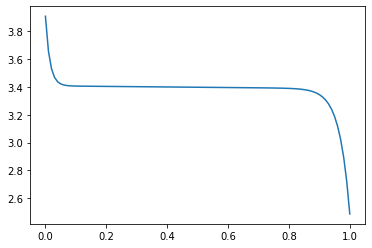

In [185]:
plt.plot(stoPer,ashfarEXPChangedd)
# plt.plot(dis_Qd/dis_Qd[-1],dis_V)
ashfarEqEXPChanged(.12)

### Anode

In [6]:
#read
ecker2015 = 'PyBaMM/pybamm/input/parameters/lithium-ion/anodes/graphite_Ecker2015/graphite_ocp_Ecker2015.csv'
ecker2015df = pd.read_csv(ecker2015)
#set equation
uNeg = interpolate.interp1d(ecker2015df.iloc[:,0],ecker2015df.iloc[:,1],fill_value='extrapolate')

# Minimization

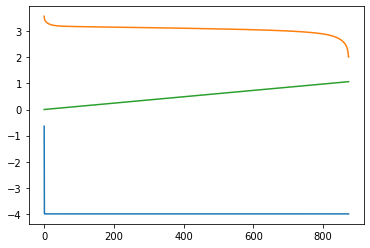

In [7]:
thing1 = c4df['cycle0']['I']+.11<.1
thing2 = c4df['cycle0']['V']>2.001
dis_I = c4df['cycle0']['I'][thing1&thing2]
dis_t = c4df['cycle0']['t'][thing1&thing2]
dis_Qd = c4df['cycle0']['Qd'][thing1&thing2]
dis_t=dis_t-dis_t[0]#start at 0
dis_t=dis_t*60 #convert to seconds
dis_V = c4df['cycle0']['V'][thing1&thing2]
plt.plot(dis_t,dis_I)
plt.plot(dis_t,dis_V)
-np.average(dis_I[100:])
plt.plot(dis_t,dis_Qd)

## Minimization Setup

### Functions

In [8]:
def electrolyte_conductivity_PeymanMPM2(c_e, T):
    """
    Conductivity of LiPF6 in EC:DMC as a function of ion concentration. The original
    data is from [1]. The fit is from Dualfoil [2].

    References
    ----------
    .. [1] C Capiglia et al. 7Li and 19F diffusion coefficients and thermal
    properties of non-aqueous electrolyte solutions for rechargeable lithium batteries.
    Journal of power sources 81 (1999): 859-862.
    .. [2] http://www.cchem.berkeley.edu/jsngrp/fortran.html
    Parameters
    ----------
    c_e: :class:`pybamm.Symbol`
        Dimensional electrolyte concentration
    T: :class:`pybamm.Symbol`
        Dimensional temperature


    Returns
    -------
    :class:`pybamm.Symbol`
        Electrolyte conductivity
    """

    sigma_e = 1.35
    E_k_e = 34700
    arrhenius = exp(E_k_e / constants.R * (1 / 298.15 - 1 / T))

    return sigma_e * arrhenius


def electrolyte_diffusivity_PeymanMPM2(c_e, T):
    """
    Diffusivity of LiPF6 in EC:DMC as a function of ion concentration. The original data
    is from [1]. The fit from Dualfoil [2].

    References
    ----------
    .. [1] C Capiglia et al. 7Li and 19F diffusion coefficients and thermal
    properties of non-aqueous electrolyte solutions for rechargeable lithium batteries.
    Journal of power sources 81 (1999): 859-862.
    .. [2] http://www.cchem.berkeley.edu/jsngrp/fortran.html

    Parameters
    ----------
    c_e: :class:`pybamm.Symbol`
        Dimensional electrolyte concentration
    T: :class:`pybamm.Symbol`
        Dimensional temperature


    Returns
    -------
    :class:`pybamm.Symbol`
        Electrolyte diffusivity
    """

    D_c_e = 1.0 * 10 ** (-10)
    E_D_e = 37040
    arrhenius = exp(E_D_e / constants.R * (1 / 298.15 - 1 / T))

    return D_c_e * arrhenius

def LFP_electrolyte_reaction_rate_prada2013(c_e, c_s_surf,T):
    """
    Reaction rate for Butler-Volmer reactions
    References
    ----------
Representative Volume Element Model of Lithium-ion Battery
Electrodes Based on X-ray Nano-tomography
Ali Ghorbani Kashkooli
SAFE TEMPERATURE CONTROL OF LITHIUM ION BATTERY
SYSTEMS FOR HIGH PERFORMANCE AND LONG LIFE
Mayank Garg
    ----------
    T: :class:`pybamm.Symbol`
        Dimensional temperature
    Returns
    -------
    :class:`pybamm.Symbol`
        Reaction rate
    """

    k_ref = 2.5e-13

    # multiply by Faraday's constant to get correct units
    m_ref = constants.F * k_ref

    E_r = 25000
    arrhenius = exp(-E_r / (constants.R * T)) * exp(E_r / (constants.R * 296.15))

    return m_ref * arrhenius



In [9]:
print(3*.1/1.51e-8)
print(3*.99/1.51e-8)
print(3*.1/0.92e-5)
print(3*.99/0.92e-5)

19867549.668874174
196688741.7218543
32608.69565217392
322826.0869565217


### Parameter Setup

In [190]:
F_ah = 26.8015
height_cell = 6.49E-2
width_cell = 1.78
A_cell= height_cell*width_cell

L_pos = 8.1E-5
c_max_pos = 22806

L_neg = 3.6E-5
c_max_neg = 31370

#parameters
parameter_options = {
    "chemistry": "lithium-ion",
    "cell": "A123_Lain2019_new",
    "anode": "graphite_Ecker2015",
    "separator": "separator_Chen2020",
    "cathode": "LFP_Prada2013_new",
    "electrolyte": "lipf6_Nyman2008",
    "experiment": "1C_discharge_from_full_Prada2013",
    "citation": "Chen2020",
}

#set models
dfnModel = pybamm.lithium_ion.DFN()
spmeModel = pybamm.lithium_ion.SPMe()
geometry = spmeModel.default_geometry
parameter_values = pybamm.ParameterValues(chemistry=parameter_options)


parameter_values.update({'Positive electrode OCP [V]':ashfarEqChanged})
parameter_values.update({'Positive particle radius [m]':6.51e-8})
parameter_values.update({'Negative particle radius [m]':0.92e-5})

parameter_values.update({
#cell
    'Electrode width [m]':width_cell,
#electrolyte    
    'Initial concentration in electrolyte [mol.m-3]':1200,
    'Electrolyte diffusivity [m2.s-1]':electrolyte_diffusivity_PeymanMPM2,
    'Electrolyte conductivity [S.m-1]':electrolyte_conductivity_PeymanMPM2,
#Positive Electrode
    'Positive electrode porosity': .26,
    'Positive electrode active material volume fraction': '[input]',
    'Initial concentration in positive electrode [mol.m-3]': '[input]',
    'Positive electrode surface area density [m-1]': '[input]',
    'Positive electrode diffusivity [m2.s-1]':5.90E-17,
    'Positive electrode conductivity [S.m-1]':1.3,
    'Positive electrode Bruggeman coefficient (electrode)':1.5,
    'Positive electrode Bruggeman coefficient (electrolyte)':1.5,
    'Positive electrode charge transfer coefficient':.5,
    'Positive electrode double-layer capacity [F.m-2]':.2,
#Negative Electrode
    'Negative electrode porosity': .36,
    'Negative electrode active material volume fraction':'[input]',
    'Initial concentration in negative electrode [mol.m-3]': '[input]',
    'Negative electrode surface area density [m-1]': '[input]',
    'Negative electrode diffusivity [m2.s-1]':3.30E-13,
    'Negative electrode conductivity [S.m-1]':300,
    'Negative electrode Bruggeman coefficient (electrolyte)':1.5,
    'Negative electrode Bruggeman coefficient (electrode)':1.5,
})
# Set current 
parameter_values["Current function [A]"] = 4.4 #-np.average(dis_I[100:])

parameter_values.process_model(spmeModel)
parameter_values.process_geometry(geometry)
# set_up_experiment()
var = pybamm.standard_spatial_vars
var_pts = {var.x_n: 200, var.x_s: 200, var.x_p: 200, var.r_n: 100, var.r_p: 100} #thickness and points
#spacial points disc - PDE to ODE  - particle points PDE to ODE
mesh = pybamm.Mesh(geometry, spmeModel.default_submesh_types, var_pts)
disc = pybamm.Discretisation(mesh, spmeModel.default_spatial_methods)
disc.process_model(spmeModel)
t_eval = dis_t
solver = pybamm.CasadiSolver(mode="fast")
solver.rtol = 1e-3
solver.atol = 1e-6


### Objective Functions

In [191]:
def objective(solution):
    return solution["Terminal voltage [V]"].entries

def prediction_error(x):
    # Hack to enforce bounds
#     try: 
#         i=i+1
#     except:
#         i=0    
        
    if np.any(x < 0):
        return 1e5 * np.ones_like(dis_V)
    try:
        solution = solver.solve(
            spmeModel,
            t_eval,
            inputs={
                'Positive electrode active material volume fraction': x[0],
                'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,
                'Negative electrode active material volume fraction':x[2],
                'Initial concentration in negative electrode [mol.m-3]': x[3]*31370,
                'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
                'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
            },
        )

    except pybamm.SolverError:
        print('error1: ',np.sum(1e5 * np.ones_like(dis_V)))
        return np.sum(1e5 * np.ones_like(dis_V))
    prediction = objective(solution)
    # Crude way of making sure we always get an answer
    if len(prediction) != len(dis_V):
        print('error2: ',np.sum(1e5 * np.ones_like(dis_V)))
        return np.sum(1e5 * np.ones_like(dis_V))
    else:
        out1 = np.sum((prediction - dis_V))
#         out2 = np.sum(np.power((solution['Discharge capacity [A.h]'].entries - dis_Qd),2))
#         if math.isnan(out1+out2):
#             print (' Solution: ',out1+out2, prediction[0], x)
#             return (np.sum(1e5 * np.ones_like(dis_V)))
#         out2=0    
        out2 = (dis_Qd[-1] - x[2]*L_neg*A_cell*c_max_neg + x[0]*L_pos*A_cell*c_max_pos)*274
        if math.isnan(out1+out2):
            print (' error3: ',np.sum(1e5 * np.ones_like(dis_V)), prediction[0], x)    
            return np.sum(1e5 * np.ones_like(dis_V))
        print (' Solution: ',(out1+out2), prediction[0], x)    
        return ((out1+out2)/1000)
        
def conNegPos(x):
    return (x[3]-x[1])

def conV(x): 
    return(ashfarEqEXPChanged(x[1]/22806) - uNeg(x[3]/31370) - 3.45)

def conLi(x):
    nLithium = x[2]*L_neg*A_cell*c_max_neg + x[0]*L_pos*A_cell*c_max_pos
    return(1.2 - nLithium*F_ah)
    
    

In [ ]:
# print((x[2]*(x[3]/31370)*L_neg*A_cell*c_max_neg + (x[1]/22806)*x[0]*L_pos*A_cell*c_max_pos) * F_ah)
# print('pos ep',x[0])
# print('pos %',x[1]/22806)
# print('neg ep',x[2])
# print('neg %',x[3]/31370)
# 500/22806

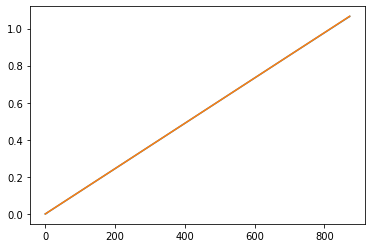

In [97]:
plt.plot(dis_t,dis_Qd) 
plt.plot(dis_t,solution['Discharge capacity [A.h]'].entries)

## PySwarm

In [107]:
# i=0
# lb=[.04,0,.04,0.8]
# ub=[1,.2,1,1]
# xopt, fopt = pso(prediction_error,lb,ub,ieqcons=[conNegPos, conV, conLi],swarmsize=10, minfunc=1e-3, omega = .7)
# xopt

## DFO-LS Proof of Concept

In [197]:
# Model is y(t) = x[0] * exp(x[1] * t)
def objective(solution):
    return solution["Terminal voltage [V]"].entries

def prediction_error(x):
    # Hack to enforce bounds
#     try: 
#         i=i+1
#     except:
#         i=0    
        
    if np.any(x < 0):
        return 1e5 * np.ones_like(dis_V)
    try:
        solution = solver.solve(
            spmeModel,
            t_eval,
            inputs={
                'Positive electrode active material volume fraction': x[0],
                'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,
                'Negative electrode active material volume fraction':x[2],
                'Initial concentration in negative electrode [mol.m-3]': x[3]*31370,
                'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
                'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
            },
        )

    except pybamm.SolverError:
        print('error1: ',np.sum(1e5 * np.ones_like(dis_V)))
        return (1e5 * np.ones_like(dis_V))
    
    prediction = objective(solution)
    # Crude way of making sure we always get an answer
    if len(prediction) != len(dis_V):
        print('error2: ',np.sum(1e5 * np.ones_like(dis_V)))
        return (1e5 * np.ones_like(dis_V))
    else:
        prediction[np.isnan(objective(solution))]=0
        out1 = ((prediction - dis_V))*4
        out2 = (dis_Qd[-1] - x[2]*L_neg*A_cell*c_max_neg + x[0]*L_pos*A_cell*c_max_pos)*np.ones_like(dis_V)#0*np.ones_like(dis_V)#
        out3 = abs((integrate.simps(objective(solution),solution['Discharge capacity [A.h]'].entries) - 3.27459773439081)) * np.ones_like(dis_V)
        print (' Solution: ',np.sum(abs(out1+out2+out3)), prediction[0], x)    
        return ((out1+out2+out3)/1000)
    
# Define the starting point
x0 = np.array([0.66, 0.1, 0.35, 0.8])

# We expect exponential decay: set upper bound x[1] <= 0
upper = np.array([1,.2,1,1])
lower = np.array([0,0,0,.5])

# Call DFO-LS
soln = dfols.solve(prediction_error, x0, bounds=(lower, upper), npt = 50)

# Display output
print(soln)

 Solution:  1017.2215914217013 3.2344563022905404 [0.66 0.1  0.35 0.8 ]
 Solution:  531.0981515944594 3.2360240398466766 [0.63527047 0.10323457 0.41055891 0.72443145]
 Solution:  572.250723266813 3.2404717277333592 [0.69467658 0.07173136 0.42549706 0.84794385]
 Solution:  981.895583565552 3.2286016045906574 [0.57169764 0.06783025 0.35731429 0.83338116]
 Solution:  854.1841038132752 3.2345470130792013 [0.64028506 0.19030797 0.37406892 0.8296054 ]
 Solution:  1274.6662428217626 3.2316015789531134 [0.68472953 0.09676543 0.28944109 0.87556855]
 Solution:  1323.1152303249469 3.2263803097628516 [0.62532342 0.12826864 0.27450294 0.75205615]
 Solution:  1051.956119865699 3.239184743889462 [0.74830236 0.13216975 0.34268571 0.76661884]
 Solution:  1123.5220093937128 3.23412484812609 [0.67971494 0.00969203 0.32593108 0.7703946 ]
 Solution:  987.4678680736007 3.234607398212139 [0.65612787 0.15351189 0.35666321 0.71587458]
 Solution:  1111.0344429227227 3.230463450840381 [0.62153895 0.02351174 0.32

 Solution:  518.0961294849203 3.237312702822184 [0.67216775 0.02256642 0.38729378 0.77499969]
 Solution:  472.69170302715264 3.2373582343570844 [0.66403694 0.01843631 0.39859648 0.77839265]
 Solution:  545.4676839949659 3.2366293247882902 [0.66173748 0.00806471 0.38686595 0.77220202]
 Solution:  689.7267198774466 3.236572882599897 [0.66380269 0.02303837 0.38319895 0.77322077]
 Solution:  441.592304597797 3.236792588628105 [0.66333996 0.00616102 0.38805868 0.77699261]
 Solution:  419.1064393962601 3.2375906779592323 [0.67192712 0.01791172 0.39313387 0.77102516]
 Solution:  551.6715847685077 3.2367302772414255 [0.6633488  0.00637578 0.38682213 0.77650915]
 Solution:  327.7336436982305 3.236488980328495 [0.65752067 0.01982558 0.38945941 0.78201243]
 Solution:  476.4011293405319 3.236826846966937 [0.66412904 0.00614648 0.38774052 0.77791734]
 Solution:  310.23131445539326 3.2368896670852005 [0.6641321  0.01109977 0.38897754 0.77609881]
 Solution:  565.781564559881 3.23679099696495 [0.66448

 Solution:  310.72302578137294 3.236851442926155 [0.66357821 0.01045913 0.38892098 0.77520948]
 Solution:  311.39753916822747 3.2368513554193297 [0.6636077  0.01047858 0.38888193 0.77512447]
 Solution:  310.6932074746396 3.236847449856956 [0.66351456 0.01044969 0.38892245 0.77528602]
 Solution:  311.21896731327183 3.2368479951387967 [0.66354805 0.01046249 0.38889087 0.77519817]
 Solution:  310.77175775686203 3.2368446375825077 [0.66347481 0.01047285 0.38891707 0.77537464]
 Solution:  311.1397305303765 3.236845512566764 [0.66350609 0.0104752  0.38889479 0.77528234]
 Solution:  310.87625607531675 3.2368416135028046 [0.66343302 0.01054702 0.38891006 0.77542663]
 Solution:  311.1915950123547 3.236841661473151 [0.66344827 0.01057095 0.38889172 0.77533251]
 Solution:  311.3235830007617 3.2368378980414385 [0.66339508 0.01063488 0.38888452 0.77541288]
 Solution:  311.2344307780489 3.2368412390201025 [0.66344345 0.01057379 0.38888944 0.77533309]
 Solution:  310.640163175756 3.236844119024501 [0

 Solution:  292.43901101875406 3.2266667373125375 [0.52773925 0.00786699 0.38903185 0.75109784]
 Solution:  293.59722805683396 3.2266602574306793 [0.52772141 0.00789784 0.38893462 0.75111097]
 Solution:  293.1408492803381 3.226666057203953 [0.52777146 0.0078534  0.38896213 0.75093969]
 Solution:  294.83836971532435 3.22666040368733 [0.52775498 0.0078307  0.38887892 0.75089183]
 Solution:  292.4367991188917 3.2266690300486185 [0.52776457 0.00779875 0.38903307 0.75089572]
 Solution:  293.3287869904118 3.226662847101881 [0.52774187 0.00782802 0.3889502  0.75084838]
 Solution:  292.6649617804113 3.2266656854967883 [0.52774558 0.00776596 0.38899994 0.75092375]
 Solution:  292.91611464252526 3.226664958035294 [0.52774998 0.00791653 0.38897785 0.75086686]
 Solution:  292.8408487545436 3.2266672741949884 [0.52777259 0.00789057 0.38898426 0.75091466]
 Solution:  293.4816029905511 3.2266645426190257 [0.52776605 0.00784135 0.38894157 0.750945  ]
 Solution:  293.14014053450217 3.2266638763568447 [

CasADi - 2020-07-05 14:56:50 WARNING("F:odeF failed: Inf detected for output ode, at (row 200, col 0).") [.../casadi/core/oracle_function.cpp:265]
Internal t = 0 and h = 0 are such that t + h = t on the next step. The solver will continue anyway.
CasADi - 2020-07-05 14:56:50 WARNING("F:odeF failed: NaN detected for output ode, at (row 199, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2020-07-05 14:56:50 WARNING("F:jacF failed: NaN detected for output o0, at nonzero index 594 (row 200, col 199).") [.../casadi/core/oracle_function.cpp:265]
psetup failed: .../casadi/interfaces/sundials/cvodes_interface.cpp:638: 'jacF' calculation failed
At t = 0 and h = 0, the corrector convergence test failed repeatedly or with |h| = hmin.


error1:  27400000.0
 Solution:  270.6922299014208 3.212406756689291 [0.39427837 0.03429933 0.38903617 0.74021963]
 Solution:  270.87404717727196 3.212405705132823 [0.3942749  0.03428654 0.38902426 0.74023115]
 Solution:  270.727484704418 3.2124054104067175 [0.39426896 0.03429294 0.38903374 0.74022667]
 Solution:  270.71056788237905 3.2124041957344445 [0.39425923 0.03429131 0.38903473 0.74022797]
 Solution:  270.6999770974452 3.2123991057919103 [0.39421999 0.03428541 0.38903494 0.74023301]
 Solution:  270.6204051630351 3.2123790243603643 [0.39406426 0.03425599 0.38903826 0.74025476]
 Solution:  270.5819341121189 3.212298281551943 [0.39344608 0.03411862 0.38903316 0.74034724]
 Solution:  270.05560323029044 3.211982164792631 [0.39102852 0.03338808 0.38903777 0.74076597]
 Solution:  268.32962995066964 3.210687522887035 [0.38133767 0.0305278  0.38902873 0.74242837]
 Solution:  259.6616518830442 3.2051076891707737 [0.34294148 0.01802639 0.38907057 0.74929623]
 Solution:  1009.9812892591785 3

 Solution:  243.1158234369052 3.1917820031273987 [0.26960717 0.01395797 0.38897604 0.7346587 ]
 Solution:  322.4612942777112 3.1876358896460824 [0.25113061 0.00715604 0.38840251 0.72905049]
 Solution:  402.3720070684901 3.1914090895557132 [0.26811392 0.0212148  0.3879085  0.73494886]
 Solution:  370.07792138676507 3.1934992811605425 [0.27803692 0.00847705 0.38816939 0.73642102]
 Solution:  329.8482010088058 3.1920216836596773 [0.26980334 0.01461671 0.39293482 0.73783204]
 Solution:  239.9849712681525 3.1923864166702463 [0.27243127 0.01400098 0.3891258  0.73892656]
 Solution:  301.3359139121295 3.192751754685819 [0.27367958 0.01327862 0.3911993  0.73934381]
 Solution:  244.4697306242546 3.192841494485773 [0.27464567 0.01431871 0.38898075 0.7401627 ]
 Solution:  273.0348975089824 3.192579989021194 [0.27310537 0.01388187 0.39016511 0.73922592]
 Solution:  248.0907242693428 3.192300041572139 [0.27208328 0.01421864 0.38886298 0.74011014]
 Solution:  251.7308457367906 3.192489359492294 [0.27

 Solution:  243.97658983415874 3.1834189516751827 [0.23351677 0.01503028 0.39030259 0.72309443]
 Solution:  238.10796143527347 3.1832536113119554 [0.23315266 0.01418986 0.38887803 0.7230379 ]
 Solution:  218.32505258429353 3.18341186092941 [0.23363162 0.01445292 0.3895744  0.72291679]
 Solution:  219.0192179279494 3.1833645681606333 [0.23348202 0.01435977 0.38939832 0.72271594]
 Solution:  220.1843334287022 3.1833836894482612 [0.23356629 0.01440322 0.38934811 0.72241446]
 Solution:  221.0571043589655 3.1833396667202942 [0.23340212 0.01431605 0.3893117  0.72261694]
 Solution:  218.46417395505978 3.1833785709297056 [0.23353061 0.01437815 0.38942843 0.72256763]
 Solution:  219.2941967046228 3.1833657726927176 [0.23348918 0.01435766 0.3893857  0.72251827]
 Solution:  218.74499598637954 3.1833831793502942 [0.23355143 0.01438869 0.38941373 0.72249254]
 Solution:  218.84709317104807 3.1833718886979314 [0.23350869 0.01436804 0.38940758 0.7225435 ]
 Solution:  218.50895175271648 3.1833813476592

In [199]:
x=soln.x
print(ashfarEqEXPChanged(x[1]))
print(dis_Qd[-1])
print((x[2]*L_neg*A_cell*c_max_neg*x[3] + x[1]*x[0]*L_pos*A_cell*c_max_pos)*F_ah)

3.590801641350231
1.0659516
1.0029388744295498


In [165]:
# xopt = soln.x

### Graphing

[0.23341966 0.01432831 0.3894418  0.72248332]
3.1833507324436545


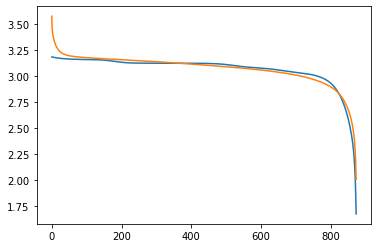

In [202]:
x=soln.x
print(x)
solution = solver.solve(
        spmeModel,
        t_eval,
        inputs={
            'Positive electrode active material volume fraction':x[0],# .6,#
            'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,#1000,#
            'Negative electrode active material volume fraction': x[2],#.6,#
            'Initial concentration in negative electrode [mol.m-3]': x[3]*31370,#31000,#
            'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
            'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
        })
plt.plot(solution['Time [s]'].entries,objective(solution))
plt.plot(dis_t,dis_V)
# plt.plot(solution['Time [s]'].entries,solution['Measured open circuit voltage [V]'].entries)
# plt.ylim(0,4)
print(objective(solution)[0])

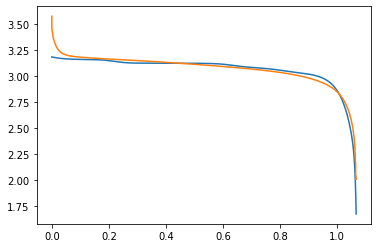

In [201]:
plt.plot(solution['Discharge capacity [A.h]'].entries,objective(solution))
plt.plot(dis_Qd,dis_V)

In [167]:
# plt.plot(dis_t,dis_Qd) 
# plt.plot(dis_t,solution['Discharge capacity [A.h]'].entries)

# plt.plot(solution['Discharge capacity [A.h]'].entries,objective(solution))
# plt.plot(dis_Qd,dis_V)

# print(integrate.simps(solution['Discharge capacity [A.h]'].entries,objective(solution)))
# print(integrate.simps(dis_Qd,dis_V))

In [168]:
# print(solution['Discharge capacity [A.h]'].entries)
# print(objective(solution))
# print(np.isnan(objective(solution)))
# objective(solution)[np.isnan(objective(solution))]=0
# print(np.isnan(objective(solution)))
# solution['Discharge capacity [A.h]'].entries
# print(integrate.simps(objective(solution),solution['Discharge capacity [A.h]'].entries))
# print(integrate.simps(dis_V,dis_Qd))
# print(3.27459773439081)


In [169]:
# np.size(dis_V)

In [150]:
sumed = 0
for value in (range(np.size(dis_V)-1)):
    sumed = sumed+integrate.simps([dis_V[value],dis_V[value+1]],[dis_Qd[value],dis_Qd[value+1]])
#     print(integrate.simps([dis_V[value],dis_V[value+1]],[dis_Qd[value],dis_Qd[value+1]]))
print(sumed)

3.27459773439081


In [116]:
print(dis_V[0])
print(ashfarEqEXPChanged(700/22806)-uNeg(30000/31920))
# solution['Time [s]'].entries

3.5742993
3.3826570617039025


[0.23341966 0.01432831 0.3894418  0.72248332]


2020-07-05 15:50:38,101 - [WARNING] simulation.solve(437): 
                        Experiment is infeasible: 'event: Minumum negative particle surface concentration' was triggered during 'Discharge at 4A until 2.5V'. Try
                        reducing current, shortening the time interval, or reducing
                        the period.
                        


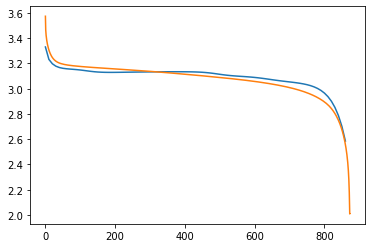

In [213]:
# x[0]=.6607
# x[1]=27679
# x[2]=.3535
# x[3]=331

print(x)
spme1Model = pybamm.lithium_ion.SPMe()
parameter_values1 = parameter_values
parameter_values1.update({
    'Positive electrode active material volume fraction': x[0],
    'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,
    'Negative electrode active material volume fraction':x[2],
    'Initial concentration in negative electrode [mol.m-3]': x[3]*31920,
    'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
    'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
})

sim = pybamm.Simulation(spme1Model, parameter_values=parameter_values1, experiment=pybamm.Experiment(["Discharge at 4A until 2.5V"], period = '10 seconds'))
sim.solve()
# sim.plot()
plt.plot(sim.solution['Time [s]'].entries,objective(sim.solution))
plt.plot(dis_t,dis_V)

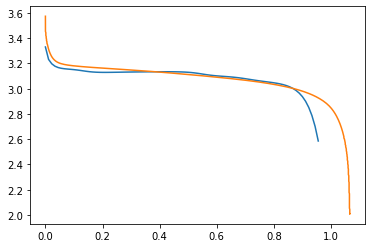

In [214]:
plt.plot(sim.solution['Discharge capacity [A.h]'].entries,objective(sim.solution))
plt.plot(dis_Qd,dis_V)

### DFN full simulation

2020-07-05 15:51:50,697 - [WARNING] simulation.solve(437): 
                        Experiment is infeasible: 'event: Minumum negative particle surface concentration' was triggered during 'Discharge at 4A until 2.5V'. Try
                        reducing current, shortening the time interval, or reducing
                        the period.
                        


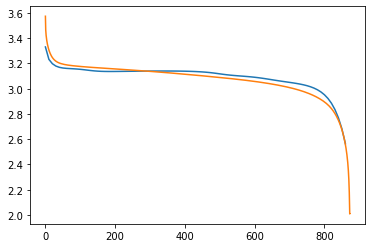

In [215]:
parameter_values.update({'Positive electrode OCP [V]':ashfarEqChanged})
parameter_values.update({'Positive particle radius [m]':6.51e-8})
parameter_values.update({'Negative particle radius [m]':0.92e-5})

parameter_values.update({
#cell
    'Electrode width [m]':width_cell,
#electrolyte    
    'Initial concentration in electrolyte [mol.m-3]':1200,
    'Electrolyte diffusivity [m2.s-1]':electrolyte_diffusivity_PeymanMPM2,
    'Electrolyte conductivity [S.m-1]':electrolyte_conductivity_PeymanMPM2,
#Positive Electrode
    'Positive electrode porosity': .26,
    'Positive electrode active material volume fraction': x[0],
    'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,
    'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
    'Positive electrode diffusivity [m2.s-1]':5.90E-17,
    'Positive electrode conductivity [S.m-1]':1.3,
    'Positive electrode Bruggeman coefficient (electrode)':1.5,
    'Positive electrode Bruggeman coefficient (electrolyte)':1.5,
    'Positive electrode charge transfer coefficient':.5,
    'Positive electrode double-layer capacity [F.m-2]':.2,
#Negative Electrode
    'Negative electrode porosity': .36,
    'Negative electrode active material volume fraction':x[2],
    'Initial concentration in negative electrode [mol.m-3]': x[3]*31920,
    'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
    'Negative electrode diffusivity [m2.s-1]':3.30E-13,
    'Negative electrode conductivity [S.m-1]':300,
    'Negative electrode Bruggeman coefficient (electrolyte)':1.5,
    'Negative electrode Bruggeman coefficient (electrode)':1.5,
})


sim = pybamm.Simulation(dfnModel, parameter_values=parameter_values, experiment=pybamm.Experiment(["Discharge at 4A until 2.5V"], period = '10 seconds'))
sim.solve()
# sim.plot()
plt.plot(sim.solution['Time [s]'].entries,objective(sim.solution))
plt.plot(dis_t,dis_V)

In [152]:
# np.average(abs(objective(sim.solution) - dis_V))


In [269]:
# solution['Time [s]'].entries

## Full Evolution

In [245]:
# Model is y(t) = x[0] * exp(x[1] * t)
def objective(solution):
    return solution["Terminal voltage [V]"].entries

def prediction_error(x):
    # Hack to enforce bounds
#     try: 
#         i=i+1
#     except:
#         i=0    
        
    if np.any(x < 0):
        return 1e5 * np.ones_like(dis_V)
    try:
        solution = solver.solve(
            spmeModel,
            t_eval,
            inputs={
                'Positive electrode active material volume fraction': x[0],
                'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,
                'Negative electrode active material volume fraction':x[2],
                'Initial concentration in negative electrode [mol.m-3]': x[3]*31370,
                'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
                'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
            },
        )

    except pybamm.SolverError:
        print('error1: ',np.sum(1e5 * np.ones_like(dis_V)))
        return (1e5 * np.ones_like(dis_V))
    
    prediction = objective(solution)
    # Crude way of making sure we always get an answer
    if len(prediction) != len(dis_V):
        print('error2: ',np.sum(1e5 * np.ones_like(dis_V)))
        return (1e5 * np.ones_like(dis_V))
    else:
        prediction[np.isnan(objective(solution))]=0
        out1 = ((prediction - dis_V))*4
        out2 = (dis_Qd[-1] - x[2]*L_neg*A_cell*c_max_neg + x[0]*L_pos*A_cell*c_max_pos)*np.ones_like(dis_V)#0*np.ones_like(dis_V)#
        out3 = abs((integrate.simps(objective(solution),solution['Discharge capacity [A.h]'].entries) - exIntVbyQ)) * np.ones_like(dis_V)
        print (' Solution: ',np.sum(abs(out1+out2+out3)), prediction[0], x)    
        return ((out1+out2+out3)/1000)
    
# Define the starting point
x0 = np.array([0.66, 0.1, 0.35, 0.8])

# We expect exponential decay: set upper bound x[1] <= 0
upper = np.array([1,.4,1,1])
lower = np.array([0,0,0,.5])



In [242]:
# xAll['cycle20']=soln.x

### 0-10

In [275]:
xAll = {
        'cycle0':[],
        'cycle10':[]
       }
x0 = np.array([0.66, 0.07, 0.35, 0.8])
i=0
for cycle in c4df:
    if i < 10:
        i = i+1
        thing1 = c4df[cycle]['I']+.11<.1
        thing2 = c4df[cycle]['V']>2.001
        dis_I = c4df[cycle]['I'][thing1&thing2]
        dis_t = c4df[cycle]['t'][thing1&thing2]
        dis_Qd = c4df[cycle]['Qd'][thing1&thing2]
        dis_t=dis_t-dis_t[0]#start at 0
        dis_t=dis_t*60 #convert to seconds
        dis_V = c4df[cycle]['V'][thing1&thing2]
        exIntVbyQ = 0
        t_eval = dis_t
        for value in (range(np.size(dis_V)-1)):
            exIntVbyQ = exIntVbyQ+integrate.simps([dis_V[value],dis_V[value+1]],[dis_Qd[value],dis_Qd[value+1]])
        if cycle not in ['cycle0']:
            print(cycle)
            x0 = (soln.x)
        
        def prediction_error(x):
            if np.any(x < 0):
                return 1e5 * np.ones_like(dis_V)
            try:
                solution = solver.solve(
                    spmeModel,
                    t_eval,
                    inputs={
                        'Positive electrode active material volume fraction': x[0],
                        'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,
                        'Negative electrode active material volume fraction':x[2],
                        'Initial concentration in negative electrode [mol.m-3]': x[3]*31370,
                        'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
                        'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
                    },
                )
            except pybamm.SolverError:
                print('error1: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            prediction = objective(solution)
            # Crude way of making sure we always get an answer
            if len(prediction) != len(dis_V):
                print('error2: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            else:
                prediction[np.isnan(objective(solution))]=0
                out1 = ((prediction - dis_V))*4
                out2 = (dis_Qd[-1] - x[2]*L_neg*A_cell*c_max_neg + x[0]*L_pos*A_cell*c_max_pos)*np.ones_like(dis_V)#0*np.ones_like(dis_V)#
                out3 = abs((integrate.simps(objective(solution),solution['Discharge capacity [A.h]'].entries) - exIntVbyQ)) * np.ones_like(dis_V)
                out4 = 0#abs(prediction[0]-dis_V[0])*np.ones_like(dis_V)*10 
                print (' Solution: ',np.sum(abs(out1+out2+out3+out4)), prediction[0], x)    
                return ((out1+out2+out3+out4)/1000)
        
        
        soln = dfols.solve(prediction_error, x0, bounds=(lower, upper), npt = 50)
        print(cycle, soln)
        xAll[cycle]=soln.x
    

 Solution:  1017.2215914217013 3.2344563022905404 [0.66 0.07 0.35 0.8 ]
 Solution:  1213.220572625578 3.2311189673130802 [0.65762232 0.12143059 0.30424381 0.8724956 ]
 Solution:  570.9184771028664 3.23993120714452 [0.6858038  0.055539   0.42537695 0.85868014]
 Solution:  1205.8789757300672 3.2335601124979076 [0.69363774 0.         0.30677515 0.82348165]
 Solution:  1040.7822335692376 3.2394688839062593 [0.74938491 0.10671283 0.3462704  0.77453244]
 Solution:  447.8037878787592 3.2371142092481953 [0.66237768 0.01856941 0.39575619 0.7275044 ]
 Solution:  1323.2020244150062 3.227002815433068 [0.6341962  0.084461   0.27462305 0.74131986]
 Solution:  454.0841125505289 3.2345685649826903 [0.62340972 0.14614422 0.3970189  0.77445726]
 Solution:  993.1709430560121 3.2283024867900694 [0.57061509 0.03328717 0.3537296  0.82546756]
 Solution:  1072.7107002338062 3.2303535367489893 [0.61193052 0.15434633 0.33683865 0.82004497]
 Solution:  1154.2009352558255 3.236944255943579 [0.73665319 0.01391019 

 Solution:  466.41223326158183 3.242175373288004 [0.74810089 0.01356877 0.39655777 0.69876587]
 Solution:  387.48864120389453 3.2420222613686356 [0.7505165  0.01506563 0.39084043 0.7092168 ]
 Solution:  659.3896290270283 3.2415895275610462 [0.74847711 0.01357315 0.38446671 0.69513722]
 Solution:  374.99067366758527 3.2419793979885245 [0.75013613 0.01212179 0.39038967 0.71133564]
 Solution:  490.7981566034987 3.2419547546618577 [0.7522172  0.01609235 0.38770534 0.69852788]
 Solution:  350.05366080559907 3.2418526464808823 [0.74841609 0.00972409 0.38969635 0.71243379]
 Solution:  403.4166212430814 3.2420050170561696 [0.75253533 0.00117511 0.38836335 0.71529209]
 Solution:  623.9163261467911 3.241665097998221 [0.74897814 0.0110909  0.38541425 0.72134892]
 Solution:  659.5242285729006 3.241881391008712 [0.75391263 0.00325434 0.3845143  0.71347146]
 Solution:  615.8771064027419 3.2416669435017478 [0.74875249 0.01031976 0.38568545 0.7215686 ]
 Solution:  413.318572186447 3.2420233505470266 [

 Solution:  321.3041699039786 3.242033573250995 [0.752598   0.01010282 0.38886229 0.71511853]
 Solution:  320.9361500463649 3.2420314178034726 [0.75253807 0.01018588 0.38888263 0.71508074]
 Solution:  321.7087041439481 3.2420281064089913 [0.75251402 0.01009888 0.38884235 0.71506557]
 Solution:  321.27154888959143 3.2420261327367035 [0.75245703 0.01018154 0.38886319 0.71502565]
 Solution:  322.1699318521754 3.2420261992806187 [0.75249629 0.01012303 0.38882323 0.71505289]
 Solution:  320.2569246757365 3.242031987663055 [0.75249636 0.01012031 0.38893778 0.71505043]
 Solution:  321.54877253171935 3.2420257708184668 [0.75246304 0.01023968 0.3888497  0.71510058]
 Solution:  322.07131200118226 3.2420272898316407 [0.75251301 0.01017354 0.38882724 0.71500231]
 Solution:  321.4955695597548 3.2420267029907857 [0.75247809 0.01024835 0.38885234 0.71512053]
 Solution:  320.185083046471 3.2420336847374776 [0.75251711 0.01017381 0.38894956 0.7150105 ]
 Solution:  321.09177487443867 3.2420287107090546 

CasADi - 2020-07-05 23:09:34 WARNING("F:odeF failed: Inf detected for output ode, at (row 200, col 0).") [.../casadi/core/oracle_function.cpp:265]
Internal t = 0 and h = 0 are such that t + h = t on the next step. The solver will continue anyway.
CasADi - 2020-07-05 23:09:34 WARNING("F:odeF failed: NaN detected for output ode, at (row 199, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2020-07-05 23:09:34 WARNING("F:jacF failed: NaN detected for output o0, at nonzero index 594 (row 200, col 199).") [.../casadi/core/oracle_function.cpp:265]
psetup failed: .../casadi/interfaces/sundials/cvodes_interface.cpp:638: 'jacF' calculation failed
At t = 0 and h = 0, the corrector convergence test failed repeatedly or with |h| = hmin.


 Solution:  313.03888953961166 3.222398054408437 [0.48181146 0.01506627 0.38974776 0.70039874]
 Solution:  292.5832895750068 3.2223703167453728 [0.48175687 0.01422596 0.38930492 0.70115677]
 Solution:  286.3705604422408 3.2223181143877393 [0.48140408 0.01428629 0.38896775 0.70118064]
 Solution:  287.2565100955726 3.222277728964738 [0.48102355 0.01375629 0.38892055 0.70172379]
 Solution:  304.9984582313109 3.222304586340194 [0.48139075 0.01396541 0.38872627 0.70131949]
 Solution:  285.73106897179133 3.222290523923655 [0.48104222 0.01419517 0.38913714 0.70129376]
 Solution:  292.56001844133 3.2223074932833353 [0.48140107 0.01426883 0.38876341 0.70123646]
 Solution:  285.4000322918366 3.2223085837371888 [0.48124126 0.01430771 0.38910102 0.70120192]
 Solution:  288.8250717298366 3.222312883534832 [0.48140478 0.01428532 0.38886278 0.70116407]
 Solution:  285.3610361618887 3.222321430517437 [0.48138471 0.01429629 0.38907177 0.70118004]
 Solution:  287.32788750163206 3.2223158084563557 [0.481

 Solution:  253.9640969903104 3.1914543550632297 [0.26789833 0.         0.38971975 0.86961349]
 Solution:  252.45227963666156 3.191275630386732 [0.26707314 0.         0.38969347 0.86863534]
 Solution:  238.21696953434275 3.191393137807058 [2.67749941e-01 1.98082321e-04 3.89136669e-01 8.69546970e-01]
 Solution:  240.66817168322996 3.191203234733967 [0.26689305 0.         0.38902693 0.87047047]
 Solution:  264.49767094198376 3.1913572010165945 [2.67680440e-01 1.71754820e-04 3.88720494e-01 8.70027465e-01]
 Solution:  247.0915687872092 3.1912805667334005 [2.67292636e-01 5.58552704e-06 3.88853849e-01 8.69835813e-01]
 Solution:  246.01774716602267 3.191363440671454 [2.67671506e-01 1.64131939e-04 3.88881993e-01 8.69720854e-01]
 Solution:  247.48734659699602 3.1913572151022382 [2.67650680e-01 1.85481867e-04 3.88847300e-01 8.69453943e-01]
 Solution:  241.84755694533754 3.191374822394345 [2.67697519e-01 1.81389952e-04 3.88996773e-01 8.69601765e-01]
 Solution:  242.25378777673038 3.19137787591808

 Solution:  211.61711039417116 3.1777096029500953 [0.21206378 0.00339212 0.39361674 0.90045939]
 Solution:  208.79428283221864 3.177743897849547 [0.21211187 0.00313174 0.3940272  0.90004585]
 Solution:  205.9526082869951 3.177838458222867 [0.21240059 0.00343633 0.39423673 0.90048124]
 Solution:  205.11044566767265 3.177871664816127 [0.21248996 0.0032028  0.39438221 0.90034446]
 Solution:  204.53687300013033 3.1779068677219087 [0.21259343 0.00345016 0.39448528 0.90048547]
 Solution:  204.9535118438906 3.1778688460083786 [0.21245832 0.003416   0.39451237 0.90055926]
 Solution:  204.4230663445857 3.1779127964159968 [0.21260509 0.00360025 0.39453677 0.90050242]
 Solution:  204.32947925008398 3.1779196206978035 [0.21262125 0.00357629 0.3945799  0.90044155]
 Solution:  204.29273814212962 3.1779210656885826 [0.21262137 0.0036509  0.39460858 0.90044483]
 Solution:  204.36195655353544 3.177912528794296 [0.21259181 0.00366116 0.39461    0.9004697 ]
 Solution:  204.289886434358 3.1779201743881327

 Solution:  202.59533189129675 3.178466343134715 [0.21491477 0.00270313 0.39223046 0.89931657]
 Solution:  203.12297777035167 3.1783401097420754 [0.21444465 0.00291748 0.39240882 0.89950487]
 Solution:  202.7945121790629 3.1784182877666365 [0.21475109 0.00271214 0.392209   0.89932973]
 Solution:  203.08247427995377 3.1783581310207514 [0.21452328 0.00283044 0.39231616 0.89944573]
 Solution:  202.89712350911734 3.1783981731088593 [0.21467749 0.00272998 0.39222973 0.89935276]
 Solution:  203.06821548373233 3.178367416275273 [0.21456366 0.00280013 0.39226932 0.89940316]
 Solution:  202.952143923913 3.178387612860476 [0.21463904 0.00274445 0.39223963 0.89935967]
 Solution:  203.0318406168021 3.1783777067149557 [0.21460547 0.00276086 0.39223447 0.89937298]
 Solution:  202.9811480935868 3.17838307388592 [0.21462331 0.00275509 0.39223929 0.89936794]
 Solution:  203.02274801491285 3.1783783123772036 [0.21460706 0.00276404 0.39223744 0.8993752 ]
 Solution:  202.96178865533514 3.178385750068635 [

 Solution:  218.84511913166614 3.1796936541763023 [0.21912366 0.         0.39293991 0.90894227]
 Solution:  588.3793774069197 3.180743143500001 [0.2243139  0.         0.38542188 0.89277442]
 Solution:  509.6540527153758 3.178563509521202 [0.21606579 0.         0.38761508 0.89398447]
 Solution:  222.36579660454106 3.1783585968285264 [2.14593776e-01 4.33680869e-19 3.91917858e-01 9.02702792e-01]
 Solution:  410.07851349477517 3.177149870992953 [0.21086239 0.         0.38945704 0.89859598]
 Solution:  1183.0036944537862 3.158900612718064 [0.16100166 0.06649276 0.37710295 0.84666516]
 Solution:  1293.001614931604 3.149635504013441 [0.14469303 0.05506805 0.34695887 0.8823286 ]
 Solution:  1105.7644044452734 3.1671462745925743 [0.17153014 0.05114993 0.4672226  0.91099026]
 Solution:  1066.4834114292016 3.1772343161456003 [0.22347266 0.03042345 0.33000985 0.97238225]
 Solution:  400.4161457828483 3.1870630283491743 [0.2452155  0.0852527  0.40546585 0.85413568]
 Solution:  1103.9690864719082 3.

 Solution:  203.0608390712062 3.1778729777043333 [2.11801444e-01 6.03229310e-05 3.98535134e-01 8.98380000e-01]
 Solution:  202.80545916476808 3.177902225173463 [2.11901874e-01 4.55080712e-05 3.98532434e-01 8.98391185e-01]
 Solution:  203.03292859362972 3.177875715112576 [2.11810374e-01 7.09906313e-05 3.98537717e-01 8.98376248e-01]
 Solution:  203.0308104163193 3.1778703640878265 [2.11777080e-01 8.40583232e-05 3.98628755e-01 8.98355445e-01]
 Solution:  203.05452124602414 3.1778625990428653 [2.11736286e-01 1.01120969e-04 3.98715341e-01 8.98332043e-01]
 Solution:  203.25787990339302 3.177848947570185 [2.11701852e-01 5.44559291e-05 3.98641295e-01 8.98412954e-01]
 Solution:  203.0549063669514 3.17786261990043 [2.11736510e-01 1.03750823e-04 3.98714415e-01 8.98330371e-01]
 Solution:  203.20455055468278 3.177852886455426 [2.11713122e-01 2.53123348e-05 3.98654547e-01 8.98397791e-01]
 Solution:  203.03039634249373 3.1778651017624973 [2.11744583e-01 1.06020323e-04 3.98716876e-01 8.98329056e-01]
 

 Solution:  203.00126547772263 3.1778475327963402 [2.11625087e-01 6.85340060e-06 3.99078575e-01 8.98319755e-01]
 Solution:  203.02476882812846 3.1778448184714785 [2.11615413e-01 7.55001023e-06 3.99081060e-01 8.98325213e-01]
 Solution:  203.00132441786906 3.1778475260431316 [2.11625063e-01 6.66974563e-06 3.99078580e-01 8.98320239e-01]
 Solution:  203.02639958677435 3.1778446537708156 [2.11614893e-01 7.32341674e-06 3.99080807e-01 8.98322591e-01]
 Solution:  203.00136653600327 3.1778475204951198 [2.11625042e-01 6.54732503e-06 3.99078597e-01 8.98320585e-01]
 Solution:  203.02395900511556 3.177844941703201 [2.11615937e-01 6.38297218e-06 3.99080435e-01 8.98322424e-01]
 Solution:  203.00139654187626 3.177847516152788 [2.11625024e-01 6.46360475e-06 3.99078616e-01 8.98320834e-01]
 Solution:  203.0116573974975 3.177846276551662 [2.11620453e-01 4.51728925e-06 3.99080681e-01 8.98318168e-01]
 Solution:  203.00141306254957 3.1778475145877603 [2.11625019e-01 6.44305542e-06 3.99078611e-01 8.98321007e-

 Solution:  203.0036708963101 3.1778437577946503 [2.11601699e-01 1.45881725e-05 3.99142515e-01 8.98386829e-01]
 Solution:  203.00135129355476 3.177843990511735 [2.11602430e-01 1.43172501e-05 3.99142900e-01 8.98387159e-01]
 Solution:  203.00109861168238 3.17784400199371 [2.11602421e-01 1.45489643e-05 3.99143196e-01 8.98387092e-01]
 Solution:  203.00133764537838 3.177843991069283 [2.11602429e-01 1.43918948e-05 3.99142917e-01 8.98387188e-01]
 Solution:  203.00169119563168 3.1778439349922256 [2.11602185e-01 1.43174362e-05 3.99143236e-01 8.98386858e-01]
 Solution:  203.00125005248123 3.177844014202039 [2.11602549e-01 1.44923339e-05 3.99142668e-01 8.98387278e-01]
 Solution:  203.00147992424442 3.177843953766592 [2.11602236e-01 1.43948908e-05 3.99143315e-01 8.98386849e-01]
 Solution:  203.00129350701462 3.1778440434829194 [2.11602751e-01 1.47426630e-05 3.99142044e-01 8.98387109e-01]
 Solution:  203.0013551717937 3.1778440708470166 [2.11602947e-01 1.47264833e-05 3.99141419e-01 8.98387864e-01]


 Solution:  203.00140616868623 3.1778442364737787 [2.11604028e-01 1.36872545e-05 3.99138281e-01 8.98390639e-01]
 Solution:  203.00142761773262 3.1778442362972994 [2.11604034e-01 1.37125159e-05 3.99138242e-01 8.98390633e-01]
 Solution:  203.0014063469112 3.17784423772777 [2.11604036e-01 1.36897479e-05 3.99138258e-01 8.98390642e-01]
 Solution:  203.00140491596898 3.1778442366446993 [2.11604029e-01 1.36839948e-05 3.99138281e-01 8.98390638e-01]
 Solution:  203.001421430969 3.1778442360094954 [2.11604030e-01 1.36960633e-05 3.99138259e-01 8.98390638e-01]
 Solution:  203.00140513138254 3.1778442373694884 [2.11604033e-01 1.36868155e-05 3.99138267e-01 8.98390640e-01]
 Solution:  203.00140642009853 3.1778442368067887 [2.11604030e-01 1.36827501e-05 3.99138275e-01 8.98390637e-01]
 Solution:  203.0013906508654 3.177844238742769 [2.11604037e-01 1.36942415e-05 3.99138271e-01 8.98390644e-01]
 Solution:  203.00140642383067 3.177844236814101 [2.11604030e-01 1.36824123e-05 3.99138275e-01 8.98390637e-01]


 Solution:  877.8584737449607 3.173384031358338 [0.19632762 0.0790157  0.40432666 0.95753786]
 Solution:  203.2037348598344 3.1777774832037706 [0.21137201 0.         0.39916475 0.89836455]
 Solution:  202.69147102737543 3.1778338888378013 [2.11566853e-01 1.69406589e-21 3.99149611e-01 8.98410562e-01]
 Solution:  499.8768387722638 3.197323443471328 [0.28331725 0.04628901 0.45075298 0.90558297]
 Solution:  202.64711378717334 3.177845402056751 [0.21160825 0.         0.39913679 0.89839393]
 Solution:  435.5998405892073 3.184127172358989 [0.22907718 0.02426345 0.43105856 0.80845882]
 Solution:  202.65073924931085 3.1778448711878684 [0.21160747 0.         0.39913049 0.89838937]
 Solution:  1361.575918161136 3.1479623684626414 [0.13498761 0.06269481 0.41123089 0.89099004]
 Solution:  202.60422600350026 3.1778532326062567 [0.21162722 0.         0.39918402 0.89840549]
 Solution:  971.5918664777 3.173490810806842 [0.1872498  0.03939551 0.48359798 0.92526998]
 Solution:  202.69056928411518 3.17783

 Solution:  203.02364207130876 3.1777929939964045 [2.11423349e-01 5.17465802e-05 3.99174099e-01 8.98240376e-01]
 Solution:  203.02557986213975 3.1777968889656867 [2.11449454e-01 5.73690235e-05 3.99095924e-01 8.98184024e-01]
 Solution:  203.02119441938802 3.1777943552213292 [2.11431530e-01 2.46620795e-05 3.99152515e-01 8.98257552e-01]
 Solution:  203.02011935403357 3.1777958071717523 [2.11440710e-01 3.73958269e-05 3.99126737e-01 8.98216812e-01]
 Solution:  203.01070876154398 3.1777961975576314 [2.11440362e-01 1.68942930e-05 3.99136972e-01 8.98206821e-01]
 Solution:  203.01848189848158 3.177794989422157 [2.11434849e-01 1.19546427e-05 3.99145463e-01 8.98229140e-01]
 Solution:  203.00781114426832 3.177796271284813 [2.11439950e-01 9.24475362e-06 3.99141016e-01 8.98201825e-01]
 Solution:  203.0186031597628 3.1777953241636294 [2.11437080e-01 1.56555184e-05 3.99138822e-01 8.98216002e-01]
 Solution:  203.01506737568587 3.177795829069828 [2.11439295e-01 7.03942033e-06 3.99135817e-01 8.98206182e-

 Solution:  203.0154283330897 3.1778040817429254 [2.11492988e-01 1.14195866e-04 3.98980163e-01 8.98178930e-01]
 Solution:  203.01362648858407 3.1778050221922696 [2.11498500e-01 1.05858468e-04 3.98966135e-01 8.98171367e-01]
 Solution:  203.0135622275876 3.1778048423071894 [2.11497323e-01 1.07548520e-04 3.98969560e-01 8.98174447e-01]
 Solution:  203.01428400540067 3.1778045286784757 [2.11495522e-01 1.09578515e-04 3.98974016e-01 8.98179800e-01]
 Solution:  203.01323911323348 3.1778047837514403 [2.11496850e-01 1.08368434e-04 3.98971228e-01 8.98176125e-01]
 Solution:  203.01416729928468 3.177804594892513 [2.11495913e-01 1.08986292e-04 3.98973010e-01 8.98178897e-01]
 Solution:  203.01352888131836 3.1778047085858914 [2.11496453e-01 1.08700079e-04 3.98972082e-01 8.98177277e-01]
 Solution:  203.01469627060214 3.1778045789474905 [2.11495969e-01 1.09688068e-04 3.98972337e-01 8.98177975e-01]
 Solution:  203.01356095851034 3.177804692608358 [2.11496360e-01 1.08797467e-04 3.98972318e-01 8.98177196e-

 Solution:  203.01346912815808 3.1778044357280497 [2.11494679e-01 1.09283013e-04 3.98977218e-01 8.98177810e-01]
 Solution:  203.0134733535222 3.1778044340617813 [2.11494670e-01 1.09304408e-04 3.98977241e-01 8.98177819e-01]
 Solution:  203.01346566058345 3.177804435505578 [2.11494677e-01 1.09293477e-04 3.98977228e-01 8.98177821e-01]
 Solution:  203.01345713747108 3.177804435995191 [2.11494677e-01 1.09288100e-04 3.98977235e-01 8.98177814e-01]
 Solution:  203.01346576187936 3.177804435499425 [2.11494677e-01 1.09294808e-04 3.98977228e-01 8.98177821e-01]
 Solution:  203.0134899919534 3.177804432786334 [2.11494666e-01 1.09301495e-04 3.98977234e-01 8.98177821e-01]
 Solution:  203.01346575183445 3.1778044355019515 [2.11494677e-01 1.09294376e-04 3.98977228e-01 8.98177821e-01]
 Solution:  203.01348304813285 3.1778044330294 [2.11494666e-01 1.09299300e-04 3.98977242e-01 8.98177816e-01]
 Solution:  203.01346867489522 3.177804435256921 [2.11494676e-01 1.09296259e-04 3.98977227e-01 8.98177819e-01]
 S

 Solution:  203.930103809888 3.1779160398943116 [0.21184697 0.         0.39915243 0.8983436 ]
 Solution:  1063.782388310101 3.1695085951318944 [0.17735214 0.04022579 0.4711583  0.85329077]
 Solution:  1293.5241487669668 3.1529417278064673 [0.14601808 0.0051619  0.39486716 0.82287581]
 Solution:  227.28135443057818 3.1806158633746913 [0.20872248 0.00523383 0.49056055 0.85844684]
 Solution:  202.8737374626469 3.177788691028435 [0.21144197 0.         0.39897123 0.8982094 ]
 Solution:  991.9859515616586 3.1895410484131252 [0.2696221  0.04972735 0.34876861 0.85770141]
 Solution:  926.7713010302807 3.1925669099890457 [0.28045806 0.00478734 0.36182223 0.96015905]
 Solution:  202.91560614509788 3.177753801300337 [0.21126829 0.         0.39930532 0.89821669]
 Solution:  472.72714541654904 3.191212717622468 [0.25925193 0.04401255 0.42538942 0.82680457]
 Solution:  1150.6921210723503 3.177448717607224 [0.2294735  0.00337769 0.31069226 0.85491307]
 Solution:  1030.2905298534026 3.1680878769679595 

 Solution:  203.2682681601493 3.1777367530412004 [2.11313229e-01 6.02430892e-04 3.98677256e-01 8.99628309e-01]
 Solution:  203.5722167826098 3.177709804470095 [2.11218785e-01 6.15829476e-04 3.98693456e-01 8.99653574e-01]
 Solution:  203.2753682767355 3.1777316196387795 [2.11281873e-01 5.79945179e-04 3.98761702e-01 8.99665457e-01]
 Solution:  203.5714590908831 3.1777097667815766 [2.11218366e-01 6.05633119e-04 3.98695226e-01 8.99602466e-01]
 Solution:  203.2766671625388 3.1777311993068302 [2.11279490e-01 5.85833038e-04 3.98767496e-01 8.99649355e-01]
 Solution:  203.60771690467672 3.1777081184931273 [2.11215814e-01 6.23618427e-04 3.98676585e-01 8.99636121e-01]
 Solution:  203.26681674259493 3.17773208362257 [2.11282552e-01 5.76793077e-04 3.98767192e-01 8.99646002e-01]
 Solution:  203.12024206329045 3.1777521717465964 [2.11363760e-01 5.99081270e-04 3.98689473e-01 8.99713667e-01]
 Solution:  203.26818208811608 3.1777319732658627 [2.11282207e-01 5.76753112e-04 3.98767003e-01 8.99646304e-01]


 Solution:  203.26233660983297 3.177737915035347 [2.11319125e-01 6.52795110e-04 3.98665464e-01 8.99746284e-01]
 Solution:  203.25309531268385 3.177739313607077 [2.11325647e-01 6.58773934e-04 3.98654767e-01 8.99744704e-01]
 Solution:  203.2624844478211 3.177738341053366 [2.11321910e-01 6.49358147e-04 3.98657349e-01 8.99737581e-01]
 Solution:  203.25288228848737 3.1777393238972316 [2.11325656e-01 6.57191500e-04 3.98654926e-01 8.99744799e-01]
 Solution:  203.26245114722025 3.1777381267498943 [2.11320520e-01 6.49574793e-04 3.98661362e-01 8.99734204e-01]
 Solution:  203.26214084034967 3.1777381201242996 [2.11320394e-01 6.60387554e-04 3.98661993e-01 8.99743615e-01]
 Solution:  203.25785442549025 3.177738442226843 [2.11321316e-01 6.56500589e-04 3.98663062e-01 8.99739449e-01]
 Solution:  203.2621262423165 3.1777380802735298 [2.11320133e-01 6.56868009e-04 3.98662753e-01 8.99740607e-01]
 Solution:  203.2586048916463 3.1777384246359697 [2.11321404e-01 6.58164089e-04 3.98662157e-01 8.99739099e-01]

 Solution:  203.26187579137434 3.1777382171336157 [2.11320948e-01 6.61338332e-04 3.98660634e-01 8.99745738e-01]
 Solution:  203.26190041660442 3.177738215779658 [2.11320945e-01 6.61428642e-04 3.98660619e-01 8.99745777e-01]
 Solution:  203.2617714882954 3.177738228645846 [2.11320994e-01 6.61281806e-04 3.98660592e-01 8.99745892e-01]
 Solution:  203.26190031806223 3.1777382177909352 [2.11320958e-01 6.61382980e-04 3.98660582e-01 8.99745748e-01]
 Solution:  203.2616870128879 3.177738235616212 [2.11321016e-01 6.61399611e-04 3.98660602e-01 8.99745888e-01]
 Solution:  203.26190009922246 3.1777382188390906 [2.11320965e-01 6.61416549e-04 3.98660563e-01 8.99745786e-01]
 Solution:  203.26178277381462 3.1777382248754735 [2.11320972e-01 6.61260520e-04 3.98660643e-01 8.99745866e-01]
 Solution:  203.26191169064302 3.177738216108029 [2.11320951e-01 6.61441802e-04 3.98660594e-01 8.99745807e-01]
 Solution:  203.26163290592257 3.1777382369625196 [2.11321010e-01 6.61288525e-04 3.98660666e-01 8.99745829e-01

 Solution:  204.9430754014676 3.1778400899685586 [0.21151417 0.         0.39959992 0.89975902]
 Solution:  483.55999299999297 3.1990865454285244 [0.2993531  0.00482622 0.41853257 0.85687277]
 Solution:  503.8593059687523 3.1925916607574596 [0.25820279 0.05629925 0.46662538 0.89040191]
 Solution:  457.598902151909 3.185430602536478 [0.23426968 0.01963487 0.42998594 0.98992391]
 Solution:  203.360042997189 3.17765743152835 [0.21089305 0.         0.39959538 0.89869298]
 Solution:  301.8264881698 3.1792023659051276 [0.21406354 0.         0.41293447 0.90280775]
 Solution:  231.9314497344563 3.1771997147952447 [0.20988057 0.         0.39631379 0.89917222]
 Solution:  668.2018792881952 3.1957343086200947 [0.29068826 0.01497295 0.38276434 0.84279571]
 Solution:  203.70794226973612 3.177769097450929 [0.21128448 0.         0.39952471 0.90221403]
 Solution:  1334.4864160207185 3.15229704543625 [0.14037024 0.00439141 0.44542111 0.95233423]
 Solution:  1206.996231248991 3.160369302380695 [0.1587679

 Solution:  203.6625075795809 3.177708820454225 [2.11367369e-01 1.32685349e-04 3.97770385e-01 8.99859970e-01]
 Solution:  203.657062420717 3.1776881943967537 [2.11237938e-01 2.52666436e-04 3.98129341e-01 8.99861599e-01]
 Solution:  203.81798580720914 3.1776316807252556 [0.21091978 0.00161811 0.39889632 0.89993972]
 Solution:  203.69459937172047 3.1776465992744827 [0.21097989 0.         0.39883891 0.89978356]
 Solution:  203.67880609458268 3.17768543225276 [2.11227732e-01 4.11448241e-04 3.98134201e-01 8.99877742e-01]
 Solution:  203.68962564425703 3.17767587795592 [2.11170703e-01 6.13192179e-04 3.98283136e-01 8.99818615e-01]
 Solution:  204.06972945024376 3.177654856687604 [2.11135944e-01 2.75183398e-04 3.98059512e-01 8.99870366e-01]
 Solution:  203.6690800549278 3.177680483098044 [2.11193143e-01 4.07163328e-04 3.98242004e-01 8.99823769e-01]
 Solution:  203.67566650099752 3.1776733494738716 [2.11149714e-01 5.60046800e-04 3.98358461e-01 8.99789440e-01]
 Solution:  203.96754714372906 3.17

 Solution:  203.66301209085822 3.1776747167893222 [2.11154175e-01 5.86505097e-04 3.98359629e-01 8.99850740e-01]
 Solution:  203.66641456351465 3.177674127746617 [2.11151551e-01 5.91772825e-04 3.98363402e-01 8.99844169e-01]
 Solution:  203.66303872648916 3.177674708455934 [2.11154131e-01 5.86997714e-04 3.98359727e-01 8.99848901e-01]
 Solution:  203.66871217172104 3.1776739540577417 [2.11151221e-01 5.89332921e-04 3.98361813e-01 8.99856416e-01]
 Solution:  203.66302918739484 3.177674713973459 [2.11154163e-01 5.86519689e-04 3.98359645e-01 8.99849515e-01]
 Solution:  203.66773517900947 3.177674082569098 [2.11151713e-01 5.88583625e-04 3.98361479e-01 8.99856297e-01]
 Solution:  203.66302254168662 3.177674714411756 [2.11154164e-01 5.86403501e-04 3.98359651e-01 8.99849429e-01]
 Solution:  203.67815284021924 3.1776726841608456 [2.11146282e-01 5.85882246e-04 3.98365568e-01 8.99858326e-01]
 Solution:  203.6630185242338 3.1776747163730015 [2.11154175e-01 5.86115603e-04 3.98359623e-01 8.99849968e-01

 Solution:  203.662698096325 3.177674348191632 [2.11151694e-01 5.85826477e-04 3.98367093e-01 8.99851667e-01]
 Solution:  203.6627735272461 3.1776743472770024 [2.11151714e-01 5.85834630e-04 3.98366952e-01 8.99851635e-01]
 Solution:  203.6626982199297 3.177674348742749 [2.11151698e-01 5.85825595e-04 3.98367082e-01 8.99851651e-01]
 Solution:  203.66279126752386 3.1776743468132587 [2.11151717e-01 5.85886100e-04 3.98366924e-01 8.99851696e-01]
 Solution:  203.6626983118658 3.1776743492476403 [2.11151701e-01 5.85829361e-04 3.98367073e-01 8.99851640e-01]
 Solution:  203.66247320059853 3.177674376743427 [2.11151801e-01 5.85803334e-04 3.98367035e-01 8.99851671e-01]
 Solution:  203.66269817960944 3.1776743494661677 [2.11151703e-01 5.85815782e-04 3.98367069e-01 8.99851640e-01]
 Solution:  203.66249885205468 3.177674374806479 [2.11151797e-01 5.85909650e-04 3.98367017e-01 8.99851718e-01]
 Solution:  203.66269901627794 3.17767434983853 [2.11151705e-01 5.85775226e-04 3.98367061e-01 8.99851662e-01]
 So

 Solution:  202.77208405308812 3.1776208349580264 [0.21100024 0.         0.39818099 0.90165723]
 Solution:  224.1838162998096 3.1771906371524166 [0.20976536 0.         0.39682846 0.89957885]
 Solution:  778.740109096425 3.176382902471869 [0.21069998 0.07702015 0.37564672 0.96019545]
 Solution:  202.6428752981517 3.1777467223974494 [0.21156759 0.         0.39734107 0.89849529]
 Solution:  995.5512151708432 3.1940034904437056 [0.29228556 0.02156789 0.34696092 0.91814009]
 Solution:  202.61765312950627 3.1776851306971228 [0.21120875 0.         0.39824333 0.89975742]
 Solution:  203.8568388831327 3.177777631819718 [0.21144131 0.         0.39874567 0.89976161]
 Solution:  210.27545990211576 3.177318356518276 [0.20986811 0.         0.39883781 0.90002275]
 Solution:  203.06812558343393 3.1777417322395367 [0.21136753 0.         0.39845016 0.90021747]
 Solution:  208.4850772502121 3.177881294707115 [0.21168488 0.         0.39941646 0.89593919]
 Solution:  496.0134852263934 3.1911918625469955 [0

 Solution:  202.76442489631395 3.1776110727744777 [2.10932876e-01 2.76561588e-04 3.98389118e-01 8.99726447e-01]
 Solution:  203.00693153350196 3.177585463872486 [2.10857022e-01 2.94275399e-04 3.98321094e-01 8.99855230e-01]
 Solution:  202.76964081602654 3.177610065253033 [2.10928867e-01 2.83486360e-04 3.98392682e-01 8.99729255e-01]
 Solution:  203.0669177086305 3.1775837040361212 [2.10863523e-01 2.39520902e-04 3.98245050e-01 8.99775739e-01]
 Solution:  202.91082292300132 3.177591787604816 [2.10867693e-01 1.94838604e-04 3.98386999e-01 8.99696498e-01]
 Solution:  202.96627273845758 3.1775903780303962 [2.10876646e-01 1.85750196e-04 3.98303247e-01 8.99643368e-01]
 Solution:  202.9087168431384 3.177591856935996 [2.10867370e-01 2.92080116e-04 3.98390404e-01 8.99719572e-01]
 Solution:  202.9225653452396 3.177588844940202 [2.10852337e-01 1.32033654e-04 3.98419678e-01 8.99627565e-01]
 Solution:  202.87666060979515 3.177594012884809 [2.10869780e-01 2.27518341e-04 3.98420369e-01 8.99651605e-01]
 

 Solution:  202.93206087549984 3.1776052560366743 [2.10963346e-01 7.04782119e-04 3.98083202e-01 8.99731194e-01]
 Solution:  202.93675317789663 3.177603952522766 [2.10956350e-01 7.05756865e-04 3.98098813e-01 8.99728372e-01]
 Solution:  202.93211938830245 3.1776051495035778 [2.10962675e-01 7.07922959e-04 3.98085082e-01 8.99730575e-01]
 Solution:  202.93642748512963 3.177603966157138 [2.10956338e-01 7.04711071e-04 3.98099168e-01 8.99728029e-01]
 Solution:  202.9321526134797 3.177604957163521 [2.10961441e-01 7.10149477e-04 3.98088613e-01 8.99729306e-01]
 Solution:  202.9253757931894 3.1776052600234306 [2.10961319e-01 7.05146413e-04 3.98095618e-01 8.99724029e-01]
 Solution:  202.9321790913096 3.177604898508721 [2.10961069e-01 7.09989325e-04 3.98089661e-01 8.99728091e-01]
 Solution:  202.92691683966058 3.1776056777027617 [2.10964495e-01 7.03094891e-04 3.98084932e-01 8.99738138e-01]
 Solution:  202.9322187614897 3.1776048673688733 [2.10960880e-01 7.09677333e-04 3.98090169e-01 8.99727312e-01]


 Solution:  202.93109138877918 3.177604741600841 [2.10959719e-01 7.03278031e-04 3.98094629e-01 8.99720483e-01]
 Solution:  202.93119225276206 3.1776047336396545 [2.10959699e-01 7.03227438e-04 3.98094590e-01 8.99720409e-01]
 Solution:  202.9310863215392 3.1776047465599437 [2.10959750e-01 7.03258495e-04 3.98094546e-01 8.99720441e-01]
 Solution:  202.93102508129886 3.177604752009954 [2.10959766e-01 7.03297826e-04 3.98094559e-01 8.99720434e-01]
 Solution:  202.93108653849123 3.17760474647436 [2.10959749e-01 7.03254070e-04 3.98094547e-01 8.99720440e-01]
 Solution:  202.93099028974146 3.1776047528293296 [2.10959761e-01 7.03210332e-04 3.98094608e-01 8.99720426e-01]
 Solution:  202.93108645914856 3.1776047464660775 [2.10959749e-01 7.03253400e-04 3.98094548e-01 8.99720440e-01]
 Solution:  202.93109488904378 3.17760474293276 [2.10959729e-01 7.03206661e-04 3.98094598e-01 8.99720421e-01]
 Solution:  202.9310857145648 3.1776047463606925 [2.10959748e-01 7.03247726e-04 3.98094551e-01 8.99720437e-01]


 Solution:  231.40061374052317 3.177604741646854 [2.10959719e-01 7.03287206e-04 3.98094633e-01 8.99720481e-01]
 Solution:  1330.9174427871703 3.1516521231571324 [0.13888549 0.0473624  0.44891382 0.90647643]
 Solution:  209.5987184900237 3.1767042622428976 [0.20842875 0.         0.39501777 0.90072111]
 Solution:  947.7784592680725 3.1794276287350782 [0.22588607 0.07795726 0.35408633 0.85645044]
 Solution:  340.547337276876 3.1853840025044944 [0.24086588 0.04032625 0.39261227 0.98635527]
 Solution:  244.21139919869927 3.177886128458148 [0.21204609 0.         0.39732864 0.89961865]
 Solution:  512.6389923897293 3.195716471352785 [0.2716897  0.01757846 0.47192297 0.8757106 ]
 Solution:  231.36411333397487 3.1775841024643077 [0.21082384 0.         0.39849527 0.90011439]
 Solution:  222.45860003540258 3.1774530228828133 [0.2104289  0.         0.39819194 0.89818276]
 Solution:  242.75700727305636 3.177741182999652 [0.21122546 0.         0.39930446 0.89985259]
 Solution:  509.1627055468082 3.1

 Solution:  200.21400236458948 3.1770523681402993 [0.2091481  0.00137192 0.39775719 0.90379279]
 Solution:  200.7441878395912 3.1768370222269877 [2.08400570e-01 6.46388922e-04 3.97915617e-01 9.04398143e-01]
 Solution:  200.0477850628589 3.1770384676625234 [0.20908667 0.00136619 0.39784778 0.90388957]
 Solution:  199.5013726367667 3.1769691053686504 [0.2089025  0.00103933 0.39754855 0.9042421 ]
 Solution:  200.97669508813067 3.1768546839161167 [0.20862784 0.0009891  0.3968796  0.90423943]
 Solution:  199.59432338888666 3.17695657913786 [0.20896003 0.0010706  0.3969373  0.90420025]
 Solution:  200.34137852144892 3.1768826949506335 [0.20869728 0.00099541 0.39702939 0.90432969]
 Solution:  199.6656831387189 3.176939662190332 [0.20888141 0.00101181 0.39707137 0.9043034 ]
 Solution:  200.32858939994946 3.1768833443658426 [0.20869833 0.0009995  0.3970363  0.90425113]
 Solution:  199.67214013885365 3.1769382896750855 [0.20887423 0.00100962 0.39708719 0.90432824]
 Solution:  199.86600769082105 

 Solution:  199.96443214170964 3.1769500349560937 [0.20909376 0.         0.39598545 0.90463518]
 Solution:  199.6825445653341 3.1770207100626395 [2.09461389e-01 8.61576659e-04 3.95195472e-01 9.05449219e-01]
 Solution:  199.90840759869212 3.176982020079861 [2.09295425e-01 2.82872025e-04 3.95412481e-01 9.05233697e-01]
 Solution:  199.9012078956794 3.176979363173079 [2.09275667e-01 8.79682051e-04 3.95478218e-01 9.05414599e-01]
 Solution:  199.98448320210798 3.1769892011188356 [0.20936402 0.00096828 0.39514288 0.90560354]
 Solution:  199.89838666388744 3.1769945896235705 [2.09374692e-01 9.02446013e-04 3.95188072e-01 9.05714734e-01]
 Solution:  199.9014538765267 3.1769987970332316 [2.09402586e-01 9.04180674e-04 3.95104817e-01 9.05513602e-01]
 Solution:  199.89540673847821 3.1769975273138398 [2.09392772e-01 8.70818027e-04 3.95138398e-01 9.05601140e-01]
 Solution:  199.8137816489674 3.1770076178601485 [2.09432248e-01 8.72196553e-04 3.95104986e-01 9.05489165e-01]
 Solution:  199.8952077738626 

 Solution:  199.89842168069265 3.1769999317136772 [2.09409004e-01 8.90956393e-04 3.95089067e-01 9.05512032e-01]
 Solution:  199.89837124992104 3.176999951634089 [2.09409118e-01 8.90616213e-04 3.95088786e-01 9.05511331e-01]
 Solution:  199.89736037681334 3.177000024049897 [2.09409302e-01 8.90124828e-04 3.95089148e-01 9.05512206e-01]
 Solution:  199.89837232559017 3.176999949247511 [2.09409103e-01 8.90666339e-04 3.95088828e-01 9.05511236e-01]
 Solution:  199.8981897631892 3.176999903054517 [2.09408757e-01 8.89416137e-04 3.95089979e-01 9.05511374e-01]
 Solution:  199.8983794440244 3.176999949002945 [2.09409103e-01 8.90670443e-04 3.95088821e-01 9.05511261e-01]
 Solution:  199.90085628081204 3.176999713141564 [2.09408279e-01 8.90324758e-04 3.95089006e-01 9.05512106e-01]
 Solution:  199.89838627450177 3.1769999462440133 [2.09409087e-01 8.90770947e-04 3.95088860e-01 9.05511263e-01]
 Solution:  199.9012130222926 3.1769996768663082 [2.09408145e-01 8.90071578e-04 3.95089074e-01 9.05511954e-01]
 

 Solution:  199.89841776217503 3.1769994689982273 [2.09406046e-01 8.70158836e-04 3.95097555e-01 9.05498710e-01]
 Solution:  199.89498806329334 3.176999744362816 [2.09406860e-01 8.70874376e-04 3.95098237e-01 9.05499214e-01]
 Solution:  199.8984171856877 3.176999468814874 [2.09406045e-01 8.70156042e-04 3.95097560e-01 9.05498712e-01]
 Solution:  199.90175613347995 3.1769991722071724 [2.09405070e-01 8.71189871e-04 3.95097420e-01 9.05499064e-01]
 Solution:  199.89841575767315 3.1769994689695222 [2.09406045e-01 8.70151917e-04 3.95097559e-01 9.05498721e-01]
 Solution:  199.89509747867777 3.1769997308776414 [2.09406804e-01 8.70761830e-04 3.95098302e-01 9.05499212e-01]
 Solution:  199.89841531521205 3.1769994687276477 [2.09406044e-01 8.70149523e-04 3.95097564e-01 9.05498722e-01]
 Solution:  199.90142557447857 3.1769992050962785 [2.09405189e-01 8.71420230e-04 3.95097369e-01 9.05498997e-01]
 Solution:  199.8984144313775 3.1769994674185495 [2.09406035e-01 8.70125299e-04 3.95097590e-01 9.05498756e-

 Solution:  199.8984162336744 3.176999422404797 [2.09405748e-01 8.70906022e-04 3.95098413e-01 9.05499312e-01]
 Solution:  199.89839349478652 3.1769994248439586 [2.09405757e-01 8.70905300e-04 3.95098406e-01 9.05499309e-01]
 Solution:  199.89841572782447 3.1769994224460962 [2.09405748e-01 8.70906149e-04 3.95098413e-01 9.05499312e-01]
 Solution:  199.89839349391144 3.176999424843161 [2.09405757e-01 8.70905320e-04 3.95098406e-01 9.05499309e-01]
 Solution:  199.89837340886154 3.176999426060875 [2.09405759e-01 8.70902146e-04 3.95098417e-01 9.05499313e-01]
 Solution:  199.89839347619616 3.176999424858946 [2.09405757e-01 8.70905500e-04 3.95098406e-01 9.05499309e-01]
 Solution:  199.89839331758606 3.1769994267514066 [2.09405769e-01 8.70911859e-04 3.95098371e-01 9.05499324e-01]
 Solution:  199.89834718676752 3.1769994289778802 [2.09405771e-01 8.70914377e-04 3.95098408e-01 9.05499320e-01]
 Solution:  199.89839320069441 3.1769994258316374 [2.09405763e-01 8.70908137e-04 3.95098388e-01 9.05499316e-0

 Solution:  370.4912546860896 3.1767946045995457 [0.20668483 0.         0.40793071 0.89860665]
 Solution:  541.4654522395163 3.175765363255783 [0.20557316 0.         0.39345171 0.90193271]
 Solution:  1084.4260185637006 3.1890120495167764 [0.27429724 0.02961305 0.32572826 0.8932205 ]
 Solution:  868.3985050661054 3.1724314069191593 [0.19567631 0.         0.38910505 0.92002445]
 Solution:  357.62273728423986 3.176584252244126 [0.20941878 0.         0.3867208  0.90479747]
 Solution:  203.37428493575942 3.176986411824446 [0.20924943 0.         0.39578185 0.90560488]
 Solution:  474.18563320542785 3.1759247072618377 [0.20629123 0.         0.39226359 0.90156205]
 Solution:  1025.1542320175959 3.1682444967752703 [0.17967728 0.08831858 0.41739089 0.87431972]
 Solution:  919.7120866434558 3.1732719305767993 [0.1918177  0.00457349 0.43568462 0.81589066]
 Solution:  226.2203636702149 3.1766166725894758 [0.20800774 0.         0.39580336 0.90543709]
 Solution:  200.4208724305335 3.177254656057322 

 Solution:  201.00708651525156 3.177063830618025 [2.09399402e-01 3.95173548e-05 3.96454714e-01 8.99354976e-01]
 Solution:  200.6701313211184 3.1770916946571637 [2.09486810e-01 9.19060021e-05 3.96493696e-01 8.99292228e-01]
 Solution:  200.67514489049063 3.1770922443884317 [0.20949246 0.         0.39647055 0.89920857]
 Solution:  200.70346511740644 3.177088738372893 [2.09478299e-01 9.72896321e-05 3.96484895e-01 8.99307906e-01]
 Solution:  200.89945957713502 3.177070299604503 [2.09415031e-01 6.74617162e-05 3.96492175e-01 8.99297754e-01]
 Solution:  200.6931041983007 3.1770912281187464 [2.09491883e-01 1.02453549e-04 3.96453196e-01 8.99320645e-01]
 Solution:  200.61581472710174 3.1770980439794827 [0.20951131 0.         0.3964747  0.89921456]
 Solution:  200.69697644003446 3.1770910928108833 [2.09492340e-01 9.43250702e-05 3.96447632e-01 8.99347011e-01]
 Solution:  200.63746179480805 3.1771003399538036 [0.20953491 0.         0.39637802 0.89925933]
 Solution:  200.70140011132713 3.177091349789

 Solution:  200.74143448996693 3.177123801217227 [0.20972496 0.00129183 0.39570355 0.89977022]
 Solution:  200.74270766440011 3.177122924464392 [0.20971975 0.00128178 0.39571724 0.89977785]
 Solution:  200.7413064261341 3.177123233742812 [0.20972129 0.00129062 0.39571423 0.89977462]
 Solution:  200.74613483994654 3.1771223171163836 [0.20971694 0.00128583 0.39572187 0.89977048]
 Solution:  200.7413045835026 3.1771229125805807 [0.20971923 0.00129128 0.39572015 0.89977887]
 Solution:  200.74214735595285 3.1771227634319676 [0.20971854 0.00130118 0.39572129 0.89977948]
 Solution:  200.7414210202066 3.1771224786982897 [0.20971648 0.00130807 0.39572794 0.89977748]
 Solution:  200.74198438169543 3.177122053589903 [0.20971393 0.00131486 0.39573471 0.89977628]
 Solution:  200.7414049266316 3.1771217329874926 [0.20971168 0.00132158 0.39574177 0.89977589]
 Solution:  200.74189591482047 3.1771212955535266 [0.20970903 0.00132801 0.39574893 0.89977549]
 Solution:  200.7338595093399 3.1771220357920846

 Solution:  200.743913917391 3.1771212019413393 [0.20970907 0.00133835 0.39574678 0.8997593 ]
 Solution:  200.74135585478894 3.1771214494621987 [0.20970985 0.00133913 0.39574712 0.89975902]
 Solution:  200.74361613319195 3.1771212381488296 [0.20970921 0.00133824 0.39574668 0.89975919]
 Solution:  200.74135432084105 3.1771214444853246 [0.20970981 0.00133916 0.39574721 0.89975897]
 Solution:  200.73981630583853 3.177121556340511 [0.20971004 0.00133902 0.3957481  0.89975939]
 Solution:  200.741354838907 3.177121444980543 [0.20970982 0.00133914 0.3957472  0.89975893]
 Solution:  200.73835474694792 3.1771217236401803 [0.20971066 0.00133827 0.39574782 0.8997591 ]
 Solution:  200.74135642765887 3.177121442011005 [0.2097098  0.00133918 0.39574726 0.89975897]
 Solution:  200.7384012151556 3.177121706916937 [0.20971056 0.00133843 0.39574804 0.89975923]
 Solution:  200.74136012642475 3.1771214454730967 [0.20970982 0.00133916 0.39574718 0.899759  ]
 Solution:  200.7383937236051 3.1771217114027093 

 Solution:  200.74135298262996 3.177121417086014 [0.20970964 0.00133986 0.39574772 0.89975706]
 Solution:  200.7413533935466 3.177121416255619 [0.20970963 0.00133986 0.39574774 0.89975706]
 Solution:  200.74136962980174 3.177121415411995 [0.20970963 0.00133986 0.39574772 0.89975706]
 Solution:  200.74135339643436 3.177121416279101 [0.20970963 0.00133986 0.39574774 0.89975706]
 Solution:  200.7413663231858 3.1771214157394 [0.20970963 0.00133986 0.39574772 0.89975706]
 Solution:  200.74135342426666 3.1771214163290464 [0.20970963 0.00133987 0.39574774 0.89975706]
 Solution:  200.74137616274857 3.17712141413436 [0.20970963 0.00133986 0.39574773 0.89975706]
 Solution:  200.74135338031704 3.1771214163559582 [0.20970963 0.00133987 0.39574774 0.89975706]
 Solution:  200.74135473542884 3.1771214161110866 [0.20970963 0.00133986 0.39574774 0.89975707]
 Solution:  200.74135340795874 3.177121416373516 [0.20970963 0.00133987 0.39574774 0.89975706]
 Solution:  200.74135713158748 3.1771214159179717 [0

 Solution:  214.9641815761852 3.176886718427201 [0.20922308 0.         0.39391077 0.90233371]
 Solution:  332.02249379620594 3.1790376960075477 [0.21319411 0.         0.41486531 0.88021148]
 Solution:  800.6642337344508 3.1923987503025564 [0.27634257 0.03470785 0.37382194 0.83678177]
 Solution:  1072.6468380046676 3.1665846178279202 [0.17617571 0.0938922  0.40941021 0.91084211]
 Solution:  695.7428081997501 3.1766580952959966 [0.20296803 0.         0.4307354  0.90870185]
 Solution:  288.03523579588204 3.179103088489189 [0.21647975 0.0031031  0.3960854  0.89261966]
 Solution:  660.2044434899046 3.1764166222564585 [0.20371116 0.         0.41971408 0.89617403]
 Solution:  634.6500621033698 3.175204143488954 [0.20458941 0.         0.38824331 0.89579833]
 Solution:  306.20707135068244 3.1787149837833653 [0.21366687 0.         0.40483061 0.89997328]
 Solution:  251.090659980868 3.1777674209285776 [0.21053428 0.00652387 0.40413535 0.89830992]
 Solution:  264.40175041619636 3.1779495434425975 

 Solution:  201.93248378646064 3.177108834782207 [0.20964481 0.00136638 0.39588372 0.89978297]
 Solution:  201.89835254584727 3.1771091388238464 [0.20963835 0.00130831 0.3959292  0.89977672]
 Solution:  201.933060487067 3.177108652502148 [0.20964376 0.00136183 0.39588638 0.89978851]
 Solution:  201.92980777005937 3.1771092328901744 [0.20964676 0.00127639 0.39588002 0.8997227 ]
 Solution:  201.99990395887005 3.177106220355597 [0.20964417 0.00130592 0.39583408 0.89975039]
 Solution:  201.9430223243331 3.1771093884372332 [0.20965101 0.00129859 0.39585743 0.89973858]
 Solution:  201.93283538664537 3.177111526340197 [0.20966247 0.00128508 0.39583161 0.89975202]
 Solution:  201.9421610837881 3.177110183987545 [0.20965599 0.00129267 0.39584347 0.89975178]
 Solution:  201.91020926935136 3.177112690184732 [0.20966455 0.00128326 0.39584276 0.89975226]
 Solution:  201.9413494602694 3.177110170192476 [0.2096557  0.00129316 0.39584493 0.89974833]
 Solution:  201.97385198482738 3.177108322620353 [0.

 Solution:  201.93886473805006 3.1771122795951503 [0.20966882 0.00134975 0.39580846 0.89976987]
 Solution:  201.9420534007088 3.177112015753226 [0.20966788 0.00134998 0.39580879 0.8997686 ]
 Solution:  201.94200592631245 3.1771120276897724 [0.20966794 0.00134989 0.39580863 0.89976855]
 Solution:  201.94203776137329 3.1771119990819345 [0.20966776 0.00134995 0.39580913 0.8997694 ]
 Solution:  201.94204036478703 3.177112016943976 [0.20966788 0.00134994 0.39580878 0.89976902]
 Solution:  201.94237763178864 3.177112005981467 [0.20966789 0.00134992 0.3958085  0.89976835]
 Solution:  201.9420413238997 3.177112021781127 [0.20966791 0.00134991 0.39580869 0.89976879]
 Solution:  201.94196524595395 3.17711203541878 [0.20966798 0.0013499  0.39580854 0.89976852]
 Solution:  201.94203751629567 3.1771120291272723 [0.20966796 0.00134991 0.39580856 0.89976862]
 Solution:  201.94156562598008 3.1771120643515616 [0.20966807 0.0013499  0.39580858 0.89976851]
 Solution:  201.94196292169156 3.177112031419604

 Solution:  530.4681195812024 3.1755761375703067 [0.20637419 0.         0.38487479 0.89141913]
 Solution:  1038.644053205425 3.163514087100592 [0.17705228 0.03602572 0.34600518 0.97224898]
 Solution:  201.34106260164765 3.1773057795149873 [0.21040995 0.         0.39528088 0.90038556]
 Solution:  827.1915172007332 3.1950569630472683 [0.29080438 0.05328984 0.36973243 0.89351254]
 Solution:  479.92219407281345 3.186702105333824 [0.2328457  0.01084996 0.47275258 0.95852405]
 Solution:  223.81553840998185 3.1775814696444113 [0.21093766 0.         0.39774783 0.89694678]
 Solution:  390.4113867203544 3.181150215986732 [0.21589963 0.07628716 0.44682077 0.9415223 ]
 Solution:  208.4790942377869 3.1776959824581943 [0.21209353 0.         0.3931654  0.90134405]
 Solution:  472.01917501362755 3.186214117279111 [0.23564106 0.07696023 0.44059355 0.85973337]
 Solution:  212.4879547109061 3.1768268265725688 [0.20893461 0.         0.39443872 0.8994522 ]
 Solution:  230.20119140100746 3.1780038885516237 

 Solution:  200.02371724498659 3.1771287686775644 [0.20961429 0.00121915 0.39647794 0.90169369]
 Solution:  200.61325468024773 3.1770320387506485 [0.20932967 0.00091417 0.39622766 0.90170259]
 Solution:  200.26617852879707 3.177066859969041 [0.20946329 0.00126091 0.39612761 0.90172048]
 Solution:  200.1785730629878 3.1770773353710826 [0.20950264 0.00107752 0.39610277 0.90174887]
 Solution:  200.1571247037581 3.1770814792031765 [0.20951943 0.00109273 0.39608555 0.90169989]
 Solution:  200.29033826154568 3.1770639385162625 [0.20945197 0.00098924 0.39613662 0.90169435]
 Solution:  200.16641368231114 3.177075188399362 [0.20948256 0.00107342 0.39618101 0.9016914 ]
 Solution:  200.4901684742318 3.177043497261325 [0.2093736  0.00099329 0.39619489 0.90171547]
 Solution:  200.2920774784107 3.177062191018417 [0.20944065 0.00108135 0.39616973 0.90171146]
 Solution:  200.5064552898328 3.177048949718156 [0.20941587 0.00101494 0.39604928 0.90171457]
 Solution:  200.32575260670043 3.1770586682675663 

 Solution:  200.31724924168287 3.1770903829900212 [0.20963569 0.00125658 0.39556162 0.90178075]
 Solution:  200.33820934057624 3.1770878527239326 [0.20962621 0.00125301 0.39556744 0.90179247]
 Solution:  200.31708853408475 3.177090359839675 [0.20963549 0.00125735 0.39556236 0.90177962]
 Solution:  200.31521008925716 3.177090105965173 [0.20963326 0.00125803 0.39557071 0.90179568]
 Solution:  200.31706374758244 3.1770903735941936 [0.20963557 0.00125693 0.39556216 0.90177991]
 Solution:  200.31749380586362 3.1770898950415276 [0.20963264 0.00124773 0.39557015 0.90178292]
 Solution:  200.31681418974046 3.177090295143529 [0.20963499 0.00125022 0.39556409 0.9017821 ]
 Solution:  200.316151265379 3.1770899854642565 [0.20963279 0.00125091 0.3955711  0.90179339]
 Solution:  200.316698897572 3.1770902318856264 [0.20963455 0.00124846 0.39556548 0.90178711]
 Solution:  200.34536047640898 3.17708708813466 [0.2096236  0.00125969 0.39556762 0.90179018]
 Solution:  200.319667164853 3.1770897717922058 [

 Solution:  200.31796701122641 3.1770852384189645 [0.20960279 0.00125956 0.39565603 0.90179479]
 Solution:  200.31814136562758 3.1770852186766376 [0.20960272 0.00125949 0.39565605 0.90179475]
 Solution:  200.31796722060443 3.177085238423377 [0.20960279 0.00125956 0.39565603 0.90179479]
 Solution:  200.31791209577625 3.17708523643073 [0.20960276 0.00125964 0.39565617 0.90179477]
 Solution:  200.3179675258868 3.177085238413343 [0.20960279 0.00125957 0.39565603 0.90179479]
 Solution:  200.31797204064495 3.177085230417572 [0.20960274 0.00125965 0.39565617 0.90179478]
 Solution:  200.31795896104938 3.177085236567642 [0.20960278 0.00125965 0.39565608 0.9017948 ]
 Solution:  200.31808175251166 3.1770852170617507 [0.20960269 0.00125972 0.3956562  0.9017948 ]
 Solution:  200.3179595779402 3.177085236376212 [0.20960278 0.00125966 0.39565608 0.9017948 ]
 Solution:  200.3178358342543 3.177085244942133 [0.20960279 0.00125965 0.39565617 0.90179486]
 Solution:  200.31795983806816 3.1770852364688458 [

In [276]:
xAll

{'cycle0': array([0.21478845, 0.00262003, 0.39209669, 0.89960328]),
 'cycle10': array([2.11604036e-01, 1.36838873e-05, 3.99138258e-01, 8.98390639e-01]),
 'cycle20': array([2.11494669e-01, 1.09272451e-04, 3.98977246e-01, 8.98177832e-01]),
 'cycle30': array([2.11320947e-01, 6.61355996e-04, 3.98660618e-01, 8.99745833e-01]),
 'cycle40': array([2.11151727e-01, 5.85802018e-04, 3.98367004e-01, 8.99851638e-01]),
 'cycle50': array([2.10959719e-01, 7.03287206e-04, 3.98094633e-01, 8.99720481e-01]),
 'cycle60': array([2.09405760e-01, 8.70906536e-04, 3.95098397e-01, 9.05499311e-01]),
 'cycle70': array([0.20970963, 0.00133986, 0.39574775, 0.89975706]),
 'cycle80': array([0.20966787, 0.00134999, 0.39580887, 0.89976858]),
 'cycle90': array([0.2096027 , 0.00125965, 0.39565629, 0.9017948 ])}

### 10-29

In [277]:

# x0 = np.array([0.66, 0.07, 0.35, 0.8])
i=-1
for cycle in c4df:
    i = i+1
    
    if (i >= 10 and i < 30):
        print(i)
        thing1 = c4df[cycle]['I']+.11<.1
        thing2 = c4df[cycle]['V']>2.001
        dis_I = c4df[cycle]['I'][thing1&thing2]
        dis_t = c4df[cycle]['t'][thing1&thing2]
        dis_Qd = c4df[cycle]['Qd'][thing1&thing2]
        dis_t=dis_t-dis_t[0]#start at 0
        dis_t=dis_t*60 #convert to seconds
        dis_V = c4df[cycle]['V'][thing1&thing2]
        exIntVbyQ = 0
        t_eval = dis_t
        for value in (range(np.size(dis_V)-1)):
            exIntVbyQ = exIntVbyQ+integrate.simps([dis_V[value],dis_V[value+1]],[dis_Qd[value],dis_Qd[value+1]])
        if cycle not in ['cycle0']:
#             print(cycle)
            x0 = (soln.x)
        
        def prediction_error(x):
            if np.any(x < 0):
                return 1e5 * np.ones_like(dis_V)
            try:
                solution = solver.solve(
                    spmeModel,
                    t_eval,
                    inputs={
                        'Positive electrode active material volume fraction': x[0],
                        'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,
                        'Negative electrode active material volume fraction':x[2],
                        'Initial concentration in negative electrode [mol.m-3]': x[3]*31370,
                        'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
                        'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
                    },
                )
            except pybamm.SolverError:
                print('error1: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            prediction = objective(solution)
            # Crude way of making sure we always get an answer
            if len(prediction) != len(dis_V):
                print('error2: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            else:
                prediction[np.isnan(objective(solution))]=0
                out1 = ((prediction - dis_V))*4
                out2 = (dis_Qd[-1] - x[2]*L_neg*A_cell*c_max_neg + x[0]*L_pos*A_cell*c_max_pos)*np.ones_like(dis_V)#0*np.ones_like(dis_V)#
                out3 = abs((integrate.simps(objective(solution),solution['Discharge capacity [A.h]'].entries) - exIntVbyQ)) * np.ones_like(dis_V)
                out4 = 0#abs(prediction[0]-dis_V[0])*np.ones_like(dis_V)*10 
                print (' Solution: ',np.sum(abs(out1+out2+out3+out4)), prediction[0], x)    
                return ((out1+out2+out3+out4)/1000)
        
        
        soln = dfols.solve(prediction_error, x0, bounds=(lower, upper), npt = 50)
        print(cycle, soln)
        xAll[cycle]=soln.x

10
 Solution:  205.3333950764555 3.1770852232830755 [0.2096027  0.00125965 0.39565629 0.9017948 ]
 Solution:  1086.6255524487694 3.1596521849302164 [0.17045174 0.04986188 0.32591283 0.86656874]
 Solution:  222.74029950828134 3.177631238411535 [0.21194255 0.         0.39274894 0.9032125 ]
 Solution:  461.743677057057 3.194966685521263 [0.28033639 0.03212843 0.40887791 0.8395931 ]
 Solution:  411.00995015312617 3.182811624727568 [0.22803475 0.07728267 0.40738605 0.96297627]
 Solution:  235.1436544258458 3.17747338226693 [0.21061739 0.         0.39746387 0.90270777]
 Solution:  1221.9516329646085 3.159545577124694 [0.15370809 0.0313502  0.46510737 0.86792889]
 Solution:  233.96600345943472 3.1761942412779796 [0.2067163  0.         0.39511677 0.90433304]
 Solution:  200.82890034539767 3.1769849962829273 [0.20929729 0.         0.39546194 0.90078107]
 Solution:  1019.5790316696731 3.1665308202371145 [0.17979833 0.01020472 0.38091597 0.99567988]
 Solution:  1359.5631834108708 3.14814178226359

 Solution:  202.96871079984103 3.17707110094718 [0.20965548 0.         0.39504819 0.90430859]
 Solution:  198.99118110754844 3.176835456840645 [2.09035552e-01 2.08175716e-04 3.94003219e-01 9.05300628e-01]
 Solution:  202.58446798542528 3.177083393682649 [2.09758620e-01 2.09428618e-04 3.94675524e-01 9.05141956e-01]
 Solution:  198.7274801601731 3.176894936959962 [2.09230154e-01 4.18417026e-04 3.94034828e-01 9.06258192e-01]
 Solution:  202.20460784599965 3.1770686734783786 [2.09697359e-01 2.32555183e-04 3.94745639e-01 9.05199487e-01]
 Solution:  201.76227748984363 3.1766978781597413 [2.08599603e-01 4.44822915e-04 3.93849965e-01 9.06155297e-01]
 Solution:  199.81997108496023 3.176966738040402 [2.09319675e-01 3.34669524e-04 3.94953604e-01 9.05307047e-01]
 Solution:  199.0402795251272 3.1769659802867123 [2.09476461e-01 2.70042523e-04 3.93990903e-01 9.06195961e-01]
 Solution:  199.06842511176805 3.1769135437711773 [2.09137406e-01 3.37603294e-04 3.94974473e-01 9.05472501e-01]
 Solution:  204.

 Solution:  199.04946878608243 3.176815601678201 [2.08928528e-01 1.82461748e-05 3.94247459e-01 9.06231666e-01]
 Solution:  199.0346051947186 3.1768155704492216 [2.08923596e-01 1.90192408e-05 3.94276686e-01 9.06222275e-01]
 Solution:  199.04886291889915 3.1768146784120668 [2.08922431e-01 2.42070242e-05 3.94265615e-01 9.06232419e-01]
 Solution:  199.03955500340447 3.1768157573631086 [2.08926370e-01 1.65797267e-05 3.94263687e-01 9.06227665e-01]
 Solution:  199.04913065378076 3.1768151200496733 [2.08925342e-01 2.01380954e-05 3.94256964e-01 9.06232781e-01]
 Solution:  199.04238922774198 3.1768154502355417 [2.08925308e-01 1.63482690e-05 3.94263879e-01 9.06227227e-01]
 Solution:  199.0491221419987 3.1768151423640405 [2.08925482e-01 2.15478885e-05 3.94256570e-01 9.06233763e-01]
 Solution:  199.0427818713304 3.176815384100457 [2.08925010e-01 1.59614544e-05 3.94264340e-01 9.06227547e-01]
 Solution:  199.049129523474 3.1768151478805144 [2.08925520e-01 2.26281435e-05 3.94256454e-01 9.06234430e-01]

 Solution:  199.04970722275186 3.1768135740920913 [2.08915626e-01 8.10337557e-06 3.94284388e-01 9.06249545e-01]
 Solution:  199.05147760394402 3.176813446443405 [2.08915373e-01 6.93725347e-06 3.94283324e-01 9.06249464e-01]
 Solution:  199.04970803482843 3.176813575386754 [2.08915634e-01 8.12799440e-06 3.94284362e-01 9.06249656e-01]
 Solution:  199.0515381728923 3.1768134593321373 [2.08915475e-01 7.43433846e-06 3.94282968e-01 9.06250112e-01]
 Solution:  199.04970682292878 3.1768135786037877 [2.08915655e-01 8.20378337e-06 3.94284305e-01 9.06249750e-01]
 Solution:  199.0479226433382 3.1768138265437322 [2.08916674e-01 7.64754782e-06 3.94283169e-01 9.06249984e-01]
 Solution:  199.04970301339046 3.1768135909308413 [2.08915733e-01 8.28124175e-06 3.94284084e-01 9.06250052e-01]
 Solution:  199.04785452618808 3.1768138318653323 [2.08916687e-01 7.29737175e-06 3.94283202e-01 9.06249725e-01]
 Solution:  199.04969996364756 3.1768135998435576 [2.08915789e-01 8.28734948e-06 3.94283925e-01 9.06250182e-

 Solution:  199.0497810983769 3.176813821089872 [2.08917233e-01 6.87560622e-06 3.94279674e-01 9.06256003e-01]
 Solution:  199.0497269191332 3.176813832200455 [2.08917287e-01 6.90463664e-06 3.94279573e-01 9.06255872e-01]
 Solution:  199.04972606876572 3.176813827566139 [2.08917257e-01 6.91520910e-06 3.94279660e-01 9.06255925e-01]
 Solution:  199.04972595386374 3.1768138246870268 [2.08917239e-01 7.10302505e-06 3.94279714e-01 9.06255964e-01]
 Solution:  199.04972308065078 3.1768138151149348 [2.08917176e-01 7.13176507e-06 3.94279896e-01 9.06256008e-01]
 Solution:  199.04979141295777 3.1768138178857512 [2.08917216e-01 7.12809983e-06 3.94279713e-01 9.06255964e-01]
 Solution:  199.04972453689186 3.1768138198316365 [2.08917207e-01 7.12296345e-06 3.94279806e-01 9.06255958e-01]
 Solution:  199.04972429380496 3.176813814914891 [2.08917175e-01 7.14821530e-06 3.94279898e-01 9.06255955e-01]
 Solution:  199.0498019872945 3.1768138120970386 [2.08917182e-01 7.15286256e-06 3.94279800e-01 9.06255952e-01]

 Solution:  425.1747543003395 3.182441328014026 [0.21932001 0.07374024 0.45533842 0.87929192]
 Solution:  201.58361892442971 3.1768149156591368 [0.20892007 0.         0.39428472 0.90625839]
 Solution:  1017.3221950775489 3.1750375107639606 [0.21424602 0.0688803  0.33578255 0.86375699]
 Solution:  1066.2789179904635 3.1622619782112675 [0.17323687 0.05579446 0.34916399 0.8464291 ]
 Solution:  201.5911749524481 3.176815768174362 [0.20892641 0.         0.39426369 0.90626929]
 Solution:  301.63733632917325 3.1760211867293124 [0.2073355  0.02221733 0.38790113 1.        ]
 Solution:  1218.546988144134 3.1562560194263747 [0.15337572 0.07118703 0.3912345  0.94914292]
 Solution:  498.0082001480832 3.193759959572171 [0.2805049  0.01528597 0.38346739 0.83898893]
 Solution:  388.1556039156791 3.1813984769942714 [0.22283604 0.09788908 0.40709457 0.89843446]
 Solution:  201.46632970380332 3.176819516903723 [0.20893653 0.         0.39427852 0.90626046]
 Solution:  201.63107093789955 3.176813622115726 

 Solution:  198.99702062635762 3.177039602251656 [0.20979525 0.         0.39356613 0.90693451]
 Solution:  200.28936679659392 3.1768992853777016 [0.20928703 0.         0.39377995 0.90705045]
 Solution:  199.25072497172278 3.1769616855335783 [0.20946505 0.         0.39397253 0.90674782]
 Solution:  199.30695096754272 3.176957780109443 [2.09458120e-01 9.87706398e-05 3.93935059e-01 9.07003667e-01]
 Solution:  199.2413008531205 3.1769590610482012 [2.09446644e-01 9.84900446e-05 3.94030200e-01 9.06975092e-01]
 Solution:  199.34283309394354 3.1769542425446806 [2.09446986e-01 1.98037308e-04 3.93930385e-01 9.07004234e-01]
 Solution:  199.26591103193718 3.1769588966778874 [2.09452851e-01 1.82029889e-04 3.93989458e-01 9.06994671e-01]
 Solution:  199.58253310700508 3.176936497843358 [2.09395537e-01 1.53025950e-04 3.93880510e-01 9.07016476e-01]
 Solution:  199.27822234582018 3.1769570517080012 [2.09445430e-01 1.76130519e-04 3.93996748e-01 9.07010663e-01]
 Solution:  199.5655074936089 3.176937180639

 Solution:  199.31218584177498 3.1769062188370167 [0.20914091 0.00108142 0.39480401 0.90749942]
 Solution:  199.31290761043746 3.1769064912823284 [0.20914291 0.00108841 0.39479744 0.90750138]
 Solution:  199.31251590884662 3.176906988608753 [0.20914599 0.00108756 0.3947889  0.90750548]
 Solution:  199.32420844302436 3.1769060084772693 [0.20914354 0.00108896 0.39478374 0.90749739]
 Solution:  199.31319123097356 3.176907342122591 [0.20914849 0.00108597 0.39478092 0.90751073]
 Solution:  199.29107143152999 3.1769089772969243 [0.20915169 0.00109325 0.3947948  0.90750606]
 Solution:  199.31329310497978 3.176907200179553 [0.20914761 0.00108469 0.39478337 0.90751314]
 Solution:  199.304290570464 3.176908197679257 [0.20915105 0.00108468 0.3947828  0.90750012]
 Solution:  199.31345516495048 3.1769073117983906 [0.20914838 0.00108386 0.39478096 0.90750967]
 Solution:  199.316703506175 3.1769070430795643 [0.20914773 0.00108483 0.39477946 0.90750612]
 Solution:  199.3134420213566 3.176907305515575 

 Solution:  199.31234816190278 3.1769069776469223 [0.20914586 0.00109139 0.39478944 0.90750707]
 Solution:  199.31250390688825 3.176906969181937 [0.20914586 0.00109146 0.39478929 0.90750705]
 Solution:  199.31236164334894 3.17690697655337 [0.20914586 0.00109142 0.39478944 0.90750709]
 Solution:  199.31237079266992 3.1769069732677018 [0.20914584 0.00109143 0.39478948 0.90750717]
 Solution:  199.31222646722375 3.176906988774883 [0.20914589 0.00109133 0.39478948 0.90750709]
 Solution:  199.31236231996218 3.17690697226397 [0.20914583 0.00109147 0.39478951 0.90750711]
 Solution:  199.31236748927938 3.1769069761525643 [0.20914586 0.0010914  0.39478943 0.90750699]
 Solution:  199.3123623558215 3.1769069721959777 [0.20914583 0.00109146 0.39478952 0.90750711]
 Solution:  199.31238632536338 3.1769069751979155 [0.20914586 0.00109143 0.39478941 0.90750699]
 Solution:  199.3123623990572 3.176906973169243 [0.20914584 0.00109149 0.3947895  0.90750712]
 Solution:  199.31238809363475 3.1769069717673593

 Solution:  206.4406335795892 3.1770861863888795 [0.20947231 0.         0.39646905 0.90721515]
 Solution:  1327.969309256531 3.1515374312162523 [0.13880657 0.04491454 0.44703426 0.92756739]
 Solution:  494.9906856121082 3.1892672684250076 [0.24398103 0.00855726 0.46656804 0.8476856 ]
 Solution:  218.8285702037581 3.1773016470624658 [0.21027348 0.         0.39602054 0.90746329]
 Solution:  239.2518570445639 3.176212942945979 [0.20686783 0.         0.39456498 0.90895153]
 Solution:  444.0201411684593 3.1904852355934143 [0.25978598 0.04374611 0.40639294 0.83346983]
 Solution:  1167.3588906008895 3.1632676494943257 [0.16139356 0.01089341 0.47448433 0.87183673]
 Solution:  508.3208962743799 3.194163381463723 [0.2658682  0.00614692 0.46326884 0.95297793]
 Solution:  821.8096267804497 3.175064371386142 [0.19697666 0.03990715 0.43806778 0.98795739]
 Solution:  199.57694852081283 3.176778913930989 [0.20843245 0.         0.39652238 0.90871877]
 Solution:  199.77149367023918 3.1769854936789272 [0

 Solution:  199.44336445834017 3.176908818420589 [0.20926879 0.         0.39408334 0.90738767]
 Solution:  200.00349491789615 3.1768569166474823 [0.20910676 0.         0.3940084  0.9074593 ]
 Solution:  199.4435541548412 3.1769090333195287 [0.2092702  0.         0.39407919 0.9073909 ]
 Solution:  199.78353348266882 3.176868879331369 [2.09134542e-01 8.92739779e-05 3.94083366e-01 9.07424722e-01]
 Solution:  199.4406495219851 3.176909593643186 [0.20927211 0.         0.39407901 0.90741411]
 Solution:  199.50280203938888 3.176902965131055 [0.2092581  0.         0.39402906 0.90744908]
 Solution:  199.44813324202082 3.1769089221771702 [0.20927189 0.         0.39406673 0.90742628]
 Solution:  199.5720081886396 3.1768898465019504 [2.09202790e-01 7.69781418e-05 3.94096728e-01 9.07457301e-01]
 Solution:  199.51421111918341 3.1769005128916037 [0.20924725 0.         0.39404481 0.90747453]
 Solution:  199.68131231268126 3.17687984576169 [2.09175909e-01 9.95401602e-05 3.94056082e-01 9.07408487e-01]
 

 Solution:  199.6625201805487 3.176852134196973 [2.08995644e-01 2.34394919e-04 3.94583561e-01 9.07482758e-01]
 Solution:  199.6853929282027 3.1768502180790397 [2.08990140e-01 2.32950905e-04 3.94577941e-01 9.07485265e-01]
 Solution:  199.6606668008764 3.17685232549929 [2.08996324e-01 2.31207852e-04 3.94583335e-01 9.07488749e-01]
 Solution:  199.68524690310073 3.176850232617551 [2.08990190e-01 2.33235611e-04 3.94577933e-01 9.07484935e-01]
 Solution:  199.6597758056497 3.1768524476213282 [2.08996846e-01 2.29326500e-04 3.94582654e-01 9.07490050e-01]
 Solution:  199.63549515630916 3.1768550272452205 [2.09006219e-01 2.23321436e-04 3.94578332e-01 9.07481591e-01]
 Solution:  199.65941471539634 3.176852551421965 [2.08997410e-01 2.21401741e-04 3.94581348e-01 9.07483869e-01]
 Solution:  199.6668148314905 3.1768524073160602 [2.08998714e-01 2.37865596e-04 3.94570513e-01 9.07481697e-01]
 Solution:  199.65956285709825 3.1768524855231215 [2.08997028e-01 2.22296283e-04 3.94582326e-01 9.07482804e-01]
 S

 Solution:  199.66016022977394 3.17685377704423 [2.09005572e-01 2.42753985e-04 3.94556818e-01 9.07473167e-01]
 Solution:  199.6601685832978 3.176853775282302 [2.09005563e-01 2.42793342e-04 3.94556836e-01 9.07473127e-01]
 Solution:  199.66015577433362 3.176853777466401 [2.09005574e-01 2.42742418e-04 3.94556818e-01 9.07473157e-01]
 Solution:  199.6601682326912 3.176853775315525 [2.09005563e-01 2.42795399e-04 3.94556836e-01 9.07473126e-01]
 Solution:  199.6601982218387 3.1768537782817363 [2.09005592e-01 2.42763971e-04 3.94556725e-01 9.07473022e-01]
 Solution:  199.66016779733926 3.1768537753630315 [2.09005564e-01 2.42798819e-04 3.94556836e-01 9.07473124e-01]
 Solution:  199.6601656722654 3.176853783472139 [2.09005615e-01 2.42810435e-04 3.94556687e-01 9.07473039e-01]
 Solution:  199.66016718137695 3.176853775395627 [2.09005564e-01 2.42795065e-04 3.94556836e-01 9.07473121e-01]
 Solution:  199.66023471139158 3.176853776159067 [2.09005589e-01 2.42774462e-04 3.94556699e-01 9.07473029e-01]
 Sol

 Solution:  199.6601558284702 3.176853786612007 [2.09005633e-01 2.42778072e-04 3.94556646e-01 9.07473110e-01]
 Solution:  199.66018615053554 3.176853783007953 [2.09005619e-01 2.42767561e-04 3.94556658e-01 9.07473112e-01]
 Solution:  199.6601552935783 3.1768537861714177 [2.09005630e-01 2.42766943e-04 3.94556655e-01 9.07473116e-01]
 Solution:  199.66013338143176 3.176853787896461 [2.09005634e-01 2.42775813e-04 3.94556662e-01 9.07473113e-01]
 Solution:  199.66015535494859 3.1768537860466237 [2.09005629e-01 2.42761466e-04 3.94556657e-01 9.07473113e-01]
 Solution:  199.6601418706427 3.1768537871175915 [2.09005632e-01 2.42775788e-04 3.94556662e-01 9.07473116e-01]
 Solution:  199.66015540696435 3.176853785953949 [2.09005628e-01 2.42776366e-04 3.94556659e-01 9.07473116e-01]
 Solution:  199.66018283154233 3.1768537833056856 [2.09005619e-01 2.42773957e-04 3.94556659e-01 9.07473111e-01]
 Solution:  199.66015541944344 3.1768537858320647 [2.09005628e-01 2.42759247e-04 3.94556661e-01 9.07473110e-01]

 Solution:  635.199530171641 3.175049377469211 [0.2030638  0.0067622  0.39456303 0.91149013]
 Solution:  295.5457125631185 3.176143400090158 [0.20644222 0.00282354 0.39577249 0.91009595]
 Solution:  199.42709965753016 3.176890808475356 [2.09313972e-01 8.65668692e-05 3.93446079e-01 9.04803351e-01]
 Solution:  205.47370155398858 3.1766448816314043 [2.08504514e-01 4.16969445e-04 3.93352056e-01 9.04839065e-01]
 Solution:  209.7001759683083 3.1765368115172237 [0.20801173 0.         0.3941512  0.90684185]
 Solution:  207.40491928031128 3.1765595703464125 [0.2080318  0.         0.39449137 0.90615854]
 Solution:  199.812174530419 3.1767582167144957 [0.20865858 0.         0.39471803 0.90777317]
 Solution:  214.14085909838997 3.176463407639141 [0.20773712 0.         0.39433399 0.90783181]
 Solution:  199.51765222045174 3.1768041060108487 [0.20885691 0.         0.39444773 0.9087153 ]
 Solution:  200.5645602186146 3.176756330921894 [0.20879584 0.         0.3938475  0.90730059]
 Solution:  209.6184

 Solution:  199.73901748061172 3.176786731700581 [2.08827468e-01 1.06051529e-04 3.94273045e-01 9.08690773e-01]
 Solution:  199.7497878370855 3.1767860144100677 [2.08825783e-01 1.07804489e-04 3.94268683e-01 9.08694919e-01]
 Solution:  199.76328006022777 3.176785564971741 [2.08826583e-01 1.00437570e-04 3.94254706e-01 9.08685305e-01]
 Solution:  199.75054490573643 3.176785953375557 [2.08825595e-01 1.07007375e-04 3.94268579e-01 9.08695392e-01]
 Solution:  199.73211539558324 3.1767873485188116 [2.08829567e-01 1.05846566e-04 3.94272858e-01 9.08690726e-01]
 Solution:  199.75144075202712 3.176785868369863 [2.08825291e-01 1.06643365e-04 3.94268698e-01 9.08695420e-01]
 Solution:  199.765216726262 3.176785361255421 [2.08825795e-01 9.93755120e-05 3.94255340e-01 9.08684765e-01]
 Solution:  199.74981215876545 3.1767860033803874 [2.08825718e-01 1.05940355e-04 3.94268852e-01 9.08695708e-01]
 Solution:  199.76549464936716 3.1767853626661697 [2.08825881e-01 1.00462188e-04 3.94254851e-01 9.08685055e-01]


 Solution:  199.74965229074775 3.176786210323489 [2.08827016e-01 1.02868223e-04 3.94265190e-01 9.08687664e-01]
 Solution:  199.74954278598508 3.1767862271406555 [2.08827095e-01 1.02837152e-04 3.94265053e-01 9.08687712e-01]
 Solution:  199.74965209130607 3.1767862104756865 [2.08827017e-01 1.02860994e-04 3.94265187e-01 9.08687672e-01]
 Solution:  199.74972783033945 3.1767862105631215 [2.08827039e-01 1.02938512e-04 3.94265059e-01 9.08687741e-01]
 Solution:  199.74965221326835 3.1767862107808003 [2.08827019e-01 1.02859627e-04 3.94265181e-01 9.08687696e-01]
 Solution:  199.74934695477708 3.1767862423306745 [2.08827140e-01 1.02879537e-04 3.94265092e-01 9.08687623e-01]
 Solution:  199.74963858775084 3.176786213230877 [2.08827031e-01 1.02815220e-04 3.94265158e-01 9.08687669e-01]
 Solution:  199.74997860045897 3.176786189430562 [2.08826971e-01 1.02872257e-04 3.94265042e-01 9.08687673e-01]
 Solution:  199.74965161870526 3.176786214153813 [2.08827041e-01 1.02803087e-04 3.94265118e-01 9.08687698e-

 Solution:  802.1291090759164 3.1724200137648086 [0.19865218 0.01634425 0.3707047  0.81341124]
 Solution:  1144.0534488828362 3.161488562867232 [0.16344797 0.0731907  0.40839292 0.85970486]
 Solution:  199.00206295622667 3.1768588012879695 [0.2090928  0.         0.39413105 0.90850554]
 Solution:  841.5860458018918 3.1770949623878333 [0.21514287 0.09501182 0.36517115 0.89839459]
 Solution:  198.62341843222765 3.176812805194843 [0.20891433 0.         0.39427663 0.9085806 ]
 Solution:  198.5290954638893 3.1767750732060573 [2.08789456e-01 1.35525272e-20 3.94266527e-01 9.08751692e-01]
 Solution:  226.15773287190507 3.1765181962036353 [0.2087129  0.         0.389565   0.90931616]
 Solution:  198.53069487279737 3.1767740854617905 [0.20878521 0.         0.39427218 0.9086892 ]
 Solution:  198.70790372047222 3.176821611520521 [2.08936262e-01 1.35525272e-20 3.94322729e-01 9.08472536e-01]
 Solution:  199.91814686372157 3.176665463595466 [0.20843952 0.         0.39416284 0.90832099]
 Solution:  140

 Solution:  198.936452024482 3.1767323869971493 [2.08699080e-01 2.49892808e-04 3.93947456e-01 9.08954698e-01]
 Solution:  198.53321732938753 3.176797398862908 [0.20893347 0.         0.39384818 0.90892277]
 Solution:  199.2529707146806 3.1767098506755262 [0.2086235  0.         0.39394804 0.90889722]
 Solution:  198.63614904754996 3.1767643734816984 [0.20880622 0.         0.39394783 0.90895047]
 Solution:  199.2745630797192 3.176709258320074 [2.08623497e-01 2.61673536e-05 3.93936031e-01 9.08905134e-01]
 Solution:  198.6491501975567 3.176762887101194 [0.20880224 0.         0.39394178 0.90892593]
 Solution:  199.100031522621 3.176718698453322 [0.20864952 0.         0.39396993 0.90887401]
 Solution:  198.68733734925402 3.176757169680488 [0.20878162 0.         0.39395059 0.90888766]
 Solution:  198.92099316114087 3.176732965535827 [2.08698522e-01 9.85011482e-05 3.93962573e-01 9.08958034e-01]
 Solution:  198.85506265237976 3.176734613466067 [0.20869076 0.         0.39404299 0.90892661]
 Solut

 Solution:  198.89275352966428 3.1767323110643426 [2.08686403e-01 7.85932368e-05 3.94022685e-01 9.08927512e-01]
 Solution:  198.88844338523836 3.1767327353963806 [2.08687947e-01 8.19454816e-05 3.94021942e-01 9.08927215e-01]
 Solution:  198.89148921331002 3.1767323905032843 [2.08686563e-01 8.06720141e-05 3.94023323e-01 9.08927880e-01]
 Solution:  198.88815823146322 3.1767327051470855 [2.08687671e-01 8.12510990e-05 3.94023001e-01 9.08928106e-01]
 Solution:  198.88690442466398 3.17673276831615 [2.08687729e-01 8.09622773e-05 3.94023931e-01 9.08927502e-01]
 Solution:  198.88834131559372 3.176732699455444 [2.08687685e-01 8.05894833e-05 3.94022798e-01 9.08928788e-01]
 Solution:  198.89070077225068 3.1767324651035524 [2.08686826e-01 8.01748065e-05 3.94023244e-01 9.08928910e-01]
 Solution:  198.88834426459687 3.1767326988204387 [2.08687682e-01 8.05630769e-05 3.94022805e-01 9.08928804e-01]
 Solution:  198.88641609072872 3.176732812751292 [2.08687880e-01 8.09243305e-05 3.94023916e-01 9.08927553e-

 Solution:  198.88842512410122 3.17673247975763 [2.08686283e-01 7.31372188e-05 3.94026834e-01 9.08931479e-01]
 Solution:  198.88837424347457 3.176732491607729 [2.08686345e-01 7.30895567e-05 3.94026695e-01 9.08931413e-01]
 Solution:  198.88842630846452 3.1767324796788303 [2.08686282e-01 7.31326099e-05 3.94026833e-01 9.08931476e-01]
 Solution:  198.88851399162314 3.176732474532083 [2.08686274e-01 7.32047631e-05 3.94026782e-01 9.08931532e-01]
 Solution:  198.88842685842087 3.1767324796478 [2.08686282e-01 7.31304042e-05 3.94026833e-01 9.08931475e-01]
 Solution:  198.88836944336265 3.1767324917734716 [2.08686345e-01 7.30896664e-05 3.94026700e-01 9.08931410e-01]
 Solution:  198.88842708647104 3.176732479633875 [2.08686282e-01 7.31298683e-05 3.94026833e-01 9.08931476e-01]
 Solution:  198.88853380231325 3.176732473600701 [2.08686273e-01 7.32038949e-05 3.94026766e-01 9.08931541e-01]
 Solution:  198.8884272446192 3.1767324796190337 [2.08686282e-01 7.31306875e-05 3.94026833e-01 9.08931478e-01]
 S

 Solution:  198.39771921489393 3.176732502654959 [2.08686437e-01 7.30398888e-05 3.94026365e-01 9.08931280e-01]
 Solution:  862.9164965773152 3.1718124263005514 [0.19795149 0.04224576 0.36387207 0.99376606]
 Solution:  198.5402515958706 3.176750912171206 [0.20874151 0.         0.3940664  0.90898879]
 Solution:  198.81736360662686 3.1768012300998363 [0.20898877 0.         0.39359195 0.90885143]
 Solution:  502.03657155612586 3.1949806670680982 [0.27553303 0.06348396 0.43166671 0.89924659]
 Solution:  198.4644044945343 3.176740625583161 [0.20870503 0.         0.39407859 0.90878435]
 Solution:  1156.5825045323288 3.15785804191809 [0.16089315 0.06345844 0.35928036 0.85902328]
 Solution:  1226.5443027896738 3.1594233626239325 [0.1527213  0.01359369 0.47444177 0.92371159]
 Solution:  198.3386281424157 3.1767073760893165 [0.20860944 0.         0.39398301 0.90894243]
 Solution:  198.47845879955452 3.176745997885448 [0.20873466 0.         0.39400817 0.90891221]
 Solution:  198.35764694002367 3.1

 Solution:  198.6294066647786 3.176659836731343 [2.08458543e-01 2.98795714e-04 3.93933272e-01 9.06966640e-01]
 Solution:  198.63221230538898 3.176658355185338 [2.08449529e-01 3.26407991e-04 3.93957879e-01 9.06996227e-01]
 Solution:  198.4754775036375 3.176671325640198 [2.08480035e-01 3.26539526e-04 3.94036018e-01 9.06984004e-01]
 Solution:  198.6603915073618 3.1766548844366636 [2.08434804e-01 3.40925466e-04 3.93976783e-01 9.06990648e-01]
 Solution:  198.98349053576703 3.176633828527264 [2.08370994e-01 2.80267345e-04 3.93936748e-01 9.06965227e-01]
 Solution:  198.73138952098464 3.1766517456631194 [2.08433033e-01 4.24345990e-04 3.93923851e-01 9.07006014e-01]
 Solution:  198.48435034358255 3.176670552874829 [2.08479018e-01 4.05359521e-04 3.94026507e-01 9.07028342e-01]
 Solution:  198.7226413753572 3.1766525387994755 [2.08436193e-01 4.22128043e-04 3.93920779e-01 9.07007011e-01]
 Solution:  198.99539480167067 3.1766331074522007 [2.08368608e-01 2.82402982e-04 3.93936599e-01 9.06966595e-01]
 

 Solution:  198.68470193406836 3.176666821416601 [2.08520407e-01 7.92794983e-04 3.93700045e-01 9.07113700e-01]
 Solution:  198.68674653601397 3.176666504089937 [2.08518933e-01 8.09933876e-04 3.93702541e-01 9.07113219e-01]
 Solution:  198.68423936337823 3.1766668489852594 [2.08520454e-01 7.92569884e-04 3.93700319e-01 9.07113923e-01]
 Solution:  198.6868275979237 3.176666477070794 [2.08518781e-01 8.10093247e-04 3.93702914e-01 9.07113391e-01]
 Solution:  198.68383654015994 3.176666872796744 [2.08520494e-01 7.92330442e-04 3.93700562e-01 9.07114376e-01]
 Solution:  198.68709058561038 3.176666405179263 [2.08518390e-01 8.10405168e-04 3.93703825e-01 9.07113884e-01]
 Solution:  198.6546805500522 3.176668936456098 [2.08525559e-01 7.97833341e-04 3.93711703e-01 9.07116634e-01]
 Solution:  198.68560095996912 3.176666470085361 [2.08518386e-01 8.10239106e-04 3.93705163e-01 9.07112942e-01]
 Solution:  198.67440388683858 3.176666967738065 [2.08518420e-01 8.08688037e-04 3.93715041e-01 9.07112849e-01]
 S

 Solution:  198.68562771210188 3.1766654586124377 [2.08511829e-01 8.24994224e-04 3.93724372e-01 9.07103169e-01]
 Solution:  198.68576192329778 3.1766654433551524 [2.08511768e-01 8.25002797e-04 3.93724431e-01 9.07103121e-01]
 Solution:  198.68562704213878 3.176665458664389 [2.08511829e-01 8.24992588e-04 3.93724372e-01 9.07103177e-01]
 Solution:  198.68555018066735 3.1766654650904265 [2.08511849e-01 8.24908224e-04 3.93724383e-01 9.07103226e-01]
 Solution:  198.68561958483753 3.1766654627855004 [2.08511853e-01 8.24922745e-04 3.93724307e-01 9.07103163e-01]
 Solution:  198.68549548193596 3.1766654714282216 [2.08511874e-01 8.24909346e-04 3.93724357e-01 9.07103205e-01]
 Solution:  198.68561997704984 3.17666546278442 [2.08511854e-01 8.24922325e-04 3.93724306e-01 9.07103170e-01]
 Solution:  198.68553112797366 3.1766654672696046 [2.08511857e-01 8.24915547e-04 3.93724374e-01 9.07103234e-01]
 Solution:  198.68561995412495 3.176665462350759 [2.08511851e-01 8.24915575e-04 3.93724314e-01 9.07103192e-

 Solution:  198.6856540490828 3.1766654534908163 [2.08511803e-01 8.24979047e-04 3.93724424e-01 9.07103192e-01]
 Solution:  198.68562740504893 3.1766654550741262 [2.08511806e-01 8.24979737e-04 3.93724440e-01 9.07103193e-01]
 Solution:  198.68559789069678 3.176665458136925 [2.08511817e-01 8.24983772e-04 3.93724433e-01 9.07103186e-01]
 Solution:  198.685627388372 3.1766654551152547 [2.08511806e-01 8.24981268e-04 3.93724440e-01 9.07103194e-01]
 Solution:  198.6856039577494 3.1766654576835163 [2.08511816e-01 8.24972744e-04 3.93724431e-01 9.07103189e-01]
 Solution:  198.68562741990797 3.1766654551840094 [2.08511806e-01 8.24981991e-04 3.93724438e-01 9.07103196e-01]
 Solution:  198.68563759844022 3.1766654545775883 [2.08511805e-01 8.24988495e-04 3.93724432e-01 9.07103192e-01]
 Solution:  198.68562744944282 3.176665455214241 [2.08511807e-01 8.24982847e-04 3.93724438e-01 9.07103196e-01]
cycle150 ****** DFO-LS Results ******
Solution xmin = [2.08511809e-01 8.24979540e-04 3.93724432e-01 9.07103189

 Solution:  208.4594164683586 3.1768075330951957 [0.2087666  0.00896897 0.39506591 0.90153739]
 Solution:  206.96614362629916 3.1768211547305163 [0.208932   0.         0.39433923 0.88745804]
 Solution:  223.57622908929324 3.17699868000988 [0.20928149 0.00962125 0.39583782 0.89943923]
 Solution:  286.5779936484713 3.1759131518544383 [0.20611518 0.         0.3931074  0.88771961]
 Solution:  222.5979472220921 3.1769250603716985 [0.20878311 0.00693547 0.39737446 0.90417088]
 Solution:  688.6231925216908 3.1747586212162706 [2.01125012e-01 4.48378108e-04 4.01040416e-01 8.92038701e-01]
 Solution:  330.32421768456663 3.175822623133771 [0.20588996 0.         0.39266107 0.90670706]
 Solution:  223.71476705350702 3.1768777529140144 [0.20746566 0.00318626 0.40465717 0.89462144]
 Solution:  247.90084752990842 3.1772105221637856 [0.20910492 0.00547115 0.40131788 0.90319141]
 Solution:  787.8245104009923 3.173488119790566 [0.19773877 0.         0.39697578 0.8979086 ]
 Solution:  200.62344175297193 3.

 Solution:  199.23632776603898 3.1765682574246137 [2.08242363e-01 8.26024040e-04 3.93388204e-01 8.97056605e-01]
 Solution:  199.2174872177334 3.1765722051951304 [2.08264475e-01 8.86726579e-04 3.93334172e-01 8.97110520e-01]
 Solution:  199.25315171359438 3.176572973710237 [0.20827658 0.00094641 0.39327645 0.89716492]
 Solution:  199.7147734989888 3.176550053634734 [2.08201591e-01 8.66324669e-04 3.93266930e-01 8.97143804e-01]
 Solution:  199.20705539367046 3.1765747885761586 [0.20827907 0.00097125 0.39329807 0.89714713]
 Solution:  198.93549891630244 3.1765998206738635 [0.20835488 0.00101138 0.39334555 0.89712745]
 Solution:  199.20495130301208 3.1765786389873276 [0.20830351 0.00101109 0.39322802 0.89720106]
 Solution:  199.78458391542335 3.1765474496754282 [0.20819461 0.00096377 0.39325654 0.89718008]
 Solution:  199.19986623504042 3.1765791901261426 [0.20830587 0.00102248 0.3932249  0.89718324]
 Solution:  199.8182197594803 3.1765496091142373 [0.20821328 0.00102012 0.39318721 0.8971835

 Solution:  199.18275325600177 3.17657518121859 [0.20827582 0.00120139 0.39332571 0.89715008]
 Solution:  199.20186438551065 3.1765738784657 [0.2082719  0.00120097 0.39332305 0.89714979]
 Solution:  199.18275575828125 3.176575179795826 [0.20827581 0.00120156 0.39332573 0.89715008]
 Solution:  199.15929408912325 3.176577369575276 [0.20828445 0.00120196 0.39331769 0.89713549]
 Solution:  199.18272991952045 3.1765751845333945 [0.20827583 0.00120224 0.39332568 0.89715017]
 Solution:  199.16391256135216 3.176576917470479 [0.20828262 0.00119509 0.39331967 0.8971378 ]
 Solution:  199.18270439006974 3.176575193147647 [0.20827588 0.00120244 0.39332555 0.89715027]
 Solution:  199.19318241560364 3.176574927114909 [0.20827666 0.00119777 0.39331548 0.89713447]
 Solution:  199.1830094809308 3.176575158474275 [0.20827573 0.00120414 0.39332578 0.89714989]
 Solution:  199.2155823557868 3.1765732228178964 [0.20827074 0.0011956  0.39331682 0.89714117]
 Solution:  199.18311697093247 3.17657515868579 [0.20

 Solution:  199.18355310700787 3.1765758951264482 [0.20828066 0.00120666 0.39331085 0.89715512]
 Solution:  199.18351783382295 3.176575900000244 [0.20828068 0.00120666 0.3933108  0.89715513]
 Solution:  199.18344973859575 3.1765759043997033 [0.20828069 0.00120683 0.39331082 0.89715511]
 Solution:  199.1835111567674 3.1765758997494453 [0.20828068 0.00120666 0.39331082 0.8971551 ]
 Solution:  199.18349367366318 3.1765758985964694 [0.20828067 0.00120667 0.39331086 0.8971551 ]
 Solution:  199.1835112284175 3.1765758968688913 [0.20828066 0.0012066  0.39331087 0.89715503]
 Solution:  199.1835164234173 3.1765758952073297 [0.20828065 0.00120652 0.3933109  0.89715497]
 Solution:  199.18350365170377 3.176575895550373 [0.20828065 0.00120645 0.39331091 0.8971549 ]
 Solution:  199.1835940970002 3.176575886282588 [0.20828061 0.00120638 0.39331096 0.89715487]
 Solution:  199.18351517321696 3.1765758939963713 [0.20828064 0.00120639 0.39331092 0.89715482]
 Solution:  199.18360988410296 3.17657588507935

 Solution:  198.2169628678642 3.1766331872296347 [0.20866839 0.         0.39212897 0.89715762]
 Solution:  234.06533256371424 3.1771795682678343 [0.21001094 0.         0.39511226 0.89799999]
 Solution:  759.6897269215431 3.19372180447258 [0.28355217 0.04686492 0.3712998  0.85514276]
 Solution:  860.5983421715978 3.1795776899300217 [0.22479832 0.03776976 0.36161197 0.98309357]
 Solution:  955.7612444014152 3.1722493138763266 [0.18590482 0.07082781 0.46151792 0.89699327]
 Solution:  1234.4700276142394 3.150527006987833 [0.14860917 0.04281584 0.33119424 0.86800877]
 Solution:  1064.1895855124822 3.1602003876788873 [0.17245507 0.02941834 0.3225733  0.95116224]
 Solution:  343.3238598152547 3.175811836565491 [0.20559352 0.         0.39426819 0.89577666]
 Solution:  489.2612201608313 3.187175749096499 [0.23439732 0.0194851  0.47491104 0.84893397]
 Solution:  955.8083478670806 3.1930296160362746 [0.2864502  0.0445001  0.34952815 0.90706662]
 Solution:  211.70220617118827 3.1767291079778186 [0

 Solution:  199.37830791039792 3.176728302088176 [0.20891439 0.         0.39256645 0.89678118]
 Solution:  201.1777593161645 3.1764211922212695 [2.07693141e-01 3.46005474e-05 3.93745433e-01 8.97698135e-01]
 Solution:  198.49883762646613 3.1766876312290204 [0.20879979 0.         0.39243551 0.89690481]
 Solution:  202.0853745051977 3.1764401869425987 [2.07897270e-01 4.88644872e-06 3.92890167e-01 8.96120210e-01]
 Solution:  198.26777774536455 3.1766638602322774 [0.20872393 0.         0.3924126  0.89676687]
 Solution:  202.1132819319035 3.1764579908594346 [0.20801526 0.         0.3925356  0.89770336]
 Solution:  198.4318598357675 3.176592723915581 [0.20849888 0.         0.39233358 0.89668194]
 Solution:  198.15991709374723 3.176694681090179 [2.08968315e-01 1.82658490e-04 3.91567474e-01 8.96282740e-01]
 Solution:  199.34384877540555 3.1765796065914627 [0.20854835 0.         0.39177271 0.89750836]
 Solution:  198.5249326186293 3.1767532105084455 [2.09157748e-01 2.05215927e-04 3.91610001e-01 

 Solution:  198.626677350818 3.1765301427358974 [0.20815205 0.00214449 0.39316437 0.89840709]
 Solution:  198.70165519078807 3.176528879855749 [0.20815888 0.0021419  0.39309752 0.89826422]
 Solution:  198.6340858296513 3.1765288258208706 [0.20814491 0.00212779 0.393181   0.8984108 ]
 Solution:  198.4959791026224 3.1765407861706474 [0.20819259 0.00215547 0.39313412 0.89827356]
 Solution:  198.6346814783311 3.176529107669837 [0.20814688 0.00212068 0.39317475 0.8984176 ]
 Solution:  198.97077010269606 3.176511072310077 [0.2080851  0.00209992 0.39318431 0.89838166]
 Solution:  198.63290246025454 3.176529921070751 [0.20815186 0.00214454 0.39316106 0.89840802]
 Solution:  198.74707304888972 3.1765210174767833 [0.208116   0.00208318 0.39319823 0.89840219]
 Solution:  198.631715865805 3.1765318674619882 [0.20816435 0.00217072 0.39312478 0.89837694]
 Solution:  198.64041477997137 3.17652971656835 [0.20815203 0.00220394 0.39315585 0.89846514]
 Solution:  198.63169445143325 3.1765334181461884 [0.

 Solution:  198.63110407353972 3.1765326937297247 [0.20816962 0.00232206 0.3931096  0.89836307]
 Solution:  198.63328995620765 3.1765325983573365 [0.20816943 0.0023231  0.39310879 0.89836301]
 Solution:  198.63110418838974 3.176532693517116 [0.20816961 0.00232207 0.39310961 0.89836307]
 Solution:  198.62799107054713 3.1765329044806982 [0.20817037 0.00232295 0.39310932 0.89836345]
 Solution:  198.63110827103986 3.1765326951417783 [0.20816963 0.00232197 0.39310957 0.89836303]
 Solution:  198.62632775368598 3.1765330356573673 [0.20817089 0.00232249 0.39310882 0.89836356]
 Solution:  198.63106049966007 3.1765326960232754 [0.20816962 0.00232201 0.39310961 0.89836324]
 Solution:  198.62998517904197 3.176532806694952 [0.20817013 0.00232323 0.39310879 0.89836297]
 Solution:  198.63105200938082 3.176532696390841 [0.20816962 0.00232204 0.39310962 0.89836316]
 Solution:  198.6305924532618 3.176532805380252 [0.20817024 0.00232204 0.39310808 0.89836259]
 Solution:  198.63103292358028 3.176532705060

 Solution:  198.6309171619505 3.1765327518065902 [0.20816996 0.00232201 0.39310871 0.89836321]
 Solution:  198.63097228501667 3.176532748371494 [0.20816994 0.00232199 0.39310871 0.89836322]
 Solution:  198.63092840706673 3.1765327516732453 [0.20816996 0.002322   0.3931087  0.89836321]
 Solution:  198.63097512213176 3.1765327483438757 [0.20816995 0.00232199 0.39310871 0.8983632 ]
 Solution:  198.6309500010111 3.1765327499367797 [0.20816995 0.00232199 0.39310871 0.8983632 ]
 Solution:  198.63097508995062 3.1765327483447066 [0.20816995 0.00232199 0.39310871 0.8983632 ]
 Solution:  198.6309460341648 3.1765327497224463 [0.20816995 0.00232199 0.39310872 0.8983632 ]
 Solution:  198.63097240765416 3.176532748058763 [0.20816994 0.00232199 0.39310872 0.8983632 ]
 Solution:  198.63096906562936 3.176532748316587 [0.20816994 0.002322   0.39310872 0.8983632 ]
 Solution:  198.63097269953923 3.1765327479953056 [0.20816994 0.00232199 0.39310872 0.8983632 ]
 Solution:  198.63099226465982 3.1765327473492

 Solution:  300.130017724684 3.1782659150454515 [0.21326627 0.0067801  0.39783762 0.89520886]
 Solution:  476.01530653704026 3.1755974510049603 [0.204316   0.00830151 0.39788131 0.89495744]
 Solution:  213.13735036146105 3.1769456633720807 [0.20976554 0.         0.39184941 0.89499712]
 Solution:  213.28340328776332 3.1761312204022727 [0.20666507 0.         0.39414958 0.9006594 ]
 Solution:  233.6752776233475 3.1770497880040276 [0.20951726 0.         0.39545038 0.89724344]
 Solution:  199.797323407597 3.176325717511566 [2.07100279e-01 6.68115846e-05 3.95433697e-01 8.98964881e-01]
 Solution:  208.5387734035578 3.176681689545903 [0.20837497 0.         0.39488549 0.89839987]
 Solution:  208.3988995900129 3.1761923717484444 [2.06768995e-01 4.68692863e-05 3.94754058e-01 8.97555063e-01]
 Solution:  208.54643347381173 3.176682301841016 [0.208379   0.         0.39487339 0.89832296]
 Solution:  198.5117473003745 3.176533853638248 [0.20802939 0.         0.39398373 0.89809828]
 Solution:  208.3583

 Solution:  198.49287655499842 3.1764601136442714 [2.07986940e-01 6.26233670e-05 3.92749556e-01 8.98601901e-01]
 Solution:  198.6311683751419 3.1764511746356408 [2.07948528e-01 4.20319272e-05 3.92801611e-01 8.98741538e-01]
 Solution:  198.49280809585576 3.176460117870711 [2.07986957e-01 5.59594665e-05 3.92749537e-01 8.98604155e-01]
 Solution:  198.2004974710676 3.1764730561353978 [2.08020882e-01 1.24482150e-04 3.92805349e-01 8.98716404e-01]
 Solution:  198.49230656421162 3.17646018756691 [2.07987335e-01 5.80524771e-05 3.92748661e-01 8.98604964e-01]
 Solution:  198.48516419975573 3.1764559169278224 [2.07958302e-01 1.74489828e-04 3.92838145e-01 8.98638280e-01]
 Solution:  198.4916528153351 3.176460179933248 [2.07987186e-01 8.32974912e-05 3.92749409e-01 8.98600951e-01]
 Solution:  198.31247509972687 3.176464974320816 [2.07989531e-01 1.26695124e-06 3.92831938e-01 8.98715447e-01]
 Solution:  198.49343620611114 3.176459868352096 [2.07985429e-01 8.47168050e-05 3.92753749e-01 8.98594352e-01]
 

 Solution:  198.4554312995122 3.1764595831533984 [2.07977766e-01 9.88458432e-05 3.92794346e-01 8.98644886e-01]
 Solution:  198.4533736078822 3.176459658560729 [2.07977944e-01 9.80407531e-05 3.92794792e-01 8.98646421e-01]
 Solution:  198.45561934671878 3.176459554994063 [2.07977611e-01 9.88123857e-05 3.92794717e-01 8.98645080e-01]
 Solution:  198.45645314445292 3.1764595188100335 [2.07977502e-01 9.81516807e-05 3.92794645e-01 8.98644817e-01]
 Solution:  198.4555452602974 3.1764595502689152 [2.07977569e-01 9.88444335e-05 3.92794877e-01 8.98645395e-01]
 Solution:  198.45500866010576 3.176459564316392 [2.07977578e-01 9.81503670e-05 3.92795103e-01 8.98645966e-01]
 Solution:  198.45554382779292 3.1764595502988677 [2.07977569e-01 9.88428674e-05 3.92794878e-01 8.98645393e-01]
 Solution:  198.45427824413423 3.176459620001949 [2.07977830e-01 9.82296602e-05 3.92794701e-01 8.98646504e-01]
 Solution:  198.4555415422169 3.176459550747174 [2.07977571e-01 9.88444122e-05 3.92794871e-01 8.98645376e-01]
 

 Solution:  198.4552747843934 3.176459631206916 [2.07978056e-01 9.85594520e-05 3.92793560e-01 8.98645442e-01]
 Solution:  198.45523901016804 3.1764596330026844 [2.07978063e-01 9.85751894e-05 3.92793558e-01 8.98645433e-01]
 Solution:  198.4552344481835 3.1764596331320063 [2.07978063e-01 9.85716845e-05 3.92793560e-01 8.98645446e-01]
 Solution:  198.45523958432574 3.1764596329937786 [2.07978063e-01 9.85751831e-05 3.92793558e-01 8.98645433e-01]
 Solution:  198.4552346708153 3.176459633336778 [2.07978064e-01 9.85844693e-05 3.92793556e-01 8.98645430e-01]
 Solution:  198.455238957429 3.1764596330428354 [2.07978063e-01 9.85848725e-05 3.92793557e-01 8.98645430e-01]
 Solution:  198.45523905426558 3.1764596327480317 [2.07978061e-01 9.85690620e-05 3.92793563e-01 8.98645439e-01]
 Solution:  198.45523928409602 3.1764596325941907 [2.07978060e-01 9.85797762e-05 3.92793566e-01 8.98645436e-01]
 Solution:  198.4552438853217 3.1764596324988417 [2.07978060e-01 9.85709430e-05 3.92793563e-01 8.98645440e-01]


 Solution:  198.3768401298862 3.176452009659029 [0.20797416 0.         0.39266339 0.89797067]
 Solution:  198.25378186921245 3.1763996434444937 [0.20778435 0.         0.39275598 0.89871066]
 Solution:  198.6256821927746 3.1764723397138726 [0.2080543  0.         0.39258889 0.89867671]
 Solution:  1183.2675554015977 3.159848723570831 [0.15803297 0.06309293 0.42367071 0.94947661]
 Solution:  752.5621943127342 3.1763086176563022 [0.19848994 0.07344799 0.45761484 0.91675761]
 Solution:  209.2388993132784 3.1761256790396004 [0.20673283 0.         0.39362171 0.89647117]
 Solution:  198.4358566573698 3.1764529432448163 [0.20796619 0.         0.39273042 0.89858385]
 Solution:  517.5011696743882 3.1936681029094114 [0.26553853 0.05601602 0.45188909 0.89041399]
 Solution:  198.47436739479852 3.176446020897109 [0.20791059 0.         0.39292729 0.89863319]
 Solution:  1252.7745912922342 3.1555183717612905 [0.14913414 0.07699993 0.41775906 0.89919882]
 Solution:  385.46617493908747 3.180349616118307 

 Solution:  199.20859501328877 3.176368327639919 [2.07747867e-01 1.82705248e-04 3.92345694e-01 8.99488691e-01]
 Solution:  199.68358822119956 3.176351029188336 [2.07681586e-01 7.34208777e-05 3.92398270e-01 8.99501114e-01]
 Solution:  199.21572955721416 3.1763686480348783 [2.07750681e-01 1.83163967e-04 3.92335133e-01 8.99486988e-01]
 Solution:  200.00314361246558 3.1763449636913874 [2.07670047e-01 3.24653738e-05 3.92345958e-01 8.99478201e-01]
 Solution:  199.19161090056232 3.1763695768019615 [2.07754288e-01 1.83500464e-04 3.92332021e-01 8.99484648e-01]
 Solution:  199.52671157003525 3.1763581460704016 [2.07713645e-01 4.87972579e-06 3.92347653e-01 8.99503161e-01]
 Solution:  199.19024127172804 3.176369569416666 [2.07754089e-01 1.78770024e-04 3.92333079e-01 8.99499385e-01]
 Solution:  199.41163154464647 3.176365884272867 [2.07752463e-01 3.62129347e-05 3.92268734e-01 8.99507713e-01]
 Solution:  199.22408848901574 3.1763686652334817 [2.07751640e-01 1.73161165e-04 3.92329682e-01 8.99510108e-

 Solution:  199.181109875999 3.1763682498844297 [2.07744464e-01 9.14319664e-05 3.92364703e-01 8.99489173e-01]
 Solution:  199.1859431589687 3.1763680853937464 [2.07743927e-01 9.04248978e-05 3.92364639e-01 8.99488072e-01]
 Solution:  199.18113005973365 3.1763682597916203 [2.07744531e-01 9.08388114e-05 3.92364497e-01 8.99489001e-01]
 Solution:  199.1842656065123 3.1763681590952166 [2.07744222e-01 9.16737113e-05 3.92364339e-01 8.99488649e-01]
 Solution:  199.18116770039865 3.176368261783128 [2.07744548e-01 9.05869050e-05 3.92364433e-01 8.99488705e-01]
 Solution:  199.18671041002392 3.1763680125983065 [2.07743537e-01 9.10171957e-05 3.92365535e-01 8.99487902e-01]
 Solution:  199.1811857017413 3.1763682242674784 [2.07744305e-01 9.01716917e-05 3.92365149e-01 8.99488171e-01]
 Solution:  199.18078326898194 3.1763682030779976 [2.07744122e-01 9.15992166e-05 3.92365832e-01 8.99487808e-01]
 Solution:  199.18117871920566 3.1763681696507082 [2.07743947e-01 9.08397978e-05 3.92366214e-01 8.99487311e-01

 Solution:  199.1807488432655 3.1763682280382417 [2.07744281e-01 9.19902068e-05 3.92365370e-01 8.99488622e-01]
 Solution:  199.1808048213231 3.1763682261366806 [2.07744275e-01 9.19810475e-05 3.92365370e-01 8.99488636e-01]
 Solution:  199.18078463107454 3.176368226475001 [2.07744275e-01 9.19925162e-05 3.92365377e-01 8.99488628e-01]
 Solution:  199.18080452403694 3.176368226026664 [2.07744274e-01 9.19856455e-05 3.92365372e-01 8.99488637e-01]
 Solution:  199.1807985002857 3.1763682260880657 [2.07744274e-01 9.19891928e-05 3.92365375e-01 8.99488635e-01]
 Solution:  199.18080782115513 3.176368225991585 [2.07744274e-01 9.19840522e-05 3.92365370e-01 8.99488637e-01]
 Solution:  199.18079612903244 3.176368226311987 [2.07744275e-01 9.19881463e-05 3.92365372e-01 8.99488636e-01]
 Solution:  199.1808059578143 3.176368226109187 [2.07744275e-01 9.19815308e-05 3.92365369e-01 8.99488636e-01]
 Solution:  199.18081414610788 3.1763682255796652 [2.07744272e-01 9.19813595e-05 3.92365374e-01 8.99488618e-01]
 

 Solution:  464.4049152295054 3.175654292749702 [0.20393049 0.         0.40153637 0.90062373]
 Solution:  224.9156851891583 3.1767502516903874 [0.20862778 0.         0.39474305 0.90950713]
 Solution:  402.9192525536765 3.175756661536137 [0.2045065  0.00240813 0.39997284 0.89485084]
 Solution:  289.69662581040245 3.1779163861798208 [0.21228956 0.00709253 0.39648902 0.89671274]
 Solution:  580.0033141802357 3.175028567190992 [0.20235473 0.00368983 0.39865678 0.89563423]
 Solution:  210.5901839592554 3.177832428225191 [0.21381431 0.00140102 0.38594613 0.89544796]
 Solution:  604.4905954447561 3.1748702096841255 [0.20197272 0.00423101 0.3978428  0.89548463]
 Solution:  243.19014893266512 3.177156157458959 [0.21021498 0.00896066 0.39341072 0.89646395]
 Solution:  629.6056664460609 3.1747425805862166 [0.20140784 0.00229411 0.3988562  0.89628394]
 Solution:  275.43046656054617 3.1775778439074704 [0.21106186 0.         0.39692027 0.90802298]
 Solution:  481.29873623002067 3.1755169208134064 [0

 Solution:  199.13829993837163 3.1763158518570043 [2.07609094e-01 5.26115263e-06 3.92128789e-01 9.00422673e-01]
 Solution:  199.135165947168 3.1763156855283405 [2.07607720e-01 1.23047538e-05 3.92133747e-01 9.00427563e-01]
 Solution:  199.04484277678026 3.1763184009574736 [0.20761723 0.         0.39213088 0.90042134]
 Solution:  199.12712724581047 3.17631579529026 [0.20760771 0.         0.39213602 0.90042693]
 Solution:  199.0472599288582 3.176318149328565 [2.07615820e-01 2.77986499e-06 3.92134332e-01 9.00426900e-01]
 Solution:  199.12535529776332 3.1763158337774478 [0.2076078  0.         0.39213624 0.90042656]
 Solution:  199.17267459171848 3.17631495541557 [2.07606340e-01 8.51645622e-06 3.92127409e-01 9.00431612e-01]
 Solution:  199.1292562170035 3.1763164742488597 [0.20761235 0.         0.39212164 0.90042593]
 Solution:  199.12955857750637 3.1763158407548104 [2.07608229e-01 5.15020065e-06 3.92133797e-01 9.00414061e-01]
 Solution:  199.12902580507796 3.176316030379591 [0.20760942 0.  

 Solution:  199.1401842991739 3.176316007451275 [2.07610283e-01 2.66975827e-06 3.92124729e-01 9.00406376e-01]
 Solution:  199.13962558673416 3.1763160257464325 [2.07610352e-01 2.71910787e-06 3.92124679e-01 9.00406404e-01]
 Solution:  199.13953933687782 3.1763160214599493 [2.07610316e-01 2.66888094e-06 3.92124810e-01 9.00406335e-01]
 Solution:  199.13920174638048 3.1763160390959366 [2.07610401e-01 2.66717810e-06 3.92124651e-01 9.00406383e-01]
 Solution:  199.1391964980176 3.1763160440808913 [2.07610433e-01 2.67802998e-06 3.92124557e-01 9.00406384e-01]
 Solution:  199.1387523299915 3.1763160512223703 [2.07610440e-01 2.73642347e-06 3.92124662e-01 9.00406443e-01]
 Solution:  199.13919715256114 3.176316044079719 [2.07610434e-01 2.67405064e-06 3.92124557e-01 9.00406381e-01]
 Solution:  199.1398498534625 3.1763160215995727 [2.07610346e-01 2.61231610e-06 3.92124637e-01 9.00406322e-01]
 Solution:  199.13919733347757 3.1763160440774385 [2.07610434e-01 2.67187256e-06 3.92124557e-01 9.00406378e-01

 Solution:  199.13922658588587 3.176316026184458 [2.07610319e-01 2.62498807e-06 3.92124889e-01 9.00406246e-01]
 Solution:  199.13934024542095 3.1763160235505357 [2.07610312e-01 2.62501508e-06 3.92124878e-01 9.00406244e-01]
 Solution:  199.13922483361958 3.1763160262494337 [2.07610319e-01 2.62363580e-06 3.92124889e-01 9.00406248e-01]
 Solution:  199.13921348025963 3.176316026767818 [2.07610322e-01 2.63273494e-06 3.92124885e-01 9.00406249e-01]
 Solution:  199.13922492784314 3.176316026250924 [2.07610319e-01 2.62263297e-06 3.92124889e-01 9.00406248e-01]
 Solution:  199.13918455938125 3.176316027554129 [2.07610324e-01 2.63184931e-06 3.92124885e-01 9.00406249e-01]
 Solution:  199.13922520332426 3.1763160262602144 [2.07610319e-01 2.62106853e-06 3.92124888e-01 9.00406247e-01]
 Solution:  199.13918217850005 3.1763160276186886 [2.07610324e-01 2.63179340e-06 3.92124885e-01 9.00406249e-01]
 Solution:  199.1392255916016 3.1763160263104835 [2.07610320e-01 2.61899777e-06 3.92124887e-01 9.00406244e-0

 Solution:  766.883040280699 3.1739270365783954 [0.19743416 0.         0.40831413 0.89398868]
 Solution:  233.84577411028638 3.1778604640365264 [0.21370997 0.00477918 0.38708545 0.90394482]
 Solution:  543.2560310160574 3.1753142063918416 [0.20294051 0.         0.40081822 0.89811936]
 Solution:  214.28856630869913 3.177035805638592 [2.11167898e-01 6.13515110e-04 3.85446756e-01 9.06753559e-01]
 Solution:  576.1592153616479 3.1751548888236596 [0.2024377  0.         0.4007512  0.90161433]
 Solution:  208.3873792965522 3.1772534771213095 [2.11890380e-01 6.33456486e-04 3.85561668e-01 9.06410546e-01]
 Solution:  314.97124253152174 3.1754192297603345 [0.2058876  0.         0.38469563 0.90675619]
 Solution:  371.8558530811574 3.176242017668566 [0.20893993 0.00143076 0.38284235 0.90318115]
 Solution:  521.7987119015248 3.1747030676424632 [0.2036392  0.00113423 0.38416086 0.90467425]
 Solution:  258.61950237683 3.1776374842133097 [0.21226624 0.00485772 0.39097573 0.89315652]
 Solution:  496.7121

 Solution:  198.68353616477663 3.176270275554113 [2.07508245e-01 1.30714391e-04 3.91822293e-01 8.97673498e-01]
 Solution:  199.30624160523593 3.176254529681313 [0.20745853 0.         0.39180643 0.89757204]
 Solution:  199.7385536953956 3.176242735356177 [0.20741513 0.         0.39183185 0.89748561]
 Solution:  199.283894444876 3.1762548560607895 [0.20745885 0.         0.39181106 0.89747215]
 Solution:  199.7833960007444 3.176243566897268 [2.07424008e-01 9.30048196e-05 3.91794901e-01 8.97567010e-01]
 Solution:  199.28337998157986 3.1762571418523233 [0.20747367 0.         0.39176742 0.89748122]
 Solution:  199.30125497549085 3.1762541603012515 [2.07455716e-01 9.86483006e-06 3.91816019e-01 8.97524053e-01]
 Solution:  199.1634704800373 3.1762584866560415 [2.07472759e-01 5.37423887e-06 3.91799926e-01 8.97516610e-01]
 Solution:  199.3038940509946 3.176254311155822 [2.07456915e-01 2.77423702e-05 3.91811806e-01 8.97507135e-01]
 Solution:  199.18544582390157 3.176257102944165 [2.07465527e-01 9.

 Solution:  199.30640107784978 3.176252831222608 [2.07447443e-01 2.23044254e-05 3.91839322e-01 8.97497995e-01]
 Solution:  199.30473971377822 3.1762528833715042 [2.07447649e-01 2.18876903e-05 3.91839124e-01 8.97497966e-01]
 Solution:  199.30499784472448 3.1762528588395966 [2.07447509e-01 2.27504842e-05 3.91839475e-01 8.97497775e-01]
 Solution:  199.30476129501108 3.1762528811133466 [2.07447636e-01 2.19186028e-05 3.91839157e-01 8.97497984e-01]
 Solution:  199.30507106673258 3.176252862479143 [2.07447539e-01 2.26463843e-05 3.91839368e-01 8.97497856e-01]
 Solution:  199.30477188256353 3.176252880195789 [2.07447631e-01 2.18920404e-05 3.91839170e-01 8.97497984e-01]
 Solution:  199.3032838929787 3.1762529052826824 [2.07447674e-01 2.11555557e-05 3.91839414e-01 8.97496656e-01]
 Solution:  199.30475872566424 3.176252880770466 [2.07447633e-01 2.18553611e-05 3.91839165e-01 8.97497974e-01]
 Solution:  199.30318756046947 3.176252903519236 [2.07447654e-01 2.11129053e-05 3.91839496e-01 8.97496769e-01

 Solution:  199.30395816620296 3.1762529071213743 [2.07447741e-01 1.87086620e-05 3.91839046e-01 8.97498282e-01]
 Solution:  199.30396174957232 3.176252919007106 [2.07447819e-01 1.86459509e-05 3.91838812e-01 8.97498141e-01]
 Solution:  199.30396280748175 3.1762529219546636 [2.07447838e-01 1.87254267e-05 3.91838754e-01 8.97498143e-01]
 Solution:  199.30396297334227 3.17625292345304 [2.07447848e-01 1.87642227e-05 3.91838725e-01 8.97498150e-01]
 Solution:  199.3037737812262 3.1762529292163726 [2.07447870e-01 1.88137003e-05 3.91838706e-01 8.97498170e-01]
 Solution:  199.30396346426136 3.176252924085512 [2.07447852e-01 1.87852163e-05 3.91838712e-01 8.97498155e-01]
 Solution:  199.30396377844164 3.1762529232925356 [2.07447847e-01 1.87661579e-05 3.91838728e-01 8.97498154e-01]
 Solution:  199.30386240009307 3.1762529264463857 [2.07447860e-01 1.87884629e-05 3.91838716e-01 8.97498160e-01]
 Solution:  199.30396439884345 3.176252923747292 [2.07447850e-01 1.87776252e-05 3.91838718e-01 8.97498155e-01

 Solution:  199.30394269351967 3.1762529325475977 [2.07447906e-01 1.87968031e-05 3.91838557e-01 8.97498146e-01]
 Solution:  199.3039092889985 3.1762529329038136 [2.07447906e-01 1.88067452e-05 3.91838567e-01 8.97498153e-01]
 Solution:  199.30394266596983 3.176252932543002 [2.07447906e-01 1.87965640e-05 3.91838558e-01 8.97498146e-01]
 Solution:  199.30397717651826 3.1762529312357453 [2.07447900e-01 1.87898549e-05 3.91838566e-01 8.97498144e-01]
 Solution:  199.30394280337615 3.1762529325165954 [2.07447906e-01 1.87953647e-05 3.91838558e-01 8.97498145e-01]
 Solution:  199.3039612944783 3.1762529316396284 [2.07447902e-01 1.87885339e-05 3.91838566e-01 8.97498150e-01]
 Solution:  199.30394288054697 3.1762529324921833 [2.07447906e-01 1.87941352e-05 3.91838558e-01 8.97498146e-01]
 Solution:  199.30406877632748 3.176252929041034 [2.07447893e-01 1.87978263e-05 3.91838564e-01 8.97498148e-01]
 Solution:  199.30394598899102 3.176252932404666 [2.07447905e-01 1.87937895e-05 3.91838559e-01 8.97498145e-0

 Solution:  302.5118000858623 3.177626430213864 [0.20923065 0.         0.40941371 0.90565372]
 Solution:  289.8990839996329 3.177513484207302 [0.21039327 0.         0.39966571 0.90251303]
 Solution:  600.5978870241817 3.1750423324173376 [0.20171883 0.         0.40310008 0.90591566]
 Solution:  322.945842770522 3.1783616925273734 [0.21358404 0.00443299 0.39791492 0.89674198]
 Solution:  644.3717786347057 3.1745462202904964 [0.20078874 0.         0.39881326 0.89987147]
 Solution:  295.5015561195206 3.1776672409092406 [0.21108387 0.00436681 0.39863286 0.89334411]
 Solution:  731.294155957803 3.1736592228956786 [0.19840379 0.         0.39611462 0.89843532]
 Solution:  429.322305575453 3.175080572930336 [0.20515518 0.         0.38246644 0.89394654]
 Solution:  704.3426915212411 3.173946057677261 [0.19936063 0.         0.3957461  0.90194198]
 Solution:  298.5647077443724 3.1783693981542105 [0.21453136 0.00553666 0.39249627 0.8934729 ]
 Solution:  714.7249227250488 3.1737184799875577 [0.19886

 Solution:  199.8869005992142 3.1761960108681393 [2.07303040e-01 4.30317640e-05 3.91571433e-01 8.97937254e-01]
 Solution:  199.76419654251606 3.176198777329075 [2.07311541e-01 3.71038648e-05 3.91575568e-01 8.97935142e-01]
 Solution:  199.87919693226956 3.1761961996586994 [2.07303673e-01 4.30179304e-05 3.91571396e-01 8.97937075e-01]
 Solution:  199.76130012367412 3.1761988925430957 [2.07312068e-01 4.71038576e-05 3.91574696e-01 8.97935681e-01]
 Solution:  199.88435983722792 3.1761961911790246 [2.07304021e-01 5.26433714e-05 3.91569119e-01 8.97938506e-01]
 Solution:  199.79299659324494 3.1761982113076366 [2.07310091e-01 4.98142133e-05 3.91572969e-01 8.97933892e-01]
 Solution:  199.88373010208898 3.1761962070333167 [2.07304076e-01 5.23602385e-05 3.91569108e-01 8.97939782e-01]
 Solution:  199.7571127688193 3.1761990078476376 [2.07312494e-01 4.62017053e-05 3.91574432e-01 8.97935393e-01]
 Solution:  199.88328956674127 3.1761962229931715 [2.07304146e-01 5.24034368e-05 3.91569005e-01 8.97939520e

 Solution:  199.87854092742418 3.176196096758339 [2.07302947e-01 5.27658668e-05 3.91573713e-01 8.97936517e-01]
 Solution:  199.8765935043885 3.176196144108098 [2.07303105e-01 5.27006778e-05 3.91573711e-01 8.97936567e-01]
 Solution:  199.87797804030538 3.1761961118368074 [2.07303002e-01 5.26951403e-05 3.91573686e-01 8.97936475e-01]
 Solution:  199.87748724544323 3.176196120926968 [2.07303023e-01 5.27224606e-05 3.91573741e-01 8.97936399e-01]
 Solution:  199.877995307228 3.1761961119972266 [2.07303005e-01 5.26604068e-05 3.91573674e-01 8.97936382e-01]
 Solution:  199.8776613914463 3.1761961161725822 [2.07303006e-01 5.27351870e-05 3.91573751e-01 8.97936410e-01]
 Solution:  199.87800670746142 3.176196108441081 [2.07302982e-01 5.26996081e-05 3.91573738e-01 8.97936392e-01]
 Solution:  199.87840752380095 3.176196102259574 [2.07302973e-01 5.27575045e-05 3.91573669e-01 8.97936434e-01]
 Solution:  199.8780236836849 3.176196112675434 [2.07303011e-01 5.27280152e-05 3.91573648e-01 8.97936404e-01]
 So

 Solution:  197.71754946509287 3.176196107801064 [2.07302977e-01 5.28982471e-05 3.91573757e-01 8.97936336e-01]
 Solution:  197.94889872374728 3.1761812848893802 [2.07253734e-01 6.77626358e-21 3.91573977e-01 8.97880170e-01]
 Solution:  206.05719117742194 3.1763744912440433 [0.20791923 0.         0.39143632 0.89744533]
 Solution:  198.5827412968351 3.1761734277376528 [0.2072809  0.         0.39125249 0.89800425]
 Solution:  197.63433730663536 3.176203558634966 [0.20732548 0.         0.39158729 0.89796648]
 Solution:  391.2097772545171 3.1900524967164046 [0.26110248 0.05784592 0.3913325  0.95930019]
 Solution:  1363.5405398134267 3.145257619495316 [0.13042388 0.00665213 0.40871896 0.9591907 ]
 Solution:  419.77650535007865 3.1820578612018804 [0.21392636 0.01592226 0.48795425 0.87756245]
 Solution:  1048.4874117322245 3.163594346423726 [0.17337143 0.07983122 0.37115845 0.85246893]
 Solution:  1268.3040316248005 3.147227248292047 [0.14381011 0.02066106 0.31781188 0.88778029]
 Solution:  198

 Solution:  197.6640857345627 3.176257131969482 [2.07659465e-01 1.11936076e-04 3.90648688e-01 8.98292049e-01]
 Solution:  198.05837248285513 3.1762111312903283 [2.07457974e-01 7.43825322e-04 3.90940163e-01 8.97726583e-01]
 Solution:  199.75513347914278 3.176185277413829 [2.07448068e-01 2.21964566e-04 3.90483264e-01 8.98196609e-01]
 Solution:  206.40231395733997 3.17606506978996 [2.07154634e-01 8.97123729e-04 3.89849155e-01 8.98433171e-01]
 Solution:  213.08882242607265 3.175933219100936 [2.06726019e-01 2.01678302e-04 3.89800410e-01 8.98087318e-01]
 Solution:  202.99426434940233 3.176149600120306 [2.07446885e-01 8.46348247e-04 3.89779646e-01 8.98535820e-01]
 Solution:  211.30223065967053 3.175953462702356 [0.20675445 0.         0.39003221 0.89822462]
 Solution:  204.02503461891388 3.1761300585568915 [2.07394624e-01 8.45951857e-04 3.89703828e-01 8.98180404e-01]
 Solution:  210.8734599053724 3.1759746602366605 [0.20686071 0.         0.38981508 0.89779752]
 Solution:  201.71255822988562 3.

 Solution:  200.31312725089956 3.176125913427777 [0.20712477 0.00162461 0.3912433  0.89829391]
 Solution:  200.40879181063255 3.1761231636367255 [0.20711472 0.00162518 0.39124893 0.89830058]
 Solution:  200.3131348669556 3.1761259132077533 [0.20712477 0.0016248  0.3912433  0.8982939 ]
 Solution:  200.37293171394396 3.1761241026388207 [0.20711796 0.00162296 0.39124816 0.89830216]
 Solution:  200.3130945017021 3.1761259131790514 [0.20712476 0.001625   0.39124333 0.89829468]
 Solution:  200.31373667466625 3.1761255210728403 [0.20712225 0.00162286 0.39125065 0.89830365]
 Solution:  200.31293701971578 3.176125912032219 [0.20712474 0.00162478 0.39124343 0.89829566]
 Solution:  200.22629774063745 3.1761276721011535 [0.20712893 0.00162359 0.39125339 0.89830041]
 Solution:  200.31284380008532 3.1761259179028754 [0.20712477 0.00162493 0.39124336 0.89829508]
 Solution:  200.27444653988948 3.1761263566924782 [0.2071244  0.00163312 0.39125443 0.89829007]
 Solution:  200.3129059247173 3.176125914353

 Solution:  200.32001343283872 3.176125590127728 [0.20712323 0.00162808 0.39124609 0.89828714]
 Solution:  200.3206670618435 3.176125567321889 [0.20712314 0.00162805 0.3912462  0.89828711]
 Solution:  200.32086577566258 3.1761255651820672 [0.20712314 0.00162793 0.39124614 0.89828707]
 Solution:  200.32060793343032 3.1761255695093165 [0.20712315 0.00162807 0.39124619 0.89828713]
 Solution:  200.32155943135302 3.176125550737881 [0.20712311 0.00162805 0.39124607 0.89828715]
 Solution:  200.3206046131654 3.1761255693514294 [0.20712315 0.00162807 0.39124619 0.89828713]
 Solution:  200.32173896738516 3.176125544735611 [0.20712308 0.00162803 0.39124609 0.89828715]
 Solution:  200.32059594752474 3.176125569419428 [0.20712315 0.00162806 0.3912462  0.89828712]
 Solution:  200.32060018262564 3.1761255719492727 [0.20712317 0.00162793 0.39124615 0.89828707]
 Solution:  200.3205962710697 3.1761255697065014 [0.20712315 0.00162801 0.39124619 0.89828709]
 Solution:  200.32061734202608 3.176125572211139

 Solution:  976.2328940716754 3.189622463735228 [0.27152819 0.0609649  0.34361564 0.89038286]
 Solution:  1353.1589947923103 3.1434837298053777 [0.13144402 0.06026135 0.36273503 0.89360441]
 Solution:  283.62904203395453 3.177330936377611 [0.21015234 0.01639001 0.39735807 0.996956  ]
 Solution:  447.8570559593222 3.1827165569071965 [0.2178695  0.05476358 0.47419851 0.88486916]
 Solution:  221.2879054190884 3.175654661166198 [0.20535599 0.         0.39255304 0.89850397]
 Solution:  238.85995694642313 3.176794413361848 [0.20922463 0.         0.39203782 0.89841712]
 Solution:  372.8656013922889 3.180049799304622 [0.21950303 0.         0.39805179 0.89775154]
 Solution:  332.66843919256553 3.1753722219543783 [0.20472587 0.         0.39075086 0.89882125]
 Solution:  496.91754839055443 3.187557282475714 [0.23896859 0.04699437 0.45360429 0.95341633]
 Solution:  231.81690391375713 3.176759407754052 [0.20930518 0.         0.39085592 0.89730461]
 Solution:  476.84320739816275 3.1969350262847978 [

 Solution:  205.61156978794207 3.1760432292858245 [0.2071717  0.00271736 0.38931298 0.89825312]
 Solution:  199.0860292896022 3.176234893749508 [0.20781706 0.0012256  0.38926397 0.89893832]
 Solution:  205.44059714961668 3.1760478060697754 [0.20718794 0.00270758 0.38930667 0.89839385]
 Solution:  202.03337706131498 3.1761252153963584 [0.20742123 0.00225096 0.38944848 0.89833901]
 Solution:  200.83659108423987 3.176157328862212 [0.20752245 0.00175754 0.38948145 0.89801819]
 Solution:  201.1904040247078 3.176150846548442 [0.20750922 0.00187684 0.38943176 0.89823179]
 Solution:  201.3017641903055 3.176153509642898 [0.20753015 0.0018171  0.38935965 0.89825995]
 Solution:  201.85233671048888 3.1761353207414644 [0.20746522 0.00190408 0.38938633 0.8983043 ]
 Solution:  201.59769976540275 3.176141063518148 [0.20748129 0.00186883 0.38940434 0.89814012]
 Solution:  201.37238617142174 3.1761492496758463 [0.20751167 0.00196271 0.38938544 0.89825357]
 Solution:  202.0822939225678 3.1761321921325827

 Solution:  201.0179016519818 3.176061402799341 [0.20697447 0.0026707  0.39085984 0.89840993]
 Solution:  201.0225540280295 3.1760614662105127 [0.20697528 0.00267103 0.39085622 0.89840868]
 Solution:  201.01832127772036 3.1760613901904846 [0.20697442 0.00267061 0.39085986 0.89840999]
 Solution:  201.02243252622856 3.176061475104001 [0.20697532 0.00267105 0.39085611 0.8984086 ]
 Solution:  201.0031557999297 3.176061812866395 [0.20697585 0.00266749 0.39085965 0.89841043]
 Solution:  201.02243069245168 3.1760614828378806 [0.20697537 0.0026712  0.39085596 0.8984084 ]
 Solution:  201.00515486131508 3.1760617492098344 [0.20697561 0.00266783 0.39085983 0.89841048]
 Solution:  201.02255440864218 3.176061491710992 [0.20697544 0.00267151 0.39085573 0.89840802]
 Solution:  201.04062416774588 3.176060876453035 [0.20697301 0.00265668 0.39085811 0.8984029 ]
 Solution:  201.0226446780817 3.1760615098010065 [0.20697557 0.00267131 0.39085534 0.89840786]
 Solution:  201.14093043450998 3.1760581611476435

 Solution:  201.01354039007393 3.1760574318017967 [0.20694822 0.00264361 0.39093885 0.89838566]
 Solution:  201.02583744138877 3.1760571041097245 [0.20694715 0.00264364 0.39093876 0.89838678]
 Solution:  201.030240810699 3.1760569733083788 [0.20694668 0.00264386 0.390939   0.8983876 ]
 Solution:  201.02515723541447 3.17605714879564 [0.20694738 0.00264283 0.39093825 0.89838693]
 Solution:  201.0273552840169 3.1760570871162632 [0.20694717 0.0026438  0.39093829 0.89838696]
 Solution:  201.03093336087534 3.176057037781371 [0.20694716 0.00264418 0.39093737 0.89838691]
 Solution:  201.02626506085556 3.1760571629552916 [0.20694757 0.00264392 0.39093739 0.89838698]
 Solution:  201.02729787375915 3.1760573297484185 [0.20694875 0.00264424 0.39093358 0.89838707]
 Solution:  201.0266036503201 3.176058120389623 [0.20695387 0.00264605 0.39091853 0.89838739]
 Solution:  201.02672648081585 3.176057318462813 [0.20694863 0.00264904 0.3909341  0.89839344]
 Solution:  201.02642757891837 3.17605754596009 [

 Solution:  201.02629791722595 3.1760575707542698 [0.20695024 0.00264432 0.3909294  0.8983872 ]
 Solution:  201.02726473036392 3.1760575415159047 [0.20695014 0.00264424 0.39092946 0.89838708]
 Solution:  201.026171414955 3.1760575739967507 [0.20695025 0.00264432 0.3909294  0.89838718]
 Solution:  201.02726919458183 3.176057541050155 [0.20695013 0.00264426 0.39092947 0.89838709]
 Solution:  201.02615771597112 3.1760575743603847 [0.20695026 0.00264432 0.3909294  0.89838713]
 Solution:  201.0272666648369 3.1760575414577374 [0.20695014 0.00264426 0.39092946 0.89838708]
 Solution:  201.02644930801162 3.176057566727377 [0.20695023 0.00264434 0.3909294  0.8983871 ]
 Solution:  201.02726943418065 3.1760575423288486 [0.20695014 0.00264428 0.39092944 0.89838706]
 Solution:  201.0261999913241 3.176057573356382 [0.20695025 0.00264428 0.3909294  0.8983872 ]
 Solution:  201.02726238879166 3.176057542366965 [0.20695014 0.00264428 0.39092945 0.89838706]
 Solution:  201.026331551672 3.1760575699106313 

 Solution:  508.38941439474945 3.192581895487789 [0.25882445 0.00364202 0.46249382 0.85162699]
 Solution:  657.3296082129091 3.1737281704740274 [0.19967594 0.         0.38934079 0.90317013]
 Solution:  211.11309906775364 3.175871092807921 [0.20670163 0.         0.38871424 0.90352823]
 Solution:  311.10779539983946 3.1776614144282758 [0.21034512 0.         0.40307075 0.93237886]
 Solution:  437.5499296341196 3.1948684086245454 [0.28257553 0.00482096 0.39726354 0.83330314]
 Solution:  230.11501043022326 3.1764006355431693 [0.20715267 0.         0.39664475 0.89961412]
 Solution:  475.28301214288774 3.1849009089539195 [0.22511314 0.03124747 0.47964888 0.86707088]
 Solution:  503.76355405432423 3.1897408541563004 [0.24412733 0.0310681  0.479086   0.90457396]
 Solution:  778.5796328336172 3.1731059237056423 [0.19554222 0.         0.40384279 0.90610441]
 Solution:  224.354465922156 3.1756002079966086 [0.20571966 0.05180122 0.38924905 0.81132852]
 Solution:  403.0587610987477 3.180498607008898

 Solution:  200.46238086324246 3.1760238581408147 [0.20692391 0.00303484 0.39041489 0.89851632]
 Solution:  200.11667450811564 3.176035758826828 [0.20696705 0.00306241 0.39039249 0.89845673]
 Solution:  199.9686816749093 3.1760410855516907 [0.20698642 0.00302423 0.39038214 0.89843251]
 Solution:  200.15202930295453 3.1760352400436767 [0.2069671  0.00306042 0.39038185 0.89844486]
 Solution:  200.61477570188435 3.176015466442661 [0.20688465 0.0029896  0.39048402 0.89850341]
 Solution:  200.24674601631247 3.1760328806191565 [0.20696117 0.00305863 0.3903705  0.89840931]
 Solution:  201.32983318918116 3.1760023106660733 [0.20686406 0.0029871  0.39034561 0.89846806]
 Solution:  200.20137671194618 3.176033953381829 [0.20696367 0.00305908 0.39037683 0.89840141]
 Solution:  199.9494932063268 3.176040897984178 [0.20698348 0.00303653 0.39039605 0.89845632]
 Solution:  200.59356673727368 3.176021089324995 [0.20691821 0.00308245 0.39039398 0.89837235]
 Solution:  201.08892890506382 3.17600819887017

 Solution:  200.75983794691052 3.1760029623118857 [0.20681766 0.00289309 0.39063832 0.8988396 ]
 Solution:  200.89597998526528 3.1759997787711374 [0.20680978 0.00291197 0.3906223  0.89883719]
 Solution:  200.997542316021 3.1759960969698433 [0.20679515 0.00290854 0.39063704 0.89883174]
 Solution:  200.89538781154343 3.1759993164684865 [0.20680671 0.00290122 0.39063159 0.8988354 ]
 Solution:  200.98039464334084 3.1759963962248143 [0.20679556 0.00291012 0.39064057 0.89883203]
 Solution:  200.8947528669965 3.1759993446689356 [0.20680684 0.00290259 0.3906314  0.89883614]
 Solution:  200.94648533363033 3.17599737055587 [0.20679885 0.00291322 0.3906402  0.89882878]
 Solution:  200.8947872410094 3.1759993508362037 [0.20680688 0.00290332 0.39063126 0.89883626]
 Solution:  200.9530956019917 3.1759972634162548 [0.20679876 0.00291283 0.39063857 0.89882811]
 Solution:  200.894917545235 3.1759993525980015 [0.2068069  0.00290386 0.39063115 0.89883627]
 Solution:  200.94647776418128 3.1759976566910924

 Solution:  200.89479061341353 3.1759984304640794 [0.20680087 0.00291619 0.39064916 0.89884031]
 Solution:  200.89446016639118 3.1759984450570204 [0.20680093 0.00291624 0.39064906 0.89884027]
 Solution:  200.89474916942933 3.1759984303951505 [0.20680086 0.00291615 0.39064918 0.89884021]
 Solution:  200.89457605178188 3.1759984428185337 [0.20680093 0.00291623 0.39064904 0.89884027]
 Solution:  200.89476890605485 3.175998430342014 [0.20680087 0.00291612 0.39064917 0.89884028]
 Solution:  200.89460982334933 3.175998441829597 [0.20680093 0.00291623 0.39064904 0.89884027]
 Solution:  200.89475750654177 3.175998430933787 [0.20680087 0.0029161  0.39064917 0.89884026]
 Solution:  200.89464491961436 3.175998441046392 [0.20680092 0.00291623 0.39064903 0.89884026]
 Solution:  200.89474755725172 3.175998433531452 [0.20680088 0.00291617 0.39064912 0.89884034]
 Solution:  200.8954690001118 3.175998416892658 [0.20680084 0.00291612 0.39064903 0.89884029]
 Solution:  200.89473648447648 3.17599843736955

 Solution:  200.94302495029024 3.175998439508147 [0.20680092 0.00291608 0.390649   0.8988404 ]
 Solution:  999.1016328924535 3.169369194666197 [0.17891616 0.0760271  0.45154917 0.88586399]
 Solution:  247.30889574476768 3.176726423444501 [0.20903502 0.         0.3918057  0.88303852]
 Solution:  1032.515785840743 3.1826324829076933 [0.24538965 0.0686797  0.32695133 0.88749749]
 Solution:  1410.7197178487722 3.1352519306469913 [0.11994086 0.00582621 0.3439243  0.88260271]
 Solution:  203.40264676171796 3.1762109646547834 [2.07913124e-01 4.33680869e-19 3.88219963e-01 8.99357972e-01]
 Solution:  823.9695280206831 3.1712883469702673 [0.19306484 0.02084522 0.38353721 0.9959964 ]
 Solution:  205.14681916979129 3.1756189757871174 [0.20508983 0.         0.39347347 0.89934337]
 Solution:  515.2769258829752 3.198812152665339 [2.93660985e-01 5.93756305e-06 4.37373710e-01 9.15078095e-01]
 Solution:  209.86672035623974 3.1755492151433105 [0.20484945 0.         0.39354947 0.89967352]
 Solution:  302.

 Solution:  202.8580051238893 3.175842110818152 [0.20667179 0.00834522 0.38831972 0.90034688]
 Solution:  200.92132568757052 3.1762760783754285 [0.20830218 0.00825628 0.38720671 0.9002645 ]
 Solution:  203.03704462632 3.17585621234047 [0.20675818 0.00816699 0.38808251 0.9008442 ]
 Solution:  198.36787390891033 3.1761148539012853 [0.20775873 0.00852163 0.38723984 0.90099906]
 Solution:  198.1892405632517 3.176190185303918 [0.20806399 0.00826415 0.38692086 0.90031138]
 Solution:  198.23278018121562 3.1760669349887305 [0.20753118 0.00838518 0.38764231 0.90120033]
 Solution:  201.94527986729372 3.17586203405875 [0.20672576 0.00812982 0.38839089 0.90021177]
 Solution:  199.06654788158468 3.1759897580126575 [0.20721347 0.00834517 0.38800622 0.90113433]
 Solution:  199.94348225935715 3.1758871603430565 [0.2067301  0.00823354 0.38886193 0.90098719]
 Solution:  205.49460063295587 3.1757361322048343 [0.20622312 0.00841124 0.38891129 0.90182919]
 Solution:  199.4177872848131 3.1760357507356027 [0

 Solution:  199.3730706062376 3.1758420692073717 [0.20640817 0.0086692  0.38990073 0.90153314]
 Solution:  199.38761295859751 3.1758422215221125 [0.20641063 0.00868155 0.38988897 0.90153752]
 Solution:  199.36568238008414 3.1758422959690744 [0.20640891 0.00866946 0.38990082 0.90153286]
 Solution:  199.3876790117975 3.17584220854526 [0.20641055 0.00868157 0.38988918 0.90153806]
 Solution:  199.40812056153368 3.1758410149912706 [0.20640483 0.00866881 0.38989991 0.90153336]
 Solution:  199.38847942235972 3.175842000932651 [0.20640928 0.00867215 0.38989271 0.90153751]
 Solution:  199.39975471441866 3.1758410912604917 [0.20640448 0.00865952 0.38990351 0.90153262]
 Solution:  199.38862374043356 3.1758419959074438 [0.20640926 0.00867195 0.38989272 0.9015377 ]
 Solution:  199.3958205985963 3.175841196422989 [0.20640477 0.00865963 0.38990386 0.90153347]
 Solution:  199.388568064945 3.1758419681669285 [0.20640907 0.00867117 0.38989329 0.90153907]
 Solution:  199.40744110220777 3.1758408436612253

 Solution:  199.40515263546746 3.1758411242485773 [0.20640524 0.00866654 0.38989959 0.90153477]
 Solution:  199.40543805348887 3.175841118130344 [0.20640523 0.00866662 0.38989954 0.90153478]
 Solution:  199.40508557769624 3.175841126192093 [0.20640525 0.00866655 0.3898996  0.90153479]
 Solution:  199.40543918142015 3.175841118119242 [0.20640523 0.00866663 0.38989954 0.90153478]
 Solution:  199.40537016587916 3.175841113333885 [0.20640519 0.00866654 0.38989967 0.90153479]
 Solution:  199.40544657174476 3.1758411157174544 [0.20640522 0.00866655 0.38989958 0.90153482]
 Solution:  199.40545131536055 3.1758411108356004 [0.20640519 0.00866644 0.38989967 0.90153482]
 Solution:  199.40544145693485 3.1758411141111678 [0.20640521 0.00866637 0.38989962 0.90153485]
 Solution:  199.40599712872512 3.175841097164216 [0.20640515 0.00866638 0.38989961 0.90153485]
 Solution:  199.40544583162495 3.1758411136033238 [0.2064052  0.00866638 0.38989962 0.90153488]
 Solution:  199.4052506322772 3.1758411188144

 Solution:  382.39953753726655 3.1791287642332264 [0.21411003 0.         0.41101616 0.88473963]
 Solution:  454.07791302680477 3.1824501530479354 [0.22281308 0.         0.43116534 0.92674768]
 Solution:  1090.7083125005574 3.163275289072232 [0.16667782 0.05453287 0.41846939 0.82736077]
 Solution:  776.843953055622 3.1734422645974503 [0.19515686 0.06173306 0.41388717 0.98204576]
 Solution:  856.413064523937 3.193703034254079 [0.28709587 0.05845932 0.35863436 0.89586459]
 Solution:  612.1968041449345 3.176279372956103 [0.21061931 0.         0.37417079 0.90046273]
 Solution:  1327.5317693167672 3.143880806297899 [0.13297329 0.05211109 0.35462405 0.86311674]
 Solution:  980.3295416529701 3.1936839256749856 [0.29288307 0.010978   0.34012021 0.90771713]
 Solution:  255.46441933600713 3.1785843812607473 [0.2166777  0.         0.38462265 0.90099406]
 Solution:  524.2828240964425 3.17534231009771 [0.20177999 0.         0.40912867 0.91741627]
 Solution:  952.1686009882415 3.167208812117051 [0.18

 Solution:  203.0229707532934 3.175873507653542 [0.2066538  0.00830912 0.38904849 0.90124187]
 Solution:  206.8900435147961 3.176069146443371 [0.20709389 0.00918298 0.39029511 0.90121459]
 Solution:  201.27663926150615 3.176030729585377 [0.20713138 0.00834239 0.3893062  0.90165837]
 Solution:  205.1813082140579 3.176040556728003 [0.20699251 0.0092347  0.39033491 0.90115698]
 Solution:  212.18552957096017 3.1755955467536663 [0.20552954 0.00841229 0.39030769 0.90148677]
 Solution:  201.73676816739663 3.175973136155754 [0.20674033 0.00926626 0.39050947 0.90113965]
 Solution:  201.50308440941052 3.175922689424768 [0.2067991  0.00814697 0.38915266 0.90166431]
 Solution:  201.16110181027534 3.175958163425315 [0.20669363 0.00931122 0.39049242 0.90114775]
 Solution:  208.98738594613872 3.175681213015703 [0.20590571 0.00812784 0.38973398 0.90219281]
 Solution:  200.76932752392653 3.1758972420456915 [0.20654452 0.00952399 0.39017717 0.90112465]
 Solution:  214.41552769915475 3.175569243317164 [0

 Solution:  202.61068453603167 3.1758364750160073 [0.20638845 0.00860898 0.38990834 0.90167014]
 Solution:  202.57059757102323 3.1758383842771276 [0.20639676 0.00860102 0.38989622 0.90167391]
 Solution:  202.6104750518069 3.1758364969852546 [0.20638857 0.00860929 0.38990804 0.90167215]
 Solution:  202.6073824320238 3.1758368688325214 [0.20639068 0.00861077 0.38990271 0.90167145]
 Solution:  202.6171596978102 3.1758365743173265 [0.20638977 0.0086126  0.38990233 0.90167283]
 Solution:  202.60705783879797 3.1758367602540885 [0.20638994 0.00861124 0.38990504 0.90167171]
 Solution:  202.61180491975065 3.175836745101887 [0.20639033 0.00861097 0.38990235 0.90167229]
 Solution:  202.6070232825303 3.175836831884736 [0.2063904  0.00861092 0.38990366 0.90167144]
 Solution:  202.60770435039743 3.1758368218878203 [0.20639041 0.00861099 0.38990343 0.90167241]
 Solution:  202.60695770029395 3.1758367859631242 [0.20639009 0.00861107 0.3899046  0.90167138]
 Solution:  202.5995373780416 3.17583706630754

 Solution:  202.60588757794264 3.17583691712745 [0.20639084 0.00860998 0.38990271 0.90167105]
 Solution:  202.60547924663825 3.175836925967999 [0.20639086 0.00860996 0.38990279 0.90167093]
 Solution:  202.6058811810505 3.1758369167684974 [0.20639084 0.00861002 0.38990272 0.90167107]
 Solution:  202.60698056155422 3.1758368807684256 [0.20639072 0.00861002 0.38990273 0.90167098]
 Solution:  202.60595468565305 3.1758369162069386 [0.20639084 0.00861003 0.38990268 0.90167103]
 Solution:  202.60595543779058 3.1758369136469824 [0.20639082 0.00861001 0.38990273 0.90167102]
 Solution:  202.60591220967166 3.1758369127535158 [0.20639081 0.00860999 0.38990278 0.90167099]
 Solution:  202.60595602543236 3.175836912245968 [0.20639082 0.00861    0.38990276 0.90167101]
 Solution:  202.60609035490717 3.175836907624769 [0.2063908  0.00861002 0.38990277 0.90167099]
 Solution:  202.6059784939149 3.1758369113989504 [0.20639081 0.00861001 0.38990276 0.901671  ]
 Solution:  202.6059324291426 3.175836912259544

 Solution:  394.0831334427403 3.1945035169980334 [0.28280803 0.03956631 0.38895248 0.84509191]
 Solution:  220.20851005741602 3.1760331777695696 [0.20591683 0.         0.3967811  0.89470741]
 Solution:  1060.000950479314 3.184367974287432 [0.2543663  0.06372569 0.32163441 0.90160549]
 Solution:  1120.8983633135947 3.157774786014648 [0.16207116 0.04178179 0.34952447 0.82883576]
 Solution:  725.5881726021948 3.1759663870165284 [0.21063567 0.         0.36839409 0.90231579]
 Solution:  984.4639233750624 3.1740069169003546 [0.21051081 0.01221036 0.33666861 0.81719516]
 Solution:  233.3750270985027 3.176216242985542 [0.20565558 0.         0.40224682 0.90966939]
 Solution:  356.7642990507037 3.1803934570457133 [0.20836485 0.00139425 0.48704334 0.92420489]
 Solution:  430.9652599560905 3.181869786673929 [0.21475052 0.0548209  0.47536473 0.92382801]
 Solution:  294.40839934193366 3.1771460716274063 [0.2091945  0.09892989 0.39941345 0.85991003]
 Solution:  517.3712531715385 3.1992127721391146 [0

 Solution:  204.06440388567523 3.175701261719921 [0.20568442 0.00918252 0.39147812 0.90250183]
 Solution:  210.63191131938493 3.175588961731231 [0.20550608 0.00814525 0.39031889 0.90200248]
 Solution:  213.6222110485623 3.1755162692752017 [0.20514014 0.00906241 0.39109715 0.90200718]
 Solution:  203.14602662675836 3.1757445085577785 [0.20592609 0.00829371 0.39087241 0.90133705]
 Solution:  213.47699187094153 3.175519341765196 [0.20515645 0.00885736 0.39105898 0.90179813]
 Solution:  202.26992872151476 3.175766449137085 [0.20596955 0.00914398 0.3910471  0.90299079]
 Solution:  208.17042372688144 3.1756387527856016 [0.20566568 0.00824056 0.3903424  0.90154176]
 Solution:  212.0257493070717 3.1755448430683666 [0.20524398 0.00851542 0.39103439 0.90178095]
 Solution:  208.56412745462478 3.175651075608938 [0.2057983  0.00914142 0.38978412 0.90239399]
 Solution:  215.1061021620825 3.1755173261902216 [0.2053284  0.00894998 0.38997114 0.902139  ]
 Solution:  204.35182119453606 3.175746110701311

 Solution:  202.78820735731898 3.1758009520104973 [0.20629211 0.01012171 0.3897825  0.90288406]
 Solution:  202.73546076235965 3.1758025493952964 [0.20629673 0.01012129 0.38978645 0.90289272]
 Solution:  202.80234604334532 3.1758006764111926 [0.2062918  0.01012195 0.38977889 0.90288261]
 Solution:  202.7349556446056 3.1758026109773905 [0.20629708 0.01011974 0.38978557 0.90289484]
 Solution:  202.78982217247471 3.175800939314188 [0.20629221 0.01012168 0.38978166 0.90288324]
 Solution:  202.73428150459733 3.1758027019769886 [0.2062976  0.01011895 0.38978423 0.90289646]
 Solution:  202.77445054689304 3.1758021220525907 [0.20629827 0.01012197 0.38976866 0.90288568]
 Solution:  202.73435572036084 3.175802695380917 [0.20629756 0.01011913 0.38978431 0.90289638]
 Solution:  202.7872512752652 3.1758016165911327 [0.20629638 0.01012199 0.38977002 0.90288375]
 Solution:  202.73302187441806 3.175802839148818 [0.20629836 0.01011895 0.38978237 0.90289784]
 Solution:  202.7702456861051 3.1758021170385

 Solution:  202.73744089422544 3.1758043799551716 [0.20630895 0.01015589 0.38974917 0.90287197]
 Solution:  202.7380979210659 3.1758043624279204 [0.20630891 0.01015584 0.38974907 0.90287201]
 Solution:  202.73743669660587 3.1758043800984135 [0.20630895 0.01015589 0.38974917 0.90287197]
 Solution:  202.7381097053664 3.1758043620731295 [0.20630891 0.01015584 0.38974907 0.902872  ]
 Solution:  202.73742876847842 3.175804380336465 [0.20630895 0.01015589 0.38974917 0.90287197]
 Solution:  202.7381116245978 3.175804361995559 [0.20630891 0.01015583 0.38974907 0.902872  ]
 Solution:  202.73741831294842 3.175804380661927 [0.20630895 0.01015589 0.38974917 0.90287196]
 Solution:  202.73776843619083 3.1758043725130163 [0.20630894 0.01015582 0.3897491  0.90287186]
 Solution:  202.73741915202484 3.175804380641579 [0.20630895 0.01015589 0.38974917 0.90287196]
 Solution:  202.73796037875638 3.1758043663626117 [0.20630892 0.01015581 0.38974909 0.90287188]
 Solution:  202.7374243682873 3.175804380510443

 Solution:  202.73717324775384 3.17580442879345 [0.20630924 0.01015543 0.3897484  0.90287108]
 Solution:  202.736756159185 3.1758044385243354 [0.20630926 0.01015556 0.38974848 0.90287116]
 Solution:  202.7371767958811 3.1758044287196263 [0.20630924 0.01015543 0.3897484  0.90287108]
 Solution:  202.73670345043243 3.1758044396525404 [0.20630926 0.01015555 0.3897485  0.90287116]
 Solution:  202.7371724917233 3.1758044289123206 [0.20630924 0.01015543 0.38974839 0.90287107]
 Solution:  202.73793300459135 3.1758043991849 [0.20630913 0.01015551 0.38974847 0.90287116]
 Solution:  202.7372144295928 3.1758044273818067 [0.20630924 0.01015543 0.3897484  0.90287107]
 Solution:  202.73775423520246 3.175804404444653 [0.20630914 0.01015552 0.38974848 0.90287117]
 Solution:  202.73718583471614 3.1758044278126416 [0.20630923 0.01015545 0.38974841 0.90287106]
 Solution:  202.73718498631106 3.175804423471056 [0.20630921 0.01015548 0.38974849 0.90287112]
 Solution:  202.73715395437767 3.175804414851182 [0.

 Solution:  655.8964278742733 3.1733626924521636 [0.19908766 0.         0.38582409 0.90259653]
 Solution:  1173.844171051417 3.160587142195925 [0.15623941 0.01839194 0.46231621 0.94933742]
 Solution:  320.5558415615112 3.1784696617079566 [0.21511062 0.         0.3911699  0.90610325]
 Solution:  278.2077939126375 3.1793278521841373 [2.19348775e-01 1.73472348e-18 3.84458948e-01 9.03450122e-01]
 Solution:  1112.8480504741292 3.159672882225734 [0.16367492 0.         0.37053073 0.90525947]
 Solution:  411.7431582369068 3.1746253923947747 [0.2032702  0.         0.38486502 0.90045682]
 Solution:  1234.971355424132 3.149845896174852 [0.14629878 0.0506253  0.33780471 0.85745324]
 Solution:  685.171196349699 3.176974675493983 [0.2137507  0.         0.37017624 0.90061308]
 Solution:  872.2449562364839 3.1692078088450724 [0.19023067 0.         0.3628029  0.88976812]
 Solution:  351.88219962473073 3.182302869601587 [0.22965859 0.         0.388045   0.90517646]
 Solution:  699.89997821886 3.17646466

 Solution:  202.83333765563304 3.1757696846936354 [0.20617349 0.01252238 0.3898762  0.90183366]
 Solution:  206.1239043580339 3.1756544946119694 [0.20580563 0.01174967 0.38980778 0.90102378]
 Solution:  213.46572380467975 3.1755330890476294 [0.20558267 0.01197703 0.38874556 0.90183755]
 Solution:  205.09486646391343 3.175739171819947 [0.20626125 0.01147747 0.38874253 0.90136965]
 Solution:  203.83662434020292 3.1757470781906894 [0.20618296 0.01118792 0.38936986 0.90173344]
 Solution:  204.29347331239398 3.1757394741071625 [0.20618653 0.01075744 0.38919756 0.90154642]
 Solution:  205.81939469838397 3.17568767464276 [0.20600467 0.01107602 0.38926511 0.9016485 ]
 Solution:  204.0342932064923 3.175741405000699 [0.2061699  0.01108241 0.38933593 0.90150974]
 Solution:  204.64929240635925 3.1757194850010793 [0.206096   0.01115512 0.38934604 0.90170528]
 Solution:  203.77433069229912 3.1757508959338905 [0.20619988 0.01118222 0.38934379 0.90163857]
 Solution:  203.18916370464166 3.1757750205441

 Solution:  203.91513939254548 3.1757392319742297 [0.20614176 0.0107593  0.3894623  0.90158016]
 Solution:  203.87344750141173 3.175741317542499 [0.20615018 0.01076423 0.38945299 0.90158641]
 Solution:  203.90945194481952 3.1757394181417573 [0.20614227 0.01076123 0.38946295 0.90157862]
 Solution:  203.9840420795494 3.175737197669114 [0.20613682 0.01075714 0.38945168 0.90157454]
 Solution:  203.90992490645527 3.1757394140565727 [0.2061423  0.01075983 0.38946268 0.90157782]
 Solution:  204.0033754207455 3.175736681566957 [0.20613571 0.01076253 0.38944815 0.90157993]
 Solution:  203.92565749306718 3.1757390353773083 [0.20614179 0.01075828 0.38945821 0.90158592]
 Solution:  203.9543352413279 3.1757384236386126 [0.20614137 0.01076926 0.38944862 0.90158328]
 Solution:  203.9260894608583 3.1757391110640114 [0.20614234 0.010762   0.3894564  0.90158791]
 Solution:  203.96275536912185 3.175738341826977 [0.20614182 0.0107584  0.38944429 0.90157867]
 Solution:  203.9274599968815 3.1757392829533235

 Solution:  203.91832860948057 3.175739821639436 [0.20614602 0.01077233 0.38944836 0.90158351]
 Solution:  203.9185745876303 3.175739815375348 [0.20614601 0.01077227 0.3894483  0.90158346]
 Solution:  203.91833876357668 3.175739819491836 [0.206146   0.01077226 0.3894484  0.90158356]
 Solution:  203.9186175090228 3.1757398104249104 [0.20614598 0.01077217 0.38944836 0.90158353]
 Solution:  203.91832849441607 3.1757398180420418 [0.20614599 0.01077219 0.38944843 0.90158362]
 Solution:  203.91848895240685 3.175739812177007 [0.20614598 0.01077209 0.38944842 0.90158361]
 Solution:  203.91828520697203 3.1757398173230302 [0.20614598 0.01077213 0.38944848 0.90158369]
 Solution:  203.91775317324826 3.175739837654127 [0.20614605 0.01077223 0.38944848 0.90158368]
 Solution:  203.9184289096819 3.1757398101552754 [0.20614596 0.01077214 0.38944851 0.9015836 ]
 Solution:  203.91836634492427 3.1757398127699488 [0.20614596 0.01077213 0.38944851 0.90158361]
 Solution:  203.91843400423616 3.175739805551758

In [278]:
xAll

{'cycle0': array([0.21478845, 0.00262003, 0.39209669, 0.89960328]),
 'cycle10': array([2.11604036e-01, 1.36838873e-05, 3.99138258e-01, 8.98390639e-01]),
 'cycle20': array([2.11494669e-01, 1.09272451e-04, 3.98977246e-01, 8.98177832e-01]),
 'cycle30': array([2.11320947e-01, 6.61355996e-04, 3.98660618e-01, 8.99745833e-01]),
 'cycle40': array([2.11151727e-01, 5.85802018e-04, 3.98367004e-01, 8.99851638e-01]),
 'cycle50': array([2.10959719e-01, 7.03287206e-04, 3.98094633e-01, 8.99720481e-01]),
 'cycle60': array([2.09405760e-01, 8.70906536e-04, 3.95098397e-01, 9.05499311e-01]),
 'cycle70': array([0.20970963, 0.00133986, 0.39574775, 0.89975706]),
 'cycle80': array([0.20966787, 0.00134999, 0.39580887, 0.89976858]),
 'cycle90': array([0.2096027 , 0.00125965, 0.39565629, 0.9017948 ]),
 'cycle100': array([2.08917205e-01, 7.14591790e-06, 3.94279813e-01, 9.06255947e-01]),
 'cycle110': array([0.20914583, 0.00109149, 0.3947895 , 0.90750712]),
 'cycle120': array([2.09005627e-01, 2.42769118e-04, 3.94556

### 30 - 49

In [279]:
# x0 = np.array([0.66, 0.07, 0.35, 0.8])
i=-1
for cycle in c4df:
    i = i+1
    if (i >= 30 and i < 50):

        thing1 = c4df[cycle]['I']+.11<.1
        thing2 = c4df[cycle]['V']>2.001
        dis_I = c4df[cycle]['I'][thing1&thing2]
        dis_t = c4df[cycle]['t'][thing1&thing2]
        dis_Qd = c4df[cycle]['Qd'][thing1&thing2]
        dis_t=dis_t-dis_t[0]#start at 0
        dis_t=dis_t*60 #convert to seconds
        dis_V = c4df[cycle]['V'][thing1&thing2]
        exIntVbyQ = 0
        t_eval = dis_t
        for value in (range(np.size(dis_V)-1)):
            exIntVbyQ = exIntVbyQ+integrate.simps([dis_V[value],dis_V[value+1]],[dis_Qd[value],dis_Qd[value+1]])
        if cycle not in ['cycle0']:
            print(cycle)
            x0 = (soln.x)
        
        def prediction_error(x):
            if np.any(x < 0):
                return 1e5 * np.ones_like(dis_V)
            try:
                solution = solver.solve(
                    spmeModel,
                    t_eval,
                    inputs={
                        'Positive electrode active material volume fraction': x[0],
                        'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,
                        'Negative electrode active material volume fraction':x[2],
                        'Initial concentration in negative electrode [mol.m-3]': x[3]*31370,
                        'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
                        'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
                    },
                )
            except pybamm.SolverError:
                print('error1: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            prediction = objective(solution)
            # Crude way of making sure we always get an answer
            if len(prediction) != len(dis_V):
                print('error2: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            else:
                prediction[np.isnan(objective(solution))]=0
                out1 = ((prediction - dis_V))*4
                out2 = (dis_Qd[-1] - x[2]*L_neg*A_cell*c_max_neg + x[0]*L_pos*A_cell*c_max_pos)*np.ones_like(dis_V)#0*np.ones_like(dis_V)#
                out3 = abs((integrate.simps(objective(solution),solution['Discharge capacity [A.h]'].entries) - exIntVbyQ)) * np.ones_like(dis_V)
                out4 = 0#abs(prediction[0]-dis_V[0])*np.ones_like(dis_V)*10 
                print (' Solution: ',np.sum(abs(out1+out2+out3+out4)), prediction[0], x)    
                return ((out1+out2+out3+out4)/1000)
        
        
        soln = dfols.solve(prediction_error, x0, bounds=(lower, upper), npt = 50)
        print(cycle, soln)
        xAll[cycle]=soln.x

cycle300
 Solution:  206.59886748294025 3.1757398142153503 [0.20614598 0.01077207 0.38944847 0.90158367]
 Solution:  976.8346714597582 3.1713032016895326 [0.18118541 0.02342527 0.48236319 0.92574397]
 Solution:  204.40579407089706 3.1758662040889565 [0.20698974 0.         0.38690326 0.91788517]
 Solution:  885.0343324545794 3.1699365438868132 [0.18840529 0.         0.38782753 0.89513064]
 Solution:  1182.0966319348763 3.1545370836303075 [0.1538653  0.07720981 0.35561066 0.94290872]
 Solution:  1099.91456212056 3.1768728216576667 [0.2273957  0.         0.31034721 0.88101523]
 Solution:  458.87480794715196 3.1750535250037397 [0.20186773 0.06539098 0.40235374 0.81892821]
 Solution:  454.90611975045 3.1958331265240796 [0.28754252 0.06019572 0.39688554 0.93119102]
 Solution:  349.4998120097928 3.178516006095018 [0.21462265 0.         0.39493485 0.89488331]
 Solution:  208.47210228653043 3.176270943002625 [0.20874958 0.         0.38449723 0.90224271]
 Solution:  1067.4046773557275 3.18586127

 Solution:  212.3806904371928 3.175874571110418 [0.20671691 0.00120345 0.38869165 0.92776471]
 Solution:  207.03120269921754 3.17544733621353 [2.05248744e-01 7.25730477e-04 3.89063845e-01 9.27654391e-01]
 Solution:  211.3598992179244 3.175855819414432 [2.06648916e-01 6.39903700e-04 3.88727485e-01 9.27770529e-01]
 Solution:  204.31180696744195 3.1755805665871244 [0.20582724 0.00185681 0.38821273 0.92825418]
 Solution:  211.44037863027012 3.1758639462284783 [0.20669308 0.00157887 0.38862402 0.92831676]
 Solution:  204.60172004693044 3.1756289176896604 [0.20613361 0.00208874 0.38733174 0.92853023]
 Solution:  212.15434735649853 3.1758723024469986 [0.20671287 0.00181684 0.38867095 0.92831824]
 Solution:  207.69479280820337 3.175510217938235 [0.20572006 0.0022047  0.38746908 0.92881495]
 Solution:  212.17350047864701 3.1758745707256804 [0.20672526 0.00193334 0.38864173 0.92831478]
 Solution:  210.74836937581514 3.1753694375137513 [0.20504322 0.00203798 0.38876446 0.92847346]
 Solution:  212

 Solution:  204.54020817802683 3.1755497878980323 [0.20566505 0.00174495 0.38857964 0.92840083]
 Solution:  204.4762967409426 3.1755520095284067 [0.20567034 0.00174946 0.3885917  0.92839852]
 Solution:  204.42663790100713 3.1755545431336194 [0.20567967 0.00174255 0.38858568 0.92840144]
 Solution:  204.47556532364734 3.1755520436943026 [0.20567046 0.00175004 0.38859167 0.92839823]
 Solution:  204.53778753160515 3.1755498740150805 [0.20566529 0.00174374 0.38857991 0.92840026]
 Solution:  204.47701531679792 3.1755519887106463 [0.20567031 0.00175059 0.38859148 0.92839839]
 Solution:  204.46365989247596 3.1755529482224736 [0.20567464 0.0017561  0.3885844  0.92840273]
 Solution:  204.4762449777611 3.175551962060415 [0.20567003 0.00175888 0.38859268 0.9284043 ]
 Solution:  204.42895060288782 3.1755544449475517 [0.20567936 0.00176373 0.38858558 0.92839847]
 Solution:  204.476116044553 3.1755519658983653 [0.20567003 0.00175888 0.38859272 0.92840412]
 Solution:  204.40497520496592 3.175555453686

 Solution:  204.45806199094253 3.1755536545613787 [0.20567844 0.00177191 0.38857551 0.92841183]
 Solution:  204.46166775641876 3.175553465248733 [0.20567773 0.00177117 0.38857605 0.92841112]
 Solution:  204.45832586184426 3.1755536309672046 [0.20567832 0.00177186 0.38857574 0.928412  ]
 Solution:  204.45689752075054 3.1755536410605947 [0.20567818 0.00177186 0.3885768  0.92841033]
 Solution:  204.4581771024654 3.175553601126444 [0.20567811 0.00177168 0.38857646 0.92841125]
 Solution:  204.45799978572103 3.1755535816760063 [0.20567795 0.00177228 0.38857699 0.92841183]
 Solution:  204.45772723873773 3.1755536006163636 [0.20567804 0.00177322 0.38857686 0.92841153]
 Solution:  204.45758895402716 3.1755535656394924 [0.20567779 0.00177341 0.38857766 0.92841203]
 Solution:  204.45771257495755 3.175553522007224 [0.20567752 0.00177365 0.3885784  0.9284126 ]
 Solution:  204.45779230328935 3.1755535327161097 [0.2056776  0.00177341 0.38857813 0.92841205]
 Solution:  204.45835216054576 3.17555353579

 Solution:  204.4577084391836 3.175553571644739 [0.20567785 0.00177362 0.38857744 0.92841208]
 Solution:  204.4577726604643 3.1755535685837346 [0.20567783 0.00177363 0.38857744 0.92841208]
 Solution:  204.45770836649555 3.175553571647049 [0.20567785 0.00177362 0.38857744 0.92841208]
 Solution:  204.4577109419008 3.175553570896237 [0.20567784 0.00177362 0.38857745 0.92841207]
 Solution:  204.45770912841851 3.175553571332436 [0.20567784 0.00177363 0.38857745 0.92841207]
 Solution:  204.4576395012499 3.1755535739458094 [0.20567785 0.00177362 0.38857746 0.92841207]
 Solution:  204.45771351217996 3.1755535711262075 [0.20567784 0.00177363 0.38857745 0.92841207]
 Solution:  204.45777384385002 3.175553568197493 [0.20567783 0.00177362 0.38857745 0.92841206]
 Solution:  204.45771710737796 3.175553570982921 [0.20567784 0.00177363 0.38857745 0.92841207]
 Solution:  204.45776685097053 3.175553568318457 [0.20567783 0.00177363 0.38857745 0.92841206]
 Solution:  204.45771671445257 3.175553570971353 [0

 Solution:  372.74643146350155 3.1750141421355558 [0.20333413 0.         0.39215823 0.91874922]
 Solution:  274.52231195306797 3.176870085320376 [0.20967178 0.00843054 0.39089211 0.93137477]
 Solution:  335.3709988103559 3.177783156607851 [0.21182869 0.00309899 0.39651792 0.92893428]
 Solution:  384.2703780651635 3.1748829513827377 [0.20332374 0.00950341 0.38959981 0.9292984 ]
 Solution:  329.5437934012529 3.1776156346540487 [0.2112074  0.00344695 0.39681796 0.92892087]
 Solution:  627.8119709748278 3.1736698376799484 [0.19955375 0.00746823 0.38895217 0.92636866]
 Solution:  276.42797174584365 3.1770670087032093 [0.21057547 0.         0.38949029 0.93551092]
 Solution:  357.00403207055996 3.1748030386953343 [0.20372315 0.00527337 0.38559991 0.93527506]
 Solution:  267.0320843229173 3.1773583143548962 [0.21207375 0.         0.38656281 0.92286916]
 Solution:  264.7833413185317 3.176723966334561 [0.20926102 0.         0.39041043 0.92429517]
 Solution:  223.27864227762836 3.175479944851698 

 Solution:  207.99652551950516 3.1756582273000618 [2.05984632e-01 2.54703120e-04 3.88802217e-01 9.27766059e-01]
 Solution:  207.98175018818 3.1756587790737925 [2.05984585e-01 2.42622101e-04 3.88813421e-01 9.27762079e-01]
 Solution:  207.99671955082658 3.175658198860825 [2.05984500e-01 2.55177004e-04 3.88802447e-01 9.27766081e-01]
 Solution:  207.99100527638996 3.1756580335763958 [2.05982113e-01 2.41328052e-04 3.88813534e-01 9.27763110e-01]
 Solution:  207.99764542180552 3.175658085887192 [2.05984013e-01 2.56322485e-04 3.88803141e-01 9.27766524e-01]
 Solution:  208.0158800149334 3.175656384715948 [2.05977682e-01 2.40710759e-04 3.88807536e-01 9.27764345e-01]
 Solution:  207.99752674148428 3.175658088508327 [2.05984001e-01 2.56459729e-04 3.88803263e-01 9.27766514e-01]
 Solution:  208.0047214798639 3.175657392737105 [2.05981352e-01 2.58949205e-04 3.88805424e-01 9.27764399e-01]
 Solution:  207.99761465449205 3.175658077958264 [2.05983956e-01 2.56566260e-04 3.88803326e-01 9.27766426e-01]
 So

 Solution:  208.00737415181445 3.175655634973795 [2.05970935e-01 2.50466400e-04 3.88833274e-01 9.27754852e-01]
 Solution:  208.00494960513097 3.17565581876693 [2.05971513e-01 2.49175683e-04 3.88833436e-01 9.27754944e-01]
 Solution:  208.00706544020295 3.1756556315698434 [2.05970840e-01 2.49826829e-04 3.88833782e-01 9.27754992e-01]
 Solution:  208.00293948991708 3.175655967840625 [2.05971972e-01 2.49908574e-04 3.88833630e-01 9.27755407e-01]
 Solution:  208.00757231276 3.17565559234491 [2.05970714e-01 2.49670682e-04 3.88833763e-01 9.27754850e-01]
 Solution:  208.00136052020468 3.1756560865752537 [2.05972342e-01 2.49425869e-04 3.88833754e-01 9.27755330e-01]
 Solution:  208.00712835093663 3.1756556273802206 [2.05970828e-01 2.49821582e-04 3.88833767e-01 9.27755005e-01]
 Solution:  208.0046116912408 3.1756558410071847 [2.05971573e-01 2.48199090e-04 3.88833520e-01 9.27754755e-01]
 Solution:  208.00692251953063 3.1756556435378682 [2.05970881e-01 2.49846652e-04 3.88833771e-01 9.27755137e-01]
 S

 Solution:  208.00516982579478 3.1756557022917455 [2.05970831e-01 2.49019768e-04 3.88835235e-01 9.27755658e-01]
 Solution:  208.00479021067446 3.1756557364934874 [2.05970956e-01 2.48996300e-04 3.88835162e-01 9.27755734e-01]
 Solution:  208.00488967088341 3.1756557266569563 [2.05970917e-01 2.48989814e-04 3.88835197e-01 9.27755711e-01]
 Solution:  208.00488162701043 3.175655729769937 [2.05970935e-01 2.48981972e-04 3.88835152e-01 9.27755702e-01]
 Solution:  208.00488709542867 3.1756557318375025 [2.05970950e-01 2.48976740e-04 3.88835106e-01 9.27755688e-01]
 Solution:  208.0048839869853 3.175655734541391 [2.05970966e-01 2.48975802e-04 3.88835061e-01 9.27755672e-01]
 Solution:  208.00494252496233 3.1756557300047703 [2.05970951e-01 2.48983385e-04 3.88835059e-01 9.27755653e-01]
 Solution:  208.0049039373588 3.1756557340373783 [2.05970968e-01 2.48984305e-04 3.88835042e-01 9.27755646e-01]
 Solution:  208.00494527378197 3.1756557298161816 [2.05970951e-01 2.48974389e-04 3.88835059e-01 9.27755649e-

 Solution:  574.4619995645261 3.1736234556587584 [0.19989852 0.         0.38589261 0.9317838 ]
 Solution:  502.8940206102074 3.1910719801408414 [0.2547855  0.05615265 0.44673653 0.96150971]
 Solution:  692.7615985279833 3.1853020291244825 [0.24585361 0.05565586 0.36801539 0.85771281]
 Solution:  923.5949197894597 3.171323223285567 [0.18433847 0.07369564 0.45147677 0.94237192]
 Solution:  208.35717019065947 3.175680357308784 [0.20602908 0.         0.3889731  0.92810899]
 Solution:  207.3456898107612 3.175665850338687 [0.20602695 0.         0.38869869 0.92771015]
 Solution:  206.55921896838572 3.17560130191489 [0.20582278 0.         0.38864927 0.92890942]
 Solution:  986.290015731232 3.167360243622101 [0.17774359 0.09181756 0.4135686  0.94213144]
 Solution:  1061.1939907810533 3.1684856815035753 [0.19769131 0.0430392  0.3141677  0.8775039 ]
 Solution:  209.98737574714949 3.175706593788653 [0.20611115 0.         0.38899923 0.92787669]
 Solution:  208.52148669310523 3.1756838944148873 [0.2

 Solution:  207.6007298548054 3.1754390332322804 [0.20526853 0.0094965  0.3887798  0.92998403]
 Solution:  207.23127271728305 3.1754542443531077 [0.20528542 0.00944716 0.38897889 0.93011653]
 Solution:  207.5552489528753 3.1754383494175484 [0.20525193 0.00949919 0.38886653 0.93010767]
 Solution:  207.57016517637624 3.1754369183428044 [0.20524466 0.00942075 0.38888217 0.93014755]
 Solution:  207.56473021216175 3.175437807613503 [0.20525016 0.00949858 0.38886654 0.93010798]
 Solution:  207.59817112937057 3.17543519191792 [0.20523841 0.009417   0.38888574 0.9301563 ]
 Solution:  207.57104704739027 3.17543744961435 [0.205249   0.00949817 0.38886646 0.93010828]
 Solution:  207.50752900074002 3.1754387164144258 [0.20524254 0.00940416 0.3889306  0.93015846]
 Solution:  207.57588543658142 3.175437175360292 [0.20524811 0.00949871 0.38886641 0.93010852]
 Solution:  207.55963943492318 3.175436548446138 [0.20523907 0.00940545 0.38890862 0.93016714]
 Solution:  207.58158426558174 3.1754368578576653

 Solution:  207.33199988212976 3.1754817863309106 [0.20550573 0.00891249 0.38819494 0.92949981]
 Solution:  207.29079466147397 3.175484032081828 [0.20551111 0.00891558 0.38820687 0.9295101 ]
 Solution:  207.33138903445416 3.175481849137396 [0.205506   0.00891055 0.38819455 0.92950458]
 Solution:  207.29028827699406 3.175484107262744 [0.20551149 0.00891504 0.38820611 0.92951006]
 Solution:  207.33157055625944 3.1754816110428545 [0.2055045  0.00891103 0.38819887 0.92951255]
 Solution:  207.2848941994618 3.175484422801663 [0.20551233 0.00891637 0.38820726 0.92950716]
 Solution:  207.3327628556588 3.1754813587819024 [0.20550313 0.00891155 0.38820211 0.92951367]
 Solution:  207.33675513703236 3.17548082889545 [0.20550059 0.00890838 0.38820696 0.92952142]
 Solution:  207.33524788789404 3.1754806598764542 [0.20549916 0.00890544 0.38821224 0.92952926]
 Solution:  207.33548330319036 3.1754803939774674 [0.20549748 0.00890266 0.38821706 0.9295374 ]
 Solution:  207.33497242936926 3.175480175046213

 Solution:  207.33327247858745 3.1754795949346537 [0.20549179 0.00889184 0.38823556 0.92957118]
 Solution:  207.33370435140276 3.1754795696229325 [0.20549172 0.00889182 0.38823547 0.92957118]
 Solution:  207.33327336369035 3.175479594891489 [0.20549179 0.00889184 0.38823556 0.92957118]
 Solution:  207.33362123909336 3.1754795762655963 [0.20549174 0.00889182 0.38823545 0.92957121]
 Solution:  207.33327259459242 3.1754795952531727 [0.20549179 0.00889185 0.38823555 0.92957118]
 Solution:  207.33374717430894 3.1754795667919646 [0.20549171 0.00889178 0.38823546 0.92957115]
 Solution:  207.33327928218978 3.1754795950089436 [0.20549179 0.00889185 0.38823555 0.92957117]
 Solution:  207.33375709873417 3.1754795665884203 [0.20549171 0.00889177 0.38823545 0.92957116]
 Solution:  207.33328206657478 3.1754795954318524 [0.20549179 0.00889185 0.38823553 0.92957115]
 Solution:  207.33315244458498 3.175479607196375 [0.20549184 0.00889172 0.38823548 0.9295711 ]
 Solution:  207.33333361225147 3.175479593

 Solution:  1330.1354632809062 3.1467214824368663 [0.13146044 0.04966514 0.42832296 0.96492475]
 Solution:  512.4779905841652 3.1942154937330156 [0.26836015 0.05505582 0.45029935 0.93760353]
 Solution:  401.40348011627316 3.1808386802981987 [0.21061968 0.00351571 0.48034896 0.96777999]
 Solution:  1139.6396497001156 3.1750606633392144 [0.22459952 0.03692027 0.29694783 0.95228349]
 Solution:  1274.9459844587896 3.151458727553296 [0.13918929 0.03502599 0.43991322 0.88213286]
 Solution:  504.82900918462144 3.19244457006415 [0.26235655 0.07025185 0.4384427  0.90764937]
 Solution:  1315.4175684781253 3.14862081115396 [0.13284248 0.0102228  0.45626445 0.91996033]
 Solution:  1077.5004680483116 3.167759320658697 [0.19624917 0.07094367 0.310703   0.93683962]
 Solution:  430.31113977236066 3.1776052305632625 [0.21463745 0.         0.37707107 0.92036594]
 Solution:  957.4045087707091 3.1724785467605696 [0.20522017 0.08242533 0.33757454 0.97458435]
 Solution:  1163.5419978816903 3.158828153679710

 Solution:  207.40758578077794 3.1755743295211563 [0.20567658 0.00796142 0.38899592 0.93176411]
 Solution:  210.48438021771884 3.1752607343633397 [0.20463684 0.00845074 0.38907513 0.93140452]
 Solution:  209.57565473282477 3.1756564684603257 [0.20603722 0.00749957 0.38845149 0.93127477]
 Solution:  207.2434719685231 3.175427737785858 [0.2052743  0.00874864 0.38852153 0.93171057]
 Solution:  209.33267450494435 3.175632746903687 [0.20589949 0.00765644 0.38880999 0.93158712]
 Solution:  213.30198552213733 3.1752054453104477 [0.20455849 0.00723193 0.38845628 0.93092931]
 Solution:  206.857072119462 3.175531880935003 [0.20556085 0.00797509 0.38885321 0.93191135]
 Solution:  208.9893543039418 3.1753151989258 [0.20484564 0.00877127 0.38888717 0.9313798 ]
 Solution:  207.01207686207275 3.1755371348801527 [0.20551285 0.00784621 0.38924719 0.93158853]
 Solution:  208.80698503792308 3.1753340244920465 [0.20496515 0.00707556 0.38853616 0.93074223]
 Solution:  207.15518428153257 3.175415897461955 [

 Solution:  207.64479246703797 3.175418681707546 [0.20533344 0.008844   0.38798642 0.93064935]
 Solution:  207.67959730488434 3.1754165978114237 [0.20532753 0.00884613 0.38798087 0.93065037]
 Solution:  207.64468909990887 3.175418693444163 [0.20533349 0.0088431  0.38798632 0.93064984]
 Solution:  207.68560325877422 3.1754163070482226 [0.20532696 0.00884655 0.38797856 0.93064967]
 Solution:  207.64455300480012 3.1754187036935155 [0.20533353 0.00884293 0.38798631 0.93064995]
 Solution:  207.62098342841057 3.1754203698502828 [0.2053392  0.00885023 0.38798507 0.93064845]
 Solution:  207.6444945289008 3.1754187042535493 [0.20533352 0.00884329 0.38798637 0.93064983]
 Solution:  207.68185416547493 3.175416959293459 [0.20533041 0.00884279 0.38797071 0.93064649]
 Solution:  207.64342787597604 3.175418770818325 [0.20533372 0.00884352 0.38798649 0.93065026]
 Solution:  207.63982392572348 3.1754196613773322 [0.20533875 0.00885176 0.38797378 0.93064393]
 Solution:  207.64531437426092 3.175418834004

 Solution:  207.64103153344607 3.175420318542109 [0.20534331 0.00885593 0.38795932 0.93064399]
 Solution:  207.64108248932493 3.1754202377325176 [0.20534279 0.00885581 0.38796083 0.93064405]
 Solution:  207.64096685288897 3.1754201680193885 [0.20534231 0.00885579 0.38796234 0.93064424]
 Solution:  207.64196582208479 3.175420175637986 [0.20534259 0.0088556  0.38796086 0.93064414]
 Solution:  207.64098476614365 3.1754202112296683 [0.2053426  0.008856   0.38796147 0.93064444]
 Solution:  207.64170716372843 3.1754201936227444 [0.20534265 0.00885557 0.38796086 0.93064418]
 Solution:  207.64098428857318 3.1754202281534436 [0.20534271 0.00885594 0.38796114 0.93064424]
 Solution:  207.64154295045225 3.1754202063773405 [0.20534269 0.00885567 0.38796083 0.93064415]
 Solution:  207.64098349027802 3.175420236280499 [0.20534276 0.00885589 0.38796099 0.93064413]
 Solution:  207.64072595706926 3.1754202590343996 [0.20534285 0.00885577 0.38796088 0.93064402]
 Solution:  207.6409871391026 3.17542024028

 Solution:  207.6408819358873 3.1754202683286494 [0.20534295 0.00885575 0.3879605  0.93064397]
 Solution:  207.64091976555343 3.175420266322321 [0.20534295 0.00885576 0.38796048 0.93064397]
 Solution:  207.64090824847568 3.1754202667188847 [0.20534295 0.00885575 0.38796049 0.93064396]
 Solution:  207.64091984595083 3.1754202663067037 [0.20534295 0.00885576 0.38796048 0.93064397]
 Solution:  207.6409268457665 3.175420265493239 [0.20534294 0.00885574 0.38796049 0.93064396]
 Solution:  207.64092014285706 3.175420266243139 [0.20534294 0.00885575 0.38796049 0.93064396]
 Solution:  207.6409156261415 3.1754202661425364 [0.20534294 0.00885574 0.38796049 0.93064395]
 Solution:  207.6409201915341 3.1754202662270465 [0.20534294 0.00885575 0.38796049 0.93064396]
 Solution:  207.64089680712146 3.175420267407057 [0.20534295 0.00885574 0.38796049 0.93064396]
 Solution:  207.6409203458688 3.175420266191449 [0.20534294 0.00885575 0.38796049 0.93064396]
 Solution:  207.64093364115473 3.175420264992665 [

 Solution:  241.63075507175566 3.174851556990543 [0.20437745 0.         0.3826423  0.94283023]
 Solution:  286.024176628162 3.1764005469235133 [0.20682712 0.         0.39867085 0.93645996]
 Solution:  302.43904698268295 3.174515856637109 [0.20328128 0.00352122 0.3826823  0.92833515]
 Solution:  283.65989605445753 3.1763610983429937 [0.20670205 0.         0.3986367  0.93681931]
 Solution:  211.45317652528163 3.175059217699705 [0.20385145 0.00977624 0.38986613 0.93662245]
 Solution:  266.42308923236226 3.1760967674606535 [0.2060187  0.00513549 0.39745305 0.940648  ]
 Solution:  255.62410376386708 3.1762679933932425 [0.20804631 0.0146984  0.3885576  0.92910824]
 Solution:  228.93636043269845 3.1755726986694555 [0.20437339 0.00518831 0.39700748 0.94188358]
 Solution:  293.049582982192 3.1769003957574475 [0.20981878 0.01551923 0.39062691 0.93106996]
 Solution:  437.38732796644535 3.174542654172546 [0.20124082 0.00644774 0.39581457 0.94345777]
 Solution:  287.41553466434794 3.177010549193336

 Solution:  208.40260007312648 3.175243186133976 [0.20486761 0.00878069 0.3873337  0.93676209]
 Solution:  208.31052847956903 3.1752520085209706 [0.20490224 0.00868799 0.38729882 0.93683742]
 Solution:  208.4016737557888 3.1752432592823587 [0.20486786 0.00878086 0.38733366 0.93676193]
 Solution:  208.1351564025873 3.175266190449272 [0.20494545 0.00883213 0.38731779 0.9368443 ]
 Solution:  208.40304057418558 3.175243104541032 [0.20486718 0.00878807 0.3873347  0.9367649 ]
 Solution:  208.16263422250526 3.1752635857738514 [0.20493685 0.00884171 0.38731829 0.93683315]
 Solution:  208.4042993070166 3.175242625712214 [0.20486427 0.00879601 0.38734281 0.93678571]
 Solution:  208.1049968882752 3.175269135534937 [0.20495542 0.00882824 0.38731569 0.93683527]
 Solution:  208.3988371984713 3.175243035890794 [0.20486557 0.00880524 0.38734305 0.9367929 ]
 Solution:  208.7307540214038 3.1752270240556166 [0.20483633 0.0087528  0.38720423 0.93676217]
 Solution:  208.39663529544754 3.175242983869462 [0.

 Solution:  208.36994966943254 3.1752534564719923 [0.20492723 0.00877667 0.38717708 0.93678547]
 Solution:  208.3649391936039 3.1752538281378384 [0.20492837 0.00877667 0.38717751 0.9367856 ]
 Solution:  208.36994016847007 3.1752534525814156 [0.2049272  0.00877675 0.38717717 0.93678563]
 Solution:  208.36481481297056 3.175253836827531 [0.2049284  0.00877667 0.38717753 0.93678558]
 Solution:  208.36610000756048 3.175253711777787 [0.20492791 0.00877593 0.387178   0.93678516]
 Solution:  208.36424650883004 3.1752538780249844 [0.20492852 0.00877546 0.3871776  0.93678567]
 Solution:  208.3700637874605 3.175253413085863 [0.20492698 0.00877596 0.38717775 0.93678492]
 Solution:  208.36646987237214 3.175253720197396 [0.20492806 0.00877527 0.38717727 0.93678507]
 Solution:  208.3642965047443 3.1752538833035144 [0.20492857 0.00877546 0.38717742 0.93678502]
 Solution:  208.36664083365176 3.175253701052534 [0.20492798 0.00877516 0.38717738 0.93678503]
 Solution:  208.3677308194088 3.1752535495317034

 Solution:  208.36642807933043 3.175253425762125 [0.20492613 0.00877286 0.38718306 0.93678657]
 Solution:  208.36656038101654 3.175253411304189 [0.20492607 0.00877295 0.38718314 0.93678662]
 Solution:  208.36642935799324 3.175253425699903 [0.20492613 0.00877286 0.38718306 0.93678657]
 Solution:  208.36678943550848 3.175253395115796 [0.20492603 0.00877286 0.3871831  0.93678648]
 Solution:  208.36643114191614 3.1752534256399207 [0.20492613 0.00877286 0.38718306 0.93678657]
 Solution:  208.36614782567443 3.175253442048309 [0.20492617 0.00877293 0.38718317 0.93678658]
 Solution:  208.36645512171185 3.1752534238860384 [0.20492613 0.00877285 0.38718305 0.93678655]
 Solution:  208.36664685397952 3.175253405365963 [0.20492606 0.00877286 0.38718312 0.93678645]
 Solution:  208.3664578655104 3.1752534236211325 [0.20492613 0.00877285 0.38718305 0.93678654]
 Solution:  208.3664591535766 3.1752534214266586 [0.20492611 0.00877287 0.3871831  0.93678654]
 Solution:  208.36654373510186 3.175253412631796

 Solution:  1142.5256744759681 3.1741619959511382 [0.22090049 0.05137656 0.29832675 0.94264261]
 Solution:  987.7059984960448 3.1667645351693863 [0.17809562 0.         0.39800424 0.93117846]
 Solution:  290.9019634677493 3.1770225556368588 [0.21059626 0.         0.38848809 0.93474703]
 Solution:  492.29448504031006 3.1908019881930283 [0.25984163 0.08754666 0.41303334 0.92626305]
 Solution:  253.18791353475635 3.176178877971827 [0.20772966 0.         0.38867417 0.94007141]
 Solution:  417.645619773504 3.1807284339648083 [0.22166015 0.         0.39972978 0.88517078]
 Solution:  522.7716328120866 3.1921991455391985 [0.25574077 0.02371944 0.47127391 0.94788642]
 Solution:  465.5284644782689 3.183082614786877 [0.22778462 0.00812478 0.41479338 0.84343375]
 Solution:  469.8894077762651 3.185395356337742 [0.23782021 0.         0.40869848 0.96239661]
 Solution:  1466.7699839665074 3.128947938277149 [0.10904374 0.01866002 0.36866879 0.91765442]
 Solution:  458.29538702378363 3.1753906437974715 [

 Solution:  209.07607905255497 3.1752859886165754 [0.20503493 0.01073311 0.38716914 0.93800884]
 Solution:  209.10849989170788 3.1752850427527632 [0.20503615 0.01081791 0.38714325 0.93805508]
 Solution:  209.21664354799313 3.1752748958518806 [0.20499602 0.01083488 0.38718495 0.93813484]
 Solution:  209.13528570967145 3.175284396729004 [0.20503798 0.01090111 0.3871196  0.93810523]
 Solution:  209.52643788746218 3.1752606200151074 [0.20496676 0.01084289 0.38708028 0.93803067]
 Solution:  209.11471483312948 3.1752862682904506 [0.20504518 0.01089706 0.38711315 0.93810749]
 Solution:  209.35045066483946 3.1752688874711916 [0.20498515 0.01087984 0.38713223 0.93811374]
 Solution:  209.08231498971173 3.175289427966527 [0.2050578  0.01088109 0.38709944 0.93811524]
 Solution:  209.33803140698177 3.175273111684331 [0.20500942 0.01085409 0.38706943 0.93810534]
 Solution:  209.08326220317912 3.175289586540094 [0.20505898 0.01087724 0.38709543 0.93811566]
 Solution:  208.80204844332735 3.17531110197

 Solution:  209.1181460912244 3.175276485176462 [0.20498365 0.01095093 0.38729045 0.93807794]
 Solution:  209.1209223203476 3.175276334449424 [0.20498332 0.01095024 0.38728949 0.93807836]
 Solution:  209.12461604458454 3.1752760253724395 [0.20498217 0.01094983 0.38729032 0.93807826]
 Solution:  209.1209258957861 3.17527633406941 [0.20498332 0.01095023 0.38728949 0.93807836]
 Solution:  209.11751212305018 3.1752765149472175 [0.2049837  0.01095035 0.38729076 0.93807788]
 Solution:  209.12069278321417 3.1752763495412055 [0.20498337 0.01095023 0.38728952 0.93807831]
 Solution:  209.12140460399388 3.1752762392687885 [0.20498282 0.01094991 0.38729066 0.93807763]
 Solution:  209.12106203400995 3.1752763246472844 [0.20498329 0.0109502  0.38728948 0.93807841]
 Solution:  209.118964674019 3.175276456373511 [0.20498366 0.01094956 0.38728986 0.93807785]
 Solution:  209.12105139086992 3.1752763720994905 [0.2049836  0.01094993 0.38728857 0.93807834]
 Solution:  209.12132063299168 3.175276291787378 [

 Solution:  209.12114493892662 3.1752763028134856 [0.20498317 0.01095038 0.38728979 0.93807753]
 Solution:  209.1211616776454 3.1752763019347685 [0.20498317 0.01095038 0.38728978 0.93807751]
 Solution:  209.12114471260938 3.1752763026621755 [0.20498317 0.01095038 0.38728979 0.93807751]
 Solution:  209.12118336020907 3.17527629997442 [0.20498316 0.01095038 0.38728979 0.9380775 ]
 Solution:  209.12114529561916 3.1752763025380215 [0.20498317 0.01095038 0.3872898  0.9380775 ]
 Solution:  209.1211831385131 3.1752762998718707 [0.20498316 0.01095038 0.38728979 0.93807749]
 Solution:  209.12114432342395 3.1752763025279185 [0.20498317 0.01095038 0.3872898  0.93807749]
 Solution:  209.12117095297793 3.1752763006824782 [0.20498316 0.01095038 0.3872898  0.93807748]
 Solution:  209.1211453080274 3.1752763023820467 [0.20498317 0.01095037 0.3872898  0.93807748]
 Solution:  209.12117509791827 3.1752763003713067 [0.20498316 0.01095038 0.3872898  0.93807748]
 Solution:  209.12114463687067 3.175276302364

 Solution:  249.11194990848995 3.1761430846780287 [0.20778516 0.         0.38763894 0.93233235]
 Solution:  469.0819555762853 3.1841038923159597 [0.23036752 0.         0.42253076 0.92571778]
 Solution:  535.9083038336423 3.175931086423013 [0.19956147 0.         0.43905328 0.9576739 ]
 Solution:  471.1156757310737 3.1762345849533005 [0.20059739 0.         0.43846154 0.94256444]
 Solution:  321.67625472007626 3.174914357203312 [0.20269347 0.         0.39415288 0.92197001]
 Solution:  374.10371437703714 3.1782375176500324 [0.21069902 0.         0.41329083 0.92765754]
 Solution:  373.765120978168 3.1747462243773397 [0.20203949 0.         0.39487203 0.92390971]
 Solution:  310.28557397610723 3.1767976286534756 [0.20815563 0.         0.39861764 0.93080967]
 Solution:  542.9781412841205 3.1738753369553176 [0.19951648 0.         0.39330172 0.92403605]
 Solution:  308.5641384157066 3.1767600943318275 [0.20801065 0.         0.39874021 0.93122948]
 Solution:  513.1225432482634 3.1735851217180646 

 Solution:  208.9379282690267 3.1751561960264763 [2.04475008e-01 1.81232781e-05 3.87989602e-01 9.31829378e-01]
 Solution:  208.94710779084042 3.175158106388127 [0.20449704 0.         0.38789402 0.93182234]
 Solution:  208.96125812918137 3.1751598203303906 [0.20451872 0.         0.38779674 0.93181411]
 Solution:  208.96815674432725 3.1751622536481774 [0.20454252 0.         0.38770089 0.93179841]
 Solution:  208.97018168996718 3.175165250876296 [0.20456807 0.         0.38760564 0.93178187]
 Solution:  208.99717921622883 3.1751663705087037 [0.20458756 0.         0.38751009 0.93175971]
 Solution:  209.00720173853813 3.175169253995995 [0.20461261 0.         0.38741574 0.93173803]
 Solution:  209.01202953307182 3.175172681010809 [0.2046394  0.         0.38732171 0.93171704]
 Solution:  208.99399000194362 3.175177986293419 [0.20467234 0.         0.38722758 0.93170955]
 Solution:  208.98554191367612 3.17518283994246 [0.20470393 0.         0.38713276 0.93170633]
 Solution:  208.99013622059832 3

 Solution:  208.96313058981613 3.175194651663607 [0.20477719 0.         0.38692421 0.93164881]
 Solution:  208.93241948411008 3.175197689474831 [0.20478799 0.         0.38691889 0.93164166]
 Solution:  208.96292141753892 3.1751946633273427 [0.2047772  0.         0.38692435 0.93164813]
 Solution:  208.93935097885026 3.175197102774659 [0.2047862  0.         0.38691815 0.93163925]
 Solution:  208.96268169341792 3.1751946784205636 [0.20477723 0.         0.38692448 0.93164653]
 Solution:  208.97504736046022 3.1751943883398286 [0.20477851 0.         0.38691107 0.93165569]
 Solution:  208.96178060261758 3.1751948305398727 [0.20477796 0.         0.38692309 0.9316413 ]
 Solution:  208.9462904446903 3.1751966331155885 [0.20478517 0.         0.38691513 0.93163792]
 Solution:  208.96337792597234 3.175194618928356 [0.20477705 0.         0.38692442 0.93164664]
 Solution:  208.98493226644837 3.175193634342226 [2.04776047e-01 3.72788310e-06 3.86911098e-01 9.31639324e-01]
 Solution:  208.9658525856507 

 Solution:  208.96250099222453 3.175195166337442 [2.04780355e-01 1.91471282e-07 3.86915275e-01 9.31646443e-01]
 Solution:  208.96251283796641 3.1751951635992315 [2.04780341e-01 2.57906867e-07 3.86915307e-01 9.31646337e-01]
 Solution:  208.9625470383363 3.1751951621292087 [2.04780341e-01 1.91398819e-07 3.86915276e-01 9.31646436e-01]
 Solution:  208.96251270553051 3.175195163746588 [2.04780342e-01 2.61910929e-07 3.86915305e-01 9.31646332e-01]
 Solution:  208.9625496813743 3.1751951618420966 [2.04780340e-01 1.87860456e-07 3.86915277e-01 9.31646430e-01]
 Solution:  208.96251921335676 3.1751951628373267 [2.04780338e-01 2.56701748e-07 3.86915311e-01 9.31646346e-01]
 Solution:  208.96265903904157 3.1751951530955216 [2.04780315e-01 1.95056942e-07 3.86915256e-01 9.31646437e-01]
 Solution:  208.96255705766572 3.1751951599904835 [2.04780330e-01 2.38736457e-07 3.86915300e-01 9.31646434e-01]
 Solution:  208.96241445833465 3.175195178846616 [2.04780411e-01 3.14970607e-07 3.86915183e-01 9.31646333e-0

 Solution:  208.5718732602278 3.1751950840403085 [0.20478018 0.         0.38691472 0.93164587]
 Solution:  208.57013243199162 3.1751954200086825 [0.20478112 0.         0.38691567 0.93164613]
 Solution:  509.56600753088526 3.185606396022611 [0.24579743 0.03573547 0.37378193 1.        ]
 Solution:  208.5706409712592 3.1751953093026604 [0.20478076 0.         0.38691564 0.93164672]
 Solution:  208.57144165510363 3.1751951382637293 [0.20478022 0.         0.38691552 0.93164542]
 Solution:  208.57128139921605 3.1751952051805223 [0.20478054 0.         0.38691491 0.93164672]
 Solution:  208.57224519433532 3.175194989422683 [0.20477983 0.         0.38691496 0.93164595]
 Solution:  208.57034595764435 3.175195389599574 [0.20478107 0.         0.38691534 0.93164615]
 Solution:  1059.5112368173188 3.169848139694464 [0.20223115 0.00347123 0.3131861  0.86422629]
 Solution:  508.46264437825016 3.193996860493116 [0.26977605 0.05388451 0.43710731 0.91286339]
 Solution:  208.5717187454834 3.175195087581079

 Solution:  209.2075216113797 3.1751237442911853 [0.20455521 0.00158287 0.38686764 0.93158852]
 Solution:  209.0815263832531 3.1751359611220322 [0.20459911 0.00159679 0.38684327 0.93150316]
 Solution:  209.20426661880782 3.1751276203833343 [0.20458081 0.00163948 0.38678971 0.93159669]
 Solution:  209.06468176005544 3.1751408564958514 [0.20462687 0.00164963 0.38677238 0.93151023]
 Solution:  209.19652755157492 3.175132001936275 [0.20460786 0.00169414 0.38671302 0.9315767 ]
 Solution:  208.9895338608804 3.175150385078315 [0.20466657 0.00169803 0.38672065 0.9314962 ]
 Solution:  209.13075424545644 3.17514008061621 [0.20464149 0.00176744 0.38666934 0.93153686]
 Solution:  209.42176912326403 3.175116901019159 [0.20456822 0.00169274 0.38665528 0.93164807]
 Solution:  209.21834602889032 3.175131715050029 [0.20461248 0.00173278 0.38667967 0.93166257]
 Solution:  209.2124912755933 3.1751341648232305 [0.20462681 0.00178902 0.38664158 0.93173454]
 Solution:  209.5543870760768 3.1751060145116003 [

 Solution:  209.27071934533666 3.175130085394577 [0.20461717 0.00179164 0.38661958 0.93168499]
 Solution:  209.27827434054464 3.1751303618813003 [0.20462096 0.00180049 0.38660224 0.93168667]
 Solution:  209.27121007487148 3.175130041996298 [0.20461703 0.00179178 0.38661957 0.93168573]
 Solution:  209.2717786139602 3.175130251503128 [0.20461856 0.00179492 0.3866145  0.93168798]
 Solution:  209.27160327512468 3.175130066865953 [0.2046173  0.0017937  0.3866184  0.93169057]
 Solution:  209.26418878281908 3.1751309286227785 [0.20462076 0.00179609 0.38661451 0.93168802]
 Solution:  209.27161519611298 3.175130163242372 [0.20461793 0.00179444 0.3866165  0.93168925]
 Solution:  209.2694007200571 3.175130471093924 [0.2046193  0.00179556 0.38661435 0.93168813]
 Solution:  209.27143211409663 3.1751302508695387 [0.20461845 0.00179511 0.38661511 0.93168874]
 Solution:  209.27372856072037 3.1751300560579203 [0.20461785 0.00179437 0.38661491 0.93168815]
 Solution:  209.27127877177526 3.175130281379484

 Solution:  209.27141157478894 3.1751304059235803 [0.20461945 0.001793   0.38661213 0.93169141]
 Solution:  209.27173373752834 3.175130383222049 [0.2046194  0.00179293 0.38661201 0.93169143]
 Solution:  209.27154098338082 3.1751303927115 [0.20461941 0.00179299 0.38661216 0.93169133]
 Solution:  209.27172765750976 3.1751303762956846 [0.20461935 0.00179294 0.38661216 0.93169144]
 Solution:  209.27174075488244 3.1751303661248986 [0.20461929 0.00179286 0.38661233 0.93169179]
 Solution:  209.2716518332388 3.1751303802961024 [0.20461936 0.00179303 0.38661221 0.9316914 ]
 Solution:  209.2717399544233 3.1751303656357557 [0.20461929 0.00179296 0.38661234 0.93169142]
 Solution:  209.27173634510223 3.1751303707144 [0.20461932 0.00179295 0.38661225 0.93169144]
 Solution:  209.27172716728924 3.1751303667279664 [0.20461929 0.00179295 0.38661234 0.93169146]
 Solution:  209.27172777307123 3.175130369052727 [0.20461931 0.00179295 0.3866123  0.93169145]
 Solution:  209.2717205739849 3.1751303721604742 [

 Solution:  971.328294088755 3.1865093937720674 [0.25933655 0.04665554 0.33642277 0.98143468]
 Solution:  1204.5162399822611 3.1555544303342975 [0.14814398 0.07196004 0.42962976 0.92564103]
 Solution:  1290.886128717267 3.144946356966205 [0.13521413 0.04434298 0.3515391  0.97797632]
 Solution:  428.1156906009478 3.1743379240191203 [2.00963821e-01 2.16840434e-19 3.93417554e-01 9.46119432e-01]
 Solution:  900.1710432622785 3.1798668882124224 [0.22907228 0.01384378 0.3474009  0.84383192]
 Solution:  208.98800174019627 3.1751628058444923 [0.20479722 0.         0.38618046 0.93395686]
 Solution:  880.8162807288159 3.1795723234825295 [0.22737548 0.08425873 0.34990878 0.96822098]
 Solution:  1104.5457004567336 3.1608612533607285 [0.16189062 0.05533635 0.40901596 0.86237022]
 Solution:  472.6594765719319 3.1837429584012846 [0.22855498 0.07732992 0.42522087 0.97892094]
 Solution:  219.24190453879058 3.175463602509331 [0.20572841 0.         0.38650443 0.93201292]
 Solution:  451.19437495111356 3.

 Solution:  209.15308536330363 3.175099585480766 [0.2044869  0.00149421 0.38680477 0.93764944]
 Solution:  209.0125512484712 3.175116389629466 [0.20452473 0.00132652 0.38690671 0.93709815]
 Solution:  210.66765592794573 3.174987433906459 [0.20415383 0.00109888 0.38661174 0.93676477]
 Solution:  209.2153573930123 3.1750906430022887 [2.04457373e-01 9.16037299e-04 3.86807075e-01 9.36963914e-01]
 Solution:  209.97462785226293 3.175021929438674 [0.20423118 0.00099509 0.38682177 0.93679733]
 Solution:  209.35754978887522 3.1750761413768154 [0.20441435 0.0010146  0.38678165 0.93681345]
 Solution:  210.0738449264806 3.175016666794609 [0.20422185 0.00102843 0.38677482 0.93676205]
 Solution:  209.67248719332665 3.1750490206494675 [0.20433657 0.00109336 0.38671811 0.93680242]
 Solution:  209.67805701384714 3.1750512816302963 [0.2043549  0.00116321 0.38665213 0.93682319]
 Solution:  209.69797624537847 3.1750524427896787 [0.20436984 0.00123379 0.38658499 0.93684014]
 Solution:  209.69139542828356 3

 Solution:  209.79612603364117 3.1750580477951944 [0.20443623 0.00170687 0.38629584 0.9369828 ]
 Solution:  209.80917913920717 3.1750572953748697 [0.20443454 0.00170101 0.38629123 0.93699143]
 Solution:  209.79576098212408 3.175058158758982 [0.20443686 0.00170892 0.38629421 0.93698313]
 Solution:  209.75856697932312 3.1750612593222582 [0.20444787 0.00170749 0.38628875 0.93698403]
 Solution:  209.7957356965748 3.1750581562892224 [0.20443684 0.00170884 0.38629429 0.93698313]
 Solution:  209.7605940643818 3.175061157825319 [0.20444771 0.00170717 0.38628773 0.93698103]
 Solution:  209.79564059855485 3.1750581901298363 [0.20443704 0.00170931 0.38629377 0.93698328]
 Solution:  209.8193264469839 3.1750566283784942 [0.2044327  0.00169479 0.38628926 0.93698513]
 Solution:  209.795678957783 3.1750582692679994 [0.20443756 0.00171032 0.38629217 0.93698266]
 Solution:  209.7555613786762 3.1750612567346055 [0.20444712 0.00169646 0.38629323 0.93698367]
 Solution:  209.79516615122816 3.175058271903939

 Solution:  209.79222267383153 3.1750590744101252 [0.20444195 0.00170409 0.38628158 0.93698294]
 Solution:  209.7922476460571 3.1750590531666707 [0.20444182 0.00170409 0.38628195 0.93698298]
 Solution:  209.79236842618056 3.1750590612564453 [0.2044419  0.00170393 0.38628162 0.93698284]
 Solution:  209.7922485510563 3.175059063239216 [0.20444188 0.00170413 0.38628176 0.93698299]
 Solution:  209.79239076026607 3.1750590516682857 [0.20444184 0.0017041  0.38628177 0.93698307]
 Solution:  209.79226970994608 3.175059057173593 [0.20444185 0.00170415 0.38628184 0.93698302]
 Solution:  209.79239668136222 3.175059051546639 [0.20444184 0.0017041  0.38628177 0.93698308]
 Solution:  209.79225151725745 3.175059058622389 [0.20444185 0.00170416 0.38628184 0.93698303]
 Solution:  209.79240263357457 3.1750590512654653 [0.20444184 0.0017041  0.38628176 0.93698308]
 Solution:  209.79225155894122 3.175059058640344 [0.20444185 0.00170415 0.38628184 0.93698303]
 Solution:  209.7924156987413 3.175059050273191

 Solution:  209.79214925833045 3.1750590715665368 [0.20444191 0.00170435 0.38628174 0.93698308]
 Solution:  209.79211879699523 3.1750590732542987 [0.20444192 0.00170435 0.38628175 0.93698309]
 Solution:  209.79214985929545 3.1750590715292706 [0.20444191 0.00170435 0.38628174 0.93698308]
 Solution:  209.7921285598179 3.175059072543282 [0.20444191 0.00170434 0.38628175 0.93698309]
 Solution:  209.79215076045148 3.175059071473131 [0.20444191 0.00170435 0.38628174 0.93698308]
 Solution:  209.79219173039263 3.1750590680085 [0.2044419  0.00170435 0.38628175 0.93698308]
 Solution:  209.7921543050898 3.175059070514354 [0.20444191 0.00170436 0.38628175 0.93698308]
 Solution:  209.7921872441853 3.175059068229471 [0.2044419  0.00170436 0.38628175 0.93698308]
 Solution:  209.7921556089006 3.1750590701715513 [0.20444191 0.00170437 0.38628176 0.93698308]
 Solution:  209.79215442521343 3.1750590700213333 [0.2044419  0.00170438 0.38628176 0.93698308]
 Solution:  209.79215428948584 3.1750590698201115 [

 Solution:  255.1523757551421 3.1757284315038663 [0.20572064 0.00704119 0.39180212 0.93546647]
 Solution:  287.11396803218224 3.1763913089601252 [0.20811773 0.0076091  0.39058231 0.93705268]
 Solution:  261.4386022051764 3.176027035747299 [0.20729542 0.00909996 0.38825457 0.93758323]
 Solution:  209.08090793816552 3.175018366130415 [0.2041866  0.00986108 0.38702069 0.93775202]
 Solution:  354.1528508926875 3.1743978376991877 [0.20188236 0.00905248 0.38885969 0.93959852]
 Solution:  239.88643660295804 3.17459226781922 [0.20373316 0.00885449 0.38147235 0.93632542]
 Solution:  704.589096282277 3.1718435553399633 [0.19483064 0.         0.38301781 0.93649456]
 Solution:  249.03433802657875 3.1752075635411376 [0.2061224  0.00757402 0.37927477 0.93868468]
 Solution:  246.61971915380536 3.176058385997076 [0.20795694 0.00335675 0.38497398 0.93837119]
 Solution:  214.90655197719775 3.175340327196534 [0.20541371 0.         0.38596848 0.93630338]
 Solution:  221.22988274287533 3.1754821145627465 [

 Solution:  209.78391748786134 3.1749826609206853 [2.04249580e-01 1.82887828e-04 3.85942762e-01 9.38851336e-01]
 Solution:  209.7517422586108 3.1749850444134062 [2.04256249e-01 1.85771385e-04 3.85949286e-01 9.38851742e-01]
 Solution:  209.76857568348936 3.174983331076303 [2.04249723e-01 1.86007563e-04 3.85954989e-01 9.38846759e-01]
 Solution:  209.75345105194953 3.1749844287221403 [2.04252709e-01 1.86609988e-04 3.85958503e-01 9.38850396e-01]
 Solution:  209.7776260919145 3.174982648515423 [2.04247766e-01 1.83658050e-04 3.85953402e-01 9.38849166e-01]
 Solution:  209.75292723877334 3.1749844681590003 [2.04252822e-01 1.86293222e-04 3.85958598e-01 9.38850610e-01]
 Solution:  209.77147646382116 3.174983116017731 [2.04249120e-01 1.86266753e-04 3.85954407e-01 9.38846976e-01]
 Solution:  209.75373959535204 3.174984403342244 [2.04252623e-01 1.86358944e-04 3.85958523e-01 9.38850652e-01]
 Solution:  209.78712050365976 3.1749820675322717 [2.04246593e-01 1.83228148e-04 3.85949093e-01 9.38852257e-01

 Solution:  209.74451179315986 3.1749860664226475 [2.04260905e-01 2.05204551e-04 3.85941309e-01 9.38857449e-01]
 Solution:  209.74210880063913 3.1749862293961053 [2.04261304e-01 2.04781435e-04 3.85942095e-01 9.38857513e-01]
 Solution:  209.74460487424176 3.174986051286615 [2.04260832e-01 2.05168947e-04 3.85941449e-01 9.38857260e-01]
 Solution:  209.74740329554484 3.174985799110286 [2.04259962e-01 2.05038712e-04 3.85941745e-01 9.38857150e-01]
 Solution:  209.74470765515392 3.174986034959661 [2.04260754e-01 2.05156338e-04 3.85941597e-01 9.38857152e-01]
 Solution:  209.7492287103389 3.1749856523876443 [2.04259510e-01 2.04753552e-04 3.85941594e-01 9.38858200e-01]
 Solution:  209.74489334015465 3.1749860211863843 [2.04260716e-01 2.05238493e-04 3.85941559e-01 9.38857201e-01]
 Solution:  209.74444238768632 3.1749860384321975 [2.04260704e-01 2.04735646e-04 3.85941966e-01 9.38857001e-01]
 Solution:  209.74488244608835 3.174986020724935 [2.04260710e-01 2.05207002e-04 3.85941586e-01 9.38857169e-0

 Solution:  209.7452144704489 3.1749859118291437 [2.04260094e-01 2.04374997e-04 3.85943154e-01 9.38855946e-01]
 Solution:  209.74521969141458 3.174985910017369 [2.04260084e-01 2.04438289e-04 3.85943181e-01 9.38855986e-01]
 Solution:  209.74515308025045 3.174985916351435 [2.04260106e-01 2.04409867e-04 3.85943167e-01 9.38855957e-01]
 Solution:  209.74514231343812 3.174985916983518 [2.04260108e-01 2.04456473e-04 3.85943173e-01 9.38855868e-01]
 Solution:  209.7451612582705 3.174985915655709 [2.04260104e-01 2.04442472e-04 3.85943167e-01 9.38855919e-01]
 Solution:  209.7451470953365 3.1749859165851952 [2.04260106e-01 2.04430493e-04 3.85943172e-01 9.38855970e-01]
 Solution:  209.74515313510352 3.1749859163318037 [2.04260106e-01 2.04432818e-04 3.85943167e-01 9.38855947e-01]
 Solution:  209.74515438009155 3.1749859157940725 [2.04260103e-01 2.04411379e-04 3.85943176e-01 9.38855953e-01]
 Solution:  209.74515485955595 3.17498591644583 [2.04260108e-01 2.04418229e-04 3.85943162e-01 9.38855954e-01]
 

 Solution:  209.17469747220446 3.1749894849996054 [0.20421358 0.         0.38629233 0.93831908]
 Solution:  789.1689801368288 3.1745285088354653 [0.20791519 0.06520994 0.35743442 0.86851266]
 Solution:  480.3648334829644 3.188725595880184 [0.25043674 0.07879675 0.41469229 0.90945439]
 Solution:  1011.7283388254507 3.165031228318278 [0.1728796  0.06844336 0.4030511  0.87509052]
 Solution:  1278.6655587266914 3.147769116551858 [0.13676598 0.07390358 0.38699606 0.94230067]
 Solution:  209.01392430212783 3.1750552729021067 [0.20444681 0.         0.38617808 0.93878671]
 Solution:  1063.0967820816081 3.1588642195587378 [0.16535796 0.02630051 0.3449812  1.        ]
 Solution:  209.53790916297945 3.175176940581145 [0.20494055 0.         0.38560015 0.93839178]
 Solution:  1076.0634024845986 3.160129086953966 [0.16396411 0.05077634 0.37670171 0.86313732]
 Solution:  493.0609526875612 3.1928297555045275 [2.68059649e-01 7.80637544e-04 4.18185162e-01 8.68929264e-01]
 Solution:  468.132223252132 3.1

 Solution:  209.88012069612853 3.174923924157938 [0.20407941 0.         0.38581752 0.93884381]
 Solution:  210.27222472354163 3.174897727313881 [0.2040107  0.         0.38571889 0.93882751]
 Solution:  209.9371348545238 3.1749193832486844 [0.20406552 0.         0.38581232 0.93883905]
 Solution:  209.86811348063532 3.174934346146215 [0.20414429 0.         0.38563155 0.93885048]
 Solution:  209.9359899936756 3.174919502006538 [0.20406598 0.         0.38581184 0.93884451]
 Solution:  210.04876376291938 3.1749174253625174 [0.20408434 0.         0.38566115 0.93875651]
 Solution:  209.93003636465272 3.174919928193494 [0.20406711 0.         0.38581337 0.9388358 ]
 Solution:  209.7777423160506 3.1749406999072955 [2.04159629e-01 5.18177743e-06 3.85663493e-01 9.38893172e-01]
 Solution:  209.9251894944939 3.174920309693252 [0.20406826 0.         0.3858139  0.93883615]
 Solution:  209.9539878879553 3.174925647409273 [0.2041117  0.         0.38565737 0.93875517]
 Solution:  209.92933708979768 3.174

 Solution:  209.8685466940924 3.174931921666934 [2.04128837e-01 1.07015158e-04 3.85676959e-01 9.38777998e-01]
 Solution:  209.88269827126297 3.1749307572255105 [2.04125196e-01 1.08162482e-04 3.85676082e-01 9.38776453e-01]
 Solution:  209.88277347951768 3.174930654212508 [2.04124551e-01 1.08748604e-04 3.85677947e-01 9.38782406e-01]
 Solution:  209.8886100611603 3.1749299869309078 [2.04121836e-01 1.07610134e-04 3.85681214e-01 9.38781971e-01]
 Solution:  209.88274000915607 3.1749305372238683 [2.04123784e-01 1.08803387e-04 3.85680264e-01 9.38784504e-01]
 Solution:  209.8829734831238 3.1749304003138876 [2.04122961e-01 1.08781878e-04 3.85682528e-01 9.38783336e-01]
 Solution:  209.8826452940893 3.174930469335985 [2.04123318e-01 1.09059104e-04 3.85681734e-01 9.38783743e-01]
 Solution:  209.88078253459412 3.174930557539408 [2.04123376e-01 1.08909798e-04 3.85683106e-01 9.38782645e-01]
 Solution:  209.88263059738705 3.1749304711099082 [2.04123325e-01 1.08955282e-04 3.85681724e-01 9.38783773e-01]


 Solution:  209.88299384696342 3.1749301809425003 [2.04121544e-01 1.06942243e-04 3.85686748e-01 9.38787791e-01]
 Solution:  209.88311457673242 3.174930175440472 [2.04121542e-01 1.06849636e-04 3.85686655e-01 9.38787750e-01]
 Solution:  209.88298600032334 3.1749301814004927 [2.04121545e-01 1.06950234e-04 3.85686752e-01 9.38787786e-01]
 Solution:  209.88256557068817 3.1749302193368982 [2.04121675e-01 1.06894061e-04 3.85686712e-01 9.38787731e-01]
 Solution:  209.88298282382019 3.174930181800651 [2.04121547e-01 1.06953715e-04 3.85686749e-01 9.38787787e-01]
 Solution:  209.882560998361 3.174930218497459 [2.04121668e-01 1.06902056e-04 3.85686736e-01 9.38787689e-01]
 Solution:  209.88296991595354 3.174930182574864 [2.04121548e-01 1.06949095e-04 3.85686756e-01 9.38787785e-01]
 Solution:  209.88257581036765 3.174930218891999 [2.04121675e-01 1.06900403e-04 3.85686704e-01 9.38787742e-01]
 Solution:  209.88292697456785 3.174930188021318 [2.04121572e-01 1.06913126e-04 3.85686721e-01 9.38787812e-01]


 Solution:  209.42829891335333 3.17493019783039 [2.04121636e-01 1.06662389e-04 3.85686526e-01 9.38787649e-01]
 Solution:  209.5796690218611 3.174919721832067 [0.20412041 0.         0.38548967 0.93891076]
 Solution:  209.27601245071912 3.1749578388086843 [0.20420464 0.         0.38572789 0.93876221]
 Solution:  210.21074083204113 3.1748624514514914 [0.20395854 0.         0.38534435 0.93814646]
 Solution:  862.3984442056667 3.192427198077361 [0.28279563 0.05050795 0.35152912 0.92861987]
 Solution:  324.0439600319206 3.1784094617715835 [0.20460131 0.04185123 0.46273024 0.89060645]
 Solution:  1208.134920509348 3.151045880027585 [0.14632577 0.07437751 0.35688383 0.95650442]
 Solution:  443.76729482395035 3.1810396858520704 [0.21969179 0.01028946 0.41835291 1.        ]
 Solution:  209.77697661213557 3.1748826704570146 [0.20395514 0.         0.38575881 0.93880917]
 Solution:  803.7051072125603 3.1719291638469467 [0.1902695  0.06964067 0.41640179 0.87530763]
 Solution:  1046.5951412876009 3.1

 Solution:  210.34208287841787 3.174878607564442 [2.04088869e-01 3.16182827e-04 3.84878547e-01 9.37330335e-01]
 Solution:  210.09797749508726 3.1748811405986834 [0.20404665 0.         0.3851803  0.93912897]
 Solution:  209.791228160838 3.1748940939652606 [0.20403668 0.00098255 0.38549221 0.93822791]
 Solution:  210.0450315825393 3.17487779834079 [0.20401236 0.         0.38532059 0.93914473]
 Solution:  209.66490485201408 3.1750925452405783 [0.20465969 0.         0.38563125 0.93749371]
 Solution:  210.57815108336624 3.1748390507747506 [2.03897524e-01 2.90087864e-04 3.85254606e-01 9.39097291e-01]
 Solution:  211.95528697560798 3.1747899020795076 [0.2038308  0.         0.3846989  0.93739343]
 Solution:  212.04566038927584 3.174791778583518 [0.20385462 0.         0.38459288 0.93879799]
 Solution:  209.58046494689546 3.174932478122831 [2.04197703e-01 5.70578683e-05 3.85275291e-01 9.38576321e-01]
 Solution:  210.62908813762903 3.1748243533660334 [2.03811575e-01 1.26743921e-04 3.85484043e-01 

 Solution:  210.12622380534924 3.174867473608989 [2.03968094e-01 7.06865709e-06 3.85384886e-01 9.38259430e-01]
 Solution:  210.15564473875753 3.1748652227307144 [2.03961532e-01 1.51309049e-05 3.85380393e-01 9.38271877e-01]
 Solution:  210.16540802219896 3.1748638993013936 [2.03955611e-01 8.05185226e-06 3.85390122e-01 9.38271622e-01]
 Solution:  210.15583375277737 3.1748651134352155 [2.03960876e-01 1.74127925e-05 3.85382200e-01 9.38270257e-01]
 Solution:  210.13247126865065 3.174866975366209 [2.03966570e-01 2.88388692e-06 3.85384316e-01 9.38260791e-01]
 Solution:  210.1514783511655 3.1748657537433873 [2.03963836e-01 5.16645347e-06 3.85376923e-01 9.38261055e-01]
 Solution:  210.16912541508344 3.174863795117683 [2.03955950e-01 2.47029402e-06 3.85386058e-01 9.38270784e-01]
 Solution:  210.1516971660132 3.1748657431369107 [2.03963826e-01 5.10933994e-06 3.85376771e-01 9.38261412e-01]
 Solution:  210.17837170154962 3.1748633280762055 [2.03955442e-01 1.43243384e-05 3.85380009e-01 9.38259062e-0

 Solution:  210.15737882779712 3.17486488862233 [2.03959840e-01 1.24256637e-05 3.85384034e-01 9.38263283e-01]
 Solution:  210.1575511647618 3.1748648662402084 [2.03959741e-01 1.24079356e-05 3.85384186e-01 9.38263247e-01]
 Solution:  210.15767786828437 3.1748648642524744 [2.03959763e-01 1.24020084e-05 3.85384018e-01 9.38263344e-01]
 Solution:  210.15755209872293 3.1748648661917063 [2.03959741e-01 1.24047734e-05 3.85384186e-01 9.38263247e-01]
 Solution:  210.15781551194235 3.174864852243783 [2.03959723e-01 1.24496102e-05 3.85384026e-01 9.38263301e-01]
 Solution:  210.15756745228904 3.174864865106998 [2.03959739e-01 1.24184613e-05 3.85384182e-01 9.38263242e-01]
 Solution:  210.1578128295895 3.174864852320894 [2.03959723e-01 1.24532203e-05 3.85384028e-01 9.38263283e-01]
 Solution:  210.15755844322774 3.1748648657216996 [2.03959740e-01 1.24361959e-05 3.85384184e-01 9.38263250e-01]
 Solution:  210.1574334278803 3.174864883853396 [2.03959824e-01 1.24644059e-05 3.85384037e-01 9.38263287e-01]
 

 Solution:  209.38681649731848 3.174864885276969 [2.03959862e-01 1.24891338e-05 3.85383833e-01 9.38263102e-01]
 Solution:  1368.7710643353857 3.1387154943806235 [0.12232165 0.01862082 0.37674235 0.88427924]
 Solution:  209.41228229503778 3.1748593516504338 [0.20393857 0.         0.38540373 0.93828781]
 Solution:  1016.7357799901079 3.1638618563609273 [0.18298283 0.04330671 0.31900947 0.99553455]
 Solution:  426.7254933421699 3.1802018888664243 [0.21342926 0.08255955 0.44077858 0.9435296 ]
 Solution:  209.29004415445212 3.1748820493199505 [0.20401465 0.         0.38538963 0.93829933]
 Solution:  955.1386680302413 3.1859305087730454 [0.25692681 0.03108214 0.33587433 0.87679776]
 Solution:  209.3653497283283 3.174867731489332 [0.20396591 0.         0.38540298 0.93824658]
 Solution:  209.3941367941009 3.1748640137864075 [0.20395843 0.         0.38537545 0.93826231]
 Solution:  209.37593614876798 3.1748664841689256 [0.20396395 0.         0.38539048 0.93826248]
 Solution:  209.3775581501934 

 Solution:  210.50430987900728 3.174819698237645 [2.04008813e-01 3.92133092e-04 3.84213754e-01 9.39180960e-01]
 Solution:  217.40115801226042 3.174523111550285 [0.20295758 0.         0.38475842 0.94014258]
 Solution:  209.59184631547305 3.1748573274867935 [0.20399978 0.         0.38499774 0.93882976]
 Solution:  209.7674523336206 3.174874099390587 [0.20414803 0.         0.38443795 0.93980021]
 Solution:  210.11421096694778 3.17480062325244 [0.20381228 0.         0.38501799 0.93999896]
 Solution:  210.55843193521545 3.1747637255229315 [0.20368613 0.         0.38505677 0.94021129]
 Solution:  210.0511165352787 3.174805159148127 [2.03824339e-01 9.78844254e-05 3.85033940e-01 9.40003309e-01]
 Solution:  210.1139090613512 3.174800099147059 [2.03808855e-01 9.79089240e-05 3.85028338e-01 9.39981784e-01]
 Solution:  209.97193734585443 3.1748122527523215 [2.03845055e-01 1.42929397e-04 3.85047752e-01 9.39902501e-01]
 Solution:  210.15053712226396 3.17479623628303 [2.03793550e-01 1.94622861e-04 3.8

 Solution:  210.22806885981424 3.174789707299824 [2.03771611e-01 4.51069918e-04 3.85049485e-01 9.40216919e-01]
 Solution:  210.19270596437184 3.1747930923381205 [2.03784268e-01 4.47757442e-04 3.85039438e-01 9.40218934e-01]
 Solution:  210.22809749496415 3.174789705092864 [2.03771604e-01 4.51304934e-04 3.85049483e-01 9.40216844e-01]
 Solution:  210.22909285879118 3.174789948610619 [2.03773446e-01 4.53086913e-04 3.85043177e-01 9.40205442e-01]
 Solution:  210.22810159712162 3.1747897031441847 [2.03771592e-01 4.51353365e-04 3.85049515e-01 9.40216684e-01]
 Solution:  210.2272528722606 3.1747900802786733 [2.03773817e-01 4.52997508e-04 3.85043513e-01 9.40205421e-01]
 Solution:  210.2270377632081 3.1747896205927306 [2.03770776e-01 4.54000971e-04 3.85052803e-01 9.40207273e-01]
 Solution:  210.2402275085426 3.174788975882856 [2.03770057e-01 4.59968425e-04 3.85044576e-01 9.40199409e-01]
 Solution:  210.22705830089774 3.174789616069198 [2.03770752e-01 4.54353595e-04 3.85052859e-01 9.40206609e-01]


 Solution:  210.22519766763037 3.1747903539641222 [2.03775052e-01 4.54276400e-04 3.85041431e-01 9.40205852e-01]
 Solution:  210.2252305612188 3.1747903474100916 [2.03775018e-01 4.54241575e-04 3.85041506e-01 9.40205683e-01]
 Solution:  210.22520033976923 3.1747903514712785 [2.03775037e-01 4.54294867e-04 3.85041475e-01 9.40205759e-01]
 Solution:  210.22519536269996 3.1747903482545876 [2.03775015e-01 4.54236114e-04 3.85041545e-01 9.40205591e-01]
 Solution:  210.22519810173574 3.174790349722555 [2.03775025e-01 4.54292363e-04 3.85041513e-01 9.40205666e-01]
 Solution:  210.2252008720295 3.1747903495435397 [2.03775024e-01 4.54288300e-04 3.85041512e-01 9.40205669e-01]
 Solution:  210.22519911618227 3.174790349121957 [2.03775021e-01 4.54310799e-04 3.85041523e-01 9.40205653e-01]
 Solution:  210.2253986457265 3.1747903290294417 [2.03774943e-01 4.54202197e-04 3.85041599e-01 9.40205561e-01]
 Solution:  210.2252016603249 3.1747903488542026 [2.03775020e-01 4.54314960e-04 3.85041524e-01 9.40205649e-01

 Solution:  210.22521490539611 3.1747903118094443 [2.03774784e-01 4.55861447e-04 3.85042222e-01 9.40205684e-01]
 Solution:  210.225172593383 3.174790314654016 [2.03774791e-01 4.55861513e-04 3.85042233e-01 9.40205682e-01]
 Solution:  210.2252149908091 3.174790311789045 [2.03774783e-01 4.55861442e-04 3.85042222e-01 9.40205683e-01]
 Solution:  210.22524772557165 3.174790308914536 [2.03774773e-01 4.55858825e-04 3.85042226e-01 9.40205686e-01]
 Solution:  210.22521184139822 3.1747903120433136 [2.03774784e-01 4.55861797e-04 3.85042222e-01 9.40205684e-01]
 Solution:  210.2251999654896 3.1747903127149004 [2.03774785e-01 4.55859844e-04 3.85042228e-01 9.40205695e-01]
 Solution:  210.2252118431325 3.174790312034838 [2.03774784e-01 4.55861764e-04 3.85042222e-01 9.40205683e-01]
 Solution:  210.22520131255988 3.1747903126588812 [2.03774785e-01 4.55859727e-04 3.85042227e-01 9.40205694e-01]
 Solution:  210.22521184533804 3.1747903120070946 [2.03774784e-01 4.55861690e-04 3.85042223e-01 9.40205682e-01]
 

 Solution:  493.42824184285365 3.1875777730476607 [0.23864366 0.06037738 0.45630174 0.95096015]
 Solution:  210.28350740518792 3.174750017040766 [0.20365767 0.         0.38496095 0.93875622]
 Solution:  210.7178898117794 3.1747012718385297 [0.20346122 0.         0.38519234 0.94047299]
 Solution:  1000.2165272185725 3.163372912986167 [0.17217809 0.07605485 0.37557013 0.88366612]
 Solution:  267.03530390418837 3.1746165401701583 [0.20204243 0.10017006 0.39222797 0.938642  ]
 Solution:  224.4823100602108 3.1743451158975695 [0.2025375  0.         0.38383604 0.94112394]
 Solution:  933.778362412804 3.1831351663028626 [0.24401703 0.00785944 0.33938921 0.86120222]
 Solution:  209.57281996150772 3.1748608606303934 [0.20394602 0.         0.38538846 0.94023803]
 Solution:  1125.0183533926268 3.1553212967483226 [0.1660007  0.00611155 0.2928007  0.94591813]
 Solution:  214.74133853056813 3.1745057026481844 [2.02348963e-01 5.42101086e-20 3.88117120e-01 9.43366979e-01]
 Solution:  211.17850250344952

 Solution:  210.45337099434136 3.1747713626981375 [2.03836013e-01 9.32671175e-05 3.84308251e-01 9.40765407e-01]
 Solution:  210.43337730492578 3.174767515878453 [0.20380897 0.         0.3843952  0.94074377]
 Solution:  210.456466590688 3.1747712763244937 [2.03836292e-01 9.28264519e-05 3.84304916e-01 9.40768520e-01]
 Solution:  210.71264760998787 3.174753524144469 [0.20379415 0.         0.3842126  0.94068988]
 Solution:  210.48089029269676 3.1747690222388627 [2.03829581e-01 9.32696959e-05 3.84301307e-01 9.40773684e-01]
 Solution:  210.34815212801087 3.1747823122247603 [0.20387177 0.         0.38430697 0.94066607]
 Solution:  210.50730129618123 3.174763478697215 [2.03804603e-01 8.24355247e-05 3.84343039e-01 9.40773697e-01]
 Solution:  210.51044260809363 3.174760242490829 [2.03786746e-01 1.65871656e-04 3.84386980e-01 9.40801780e-01]
 Solution:  210.53652933041928 3.1747559926036812 [2.03768776e-01 2.59171432e-04 3.84411966e-01 9.40820435e-01]
 Solution:  210.56394724576256 3.1747518823374

 Solution:  210.53589850582932 3.174734211407157 [0.20363478 0.00097422 0.38479111 0.94091673]
 Solution:  210.50709899439602 3.174737104885907 [0.20364456 0.00097743 0.38478873 0.9409211 ]
 Solution:  210.5368756999773 3.174734137546157 [0.20363461 0.00097415 0.38479072 0.94091472]
 Solution:  210.5555932578879 3.1747332028171993 [0.20363437 0.00097578 0.38477398 0.94091747]
 Solution:  210.53694828341168 3.174734136801454 [0.20363463 0.00097393 0.3847906  0.94091476]
 Solution:  210.50412086217824 3.1747376835599357 [0.20364737 0.00098163 0.38478311 0.94091554]
 Solution:  210.5356475625207 3.174734268343104 [0.20363507 0.00097433 0.38479047 0.94091327]
 Solution:  210.50240777296287 3.174737807323174 [0.20364764 0.00098059 0.38478391 0.94091718]
 Solution:  210.5318888784204 3.1747345900778834 [0.20363599 0.00097576 0.38479123 0.94091288]
 Solution:  210.50934319578755 3.1747373693157823 [0.20364696 0.00098109 0.38477947 0.94091787]
 Solution:  210.53105507571559 3.1747352400839475 

 Solution:  210.53455488786295 3.174734660575896 [0.20363728 0.00098146 0.38478489 0.94091396]
 Solution:  210.53465697019993 3.174734653152501 [0.20363726 0.00098134 0.38478485 0.94091392]
 Solution:  210.53455468254504 3.174734660561177 [0.20363728 0.00098146 0.38478489 0.94091395]
 Solution:  210.53461390700267 3.174734657588851 [0.20363728 0.00098137 0.38478484 0.94091386]
 Solution:  210.53455428036733 3.174734660563245 [0.20363728 0.00098146 0.38478489 0.94091393]
 Solution:  210.53462964279396 3.1747346561887673 [0.20363727 0.00098135 0.38478484 0.94091388]
 Solution:  210.53455476909681 3.17473466047446 [0.20363728 0.00098145 0.38478489 0.94091395]
 Solution:  210.53449848243542 3.1747346713003273 [0.20363733 0.00098149 0.38478479 0.94091387]
 Solution:  210.53455520275045 3.1747346603976805 [0.20363728 0.00098145 0.38478489 0.94091396]
 Solution:  210.5345045064325 3.174734670532961 [0.20363732 0.00098149 0.38478479 0.94091386]
 Solution:  210.53455646173973 3.17473466047845 [

 Solution:  214.4492264057231 3.1744575759526126 [0.20250088 0.         0.38624369 0.94043158]
 Solution:  495.18416951935035 3.1875397616682437 [0.23988456 0.06472234 0.44721254 0.96785847]
 Solution:  830.2071870928587 3.168856658090265 [0.18854673 0.         0.36671571 0.94516725]
 Solution:  210.31708361436924 3.174736573980512 [0.20339979 0.         0.38625109 0.94235576]
 Solution:  1262.448558825626 3.1506720706137035 [0.13854284 0.00857886 0.42909972 0.87974878]
 Solution:  210.22273555225883 3.174824035467977 [0.20385967 0.         0.38518936 0.93991922]
 Solution:  304.69216169294066 3.1740875356844214 [0.20168874 0.         0.38397087 0.94214522]
 Solution:  1000.8750516111759 3.1715192670770778 [0.20504527 0.07603297 0.32423536 0.96735345]
 Solution:  212.06655549010512 3.1746770056691567 [0.2036848  0.         0.38338543 0.94104885]
 Solution:  766.6824768661166 3.1724819066876617 [0.1914528  0.07850677 0.4198921  0.99199069]
 Solution:  497.84564237451366 3.19518277556556

 Solution:  211.2904023159261 3.174691878665217 [0.20362335 0.00120989 0.38403897 0.94142575]
 Solution:  211.18833849701704 3.1746996895284907 [0.20364538 0.00132313 0.38405854 0.94149191]
 Solution:  211.17438411846314 3.1746945116295944 [0.20361162 0.00124849 0.38415994 0.94157392]
 Solution:  211.1652844098424 3.174701963247433 [0.20365234 0.00132215 0.384061   0.94150003]
 Solution:  210.95572655330108 3.1747196458930724 [0.20369807 0.00124021 0.38413024 0.94149742]
 Solution:  211.0506596507385 3.1747125810581824 [0.20368285 0.00130401 0.38408436 0.94150864]
 Solution:  211.5933338884385 3.1746633947677787 [0.20352429 0.00125367 0.38407945 0.94155706]
 Solution:  211.04360487314153 3.1747137800579206 [0.20368782 0.0012975  0.38407788 0.94150129]
 Solution:  211.0155258533586 3.174711072868278 [0.2036648  0.00123759 0.38416292 0.94153885]
 Solution:  211.0957719996734 3.174706903710574 [0.2036623  0.0013159  0.38409716 0.94153469]
 Solution:  211.55194760943652 3.174665016609917 [

 Solution:  211.35524321487804 3.1746621854254915 [0.20345771 0.00185124 0.38445428 0.94125336]
 Solution:  211.36082778140803 3.174661728448824 [0.20345625 0.00185086 0.38445421 0.94125903]
 Solution:  211.35625690242102 3.1746621108578426 [0.2034575  0.00185093 0.3844541  0.94125756]
 Solution:  211.3561272038969 3.174662242928575 [0.20345832 0.00185109 0.38445175 0.94125741]
 Solution:  211.35710606292093 3.1746621968600923 [0.20345828 0.00185179 0.38445108 0.94125763]
 Solution:  211.35658124192668 3.174662284420271 [0.20345871 0.00185205 0.38445022 0.94125777]
 Solution:  211.35831704110456 3.1746620952282116 [0.20345795 0.00185086 0.38445111 0.94125775]
 Solution:  211.35672125799456 3.174662274619408 [0.20345869 0.00185191 0.38445019 0.94125781]
 Solution:  211.3567286408039 3.17466219972886 [0.2034582  0.00185129 0.38445163 0.94125697]
 Solution:  211.3569022578205 3.174662261233483 [0.20345865 0.00185176 0.38445016 0.94125777]
 Solution:  211.35935155264264 3.174661990827121 [

 Solution:  211.35756128345432 3.174662178201788 [0.20345829 0.00185191 0.38445071 0.94125775]
 Solution:  211.35775606558855 3.174662167898103 [0.20345827 0.0018518  0.3844506  0.94125777]
 Solution:  211.35756181605882 3.174662178315485 [0.20345829 0.00185192 0.38445071 0.94125774]
 Solution:  211.35765204909842 3.174662176162103 [0.2034583  0.00185178 0.38445061 0.94125778]
 Solution:  211.35756462931187 3.1746621779063786 [0.20345828 0.00185191 0.38445071 0.94125775]
 Solution:  211.35756571872298 3.174662180290664 [0.2034583  0.0018519  0.38445067 0.94125774]
 Solution:  211.35755077591534 3.174662184082599 [0.20345832 0.00185186 0.38445062 0.94125773]
 Solution:  211.35756184642327 3.174662182185958 [0.20345831 0.00185187 0.38445063 0.94125773]
 Solution:  211.35754727474907 3.174662184623602 [0.20345832 0.00185185 0.38445061 0.94125773]
 Solution:  211.3575589948767 3.1746621833254443 [0.20345832 0.00185185 0.38445062 0.94125773]
 Solution:  211.35751609140567 3.1746621872798544

 Solution:  235.30299751509358 3.175250855017264 [0.20525208 0.         0.38518569 0.94153312]
 Solution:  220.38777101873225 3.1742913072042143 [0.20244024 0.         0.38338098 0.94122798]
 Solution:  1234.1640558485294 3.1505457155618863 [0.14211487 0.03041414 0.38616641 0.86764908]
 Solution:  607.5530772546206 3.172589477840528 [0.19659503 0.         0.38634388 0.94102231]
 Solution:  778.3335916062614 3.175560988914073 [0.21155227 0.09756068 0.35665698 0.94260744]
 Solution:  291.58165625519865 3.188137511507984 [0.25578274 0.02355931 0.37740789 1.        ]
 Solution:  553.7563915811609 3.1791428857357045 [0.22156246 0.09905152 0.36952691 0.94257973]
 Solution:  220.8145898176762 3.1742494252828064 [0.20200569 0.         0.38519148 0.94197687]
 Solution:  1147.977890773709 3.1777695044586753 [0.23711509 0.00143607 0.29032213 0.94388071]
 Solution:  959.9584086022 3.1660175493503635 [0.17760253 0.         0.38665745 0.94577237]
 Solution:  1145.2342134775474 3.161631421131249 [1.8

 Solution:  210.8322667637827 3.1746230463526426 [0.20337615 0.00190075 0.38418429 0.94031398]
 Solution:  211.08021275352803 3.1746101105485414 [0.20336202 0.00192    0.38401843 0.94029584]
 Solution:  211.4124774824799 3.1745827304623195 [0.20327136 0.00186425 0.38403106 0.94035871]
 Solution:  211.06998106585627 3.1746098088972 [0.20335761 0.0019507  0.38403899 0.94027828]
 Solution:  211.11548021155244 3.174599490297137 [0.20330376 0.00183138 0.3841615  0.94036106]
 Solution:  211.07927716642055 3.17460869416488 [0.20335297 0.001958   0.38404519 0.94027505]
 Solution:  211.46444368516217 3.174579422300702 [0.20326161 0.00187515 0.38402541 0.94032915]
 Solution:  211.08026900661594 3.17460873922784 [0.20335349 0.00195578 0.38404289 0.94027563]
 Solution:  211.32533091675444 3.1745821678802066 [0.20324654 0.00189138 0.38416874 0.94031053]
 Solution:  211.09473053964035 3.174605187347256 [0.20333481 0.00196131 0.38408592 0.94024715]
 Solution:  211.25722209941787 3.174594469698329 [0.

 Solution:  211.14347418477354 3.174597444395676 [0.2032979  0.00184343 0.38415695 0.94024119]
 Solution:  211.14113783516396 3.174597617880022 [0.20329841 0.00184278 0.38415728 0.94024067]
 Solution:  211.14062281630478 3.174597671393427 [0.20329862 0.0018432  0.38415705 0.94023972]
 Solution:  211.14114038691565 3.1745976172485935 [0.2032984  0.00184278 0.38415729 0.94024056]
 Solution:  211.140408985146 3.1745976827481854 [0.20329864 0.00184428 0.38415717 0.94024034]
 Solution:  211.14087902166722 3.174597636976502 [0.20329846 0.00184286 0.38415732 0.94024027]
 Solution:  211.14098776249512 3.1745976396685225 [0.20329851 0.00184432 0.38415709 0.94024033]
 Solution:  211.14084958605537 3.1745976394689457 [0.20329847 0.00184285 0.38415731 0.9402403 ]
 Solution:  211.1413908888997 3.174597601390086 [0.20329837 0.00184425 0.3841572  0.94024062]
 Solution:  211.1408537853252 3.174597637456446 [0.20329846 0.00184286 0.38415735 0.94024036]
 Solution:  211.13964676151704 3.174597789464764 [

 Solution:  211.14088881609985 3.17459772931462 [0.20329906 0.00184388 0.38415551 0.9402407 ]
 Solution:  211.14121570404149 3.1745977023704914 [0.20329897 0.00184395 0.38415552 0.94024072]
 Solution:  211.14123715445768 3.1745977021767677 [0.20329898 0.00184405 0.38415549 0.9402407 ]
 Solution:  211.14123687471584 3.174597701359792 [0.20329897 0.001844   0.3841555  0.94024072]
 Solution:  211.1411703444694 3.1745977048363163 [0.20329898 0.00184395 0.38415554 0.94024072]
 Solution:  211.14123302783995 3.174597699830202 [0.20329896 0.00184396 0.38415554 0.94024072]
 Solution:  211.14123035671048 3.1745976988204383 [0.20329896 0.00184396 0.38415556 0.94024072]
 Solution:  211.1412306500819 3.1745976975833576 [0.20329895 0.00184396 0.38415559 0.94024072]
 Solution:  211.1412394086741 3.174597697938115 [0.20329895 0.00184397 0.38415557 0.94024072]
 Solution:  211.14123253734695 3.1745976981683706 [0.20329895 0.00184396 0.38415557 0.94024072]
 Solution:  211.14124002201333 3.174597697546264

 Solution:  320.9934452946232 3.177110110652469 [0.21118835 0.         0.38678139 0.91720764]
 Solution:  375.59625600265696 3.188885905847919 [0.25792277 0.04707803 0.38240091 1.        ]
 Solution:  499.56041561865885 3.1954452358293035 [0.28009469 0.03405041 0.42065239 0.98187175]
 Solution:  325.9028209793322 3.176119500982361 [0.20133304 0.08346231 0.43003897 0.90517939]
 Solution:  236.4020592130769 3.1749951987266583 [0.20375415 0.         0.38919017 0.93466893]
 Solution:  504.4747320124974 3.197842360364438 [0.29212329 0.02088306 0.4212785  0.92101476]
 Solution:  616.6840173029124 3.1723114994557364 [0.19602717 0.         0.38451622 0.93994769]
 Solution:  883.1567900966256 3.1820996774717707 [0.23815221 0.06202641 0.34581024 0.87947101]
 Solution:  218.2422953755257 3.174778984673384 [0.20342696 0.         0.38691731 0.94403637]
 Solution:  297.9952203701973 3.17660568808118 [2.09761097e-01 2.16840434e-19 3.85155781e-01 9.45952363e-01]
 Solution:  222.01763106553406 3.175156

 Solution:  210.95392565748028 3.174549104153432 [0.20322124 0.00160618 0.38368074 0.94074369]
 Solution:  211.1588374162387 3.1745349921771986 [0.20319058 0.00173168 0.38359145 0.94075017]
 Solution:  210.91003330866687 3.174553239522941 [0.20323451 0.00162072 0.38368131 0.9407638 ]
 Solution:  211.18015544243855 3.174532391461862 [0.20318044 0.00169812 0.38360178 0.9406938 ]
 Solution:  211.18558185756325 3.1745316156794705 [0.20317716 0.00176487 0.3836064  0.94061955]
 Solution:  211.20029727127655 3.1745313948182092 [0.20317977 0.00182455 0.38358657 0.94054185]
 Solution:  211.30468141902514 3.1745205933058145 [0.20313881 0.00177205 0.38362276 0.94052894]
 Solution:  211.20376560120974 3.174531331941748 [0.20318031 0.00182563 0.3835821  0.94054401]
 Solution:  211.51878020609922 3.1745048371251503 [0.20309034 0.00172353 0.38360832 0.94064693]
 Solution:  211.29211732411346 3.1745209330287834 [0.20313799 0.00171947 0.38363422 0.94054451]
 Solution:  210.93951482262787 3.174550495721

 Solution:  211.20833941342488 3.1745192477835342 [0.20310587 0.00205331 0.3837938  0.94055622]
 Solution:  211.20751603760195 3.17451938264709 [0.2031065  0.00205265 0.38379264 0.94055699]
 Solution:  211.2095424150533 3.174519198458454 [0.2031059  0.00205214 0.38379263 0.94055603]
 Solution:  211.2076210245291 3.1745194011710827 [0.20310665 0.00205231 0.3837921  0.9405564 ]
 Solution:  211.21020956785992 3.1745191750158224 [0.20310595 0.00205174 0.38379191 0.94055547]
 Solution:  211.20754889997352 3.1745194075845253 [0.20310667 0.00205231 0.3837921  0.94055637]
 Solution:  211.21145973146326 3.174519054806297 [0.20310554 0.00205146 0.38379203 0.94055623]
 Solution:  211.20747044979709 3.1745194132850694 [0.20310668 0.00205228 0.38379213 0.94055639]
 Solution:  211.20914943154955 3.174519257325266 [0.20310617 0.00205134 0.38379219 0.94055632]
 Solution:  211.20892394897618 3.174519293329738 [0.20310634 0.00205214 0.38379189 0.94055654]
 Solution:  211.21271499459692 3.174518913113499

 Solution:  211.20961247793213 3.174519069067303 [0.20310509 0.00205077 0.38379501 0.94055641]
 Solution:  211.20941428659117 3.1745190935481022 [0.20310519 0.00205078 0.38379489 0.94055641]
 Solution:  211.2094357708295 3.1745190962536904 [0.20310521 0.00205077 0.3837948  0.94055644]
 Solution:  211.20947185359668 3.174519111417964 [0.20310532 0.00205064 0.38379444 0.9405565 ]
 Solution:  211.20944512811408 3.174519132063084 [0.20310545 0.00205052 0.38379409 0.94055657]
 Solution:  211.2096420144603 3.17451909622847 [0.20310527 0.00205069 0.38379443 0.94055664]
 Solution:  211.20945284136891 3.1745191153747006 [0.20310534 0.00205046 0.3837944  0.94055657]
 Solution:  211.20945358941728 3.174519113890039 [0.20310533 0.00205056 0.38379442 0.94055656]
 Solution:  211.20945585498094 3.1745191135244095 [0.20310533 0.0020506  0.38379443 0.94055652]
 Solution:  211.20942784719173 3.174519115248359 [0.20310533 0.00205063 0.38379444 0.94055649]
 Solution:  211.20945683508333 3.1745191131909376

 Solution:  211.20948060734042 3.1745191048162598 [0.20310528 0.00205063 0.38379455 0.9405565 ]
 Solution:  211.20945074057195 3.174519107944042 [0.20310529 0.00205063 0.38379454 0.9405565 ]
 Solution:  211.20948018787584 3.1745191048548964 [0.20310528 0.00205063 0.38379455 0.94055649]
 Solution:  211.20951834143978 3.1745191019582406 [0.20310527 0.00205064 0.38379454 0.94055649]
 Solution:  211.20947964090942 3.174519104901975 [0.20310528 0.00205063 0.38379455 0.9405565 ]
 Solution:  211.20945738256495 3.1745191074004877 [0.20310529 0.00205063 0.38379454 0.9405565 ]
 Solution:  211.20947908690334 3.174519105031178 [0.20310528 0.00205063 0.38379455 0.9405565 ]
 Solution:  211.20948570021636 3.1745191051119965 [0.20310528 0.00205064 0.38379454 0.9405565 ]
 Solution:  211.20947899706067 3.1745191050191526 [0.20310528 0.00205063 0.38379455 0.9405565 ]
 Solution:  211.20950523106103 3.1745191034926563 [0.20310528 0.00205064 0.38379453 0.94055649]
 Solution:  211.20947908507526 3.1745191049

 Solution:  211.83856401476456 3.1747589154256564 [0.20388723 0.00160004 0.38376213 0.940986  ]
 Solution:  216.3189869203974 3.1748239466643176 [0.20406254 0.00189471 0.38397601 0.94071902]
 Solution:  210.22718769578898 3.1746256084754223 [0.20348438 0.00133574 0.38358733 0.9411063 ]
 Solution:  215.13743572644782 3.1748045357597796 [0.20400178 0.00175255 0.38396221 0.94083814]
 Solution:  210.95927401494677 3.1745002262019026 [0.20306294 0.00287538 0.38368315 0.94000369]
 Solution:  210.3967250588447 3.1746975371799016 [0.20367478 0.00225529 0.38384154 0.9404685 ]
 Solution:  214.569180533355 3.1743037419216047 [0.20249579 0.00332003 0.38328767 0.93943428]
 Solution:  210.16772302203864 3.1746592386242853 [0.20353477 0.00221037 0.38393646 0.94052424]
 Solution:  210.16159324018378 3.1746462794019172 [0.20351323 0.0037555  0.38381451 0.93993045]
 Solution:  210.42269927620956 3.174683718278959 [0.20358148 0.00335414 0.3841311  0.94055255]
 Solution:  211.52822419081144 3.174454428353

 Solution:  211.4043071530029 3.1744663612161146 [0.20297707 0.00389137 0.38354291 0.93961659]
 Solution:  211.39768455153518 3.1744669307606266 [0.20297908 0.00388216 0.38354193 0.93960881]
 Solution:  211.43282846159076 3.1744638557897287 [0.2029681  0.00388714 0.38354825 0.93961531]
 Solution:  211.40098084307357 3.1744666908252803 [0.20297836 0.00388224 0.38354158 0.93960954]
 Solution:  211.42420440854386 3.1744646994865455 [0.20297137 0.00388955 0.38354495 0.93961712]
 Solution:  211.39967170689283 3.174466809711964 [0.2029788  0.00388311 0.38354127 0.93961127]
 Solution:  211.42521431907673 3.1744644226458663 [0.20296984 0.00388435 0.38354878 0.93960302]
 Solution:  211.40029304807567 3.174466663364628 [0.20297801 0.00388059 0.38354315 0.93961061]
 Solution:  211.43703286237948 3.1744636573286518 [0.20296788 0.00388584 0.38354573 0.93960623]
 Solution:  211.40018539832036 3.174466666058015 [0.202978   0.0038805  0.38354326 0.93961061]
 Solution:  211.43002056230574 3.17446408744

 Solution:  211.39767870006762 3.1744664289233313 [0.20297584 0.00388794 0.38355161 0.93962122]
 Solution:  211.3979578357845 3.1744664063355676 [0.20297576 0.00388806 0.38355162 0.93962127]
 Solution:  211.39767804756775 3.1744664289300784 [0.20297584 0.00388793 0.38355161 0.93962122]
 Solution:  211.39783073107867 3.1744664150876956 [0.20297579 0.00388805 0.38355164 0.9396212 ]
 Solution:  211.39765744247006 3.1744664299866248 [0.20297584 0.00388791 0.38355162 0.93962125]
 Solution:  211.39760214866988 3.1744664328253944 [0.20297584 0.0038879  0.38355165 0.93962127]
 Solution:  211.39767576250853 3.1744664285160518 [0.20297584 0.00388791 0.38355162 0.93962125]
 Solution:  211.39759204716387 3.174466433715488 [0.20297585 0.0038879  0.38355164 0.93962127]
 Solution:  211.39767468557508 3.1744664284226776 [0.20297583 0.00388791 0.38355162 0.93962125]
 Solution:  211.39756358794642 3.1744664352932612 [0.20297585 0.00388808 0.38355166 0.93962128]
 Solution:  211.3976736293783 3.1744664287

 Solution:  274.6574861085237 3.1754658819440804 [0.2051786  0.10128104 0.38985742 0.91794277]
 Solution:  1133.4594403508409 3.1592700358636665 [0.15515426 0.06266361 0.4405854  0.90790897]
 Solution:  383.5339423464126 3.1858294274764236 [0.2445269  0.         0.38376048 0.97200242]
 Solution:  420.02913975119066 3.1865229335647047 [0.24614513 0.06929884 0.38971775 0.87781673]
 Solution:  457.5207511449842 3.1822729669949554 [0.22410361 0.0462752  0.41881267 0.85891438]
 Solution:  271.0812564652581 3.1764983857409055 [0.21020452 0.         0.38056636 0.9542664 ]
 Solution:  1089.5232459978256 3.15412424437672 [0.16173078 0.02787757 0.29984769 0.9128447 ]
 Solution:  412.2364665982586 3.1743383622413 [0.19945383 0.         0.40329749 0.94972492]
 Solution:  1129.570419001535 3.1563990943952547 [0.15500379 0.0032597  0.37960159 0.85197028]
 Solution:  346.2202441549458 3.1738233862302403 [2.00551661e-01 4.33680869e-19 3.85770525e-01 9.30784245e-01]
 Solution:  1229.404601218736 3.1530

 Solution:  211.91630005006172 3.1743926309835757 [2.02831733e-01 2.33110475e-04 3.82990315e-01 9.41406727e-01]
 Solution:  211.21196388854625 3.174685059228919 [2.03744461e-01 3.61356446e-04 3.83186021e-01 9.41741659e-01]
 Solution:  212.6573609798128 3.1743426698385075 [2.02676381e-01 4.87533378e-04 3.82956704e-01 9.42360669e-01]
 Solution:  210.45179997086186 3.1746319695697944 [2.03596273e-01 3.81234931e-04 3.83043906e-01 9.42031760e-01]
 Solution:  212.85843010257844 3.1743432140563486 [2.02718899e-01 2.14666386e-04 3.82713248e-01 9.42360751e-01]
 Solution:  210.4628988432881 3.1746061876318405 [2.03529960e-01 3.38024018e-04 3.82941655e-01 9.42113200e-01]
 Solution:  213.85976233152013 3.1742720289277213 [2.02431153e-01 5.47201256e-04 3.83063928e-01 9.42264319e-01]
 Solution:  210.51565850724927 3.1746567133200028 [2.03735966e-01 8.89806346e-05 3.82690906e-01 9.41674949e-01]
 Solution:  212.0623093748353 3.1744140520222275 [2.02985865e-01 4.82014592e-04 3.82483400e-01 9.42217484e-

 Solution:  211.67821254623362 3.174397458714655 [2.02805019e-01 6.90587405e-06 3.83242939e-01 9.41808887e-01]
 Solution:  211.67974622116756 3.174397736102856 [2.02807255e-01 1.17000423e-06 3.83234916e-01 9.41815668e-01]
 Solution:  211.67089513418986 3.174398476288479 [2.02809463e-01 1.08631391e-05 3.83235979e-01 9.41815474e-01]
 Solution:  211.68046109262707 3.1743981647283004 [2.02810222e-01 1.04741114e-06 3.83225437e-01 9.41814522e-01]
 Solution:  211.64401602930866 3.1744007178470173 [0.20281612 0.         0.38323939 0.94181541]
 Solution:  211.6805690230377 3.1743981476326857 [2.02810143e-01 2.90853934e-06 3.83225578e-01 9.41814470e-01]
 Solution:  211.69651891924102 3.174396405346523 [2.02803530e-01 9.73046027e-06 3.83231541e-01 9.41814463e-01]
 Solution:  211.6778202967216 3.174398378746551 [2.02810836e-01 6.82261831e-07 3.83225886e-01 9.41813346e-01]
 Solution:  211.6742044072313 3.1743981941174395 [2.02808602e-01 1.10486210e-05 3.83235685e-01 9.41815741e-01]
 Solution:  211.

 Solution:  211.68101400185856 3.1743975251526013 [2.02806261e-01 1.44101983e-07 3.83236790e-01 9.41798117e-01]
 Solution:  211.6848197867238 3.1743971519177596 [2.02804956e-01 2.08722844e-07 3.83237400e-01 9.41797677e-01]
 Solution:  211.68823150662317 3.1743969069483873 [0.20280436 0.         0.38323622 0.94179816]
 Solution:  211.6848165822335 3.1743971518897016 [2.02804955e-01 1.75211160e-07 3.83237406e-01 9.41797675e-01]
 Solution:  211.6881099253893 3.1743969257142792 [0.20280445 0.         0.38323606 0.94179825]
 Solution:  211.68481252228042 3.1743971518162892 [2.02804953e-01 1.44695642e-07 3.83237415e-01 9.41797682e-01]
 Solution:  211.68665792218218 3.174397068663473 [0.20280495 0.         0.38323582 0.94179756]
 Solution:  211.68461306838554 3.174397206523247 [0.20280525 0.         0.3832367  0.94179711]
 Solution:  211.68476910973786 3.1743971899099654 [0.20280519 0.         0.38323675 0.94179612]
 Solution:  211.68467729753718 3.174397200025137 [0.20280523 0.         0.383

 Solution:  211.6847405200655 3.1743971983199293 [2.02805233e-01 2.05098500e-09 3.83236641e-01 9.41794901e-01]
 Solution:  211.68471816158086 3.174397200295544 [2.02805239e-01 3.22321012e-09 3.83236641e-01 9.41794895e-01]
 Solution:  211.68475338245264 3.174397197202355 [2.02805229e-01 1.66542764e-08 3.83236640e-01 9.41794898e-01]
 Solution:  211.68471833821678 3.174397200288617 [2.02805239e-01 3.88246611e-09 3.83236641e-01 9.41794894e-01]
 Solution:  211.6847412582627 3.1743971984864094 [2.02805234e-01 1.78838129e-08 3.83236636e-01 9.41794899e-01]
 Solution:  211.6847186017348 3.174397200307863 [2.02805239e-01 5.63490377e-09 3.83236640e-01 9.41794893e-01]
 Solution:  211.68472502975055 3.174397199451734 [2.02805236e-01 2.04801532e-08 3.83236646e-01 9.41794899e-01]
 Solution:  211.68471859012317 3.1743972002721326 [2.02805239e-01 8.82431625e-09 3.83236641e-01 9.41794891e-01]
 Solution:  211.6847147939544 3.1743971999959797 [2.02805236e-01 1.12072357e-08 3.83236653e-01 9.41794900e-01]
 

 Solution:  981.5259760203566 3.166661331143689 [0.17438975 0.03963766 0.42647675 0.86595481]
 Solution:  994.2075475894651 3.16818169664489 [0.17324697 0.01051709 0.47775662 0.9508329 ]
 Solution:  599.2779105029623 3.1843383738136226 [0.24225261 0.04667799 0.3663986  0.86445441]
 Solution:  1414.9543068996775 3.1304637436997966 [0.11293678 0.01950598 0.3450766  0.93246818]
 Solution:  1438.09838191862 3.131417912878269 [0.10917454 0.0107842  0.41624448 0.94703733]
 Solution:  950.5246312513653 3.1669424320479083 [0.17835535 0.         0.39969968 0.99703452]
 Solution:  903.2570126885371 3.1683613756974083 [0.18234852 0.         0.3989474  0.98462838]
 Solution:  249.7042273721617 3.1750302356601017 [0.20424462 0.         0.38690364 0.93260363]
 Solution:  340.7491855640767 3.1734407516251677 [0.20072158 0.         0.37743214 0.96602239]
 Solution:  258.3937464513635 3.1755979596336843 [0.2068961  0.         0.38224844 0.93272375]
 Solution:  222.24521970961666 3.174982679883271 [0.20

 Solution:  212.76854582444707 3.1743047330209837 [0.20252435 0.         0.38313569 0.94329441]
 Solution:  212.77394359734873 3.174308504223486 [0.20255168 0.         0.3830447  0.94332561]
 Solution:  212.77927282882007 3.1743125478657785 [0.20258011 0.         0.38295252 0.94335197]
 Solution:  212.77896030415857 3.174317203102258 [0.20261037 0.         0.38286115 0.94337909]
 Solution:  213.22070529692132 3.1742871686557548 [0.2025201  0.         0.38282304 0.94335915]
 Solution:  212.76751765566502 3.1743227746438496 [0.20264306 0.         0.38277306 0.9434133 ]
 Solution:  212.43032024162846 3.1743433742812566 [2.02689060e-01 4.88404596e-05 3.82894496e-01 9.43396733e-01]
 Solution:  212.74437113063053 3.174324496032965 [0.2026484  0.         0.38277423 0.94341068]
 Solution:  213.21915704124478 3.174287415390299 [0.20252138 0.         0.3828201  0.94335921]
 Solution:  212.73741684817062 3.1743248347797604 [0.20264889 0.         0.38277785 0.9434188 ]
 Solution:  213.217967268444

 Solution:  212.7217403049441 3.1743201854928094 [2.02615497e-01 6.54720461e-06 3.82887912e-01 9.43504094e-01]
 Solution:  212.75300843638195 3.1743176980149834 [2.02607161e-01 1.30356864e-05 3.82889877e-01 9.43504444e-01]
 Solution:  212.72458399991126 3.1743199671132154 [2.02614790e-01 5.94573128e-06 3.82887933e-01 9.43504224e-01]
 Solution:  212.75495529171016 3.174317556667738 [2.02606729e-01 1.20098645e-05 3.82889740e-01 9.43504970e-01]
 Solution:  212.72312621310513 3.174320029837213 [2.02614834e-01 1.50839334e-05 3.82888876e-01 9.43503036e-01]
 Solution:  212.75534439241943 3.174317830754341 [2.02608599e-01 2.47664978e-06 3.82883835e-01 9.43506011e-01]
 Solution:  212.75497717085153 3.174317486554422 [0.20260628 0.         0.38289107 0.94351202]
 Solution:  212.75498056123362 3.17431769570259 [0.20260763 0.         0.382887   0.94350883]
 Solution:  212.74844694208377 3.1743183121209304 [2.02610003e-01 7.03054934e-07 3.82884702e-01 9.43505395e-01]
 Solution:  212.7551831906137 3

 Solution:  212.7587410406805 3.174318133183057 [2.02611391e-01 6.37494460e-07 3.82872964e-01 9.43504659e-01]
 Solution:  212.75900371362917 3.1743180729780027 [2.02611067e-01 8.19343325e-07 3.82873740e-01 9.43503584e-01]
 Solution:  212.75873995540206 3.1743181331254426 [2.02611390e-01 6.30360756e-07 3.82872967e-01 9.43504645e-01]
 Solution:  212.75927023053583 3.1743180508869147 [2.02610991e-01 4.03579595e-07 3.82873774e-01 9.43503945e-01]
 Solution:  212.75874175452878 3.1743181333059725 [2.02611392e-01 6.37240849e-07 3.82872961e-01 9.43504639e-01]
 Solution:  212.7591801808192 3.1743180655134933 [2.02611063e-01 1.36744734e-06 3.82873624e-01 9.43503510e-01]
 Solution:  212.75874521105757 3.1743181346777103 [2.02611402e-01 6.77579139e-07 3.82872929e-01 9.43504610e-01]
 Solution:  212.75951661974636 3.174318046821729 [2.02611025e-01 1.97387459e-06 3.82873489e-01 9.43503872e-01]
 Solution:  212.7587516863808 3.174318136906331 [2.02611418e-01 7.64049298e-07 3.82872877e-01 9.43504578e-01

 Solution:  212.75893833510963 3.174318084200868 [2.02611124e-01 1.41549164e-06 3.82873619e-01 9.43504339e-01]
 Solution:  212.75893920081938 3.174318084459987 [2.02611126e-01 1.42101190e-06 3.82873613e-01 9.43504334e-01]
 Solution:  212.75896825985564 3.1743180823266863 [2.02611119e-01 1.41415088e-06 3.82873611e-01 9.43504335e-01]
 Solution:  212.75893928701444 3.1743180844667958 [2.02611126e-01 1.42084724e-06 3.82873613e-01 9.43504334e-01]
 Solution:  212.75889665864906 3.1743180872598438 [2.02611133e-01 1.41360936e-06 3.82873622e-01 9.43504340e-01]
 Solution:  212.7589371799345 3.1743180847236534 [2.02611127e-01 1.41881934e-06 3.82873611e-01 9.43504336e-01]
 Solution:  212.75893169251066 3.1743180851503023 [2.02611128e-01 1.41755933e-06 3.82873611e-01 9.43504340e-01]
 Solution:  212.75893607377213 3.1743180847720565 [2.02611127e-01 1.42051337e-06 3.82873612e-01 9.43504336e-01]
 Solution:  212.75892894906377 3.1743180851583412 [2.02611128e-01 1.42284355e-06 3.82873615e-01 9.43504342e

In [280]:
xAll

{'cycle0': array([0.21478845, 0.00262003, 0.39209669, 0.89960328]),
 'cycle10': array([2.11604036e-01, 1.36838873e-05, 3.99138258e-01, 8.98390639e-01]),
 'cycle20': array([2.11494669e-01, 1.09272451e-04, 3.98977246e-01, 8.98177832e-01]),
 'cycle30': array([2.11320947e-01, 6.61355996e-04, 3.98660618e-01, 8.99745833e-01]),
 'cycle40': array([2.11151727e-01, 5.85802018e-04, 3.98367004e-01, 8.99851638e-01]),
 'cycle50': array([2.10959719e-01, 7.03287206e-04, 3.98094633e-01, 8.99720481e-01]),
 'cycle60': array([2.09405760e-01, 8.70906536e-04, 3.95098397e-01, 9.05499311e-01]),
 'cycle70': array([0.20970963, 0.00133986, 0.39574775, 0.89975706]),
 'cycle80': array([0.20966787, 0.00134999, 0.39580887, 0.89976858]),
 'cycle90': array([0.2096027 , 0.00125965, 0.39565629, 0.9017948 ]),
 'cycle100': array([2.08917205e-01, 7.14591790e-06, 3.94279813e-01, 9.06255947e-01]),
 'cycle110': array([0.20914583, 0.00109149, 0.3947895 , 0.90750712]),
 'cycle120': array([2.09005627e-01, 2.42769118e-04, 3.94556

### 50 - 69

In [281]:
# x0 = np.array([0.66, 0.07, 0.35, 0.8])
i=-1
for cycle in c4df:
    i = i+1
    if (i >= 50 and i < 70):    
        thing1 = c4df[cycle]['I']+.11<.1
        thing2 = c4df[cycle]['V']>2.001
        dis_I = c4df[cycle]['I'][thing1&thing2]
        dis_t = c4df[cycle]['t'][thing1&thing2]
        dis_Qd = c4df[cycle]['Qd'][thing1&thing2]
        dis_t=dis_t-dis_t[0]#start at 0
        dis_t=dis_t*60 #convert to seconds
        dis_V = c4df[cycle]['V'][thing1&thing2]
        exIntVbyQ = 0
        t_eval = dis_t
        for value in (range(np.size(dis_V)-1)):
            exIntVbyQ = exIntVbyQ+integrate.simps([dis_V[value],dis_V[value+1]],[dis_Qd[value],dis_Qd[value+1]])
        if cycle not in ['cycle0']:
            print(cycle)
            x0 = (soln.x)
        
        def prediction_error(x):
            if np.any(x < 0):
                return 1e5 * np.ones_like(dis_V)
            try:
                solution = solver.solve(
                    spmeModel,
                    t_eval,
                    inputs={
                        'Positive electrode active material volume fraction': x[0],
                        'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,
                        'Negative electrode active material volume fraction':x[2],
                        'Initial concentration in negative electrode [mol.m-3]': x[3]*31370,
                        'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
                        'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
                    },
                )
            except pybamm.SolverError:
                print('error1: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            prediction = objective(solution)
            # Crude way of making sure we always get an answer
            if len(prediction) != len(dis_V):
                print('error2: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            else:
                prediction[np.isnan(objective(solution))]=0
                out1 = ((prediction - dis_V))*4
                out2 = (dis_Qd[-1] - x[2]*L_neg*A_cell*c_max_neg + x[0]*L_pos*A_cell*c_max_pos)*np.ones_like(dis_V)#0*np.ones_like(dis_V)#
                out3 = abs((integrate.simps(objective(solution),solution['Discharge capacity [A.h]'].entries) - exIntVbyQ)) * np.ones_like(dis_V)
                out4 = 0#abs(prediction[0]-dis_V[0])*np.ones_like(dis_V)*10 
                print (' Solution: ',np.sum(abs(out1+out2+out3+out4)), prediction[0], x)    
                return ((out1+out2+out3+out4)/1000)
        
        
        soln = dfols.solve(prediction_error, x0, bounds=(lower, upper), npt = 50)
        print(cycle, soln)
        xAll[cycle]=soln.x

cycle500
 Solution:  211.49095638304573 3.174318083822321 [2.02611121e-01 1.41559582e-06 3.82873628e-01 9.43504341e-01]
 Solution:  1385.2159194818287 3.133566693816604 [0.11800401 0.01844247 0.33791809 0.92158256]
 Solution:  211.49050788357448 3.1743174438408275 [0.20260687 0.         0.38288669 0.94349274]
 Solution:  211.48960598996197 3.1743182572717603 [0.20261189 0.         0.38287235 0.94350279]
 Solution:  211.4931299385852 3.1743178966300247 [0.20261047 0.         0.38287391 0.94350507]
 Solution:  211.46102393029088 3.1743202807630677 [2.02617616e-01 2.11758237e-22 3.82877079e-01 9.43506024e-01]
 Solution:  1019.633990347902 3.1764278105298773 [0.22329491 0.00689708 0.31922592 1.        ]
 Solution:  980.6340429938834 3.1668158698461077 [0.17446405 0.05160082 0.42946421 1.        ]
 Solution:  596.7854633852974 3.1837584417538896 [0.23987771 0.08111032 0.36648992 0.9015029 ]
 Solution:  211.47627061917552 3.174319274608463 [0.20261504 0.         0.38287314 0.94350495]
 Solut

 Solution:  211.96199765211935 3.174298353615866 [0.20258654 0.         0.38264109 0.94457974]
 Solution:  212.09669538674032 3.1742887193697813 [2.02553871e-01 2.47503921e-04 3.82651032e-01 9.44571029e-01]
 Solution:  212.03753853326404 3.1742823897844406 [2.02500005e-01 3.84854143e-04 3.82851265e-01 9.44545735e-01]
 Solution:  212.1220153582165 3.174290116311185 [2.02567899e-01 1.66731202e-04 3.82594109e-01 9.44577256e-01]
 Solution:  212.01569645825793 3.174293072568381 [2.02564462e-01 1.64351548e-04 3.82671445e-01 9.44520464e-01]
 Solution:  212.4386296513708 3.1742647739536816 [2.02472853e-01 2.93891292e-04 3.82674858e-01 9.44597798e-01]
 Solution:  212.03470199106133 3.1742925819713323 [2.02565338e-01 3.39919879e-04 3.82656779e-01 9.44535047e-01]
 Solution:  212.416298635655 3.1742664181010287 [2.02478727e-01 3.10077327e-04 3.82671358e-01 9.44566059e-01]
 Solution:  212.03466390561562 3.174296166086354 [2.02587789e-01 3.11945421e-04 3.82591602e-01 9.44536898e-01]
 Solution:  212.

 Solution:  212.0840461683159 3.174284976987476 [2.02527239e-01 2.31434623e-04 3.82738204e-01 9.44589643e-01]
 Solution:  212.081286841297 3.1742855140948505 [2.02530112e-01 2.24211304e-04 3.82731363e-01 9.44601501e-01]
 Solution:  212.0841670897563 3.1742854012501622 [2.02530006e-01 2.21758240e-04 3.82729830e-01 9.44591929e-01]
 Solution:  212.08706424442408 3.174285533215079 [2.02531481e-01 2.18925462e-04 3.82723551e-01 9.44604526e-01]
 Solution:  212.08352096719295 3.174285566397198 [2.02530931e-01 2.15617572e-04 3.82727472e-01 9.44598286e-01]
 Solution:  212.1098731483392 3.174284219001102 [2.02527922e-01 2.12012470e-04 3.82719551e-01 9.44602184e-01]
 Solution:  212.08544763730208 3.1742856704563667 [2.02532017e-01 2.06782198e-04 3.82722986e-01 9.44597493e-01]
 Solution:  212.08114422548445 3.1742861815812358 [2.02534382e-01 2.14086721e-04 3.82718682e-01 9.44595374e-01]
 Solution:  212.08831250887647 3.174285640983523 [2.02532443e-01 2.18090260e-04 3.82719871e-01 9.44592470e-01]
 S

 Solution:  212.08159998891477 3.1742857581269983 [2.02531753e-01 2.18322276e-04 3.82726247e-01 9.44598368e-01]
 Solution:  212.08153669896734 3.17428576237968 [2.02531767e-01 2.18187452e-04 3.82726246e-01 9.44598330e-01]
 Solution:  212.08161577196518 3.174285758363398 [2.02531758e-01 2.18270334e-04 3.82726222e-01 9.44598287e-01]
 Solution:  212.0819527299923 3.174285740415573 [2.02531715e-01 2.18275204e-04 3.82726134e-01 9.44598323e-01]
 Solution:  212.08160655226072 3.174285758039494 [2.02531754e-01 2.18265391e-04 3.82726240e-01 9.44598298e-01]
 Solution:  212.08182683974252 3.1742857493406227 [2.02531746e-01 2.18310051e-04 3.82726124e-01 9.44598415e-01]
 Solution:  212.08162237094245 3.17428575574896 [2.02531743e-01 2.18276802e-04 3.82726264e-01 9.44598337e-01]
 Solution:  212.0812514973333 3.174285784704306 [2.02531850e-01 2.18304189e-04 3.82726183e-01 9.44598422e-01]
 Solution:  212.08162242698307 3.174285755739091 [2.02531743e-01 2.18278213e-04 3.82726264e-01 9.44598338e-01]
 So

 Solution:  212.08161289000793 3.1742857694578923 [2.02531829e-01 2.18417778e-04 3.82726012e-01 9.44598464e-01]
 Solution:  212.0816111454615 3.1742857689841895 [2.02531826e-01 2.18405901e-04 3.82726023e-01 9.44598454e-01]
 Solution:  212.0816165816022 3.174285768831288 [2.02531826e-01 2.18406794e-04 3.82726019e-01 9.44598445e-01]
cycle500 ****** DFO-LS Results ******
Solution xmin = [2.02531826e-01 2.18405901e-04 3.82726023e-01 9.44598454e-01]
Not showing residual vector because it is too long; check self.resid
Objective value f(xmin) = 0.0002032804671
Needed 311 objective evaluations (at 311 points)
Not showing approximate Jacobian because it is too long; check self.jacobian
Exit flag = 0
Success: rho has reached rhoend
****************************

cycle510
 Solution:  212.461170074368 3.1742857689841895 [2.02531826e-01 2.18405901e-04 3.82726023e-01 9.44598454e-01]
 Solution:  385.94738087254876 3.1732342211664704 [0.19970617 0.         0.37958021 0.94592725]
 Solution:  212.6107299

 Solution:  214.2012969312553 3.1745204577094013 [0.20330425 0.         0.38263417 0.94562349]
 Solution:  212.98515879583903 3.1742748084571555 [2.02623628e-01 4.62943345e-04 3.81968284e-01 9.46226565e-01]
 Solution:  213.0998994080547 3.1744669181311034 [0.20305905 0.         0.383064   0.94563048]
 Solution:  212.79804866359 3.1742393078400015 [2.02346913e-01 8.14680790e-04 3.82938554e-01 9.45901344e-01]
 Solution:  211.9322410606485 3.17436686884863 [2.02697986e-01 3.31378750e-04 3.83293618e-01 9.45590609e-01]
 Solution:  212.65930873211096 3.174256302953519 [0.20241032 0.00099751 0.38288597 0.94537661]
 Solution:  213.3925714419695 3.1741820664721763 [2.02135031e-01 6.81949979e-04 3.83106903e-01 9.45777545e-01]
 Solution:  213.79588400730051 3.174179908683803 [0.20223722 0.00108194 0.38245317 0.94514032]
 Solution:  214.24466504956877 3.1741236722428434 [2.01937116e-01 4.74101747e-04 3.83170980e-01 9.45128631e-01]
 Solution:  214.5424132481656 3.1741300267097694 [2.02068394e-01 7.

 Solution:  213.44720799213218 3.1742092522589886 [2.02345516e-01 3.03874052e-06 3.82369279e-01 9.45797644e-01]
 Solution:  213.4647462133505 3.1742079771778746 [2.02341458e-01 7.54280696e-06 3.82369045e-01 9.45790994e-01]
 Solution:  213.44754360649029 3.1742092256561927 [2.02345424e-01 3.26354269e-06 3.82369317e-01 9.45797659e-01]
 Solution:  213.4909399315715 3.1742058742980124 [0.20233411 0.         0.38237259 0.9457902 ]
 Solution:  213.4489039970871 3.174209161635323 [2.02345333e-01 3.01700058e-06 3.82368629e-01 9.45796829e-01]
 Solution:  213.45981918412264 3.1742075308537574 [0.20233741 0.         0.38238463 0.94579357]
 Solution:  213.44898227863945 3.1742091568089976 [2.02345321e-01 3.57726625e-06 3.82368611e-01 9.45796587e-01]
 Solution:  213.40854087147076 3.174211590261626 [2.02351264e-01 5.56525497e-06 3.82379817e-01 9.45793675e-01]
 Solution:  213.45190696024383 3.174208981733651 [2.02344886e-01 3.46592653e-07 3.82367849e-01 9.45795834e-01]
 Solution:  213.48955083932447

 Solution:  213.4460993766121 3.1742084714049117 [2.02340225e-01 9.98842718e-07 3.82385891e-01 9.45781212e-01]
 Solution:  213.44570663183555 3.1742084915375286 [2.02340262e-01 8.25690101e-07 3.82386058e-01 9.45780647e-01]
 Solution:  213.4433066428255 3.174208691683548 [0.20234098 0.         0.38238559 0.94578171]
 Solution:  213.4458557504845 3.174208484505977 [2.02340252e-01 9.19585655e-07 3.82385983e-01 9.45780806e-01]
 Solution:  213.44705379034832 3.174208450976726 [0.20234032 0.         0.38238493 0.94578121]
 Solution:  213.44574809428372 3.1742085325099154 [2.02340536e-01 8.82455479e-07 3.82385207e-01 9.45780895e-01]
 Solution:  213.44693735460038 3.1742085081264384 [0.20234066 0.         0.38238399 0.94578122]
 Solution:  213.44576246593985 3.174208587512073 [2.02340894e-01 8.75798281e-07 3.82384123e-01 9.45780817e-01]
 Solution:  213.4514101384108 3.1742081978410024 [0.20233972 0.         0.38238365 0.94578122]
 Solution:  213.44645034605853 3.174208548364353 [2.02340805e-01

 Solution:  213.446528008965 3.1742084830629977 [0.2023404  0.         0.38238506 0.94577921]
 Solution:  213.44627203408248 3.1742085020948716 [2.02340464e-01 1.28216348e-07 3.82385052e-01 9.45779264e-01]
 Solution:  213.4465180097752 3.1742084836109417 [0.2023404  0.         0.38238506 0.94577921]
 Solution:  213.44628078200043 3.174208501470906 [2.02340463e-01 1.29990495e-07 3.82385052e-01 9.45779267e-01]
 Solution:  213.44651776168558 3.1742084834246236 [0.2023404  0.         0.38238506 0.94577922]
 Solution:  213.4468762141189 3.1742084625363924 [0.20234035 0.         0.38238496 0.9457793 ]
 Solution:  213.4465172839504 3.174208483182076 [0.2023404  0.         0.38238507 0.94577922]
 Solution:  213.4462887411267 3.1742085006672096 [2.02340459e-01 1.31016423e-07 3.82385056e-01 9.45779282e-01]
 Solution:  213.44651204779365 3.1742084831404087 [0.2023404  0.         0.38238508 0.94577923]
 Solution:  213.44627756310624 3.1742085014454036 [2.02340462e-01 1.29105555e-07 3.82385057e-01 

 Solution:  213.44654678607873 3.1742084954941756 [2.02340487e-01 8.24000225e-08 3.82384790e-01 9.45779206e-01]
 Solution:  213.4465147980689 3.174208497953133 [2.02340495e-01 8.95573591e-08 3.82384788e-01 9.45779210e-01]
 Solution:  213.44652734849353 3.174208496639354 [2.02340490e-01 9.87284774e-08 3.82384795e-01 9.45779201e-01]
 Solution:  213.4465151595534 3.174208497851903 [2.02340495e-01 9.45251410e-08 3.82384789e-01 9.45779210e-01]
 Solution:  213.4465051059466 3.1742084982247922 [2.02340495e-01 8.19848231e-08 3.82384796e-01 9.45779208e-01]
 Solution:  213.44652490048685 3.1742084970190896 [2.02340492e-01 8.96644451e-08 3.82384792e-01 9.45779193e-01]
 Solution:  213.4465132214462 3.1742084974436557 [2.02340492e-01 8.56100067e-08 3.82384800e-01 9.45779210e-01]
 Solution:  213.44652284659418 3.17420849659539 [2.02340489e-01 9.03316769e-08 3.82384803e-01 9.45779205e-01]
 Solution:  213.44652305671255 3.1742084961073056 [2.02340485e-01 9.18748626e-08 3.82384812e-01 9.45779207e-01]
 

 Solution:  308.4115597209792 3.1735540377776252 [0.20027361 0.         0.38225586 0.94718454]
 Solution:  223.93182022148153 3.1746391648093417 [0.20373249 0.00173012 0.38237442 0.94463479]
 Solution:  212.98731754209038 3.1740582532305437 [0.20188784 0.         0.38220912 0.9466564 ]
 Solution:  210.89782595299292 3.1742686026302156 [2.02553417e-01 5.87071171e-04 3.82267489e-01 9.46199291e-01]
 Solution:  211.06438501843786 3.1742024447715216 [0.20222776 0.         0.38294305 0.94724445]
 Solution:  210.9294250015394 3.174272123045529 [2.02590047e-01 5.02514860e-04 3.82116731e-01 9.46160569e-01]
 Solution:  210.82454136883055 3.1742563561992396 [0.20241369 0.         0.3828668  0.94719579]
 Solution:  210.81015704028687 3.1743156829570234 [2.02739881e-01 3.58312528e-04 3.82059804e-01 9.46305201e-01]
 Solution:  215.42724235407132 3.173942068649909 [2.01544233e-01 9.21306260e-04 3.82040437e-01 9.46724772e-01]
 Solution:  211.29989115474962 3.174203929339182 [0.20235469 0.         0.38

 Solution:  212.1717702252899 3.174123773902035 [2.02121617e-01 2.25938080e-04 3.82067273e-01 9.48625084e-01]
 Solution:  212.19671682245053 3.174120165452356 [2.02104871e-01 3.12895155e-04 3.82098154e-01 9.48590380e-01]
 Solution:  212.36511586165585 3.1741117986340965 [2.02096910e-01 1.75853466e-04 3.81985381e-01 9.48611865e-01]
 Solution:  212.15044217282943 3.174124293985805 [2.02119041e-01 3.17710829e-04 3.82092627e-01 9.48594615e-01]
 Solution:  211.97583830935437 3.1741433253831297 [2.02193991e-01 1.91583599e-04 3.82009788e-01 9.48608430e-01]
 Solution:  212.14589291768354 3.174122678959223 [2.02107045e-01 2.99074903e-04 3.82133347e-01 9.48616543e-01]
 Solution:  212.14366882148897 3.1741250152052167 [2.02121879e-01 2.70348675e-04 3.82089499e-01 9.48619282e-01]
 Solution:  212.13795000431054 3.174127560631825 [2.02136926e-01 2.31840435e-04 3.82048411e-01 9.48624964e-01]
 Solution:  212.15049037489558 3.1741277398470737 [2.02141537e-01 2.35268230e-04 3.82024308e-01 9.48621637e-01

 Solution:  212.15417399311792 3.174128184013942 [2.02145407e-01 2.26931594e-04 3.82009711e-01 9.48619159e-01]
 Solution:  212.15246355137674 3.1741282820021697 [2.02145573e-01 2.27579758e-04 3.82010600e-01 9.48619025e-01]
 Solution:  212.1542202978867 3.174128179712476 [2.02145392e-01 2.26945537e-04 3.82009718e-01 9.48619190e-01]
 Solution:  212.15263120592323 3.1741282688725927 [2.02145534e-01 2.27561483e-04 3.82010581e-01 9.48619003e-01]
 Solution:  212.15421256147008 3.1741281791042812 [2.02145386e-01 2.26953233e-04 3.82009743e-01 9.48619204e-01]
 Solution:  212.15257605534018 3.1741282730088622 [2.02145545e-01 2.27584109e-04 3.82010591e-01 9.48618997e-01]
 Solution:  212.15420311158715 3.1741281633704714 [2.02145282e-01 2.27696955e-04 3.82010061e-01 9.48619724e-01]
 Solution:  212.15241311705174 3.174128285845036 [2.02145584e-01 2.27615428e-04 3.82010608e-01 9.48618952e-01]
 Solution:  212.1545689009703 3.1741281393271024 [2.02145227e-01 2.27622564e-04 3.82009931e-01 9.48619719e-0

 Solution:  212.15211531177067 3.1741283859812555 [2.02146147e-01 2.26419816e-04 3.82009162e-01 9.48618026e-01]
 Solution:  212.15227329089993 3.17412836691619 [2.02146068e-01 2.26480268e-04 3.82009273e-01 9.48617999e-01]
 Solution:  212.15211585275165 3.174128385851136 [2.02146147e-01 2.26423737e-04 3.82009163e-01 9.48618022e-01]
 Solution:  212.15197711674807 3.1741283892858 [2.02146131e-01 2.26369349e-04 3.82009323e-01 9.48618066e-01]
 Solution:  212.15211076577353 3.174128385364532 [2.02146142e-01 2.26364894e-04 3.82009181e-01 9.48618049e-01]
 Solution:  212.15182788934231 3.1741284047386182 [2.02146190e-01 2.26475626e-04 3.82009267e-01 9.48618016e-01]
 Solution:  212.15206361525514 3.1741283867440266 [2.02146138e-01 2.26502332e-04 3.82009231e-01 9.48617999e-01]
 Solution:  212.15179691768907 3.1741284062428075 [2.02146191e-01 2.26465044e-04 3.82009288e-01 9.48618023e-01]
 Solution:  212.15206930106905 3.174128387147393 [2.02146142e-01 2.26499291e-04 3.82009214e-01 9.48618004e-01]


 Solution:  214.19539934545668 3.1740353046136685 [0.20210556 0.         0.38047389 0.94682577]
 Solution:  211.54445219402623 3.1741329991790517 [0.20215351 0.         0.38205357 0.94878252]
 Solution:  510.72688789111567 3.1951227131360307 [0.2736958  0.02255633 0.44462425 0.97009777]
 Solution:  489.4859602861371 3.185872824560251 [0.23179758 0.03956502 0.45730122 0.90497878]
 Solution:  435.72316018296107 3.1916750176368467 [0.26913335 0.06305198 0.38885625 0.90964663]
 Solution:  928.8786489645701 3.165536664929897 [0.17879697 0.02665448 0.36931601 1.        ]
 Solution:  212.55114877433672 3.1740582420131185 [2.01957436e-01 2.71050543e-20 3.81792780e-01 9.48678873e-01]
 Solution:  210.9608600956205 3.1742926507010063 [0.20280247 0.         0.38124778 0.94947573]
 Solution:  932.1662546932432 3.1722000703704873 [0.2049259  0.04740143 0.33471709 1.        ]
 Solution:  211.582894192929 3.1741182401748973 [0.20206949 0.         0.38227271 0.94851892]
 Solution:  300.4892743301132 3.

 Solution:  212.20610776909507 3.174085047913337 [2.02046375e-01 2.94541742e-05 3.81774860e-01 9.48648853e-01]
 Solution:  212.83805589394353 3.174041999612454 [0.20192098 0.         0.38169969 0.94868115]
 Solution:  212.4976642861435 3.1740656854179603 [0.20199285 0.         0.38172377 0.94861577]
 Solution:  212.36578121439126 3.1740794570849293 [0.20204931 0.         0.38165041 0.94857793]
 Solution:  212.53485943243 3.1740678732914827 [0.20201549 0.         0.38163058 0.94858739]
 Solution:  212.86695101711112 3.174047123486626 [0.20196074 0.         0.38156036 0.94854187]
 Solution:  212.54416975642647 3.174072322309196 [0.20204526 0.         0.3815381  0.94856372]
 Solution:  212.18984640184868 3.1740942053578616 [2.02099189e-01 1.56610576e-05 3.81635038e-01 9.48639631e-01]
 Solution:  212.5402010473328 3.1740727482599103 [0.202047   0.         0.38153587 0.94859337]
 Solution:  212.91009363056747 3.174039816920587 [2.01924026e-01 3.88986476e-05 3.81639737e-01 9.48581221e-01]
 S

 Solution:  212.55097128582298 3.1740608171390217 [2.01974212e-01 6.12159452e-05 3.81741897e-01 9.48474456e-01]
 Solution:  212.5367160665101 3.174062146875843 [2.01979390e-01 6.95289207e-05 3.81736430e-01 9.48477344e-01]
 Solution:  212.53911053092583 3.1740620607451246 [2.01979409e-01 7.74157389e-05 3.81734669e-01 9.48471454e-01]
 Solution:  212.53686628525435 3.1740623094506577 [2.01980478e-01 8.63038083e-05 3.81733048e-01 9.48467303e-01]
 Solution:  212.533943041741 3.1740628802860167 [2.01983463e-01 9.17627319e-05 3.81726153e-01 9.48471009e-01]
 Solution:  212.53642658442567 3.1740630079516383 [2.01984880e-01 9.05650748e-05 3.81720136e-01 9.48463240e-01]
 Solution:  212.54145211563062 3.1740646349806694 [2.01996503e-01 9.21292321e-05 3.81681902e-01 9.48464049e-01]
 Solution:  212.53712026064562 3.1740637377596355 [2.01989738e-01 9.46874364e-05 3.81705106e-01 9.48451685e-01]
 Solution:  212.53641510884196 3.1740634028952908 [2.01987419e-01 9.02805549e-05 3.81712537e-01 9.48457262e-

 Solution:  212.53811087032187 3.1740632662917214 [2.01986945e-01 9.20436797e-05 3.81712755e-01 9.48454341e-01]
 Solution:  212.53805253786527 3.1740632646151394 [2.01986920e-01 9.20974000e-05 3.81712870e-01 9.48454407e-01]
 Solution:  212.53826025400923 3.174063252562333 [2.01986892e-01 9.21261053e-05 3.81712807e-01 9.48454449e-01]
 Solution:  212.53805361802156 3.174063264724974 [2.01986921e-01 9.20959557e-05 3.81712867e-01 9.48454395e-01]
 Solution:  212.5380989644563 3.17406326742843 [2.01986949e-01 9.20395760e-05 3.81712750e-01 9.48454343e-01]
 Solution:  212.538057917862 3.1740632657538765 [2.01986929e-01 9.20809659e-05 3.81712841e-01 9.48454354e-01]
 Solution:  212.5377334396797 3.174063293080985 [2.01987027e-01 9.20553571e-05 3.81712776e-01 9.48454354e-01]
 Solution:  212.53805772990808 3.174063266668023 [2.01986935e-01 9.20742784e-05 3.81712823e-01 9.48454342e-01]
 Solution:  212.5383269101191 3.174063250824326 [2.01986897e-01 9.20682901e-05 3.81712745e-01 9.48454373e-01]
 Sol

 Solution:  212.53803112109784 3.1740632793607233 [2.01987010e-01 9.20759299e-05 3.81712617e-01 9.48454379e-01]
 Solution:  212.5380038851077 3.17406328116534 [2.01987015e-01 9.20676399e-05 3.81712621e-01 9.48454364e-01]
 Solution:  212.5380271459269 3.1740632799055324 [2.01987013e-01 9.20685354e-05 3.81712612e-01 9.48454376e-01]
 Solution:  212.538069226997 3.1740632762787033 [2.01986999e-01 9.20713932e-05 3.81712622e-01 9.48454369e-01]
 Solution:  212.53803420664474 3.1740632788015546 [2.01987007e-01 9.20794939e-05 3.81712623e-01 9.48454366e-01]
cycle530 ****** DFO-LS Results ******
Solution xmin = [2.01987009e-01 9.20719173e-05 3.81712619e-01 9.48454371e-01]
Not showing residual vector because it is too long; check self.resid
Objective value f(xmin) = 0.0002037850129
Needed 326 objective evaluations (at 326 points)
Not showing approximate Jacobian because it is too long; check self.jacobian
Exit flag = 0
Success: rho has reached rhoend
****************************

cycle540
 Solutio

 Solution:  214.06258327511915 3.1738472116585017 [0.20122527 0.         0.3821372  0.94964734]
 Solution:  214.05431972550838 3.173870300922174 [2.01416895e-01 4.72010816e-04 3.81429920e-01 9.50075828e-01]
 Solution:  216.1326940509481 3.17377030854675 [0.20101181 0.         0.38194708 0.94948435]
 Solution:  214.40272784164546 3.1738540679722513 [0.20136487 0.         0.38143109 0.94941555]
 Solution:  211.78479678219588 3.1740206132111224 [0.20193579 0.         0.38120274 0.9492746 ]
 Solution:  212.57681599085788 3.1739472864580174 [0.20164608 0.         0.38153067 0.94941254]
 Solution:  211.48945210365628 3.174033810661788 [0.20194091 0.         0.38142419 0.94935722]
 Solution:  211.92663633548693 3.174002278171224 [0.2018545  0.         0.38133711 0.94932372]
 Solution:  212.1111021810827 3.17398278370242 [0.20177214 0.         0.38145606 0.94936453]
 Solution:  211.71769759130078 3.1740121579543232 [2.01865998e-01 2.54928335e-05 3.81457264e-01 9.49216466e-01]
 Solution:  211.5

 Solution:  211.8266451443282 3.1740034180650647 [2.01838646e-01 1.20784478e-04 3.81453451e-01 9.49214419e-01]
 Solution:  211.80210878233498 3.1740055106383473 [2.01846329e-01 1.32336133e-04 3.81447594e-01 9.49220141e-01]
 Solution:  211.82549110698784 3.1740035067100774 [2.01838945e-01 1.22328177e-04 3.81453362e-01 9.49212359e-01]
 Solution:  211.8397112526248 3.1740032433737144 [2.01840598e-01 1.23837421e-04 3.81438467e-01 9.49209148e-01]
 Solution:  211.8249489271671 3.174003535846313 [2.01839004e-01 1.24201602e-04 3.81453562e-01 9.49212252e-01]
 Solution:  211.82387187911507 3.174004338375327 [2.01843912e-01 1.32473121e-04 3.81439612e-01 9.49215839e-01]
 Solution:  211.82466092391695 3.174003642410505 [2.01839623e-01 1.28436089e-04 3.81451907e-01 9.49211001e-01]
 Solution:  211.7813006335022 3.174007258324666 [2.01852087e-01 1.25896784e-04 3.81446633e-01 9.49214300e-01]
 Solution:  211.82458208101704 3.1740037020306238 [2.01839988e-01 1.28549182e-04 3.81450867e-01 9.49209813e-01]


 Solution:  211.82228590198017 3.1740041968444603 [2.01842631e-01 1.24682849e-04 3.81444555e-01 9.49215501e-01]
 Solution:  211.82213860683026 3.1740042101977712 [2.01842682e-01 1.24700784e-04 3.81444504e-01 9.49215568e-01]
 Solution:  211.82240827255663 3.1740041867277076 [2.01842594e-01 1.24715931e-04 3.81444578e-01 9.49215491e-01]
 Solution:  211.82215047571265 3.1740042094195426 [2.01842680e-01 1.24701792e-04 3.81444503e-01 9.49215562e-01]
 Solution:  211.82220594314117 3.17400420466822 [2.01842662e-01 1.24680986e-04 3.81444516e-01 9.49215569e-01]
 Solution:  211.8221457784095 3.1740042100764287 [2.01842683e-01 1.24719578e-04 3.81444497e-01 9.49215543e-01]
 Solution:  211.82201295657137 3.174004218298972 [2.01842704e-01 1.24694970e-04 3.81444525e-01 9.49215584e-01]
 Solution:  211.82214504521374 3.17400420994787 [2.01842682e-01 1.24711045e-04 3.81444500e-01 9.49215543e-01]
 Solution:  211.8221659499847 3.1740042065221594 [2.01842665e-01 1.24678878e-04 3.81444537e-01 9.49215607e-01]

 Solution:  211.82216388250794 3.1740042030635154 [2.01842642e-01 1.24660603e-04 3.81444606e-01 9.49215612e-01]
cycle540 ****** DFO-LS Results ******
Solution xmin = [2.01842644e-01 1.24665292e-04 3.81444602e-01 9.49215604e-01]
Not showing residual vector because it is too long; check self.resid
Objective value f(xmin) = 0.0002026570084
Needed 300 objective evaluations (at 300 points)
Not showing approximate Jacobian because it is too long; check self.jacobian
Exit flag = 0
Success: rho has reached rhoend
****************************

cycle550
 Solution:  212.04766472764805 3.174004203453932 [2.01842644e-01 1.24665292e-04 3.81444602e-01 9.49215604e-01]
 Solution:  213.25981802029605 3.1739044091659725 [0.20146501 0.         0.3817941  0.94917729]
 Solution:  211.8899824474579 3.1740171570520888 [0.20188418 0.         0.38144434 0.94920951]
 Solution:  670.4989610813259 3.1704937896064234 [0.19403631 0.00235011 0.36306509 0.85125489]
 Solution:  214.5232590180968 3.1738690426048217 [0.2

 Solution:  214.65646439423736 3.1742618918465024 [0.20260934 0.         0.38180595 0.94954048]
 Solution:  216.51107674744668 3.1737695477643593 [2.01108397e-01 7.62392321e-04 3.81352644e-01 9.49680118e-01]
 Solution:  214.68983345185458 3.1742569517668544 [0.20257817 0.         0.38189678 0.94963097]
 Solution:  214.2536682065255 3.1738735800834075 [0.20146354 0.         0.38121364 0.94856286]
 Solution:  213.48995467387567 3.1742302786445595 [0.20247412 0.         0.38200535 0.9498427 ]
 Solution:  214.74657576611315 3.173815518619015 [2.01097386e-01 4.29139493e-06 3.82298751e-01 9.50004531e-01]
 Solution:  211.2482259169368 3.1741567912728765 [0.2022109  0.         0.38216694 0.95007556]
 Solution:  214.17945656545015 3.1738671617033782 [0.20140301 0.         0.38145304 0.95039467]
 Solution:  211.15692033282932 3.174058578716112 [0.20188354 0.         0.38224113 0.95021507]
 Solution:  215.47957633201048 3.173805399583265 [2.01196966e-01 8.90065661e-04 3.81506757e-01 9.49413839e-0

 Solution:  212.97245238413632 3.1739490446561716 [2.01707739e-01 7.81634947e-05 3.81196087e-01 9.49221693e-01]
 Solution:  212.93728189318057 3.1739515244430625 [2.01716016e-01 8.82734571e-05 3.81194048e-01 9.49217207e-01]
 Solution:  212.91731460814873 3.1739523217530077 [2.01716792e-01 7.64193626e-05 3.81204632e-01 9.49210179e-01]
 Solution:  212.9356158557771 3.173951609093638 [2.01716197e-01 8.84714046e-05 3.81194582e-01 9.49216017e-01]
 Solution:  212.93876359608055 3.17395173058514 [2.01717657e-01 9.37025510e-05 3.81188193e-01 9.49210570e-01]
 Solution:  212.93719766691515 3.1739517683653533 [2.01717560e-01 9.68808107e-05 3.81189493e-01 9.49214785e-01]
 Solution:  212.9629162307407 3.173949631261865 [2.01709434e-01 8.51451350e-05 3.81197171e-01 9.49222059e-01]
 Solution:  212.93960168736595 3.173951508263519 [2.01716415e-01 9.67730794e-05 3.81191358e-01 9.49220560e-01]
 Solution:  212.94645357208321 3.1739507996814114 [2.01713358e-01 9.06539884e-05 3.81196065e-01 9.49225236e-01]

 Solution:  212.93550598497964 3.173951178804497 [2.01713412e-01 9.17133234e-05 3.81202981e-01 9.49216330e-01]
 Solution:  212.93546432955947 3.173951180913147 [2.01713416e-01 9.17390713e-05 3.81202994e-01 9.49216468e-01]
 Solution:  212.9355060165737 3.1739511790175863 [2.01713413e-01 9.17158894e-05 3.81202977e-01 9.49216335e-01]
 Solution:  212.9354871537698 3.1739511803414246 [2.01713418e-01 9.17235232e-05 3.81202976e-01 9.49216452e-01]
 Solution:  212.93550622823187 3.173951179023733 [2.01713413e-01 9.17146281e-05 3.81202976e-01 9.49216336e-01]
 Solution:  212.9355189813757 3.173951177771398 [2.01713408e-01 9.16957829e-05 3.81202984e-01 9.49216465e-01]
 Solution:  212.93550770472405 3.173951182461081 [2.01713436e-01 9.16977889e-05 3.81202908e-01 9.49216405e-01]
 Solution:  212.93551596321436 3.17395117959989 [2.01713419e-01 9.16996082e-05 3.81202952e-01 9.49216559e-01]
 Solution:  212.93550778037985 3.1739511825383984 [2.01713436e-01 9.16977483e-05 3.81202907e-01 9.49216408e-01]
 S

 Solution:  212.9355825331978 3.173951171289532 [2.01713380e-01 9.16777046e-05 3.81203026e-01 9.49216484e-01]
 Solution:  212.93553029586585 3.1739511744473785 [2.01713389e-01 9.16718682e-05 3.81203033e-01 9.49216477e-01]
 Solution:  212.9355388810448 3.1739511739902833 [2.01713388e-01 9.16745393e-05 3.81203031e-01 9.49216474e-01]
 Solution:  212.93553032012136 3.173951174451778 [2.01713389e-01 9.16717353e-05 3.81203033e-01 9.49216477e-01]
 Solution:  212.93552750986015 3.1739511746351674 [2.01713390e-01 9.16793685e-05 3.81203033e-01 9.49216476e-01]
 Solution:  212.9355303351695 3.1739511744565534 [2.01713389e-01 9.16716350e-05 3.81203033e-01 9.49216477e-01]
 Solution:  212.93558199810008 3.1739511714717485 [2.01713381e-01 9.16794323e-05 3.81203023e-01 9.49216485e-01]
 Solution:  212.93553334228912 3.173951174186085 [2.01713388e-01 9.16819223e-05 3.81203034e-01 9.49216482e-01]
cycle550 ****** DFO-LS Results ******
Solution xmin = [2.01713390e-01 9.16762858e-05 3.81203026e-01 9.49216483

 Solution:  277.43956693173095 3.1759199657458184 [0.20851496 0.         0.37912062 0.95624578]
 Solution:  238.60422437584043 3.1746003976569783 [0.20371976 0.         0.38170682 0.95375841]
 Solution:  222.72381200499703 3.1735084161345415 [0.20031834 0.00210686 0.38111317 0.94959794]
 Solution:  226.8335922227993 3.1744539150645537 [0.20339156 0.         0.38084453 0.95101831]
 Solution:  212.73062110215935 3.1739060718667824 [2.01703497e-01 7.28121556e-04 3.80402847e-01 9.49438995e-01]
 Solution:  211.55747947500322 3.174181934068194 [2.02581512e-01 2.52899380e-04 3.80445527e-01 9.49401161e-01]
 Solution:  213.6798423498905 3.1738768354060793 [0.20169925 0.0015355  0.379873   0.94969856]
 Solution:  211.55711615829648 3.1741772380862807 [2.02554889e-01 2.20004291e-04 3.80513549e-01 9.49370493e-01]
 Solution:  212.8199638683667 3.173947671137166 [0.2019411  0.00146537 0.37978393 0.94956922]
 Solution:  211.0486630194992 3.174138464289387 [2.02440623e-01 5.87349449e-05 3.80451752e-01

 Solution:  212.74913981215371 3.173877997234087 [2.01538388e-01 9.02048596e-04 3.80851193e-01 9.48652342e-01]
 Solution:  212.83797939989608 3.1738710980998417 [2.01515400e-01 9.10980721e-04 3.80856797e-01 9.48645127e-01]
 Solution:  212.84662116758489 3.173870379998682 [2.01512852e-01 9.20512486e-04 3.80858308e-01 9.48644519e-01]
 Solution:  212.83652294640333 3.1738708937569404 [2.01513732e-01 9.17763307e-04 3.80862852e-01 9.48641311e-01]
 Solution:  212.8595708159842 3.1738693606994306 [2.01509397e-01 9.18091116e-04 3.80859493e-01 9.48642651e-01]
 Solution:  212.83557608939955 3.17387090549998 [2.01513579e-01 9.16290047e-04 3.80863986e-01 9.48641025e-01]
 Solution:  212.8536825921328 3.173869788364657 [2.01510737e-01 9.18220606e-04 3.80859647e-01 9.48640918e-01]
 Solution:  212.83502373652354 3.1738710190125747 [2.01514179e-01 9.09106278e-04 3.80862576e-01 9.48637278e-01]
 Solution:  212.85040737917484 3.1738700000956905 [2.01511314e-01 9.17227832e-04 3.80860243e-01 9.48639434e-01]

 Solution:  212.83840279955018 3.173871900344595 [2.01520659e-01 8.88287147e-04 3.80840728e-01 9.48653750e-01]
 Solution:  212.83878899927703 3.1738717905414804 [2.01520047e-01 8.87413863e-04 3.80842286e-01 9.48654045e-01]
 Solution:  212.83832162260543 3.173871861030744 [2.01520388e-01 8.87976972e-04 3.80841599e-01 9.48653738e-01]
 Solution:  212.83870673171853 3.17387176257978 [2.01519848e-01 8.86704672e-04 3.80842941e-01 9.48654215e-01]
 Solution:  212.8382957008916 3.173871861767922 [2.01520386e-01 8.88006853e-04 3.80841622e-01 9.48653742e-01]
 Solution:  212.83459368213232 3.1738720949178596 [2.01520997e-01 8.87329939e-04 3.80842421e-01 9.48653776e-01]
 Solution:  212.8384879926544 3.1738718448255154 [2.01520323e-01 8.88110631e-04 3.80841673e-01 9.48653796e-01]
 Solution:  212.84211057144262 3.173871552111807 [2.01519311e-01 8.87360628e-04 3.80842132e-01 9.48653388e-01]
 Solution:  212.8384850122426 3.173871846797341 [2.01520335e-01 8.88073502e-04 3.80841639e-01 9.48653794e-01]
 S

 Solution:  212.83918747334923 3.1738717619062102 [2.01519959e-01 8.87003009e-04 3.80842268e-01 9.48654246e-01]
 Solution:  212.83918190623544 3.1738717623084236 [2.01519960e-01 8.87006275e-04 3.80842269e-01 9.48654243e-01]
 Solution:  212.83918749140787 3.173871761902333 [2.01519958e-01 8.87002885e-04 3.80842268e-01 9.48654246e-01]
 Solution:  212.83921749466907 3.173871759104706 [2.01519948e-01 8.87000869e-04 3.80842279e-01 9.48654248e-01]
 Solution:  212.8391875506141 3.173871761893536 [2.01519958e-01 8.87002677e-04 3.80842269e-01 9.48654246e-01]
 Solution:  212.83916628584421 3.173871763175666 [2.01519962e-01 8.87004542e-04 3.80842274e-01 9.48654237e-01]
 Solution:  212.83918756081596 3.1738717618890884 [2.01519958e-01 8.87002522e-04 3.80842269e-01 9.48654246e-01]
 Solution:  212.83921577542736 3.173871759794076 [2.01519952e-01 8.87004793e-04 3.80842269e-01 9.48654246e-01]
 Solution:  212.83918787237724 3.1738717618581127 [2.01519958e-01 8.87002432e-04 3.80842269e-01 9.48654247e-01

 Solution:  473.42561798659585 3.1846880730680693 [0.23362578 0.07807022 0.41659458 0.99029244]
 Solution:  390.42516385155193 3.177977595420748 [0.21276568 0.00139503 0.39490467 1.        ]
 Solution:  452.40102487116553 3.196274583783833 [0.29162303 0.04281578 0.38981017 0.94209751]
 Solution:  312.4090540314475 3.1818044880524794 [0.23072312 0.         0.37325843 0.96001168]
 Solution:  1000.9413930680596 3.1663723948430795 [0.1705958  0.02592615 0.45609907 0.89618375]
 Solution:  389.2339948741146 3.1741957403202155 [0.19878403 0.         0.40479477 0.91566196]
 Solution:  294.8832669088014 3.1752528540403206 [0.20469044 0.         0.38859396 0.95452886]
 Solution:  262.1773507784616 3.174813921924233 [0.20086325 0.         0.4039431  0.93860892]
 Solution:  275.01305305799946 3.173350577064395 [0.20100071 0.00648009 0.37412556 0.94561913]
 Solution:  304.20312108906177 3.1737375964434946 [0.19957605 0.         0.39015783 0.94490183]
 Solution:  233.92511732227536 3.173636227611349

 Solution:  212.37540589314474 3.173819909805286 [0.20137947 0.         0.38069242 0.94762547]
 Solution:  212.37012574207637 3.1738225862734595 [0.20139558 0.         0.38064733 0.94760767]
 Solution:  212.30903064476135 3.1738291083605206 [2.01422872e-01 2.41010107e-05 3.80608802e-01 9.47604657e-01]
 Solution:  212.34808277985258 3.1738257056626273 [2.01410374e-01 1.70257581e-05 3.80618529e-01 9.47608235e-01]
 Solution:  212.3480302921017 3.173825430311762 [2.01408599e-01 2.34413829e-05 3.80623868e-01 9.47613450e-01]
 Solution:  212.35503495266894 3.1738245491856345 [2.01404613e-01 2.18972890e-05 3.80630859e-01 9.47607718e-01]
 Solution:  212.30613758391644 3.1738282307934513 [2.01416591e-01 2.52638036e-05 3.80629534e-01 9.47612610e-01]
 Solution:  212.35169655087333 3.173824798114506 [2.01405416e-01 2.98972093e-05 3.80630807e-01 9.47613246e-01]
 Solution:  212.32549336264003 3.173826724758176 [2.01411543e-01 1.71854755e-05 3.80630959e-01 9.47614832e-01]
 Solution:  212.3516651165079

 Solution:  212.34435825534155 3.173825362917044 [2.01407295e-01 4.66171781e-05 3.80630358e-01 9.47624708e-01]
 Solution:  212.34486596258733 3.1738253754309005 [2.01407496e-01 4.55089123e-05 3.80629398e-01 9.47624121e-01]
 Solution:  212.3443393163626 3.173825363033432 [2.01407291e-01 4.65062597e-05 3.80630382e-01 9.47624901e-01]
 Solution:  212.3448142092879 3.173825371728288 [2.01407460e-01 4.56105313e-05 3.80629542e-01 9.47623768e-01]
 Solution:  212.344557863821 3.173825348401223 [2.01407249e-01 4.66773422e-05 3.80630353e-01 9.47624563e-01]
 Solution:  212.34481304113896 3.1738253714692046 [2.01407458e-01 4.56680820e-05 3.80629549e-01 9.47623749e-01]
 Solution:  212.34540810299166 3.173825289292451 [2.01407072e-01 4.67030600e-05 3.80630284e-01 9.47624089e-01]
 Solution:  212.34481120548247 3.1738253716183564 [2.01407459e-01 4.57668583e-05 3.80629549e-01 9.47623746e-01]
 Solution:  212.343914013872 3.173825378291184 [2.01407288e-01 4.64977335e-05 3.80630692e-01 9.47624005e-01]
 Sol

 Solution:  212.34583979910877 3.173825253837306 [2.01406948e-01 4.60084812e-05 3.80630353e-01 9.47624185e-01]
 Solution:  212.34582787937308 3.173825254711317 [2.01406950e-01 4.59946618e-05 3.80630353e-01 9.47624197e-01]
 Solution:  212.34583997039934 3.173825254044401 [2.01406949e-01 4.60078509e-05 3.80630348e-01 9.47624188e-01]
 Solution:  212.3458489778351 3.1738252530846722 [2.01406945e-01 4.59910279e-05 3.80630354e-01 9.47624189e-01]
 Solution:  212.34584021693183 3.173825254112959 [2.01406950e-01 4.60046001e-05 3.80630347e-01 9.47624187e-01]
 Solution:  212.34584164130848 3.1738252538544502 [2.01406948e-01 4.60069441e-05 3.80630350e-01 9.47624185e-01]
 Solution:  212.34584013772405 3.1738252541170464 [2.01406950e-01 4.60046887e-05 3.80630347e-01 9.47624187e-01]
 Solution:  212.34586166523513 3.1738252524044945 [2.01406944e-01 4.60050545e-05 3.80630349e-01 9.47624184e-01]
 Solution:  212.34583996411016 3.1738252541199197 [2.01406950e-01 4.60048313e-05 3.80630347e-01 9.47624187e-0

 Solution:  512.6006823905237 3.172490458449762 [1.96066173e-01 3.11481724e-04 3.87766130e-01 9.51697481e-01]
 Solution:  439.21486505193445 3.172935146699597 [0.19748023 0.         0.38752218 0.94151277]
 Solution:  277.796886137726 3.176287305867544 [0.21010022 0.00186992 0.37716558 0.95026139]
 Solution:  211.0389686285559 3.1737991694703944 [0.20111282 0.         0.38189257 0.93752296]
 Solution:  328.39404055384966 3.1765694010673844 [0.20993309 0.00112253 0.38346558 0.94363625]
 Solution:  463.1299112105174 3.1722271134951217 [0.19735044 0.         0.37481216 0.94009118]
 Solution:  282.2570113954821 3.175374291270245 [0.20777821 0.         0.37307155 0.94538317]
 Solution:  282.68851428502364 3.1737928661599635 [0.20257356 0.         0.37322368 0.94055528]
 Solution:  218.28192240031018 3.173986658006063 [0.20117673 0.         0.38512378 0.94580412]
 Solution:  211.406069082156 3.1737540020616546 [0.20081437 0.         0.38282485 0.94707836]
 Solution:  210.243166912282 3.173922

 Solution:  212.33771382258004 3.173760146361923 [2.01248243e-01 9.78232241e-06 3.80337887e-01 9.46826030e-01]
 Solution:  212.34308923645017 3.173759911430969 [2.01247870e-01 1.51752942e-07 3.80335645e-01 9.46824586e-01]
 Solution:  212.33804125710256 3.1737604835499376 [2.01250471e-01 7.39026512e-06 3.80331016e-01 9.46819541e-01]
 Solution:  212.36214094711949 3.173759050032471 [2.01246361e-01 1.01486785e-05 3.80328263e-01 9.46827951e-01]
 Solution:  212.33843173481696 3.1737605584499367 [2.01251033e-01 7.49817013e-06 3.80329096e-01 9.46822915e-01]
 Solution:  212.29622544859592 3.1737624708444514 [2.01254391e-01 1.03649111e-05 3.80345432e-01 9.46823807e-01]
 Solution:  212.33927523654518 3.1737605218821185 [2.01250976e-01 7.52908208e-06 3.80328739e-01 9.46824093e-01]
 Solution:  212.31381641788457 3.1737617152294924 [2.01253259e-01 1.81364004e-05 3.80337817e-01 9.46828275e-01]
 Solution:  212.33862811231452 3.173760581195002 [2.01251220e-01 1.07647580e-05 3.80328415e-01 9.46825357e-

 Solution:  212.33811208790496 3.1737600892782796 [2.01247961e-01 9.90015411e-06 3.80338483e-01 9.46826322e-01]
 Solution:  212.33816542129279 3.1737600824964147 [2.01247928e-01 9.83117639e-06 3.80338546e-01 9.46826307e-01]
 Solution:  212.33812350497269 3.1737600934022216 [2.01247990e-01 9.91519006e-06 3.80338389e-01 9.46826308e-01]
 Solution:  212.33816230165274 3.173760082929736 [2.01247931e-01 9.82877055e-06 3.80338542e-01 9.46826299e-01]
 Solution:  212.33812531316732 3.173760086200273 [2.01247944e-01 9.98072581e-06 3.80338525e-01 9.46826284e-01]
 Solution:  212.33814505405567 3.173760082266588 [2.01247923e-01 9.89890237e-06 3.80338576e-01 9.46826267e-01]
 Solution:  212.33819971798937 3.1737600851467294 [2.01247953e-01 1.00430672e-05 3.80338452e-01 9.46826310e-01]
 Solution:  212.33816738004072 3.1737600810578686 [2.01247920e-01 9.89783616e-06 3.80338571e-01 9.46826263e-01]
 Solution:  212.3382467634523 3.173760074734246 [2.01247896e-01 9.95841385e-06 3.80338593e-01 9.46826336e-0

 Solution:  1043.7179774423203 3.1849462158021273 [0.26034122 0.0344376  0.31113772 0.92371837]
 Solution:  210.68443725336084 3.1738960513925787 [0.20183946 0.03281321 0.37940729 1.        ]
 Solution:  211.17685252251476 3.1737609036699848 [0.20125125 0.         0.38033434 0.9468323 ]
 Solution:  216.15554673594778 3.1740211850093454 [0.20197924 0.         0.38095507 0.94683507]
 Solution:  211.21817510466934 3.1737557751019967 [0.20123083 0.         0.38035856 0.94683295]
 Solution:  211.18250762630635 3.1737600465146345 [0.20124777 0.         0.38033879 0.94681009]
 Solution:  211.21653057246326 3.1737570459661524 [0.20123854 0.         0.38033679 0.94681469]
 Solution:  1196.9155611497213 3.145372166708792 [0.14258225 0.00990972 0.30169213 0.96341173]
 Solution:  211.17796871641235 3.1737605673937472 [0.2012495  0.         0.38033842 0.94682702]
 Solution:  830.8300572288612 3.172638247802101 [0.18573686 0.00313533 0.47405082 0.97793316]
 Solution:  211.34897610934627 3.1737471779

 Solution:  212.00537902871469 3.1736666820643054 [2.00845152e-01 1.20884334e-04 3.80967514e-01 9.47396749e-01]
 Solution:  215.60751002831535 3.173507351699459 [2.00488661e-01 5.08219768e-21 3.80071102e-01 9.48577851e-01]
 Solution:  212.1351292336908 3.173660919790301 [2.00842211e-01 2.37123749e-04 3.80875315e-01 9.47220778e-01]
 Solution:  219.97048697928733 3.173371697705748 [2.00099531e-01 4.46703949e-04 3.79827000e-01 9.47585692e-01]
 Solution:  213.26600551881955 3.173592190408278 [2.00621745e-01 5.08219768e-21 3.80887317e-01 9.47397510e-01]
 Solution:  213.35272996009303 3.1736016025581573 [2.00727272e-01 1.86511885e-04 3.80434310e-01 9.47625964e-01]
 Solution:  211.73678608080493 3.17372268768416 [0.201167   0.         0.3801103  0.94786313]
 Solution:  212.5902569641741 3.1736532430635775 [2.00919750e-01 1.54312351e-04 3.80265614e-01 9.47676596e-01]
 Solution:  212.149651495492 3.173692440102214 [2.01072931e-01 1.12569924e-04 3.80096451e-01 9.47791098e-01]
 Solution:  212.461

 Solution:  212.33859162674827 3.173685383448636 [2.01072141e-01 2.00566582e-05 3.79967250e-01 9.48004934e-01]
 Solution:  212.38780689131522 3.173681379903773 [2.01058011e-01 1.17272753e-05 3.79975441e-01 9.48004299e-01]
 Solution:  212.3719432696276 3.1736828802702703 [2.01063912e-01 2.70236056e-05 3.79968762e-01 9.48004247e-01]
 Solution:  212.38790517254603 3.17368137767673 [2.01058019e-01 1.15481169e-05 3.79975347e-01 9.48004511e-01]
 Solution:  212.37340706709134 3.1736831070091185 [2.01065696e-01 1.97383242e-05 3.79962439e-01 9.48012729e-01]
 Solution:  212.3878667643261 3.17368142774281 [2.01058331e-01 1.03615041e-05 3.79974443e-01 9.48004928e-01]
 Solution:  212.37450599501383 3.1736829917401588 [2.01065216e-01 9.50769009e-06 3.79963112e-01 9.48004923e-01]
 Solution:  212.38783288979457 3.1736814685727306 [2.01058584e-01 9.63446901e-06 3.79973710e-01 9.48005275e-01]
 Solution:  212.37234621478416 3.1736832022300776 [2.01066058e-01 1.08949114e-05 3.79962094e-01 9.48004226e-01]


 Solution:  212.37853032234403 3.1736816176979294 [2.01057372e-01 2.37843656e-05 3.79983759e-01 9.48015755e-01]
 Solution:  212.378800210332 3.173681593832887 [2.01057282e-01 2.45585530e-05 3.79983842e-01 9.48015134e-01]
 Solution:  212.38039615850718 3.1736815178095714 [2.01057167e-01 2.41405655e-05 3.79983083e-01 9.48014649e-01]
 Solution:  212.3786317089499 3.1736816542173005 [2.01057629e-01 2.44189961e-05 3.79982917e-01 9.48015062e-01]
 Solution:  212.37861501538669 3.173681704440745 [2.01057947e-01 2.43069124e-05 3.79981977e-01 9.48015008e-01]
 Solution:  212.37795560326924 3.17368178104799 [2.01058284e-01 2.42297666e-05 3.79981425e-01 9.48015766e-01]
 Solution:  212.3785966109519 3.1736817541947997 [2.01058261e-01 2.43813922e-05 3.79981049e-01 9.48014822e-01]
 Solution:  212.37732721347913 3.1736818148371944 [2.01058354e-01 2.43483242e-05 3.79981650e-01 9.48015859e-01]
 Solution:  212.37860702275586 3.173681741745569 [2.01058184e-01 2.49370080e-05 3.79981273e-01 9.48014781e-01]
 

 Solution:  212.37897073496703 3.173681677813192 [2.01057859e-01 2.54629971e-05 3.79981994e-01 9.48014025e-01]
 Solution:  212.37901357764162 3.1736816751216748 [2.01057852e-01 2.54664688e-05 3.79981986e-01 9.48014039e-01]
 Solution:  212.3789866279817 3.1736816772856646 [2.01057860e-01 2.54679860e-05 3.79981982e-01 9.48014037e-01]
 Solution:  212.37898293498498 3.1736816776669996 [2.01057861e-01 2.54701138e-05 3.79981980e-01 9.48014040e-01]
 Solution:  212.37899374136157 3.173681676713763 [2.01057858e-01 2.54659862e-05 3.79981983e-01 9.48014036e-01]
 Solution:  212.37901683434887 3.1736816757111086 [2.01057857e-01 2.54753120e-05 3.79981970e-01 9.48014040e-01]
 Solution:  212.3789923059773 3.173681676806477 [2.01057858e-01 2.54657929e-05 3.79981983e-01 9.48014037e-01]
 Solution:  212.3790387792174 3.173681674217395 [2.01057852e-01 2.54748598e-05 3.79981968e-01 9.48014041e-01]
 Solution:  212.37899232591016 3.173681676801626 [2.01057858e-01 2.54653217e-05 3.79981983e-01 9.48014038e-01]


 Solution:  211.7448794788897 3.1736760592043654 [0.20104121 0.         0.37997455 0.94802922]
 Solution:  210.79532563890876 3.173764744330223 [0.20127615 0.         0.38025903 0.948044  ]
 Solution:  211.70077332492116 3.17368064944266 [0.20105806 0.         0.37996131 0.94802152]
 Solution:  211.84301892526884 3.173667402184166 [0.2010135  0.         0.37997539 0.94814658]
 Solution:  211.58829603588313 3.173685482755555 [0.2010568  0.         0.38006052 0.94799499]
 Solution:  211.29124418238536 3.173711502824579 [0.20113314 0.         0.38009963 0.9479827 ]
 Solution:  223.90576180311734 3.1732497757594245 [0.19992436 0.         0.37856939 0.94894347]
 Solution:  1162.1373800425565 3.1549209234853084 [0.14874126 0.0731131  0.40867953 0.98114443]
 Solution:  519.7099140779246 3.173858497973966 [0.2041629  0.08934775 0.36556    0.99048632]
 Solution:  476.3723447380813 3.1832460297213103 [0.22189228 0.0485217  0.45779756 0.91397321]
 Solution:  211.79305538702044 3.1736733217491935 

 Solution:  212.77077090719013 3.173608238762401 [2.00857295e-01 5.07550570e-04 3.79784085e-01 9.47513659e-01]
 Solution:  212.322307728584 3.173644116840582 [2.00982828e-01 4.77834750e-04 3.79716531e-01 9.47483735e-01]
 Solution:  212.79086434334087 3.173608544668534 [2.00863516e-01 4.78305893e-04 3.79752824e-01 9.47590439e-01]
 Solution:  212.76860396955902 3.1736109070655187 [2.00874278e-01 4.66157517e-04 3.79733492e-01 9.47546652e-01]
 Solution:  212.73699487985192 3.1736151815209874 [2.00894587e-01 4.58932851e-04 3.79693549e-01 9.47525585e-01]
 Solution:  212.75073479044488 3.1736141566360208 [2.00891198e-01 4.74756350e-04 3.79694311e-01 9.47544626e-01]
 Solution:  212.77458254395785 3.1736127258785327 [2.00887251e-01 4.60409998e-04 3.79690707e-01 9.47531578e-01]
 Solution:  212.7444931344329 3.1736142017546856 [2.00890035e-01 4.57968620e-04 3.79702087e-01 9.47523250e-01]
 Solution:  212.77231420889086 3.1736128640344763 [2.00887677e-01 4.60516895e-04 3.79690785e-01 9.47532074e-01

 Solution:  212.72737657307414 3.1736162914423 [2.00899471e-01 4.82614224e-04 3.79685498e-01 9.47499313e-01]
 Solution:  212.72328939646894 3.173616532405257 [2.00900068e-01 4.82845938e-04 3.79686509e-01 9.47499437e-01]
 Solution:  212.72741141363232 3.1736162899087565 [2.00899470e-01 4.82602858e-04 3.79685480e-01 9.47499352e-01]
 Solution:  212.7277068090285 3.1736162061078828 [2.00899002e-01 4.83064838e-04 3.79686678e-01 9.47498910e-01]
 Solution:  212.72741824502975 3.173616262382207 [2.00899295e-01 4.82648250e-04 3.79685998e-01 9.47498384e-01]
 Solution:  212.73174422384724 3.1736159195301417 [2.00898101e-01 4.83385110e-04 3.79686612e-01 9.47498624e-01]
 Solution:  212.7273948064307 3.1736162607424845 [2.00899279e-01 4.82646843e-04 3.79686061e-01 9.47498304e-01]
 Solution:  212.7311185190407 3.173615964821195 [2.00898246e-01 4.83442900e-04 3.79686605e-01 9.47498380e-01]
 Solution:  212.72761716860168 3.1736162273747324 [2.00899117e-01 4.83103275e-04 3.79686394e-01 9.47497959e-01]
 

 Solution:  212.7279968785479 3.1736161486210714 [2.00898701e-01 4.81830853e-04 3.79687381e-01 9.47498002e-01]
 Solution:  212.72799571350558 3.1736161499025837 [2.00898709e-01 4.81825405e-04 3.79687358e-01 9.47498000e-01]
 Solution:  212.72799671037967 3.173616151026071 [2.00898716e-01 4.81819043e-04 3.79687335e-01 9.47497998e-01]
 Solution:  212.72796904282433 3.173616153301173 [2.00898724e-01 4.81818431e-04 3.79687329e-01 9.47497996e-01]
 Solution:  212.72799823897785 3.173616151382832 [2.00898719e-01 4.81815476e-04 3.79687326e-01 9.47497997e-01]
 Solution:  212.72797562134852 3.173616152856591 [2.00898723e-01 4.81816569e-04 3.79687329e-01 9.47497994e-01]
 Solution:  212.72799668337805 3.173616151478566 [2.00898719e-01 4.81814914e-04 3.79687326e-01 9.47497998e-01]
 Solution:  212.72798723547749 3.1736161520495356 [2.00898720e-01 4.81814796e-04 3.79687328e-01 9.47497993e-01]
 Solution:  212.72799693987486 3.1736161514498153 [2.00898719e-01 4.81814470e-04 3.79687326e-01 9.47497998e-01

 Solution:  984.1306069023026 3.184745334581374 [0.25520471 0.06037507 0.32424634 0.96724527]
 Solution:  385.86959526643636 3.1736442976002026 [0.19824892 0.         0.39682484 0.9483277 ]
 Solution:  210.77340033243462 3.173772525050835 [0.201417   0.         0.37956967 0.94760831]
 Solution:  211.55744659803148 3.1736512920487154 [0.20097314 0.         0.3799102  0.94804629]
 Solution:  808.9285106540467 3.171561202167439 [0.18638229 0.07631642 0.43925378 0.96963901]
 Solution:  214.84480840509264 3.173493523953642 [0.20065308 0.         0.37882959 0.94515154]
 Solution:  1067.0965422603804 3.158107970649693 [0.16065607 0.04873371 0.36538863 0.87102692]
 Solution:  1131.6818067542106 3.155445900368783 [0.15336802 0.07077401 0.37567797 0.89473664]
 Solution:  213.6090443327439 3.1735026955105603 [0.20047857 0.         0.38004308 0.94644857]
 Solution:  460.8730821145273 3.181367453130918 [0.21961354 0.06467609 0.42642787 0.88966921]
 Solution:  215.15622574607056 3.173480187205746 [0

 Solution:  213.3754644419124 3.1735575364441453 [2.00801338e-01 4.68665625e-05 3.79157517e-01 9.47461676e-01]
 Solution:  212.72058978590684 3.173601310952739 [2.00943629e-01 1.64124305e-04 3.79139596e-01 9.47404505e-01]
 Solution:  213.48780106545493 3.1735516256942855 [2.00786165e-01 8.82282832e-05 3.79135991e-01 9.47400771e-01]
 Solution:  212.58675662248714 3.173610684357891 [2.00971777e-01 1.29507642e-04 3.79149639e-01 9.47412415e-01]
 Solution:  213.16980908129338 3.173570175634783 [2.00839889e-01 1.03259272e-04 3.79167305e-01 9.47511196e-01]
 Solution:  212.66392995868478 3.1736053913946045 [2.00956596e-01 1.38470356e-04 3.79139730e-01 9.47459301e-01]
 Solution:  213.3011612509523 3.1735603982493688 [2.00804955e-01 4.61337993e-05 3.79190101e-01 9.47382348e-01]
 Solution:  213.0296731830051 3.173577130895485 [2.00855987e-01 1.73434506e-04 3.79203113e-01 9.47454354e-01]
 Solution:  213.06808396001108 3.173571823466839 [2.00830948e-01 2.48920947e-04 3.79251577e-01 9.47490770e-01]


 Solution:  213.01804796560393 3.1735638715543555 [2.00771412e-01 8.37000291e-04 3.79455269e-01 9.47703968e-01]
 Solution:  213.02455776327247 3.173564020917565 [2.00773694e-01 8.30703828e-04 3.79444513e-01 9.47693350e-01]
 Solution:  213.06514199575648 3.1735608891262936 [2.00761919e-01 8.33160491e-04 3.79455330e-01 9.47693354e-01]
 Solution:  213.02740005727594 3.1735637183154544 [2.00772338e-01 8.31856441e-04 3.79446854e-01 9.47688810e-01]
 Solution:  213.00441705242628 3.1735645817137668 [2.00773174e-01 8.40100405e-04 3.79458216e-01 9.47696989e-01]
 Solution:  213.02976358550274 3.1735635782817986 [2.00771924e-01 8.31917069e-04 3.79446668e-01 9.47688958e-01]
 Solution:  213.0065417964024 3.1735644025008716 [2.00772461e-01 8.38687446e-04 3.79459071e-01 9.47700080e-01]
 Solution:  213.02917952354903 3.1735636182446925 [2.00772061e-01 8.32252826e-04 3.79446611e-01 9.47689067e-01]
 Solution:  213.01960539282695 3.173563540835758 [2.00769611e-01 8.39186470e-04 3.79459727e-01 9.47697087e

 Solution:  213.02130850670585 3.1735638299907754 [2.00771811e-01 8.31439970e-04 3.79452105e-01 9.47697177e-01]
 Solution:  213.02116762721144 3.1735638380605766 [2.00771834e-01 8.31271927e-04 3.79452122e-01 9.47697131e-01]
 Solution:  213.0210102522568 3.1735638442656846 [2.00771841e-01 8.31280231e-04 3.79452194e-01 9.47697107e-01]
 Solution:  213.02116470787882 3.1735638378431177 [2.00771832e-01 8.31270640e-04 3.79452129e-01 9.47697124e-01]
 Solution:  213.02099505864078 3.17356384340203 [2.00771833e-01 8.31368182e-04 3.79452229e-01 9.47697079e-01]
 Solution:  213.02116178700305 3.1735638394685326 [2.00771842e-01 8.31282636e-04 3.79452102e-01 9.47697141e-01]
 Solution:  213.02101143305453 3.1735638423508417 [2.00771829e-01 8.31369868e-04 3.79452229e-01 9.47697079e-01]
 Solution:  213.02116397848997 3.1735638396384065 [2.00771843e-01 8.31287109e-04 3.79452096e-01 9.47697154e-01]
 Solution:  213.02103085216976 3.173563840933383 [2.00771824e-01 8.31352621e-04 3.79452233e-01 9.47697083e-

 Solution:  356.0724426510882 3.172725929137984 [0.19832213 0.         0.37830135 0.94925046]
 Solution:  216.25339286084002 3.1732619452476833 [0.19967348 0.         0.38030253 0.94679667]
 Solution:  213.66036853828064 3.1734184203844706 [0.20042454 0.         0.37877094 0.94820972]
 Solution:  446.75680857043494 3.172981467023284 [0.19645608 0.00280094 0.39507168 1.        ]
 Solution:  216.2969694084124 3.1732949694445107 [0.2000146  0.         0.3788835  0.94731384]
 Solution:  221.1446130805425 3.1739098225992386 [0.20165643 0.         0.38075414 0.9482486 ]
 Solution:  504.5670624237617 3.1956335592968097 [0.27765946 0.00142745 0.43690485 0.97575292]
 Solution:  849.6414548723217 3.1713845816294217 [0.18347866 0.01270998 0.46126403 0.89415583]
 Solution:  277.4408487200584 3.175008856041036 [0.20515674 0.         0.38108487 0.9505438 ]
 Solution:  718.2249428218969 3.1721285899518374 [0.18980524 0.07023145 0.4245745  0.8926759 ]
 Solution:  723.8007872184726 3.16891218873354 [0.

 Solution:  211.9070179965637 3.1734995273924347 [2.00601298e-01 3.15143493e-04 3.79250829e-01 9.49917084e-01]
 Solution:  211.606647654802 3.1735190540480867 [2.00659960e-01 3.91953442e-04 3.79270845e-01 9.49901010e-01]
 Solution:  211.6932975429529 3.173509402598203 [2.00616975e-01 3.30022349e-04 3.79344218e-01 9.49945569e-01]
 Solution:  211.51647465650947 3.1735250706531573 [2.00677371e-01 3.72507284e-04 3.79280990e-01 9.49913539e-01]
 Solution:  211.84891236782258 3.173498898921822 [2.00583780e-01 3.43372206e-04 3.79343250e-01 9.49935915e-01]
 Solution:  211.52719726215201 3.1735238936110655 [2.00672612e-01 3.75126695e-04 3.79287052e-01 9.49915052e-01]
 Solution:  211.58520908230892 3.17352303697159 [2.00680617e-01 2.62612183e-04 3.79223234e-01 9.49930774e-01]
 Solution:  211.45374945380496 3.173530980110619 [2.00698857e-01 3.31157248e-04 3.79264882e-01 9.49922408e-01]
 Solution:  211.64169031772582 3.1735198602633163 [2.00672861e-01 2.78541865e-04 3.79209330e-01 9.49959709e-01]
 

 Solution:  211.90919305804198 3.1735042578109693 [2.00632224e-01 4.46715775e-04 3.79156203e-01 9.50028891e-01]
 Solution:  211.93412151558334 3.17350247203046 [2.00626294e-01 4.59811575e-04 3.79157740e-01 9.50040218e-01]
 Solution:  211.8985475426972 3.1735049152584858 [2.00634086e-01 4.47471045e-04 3.79157554e-01 9.50030287e-01]
 Solution:  211.93327361388035 3.1735029552362266 [2.00629185e-01 4.49358476e-04 3.79149673e-01 9.50032367e-01]
 Solution:  211.92189190986835 3.173502878266576 [2.00626210e-01 4.58105582e-04 3.79165913e-01 9.50033089e-01]
 Solution:  211.9329736087544 3.173502960086768 [2.00629150e-01 4.52265846e-04 3.79149970e-01 9.50030923e-01]
 Solution:  211.97343984093942 3.173499809136154 [2.00617901e-01 4.46039735e-04 3.79157355e-01 9.50035518e-01]
 Solution:  211.9345203774172 3.1735027710460577 [2.00628285e-01 4.52889243e-04 3.79151547e-01 9.50028253e-01]
 Solution:  211.93588478382435 3.173501910017933 [2.00623094e-01 4.55743917e-04 3.79166154e-01 9.50038780e-01]
 

 Solution:  211.93356324181843 3.1735016959867224 [2.00621217e-01 4.49074042e-04 3.79173280e-01 9.50040246e-01]
 Solution:  211.93330296483467 3.173501709477683 [2.00621246e-01 4.49010481e-04 3.79173361e-01 9.50040243e-01]
 Solution:  211.93356639818646 3.1735016958639872 [2.00621217e-01 4.49078008e-04 3.79173278e-01 9.50040250e-01]
 Solution:  211.93367380227474 3.1735016815754076 [2.00621149e-01 4.48982641e-04 3.79173411e-01 9.50040295e-01]
 Solution:  211.93354140581968 3.1735016944464642 [2.00621202e-01 4.48955598e-04 3.79173338e-01 9.50040263e-01]
 Solution:  211.93369914847364 3.1735016767915543 [2.00621124e-01 4.48909765e-04 3.79173470e-01 9.50040270e-01]
 Solution:  211.93354018885324 3.1735016907175027 [2.00621178e-01 4.48852273e-04 3.79173411e-01 9.50040253e-01]
 Solution:  211.93372579486805 3.1735016719169993 [2.00621098e-01 4.48837383e-04 3.79173528e-01 9.50040244e-01]
 Solution:  211.93353943755534 3.1735016865564414 [2.00621151e-01 4.48760890e-04 3.79173491e-01 9.5004024

 Solution:  211.93361101290787 3.173501665894045 [2.00621035e-01 4.48497516e-04 3.79173794e-01 9.50040451e-01]
 Solution:  211.9336222018183 3.173501665541143 [2.00621035e-01 4.48482430e-04 3.79173786e-01 9.50040445e-01]
 Solution:  211.9336109762009 3.1735016658950896 [2.00621035e-01 4.48497531e-04 3.79173794e-01 9.50040451e-01]
 Solution:  211.9336487021216 3.173501663785831 [2.00621030e-01 4.48487123e-04 3.79173785e-01 9.50040447e-01]
 Solution:  211.93361130220805 3.1735016658802704 [2.00621035e-01 4.48497302e-04 3.79173794e-01 9.50040451e-01]
 Solution:  211.9335902880813 3.173501667683497 [2.00621042e-01 4.48483836e-04 3.79173787e-01 9.50040442e-01]
 Solution:  211.93361108777006 3.173501665901345 [2.00621035e-01 4.48497072e-04 3.79173794e-01 9.50040451e-01]
 Solution:  211.93356527787134 3.173501669151981 [2.00621046e-01 4.48487781e-04 3.79173791e-01 9.50040445e-01]
 Solution:  211.9336037790448 3.173501666476978 [2.00621037e-01 4.48493541e-04 3.79173792e-01 9.50040454e-01]
 Sol

 Solution:  305.23824575195596 3.1758550463036848 [0.20821656 0.003586   0.37958093 0.95522569]
 Solution:  254.04110369240982 3.174107061851174 [0.20123508 0.00560053 0.38711918 0.94931867]
 Solution:  263.67441182888774 3.175200547468585 [0.20658446 0.00730985 0.37651329 0.94855852]
 Solution:  212.18139553909748 3.1734971733999195 [0.19979014 0.00815507 0.3841048  0.94766414]
 Solution:  215.83218292218453 3.173345289919699 [0.20021287 0.00917177 0.37865119 0.94618951]
 Solution:  299.8604649972568 3.1729843099087596 [0.19874416 0.00962633 0.38064049 0.94888788]
 Solution:  221.61081632614724 3.173865050376882 [0.20170467 0.00158827 0.37961757 0.95466586]
 Solution:  334.5015949088683 3.172843448029084 [0.19846244 0.         0.37967327 0.95154478]
 Solution:  212.54857052677917 3.1735802999086733 [0.20102721 0.00223206 0.37824859 0.94950637]
 Solution:  211.97492950539817 3.1736964074887775 [0.20122176 0.         0.37928706 0.95060215]
 Solution:  211.5155015431515 3.173672423703266

 Solution:  213.94642095908162 3.1734351849615994 [0.20045923 0.         0.37888092 0.95052428]
 Solution:  213.96197744001825 3.1734340933942997 [0.20045541 0.         0.378883   0.95051237]
 Solution:  213.94648588386204 3.173435210874625 [0.20045941 0.         0.37888034 0.95052468]
 Solution:  213.9192915966875 3.1734371300319713 [2.00466131e-01 7.21446989e-06 3.78876567e-01 9.50519904e-01]
 Solution:  213.9456938774388 3.1734352298919135 [0.20045937 0.         0.37888094 0.95052429]
 Solution:  213.9319688639713 3.1734358748532103 [0.20046069 0.         0.37888523 0.95051614]
 Solution:  213.94571226416224 3.173435223867631 [0.20045933 0.         0.37888103 0.95052422]
 Solution:  213.9874032997174 3.1734332294756555 [2.00455075e-01 1.33998079e-06 3.78868715e-01 9.50510990e-01]
 Solution:  213.94475308543403 3.1734352137550434 [0.20045907 0.         0.37888239 0.95052299]
 Solution:  213.90412752408946 3.173438220249881 [0.20047    0.         0.37887412 0.95051895]
 Solution:  213

 Solution:  213.94777729378006 3.1734354765595585 [2.00461370e-01 3.49124604e-06 3.78873679e-01 9.50517641e-01]
 Solution:  213.94814162591726 3.1734354536607072 [2.00461298e-01 3.49033955e-06 3.78873676e-01 9.50517631e-01]
 Solution:  213.9477419839185 3.1734354786081074 [2.00461376e-01 3.49034972e-06 3.78873683e-01 9.50517635e-01]
 Solution:  213.9474329437035 3.173435491435483 [2.00461395e-01 3.41987439e-06 3.78873812e-01 9.50517616e-01]
 Solution:  213.94773216553477 3.173435479128289 [2.00461377e-01 3.48217992e-06 3.78873685e-01 9.50517624e-01]
 Solution:  213.9483058100318 3.173435439855728 [2.00461243e-01 3.42716022e-06 3.78873741e-01 9.50517663e-01]
 Solution:  213.94772009767496 3.173435479517298 [2.00461377e-01 3.50618235e-06 3.78873692e-01 9.50517624e-01]
 Solution:  213.94733487385977 3.1734354995200538 [2.00461427e-01 3.48660123e-06 3.78873776e-01 9.50517644e-01]
 Solution:  213.94779769635346 3.1734354753045513 [2.00461366e-01 3.49074054e-06 3.78873678e-01 9.50517633e-01]

 Solution:  211.6483859414727 3.1734354672126805 [2.00461322e-01 3.48760200e-06 3.78873785e-01 9.50517663e-01]
 Solution:  211.65056467241772 3.1734351532666034 [0.2004599  0.         0.37887635 0.95051612]
 Solution:  211.66483323290925 3.173434280335633 [0.20045811 0.         0.3788705  0.95052306]
 Solution:  1375.9365129790249 3.13345762734414 [0.11520612 0.04070606 0.36815313 0.91953512]
 Solution:  746.8654064660697 3.1723406980077136 [0.18840821 0.02884819 0.44123525 1.        ]
 Solution:  956.928155601495 3.178708104290566 [0.23012283 0.07251194 0.32563003 0.98257733]
 Solution:  479.4029985245925 3.186744975767092 [0.24112009 0.04414388 0.42051006 0.88221751]
 Solution:  211.61939291380344 3.1734378182582788 [0.20046863 0.         0.3788747  0.95052032]
 Solution:  211.65244298872466 3.1734355269282655 [0.20046278 0.         0.37886625 0.95051168]
 Solution:  211.8197576888984 3.173418899574528 [0.20040043 0.         0.37892341 0.95052341]
 Solution:  211.68808110857447 3.173

 Solution:  213.17539069061024 3.173335628102177 [2.00183779e-01 3.53875831e-04 3.78642187e-01 9.48470247e-01]
 Solution:  214.61347030024132 3.1733031978070434 [2.00232765e-01 6.23229901e-04 3.77741430e-01 9.48133073e-01]
 Solution:  213.10614610374745 3.1733193806574045 [2.00049411e-01 3.91058473e-04 3.79136629e-01 9.47612290e-01]
 Solution:  216.498866200674 3.1731964616640043 [1.99844816e-01 5.77131000e-05 3.78039793e-01 9.47811070e-01]
 Solution:  212.69667210315924 3.173347171404104 [2.00144715e-01 2.76197614e-04 3.79092779e-01 9.47581761e-01]
 Solution:  213.46979289669974 3.173282767685289 [1.99849199e-01 4.24060836e-04 3.79641880e-01 9.46814105e-01]
 Solution:  213.18701993859665 3.173303664357321 [1.99945283e-01 3.71172350e-04 3.79461970e-01 9.47326997e-01]
 Solution:  211.6837920821112 3.1734211026899874 [2.00377794e-01 1.94544347e-04 3.79099760e-01 9.47543580e-01]
 Solution:  213.23732665633716 3.1733172805364105 [2.00070033e-01 1.02269970e-04 3.78973881e-01 9.47469801e-01]

 Solution:  212.76453908676746 3.1733664039695406 [0.20029265 0.         0.37857454 0.94729789]
 Solution:  212.76169894917442 3.1733666275053616 [2.00293458e-01 1.82116806e-06 3.78573945e-01 9.47296959e-01]
 Solution:  212.76452733671798 3.17336640398573 [0.20029265 0.         0.37857455 0.94729792]
 Solution:  212.759308332237 3.1733667792678366 [2.00293905e-01 1.65405292e-06 3.78574146e-01 9.47297008e-01]
 Solution:  212.76452278215373 3.173366403544243 [0.20029264 0.         0.37857457 0.94729795]
 Solution:  212.73532729907362 3.173368381170517 [0.2002989  0.         0.37857465 0.94729808]
 Solution:  212.76453646715157 3.1733664022705343 [0.20029264 0.         0.37857457 0.94729796]
 Solution:  212.79182922109197 3.173364887574176 [2.00288922e-01 6.33994830e-06 3.78568130e-01 9.47299737e-01]
 Solution:  212.7643769379638 3.173366409495613 [0.20029265 0.         0.37857464 0.94729807]
 Solution:  212.7914480764773 3.1733649077027324 [2.00288967e-01 6.37838220e-06 3.78568240e-01 9.

 Solution:  212.7591346943239 3.1733671266084977 [2.00296088e-01 1.09483349e-05 3.78567714e-01 9.47298404e-01]
 Solution:  212.75926799068506 3.173367115759997 [2.00296047e-01 1.09124590e-05 3.78567749e-01 9.47298327e-01]
 Solution:  212.75909283748797 3.1733671338684712 [2.00296125e-01 1.09109514e-05 3.78567630e-01 9.47298412e-01]
 Solution:  212.7590858619326 3.1733671389524623 [2.00296156e-01 1.08777288e-05 3.78567542e-01 9.47298425e-01]
 Solution:  212.75909466808744 3.17336714297693 [2.00296183e-01 1.08429971e-05 3.78567453e-01 9.47298439e-01]
 Solution:  212.75917871975565 3.1733671381626114 [2.00296171e-01 1.07680078e-05 3.78567436e-01 9.47298377e-01]
 Solution:  212.75910467129302 3.173367146944088 [2.00296211e-01 1.08130971e-05 3.78567364e-01 9.47298460e-01]
 Solution:  212.75924666226473 3.1733671402306665 [2.00296199e-01 1.07356371e-05 3.78567308e-01 9.47298434e-01]
 Solution:  212.75909864776736 3.1733671519513966 [2.00296242e-01 1.07854860e-05 3.78567276e-01 9.47298484e-01

 Solution:  212.75908393136137 3.173367152455988 [2.00296242e-01 1.07988914e-05 3.78567286e-01 9.47298532e-01]
 Solution:  212.75907276322735 3.173367152900129 [2.00296242e-01 1.08062609e-05 3.78567292e-01 9.47298525e-01]
 Solution:  212.7590346268265 3.173367155829333 [2.00296252e-01 1.08099290e-05 3.78567285e-01 9.47298525e-01]
 Solution:  212.75907507409164 3.1733671528054774 [2.00296242e-01 1.07987526e-05 3.78567291e-01 9.47298524e-01]
cycle640 ****** DFO-LS Results ******
Solution xmin = [2.00296245e-01 1.08038169e-05 3.78567283e-01 9.47298525e-01]
Not showing residual vector because it is too long; check self.resid
Objective value f(xmin) = 0.000203998049
Needed 318 objective evaluations (at 318 points)
Not showing approximate Jacobian because it is too long; check self.jacobian
Exit flag = 0
Success: rho has reached rhoend
****************************

cycle650
 Solution:  211.705751899823 3.173367153342849 [2.00296245e-01 1.08038169e-05 3.78567283e-01 9.47298525e-01]
 Solution:

 Solution:  210.5978914594865 3.1734490566775384 [2.00490776e-01 4.06687911e-05 3.78955073e-01 9.47236165e-01]
 Solution:  214.59350213908016 3.1732113326714853 [1.99858641e-01 7.39300101e-04 3.78237128e-01 9.46777994e-01]
 Solution:  217.53068295400158 3.1730802854406277 [0.19939059 0.00101002 0.37856309 0.94660795]
 Solution:  210.24999716533716 3.1734723744568143 [2.00471480e-01 2.46900994e-04 3.79510774e-01 9.46701672e-01]
 Solution:  210.2913698792724 3.1735447136225847 [2.00830452e-01 7.01552578e-04 3.78742673e-01 9.47416724e-01]
 Solution:  212.0103690971732 3.173331769363295 [2.00135908e-01 1.61627414e-04 3.78854529e-01 9.46546472e-01]
 Solution:  210.3291724589165 3.1734866822681527 [2.00440117e-01 6.93340299e-04 3.79969213e-01 9.46932864e-01]
 Solution:  212.22424286894818 3.1733209083166383 [2.00116728e-01 1.52934988e-04 3.78763942e-01 9.46601937e-01]
 Solution:  211.82928222329934 3.173596650408618 [2.00937725e-01 6.95983677e-04 3.79086594e-01 9.47300575e-01]
 Solution:  21

 Solution:  212.68452777958342 3.1733125503451927 [2.00164384e-01 1.08226209e-04 3.78322913e-01 9.46464745e-01]
 Solution:  212.69026091719454 3.173310355688472 [2.00151453e-01 9.72101430e-05 3.78358468e-01 9.46457871e-01]
 Solution:  212.6612401026675 3.1733140929548886 [2.00169619e-01 9.61536056e-05 3.78320830e-01 9.46462785e-01]
 Solution:  212.68822832047942 3.173311579828397 [2.00158911e-01 1.00228823e-04 3.78337174e-01 9.46454610e-01]
 Solution:  212.69354485039196 3.1733118943480063 [2.00161979e-01 1.17560245e-04 3.78324856e-01 9.46462923e-01]
 Solution:  212.68804563056514 3.173311998970653 [2.00161558e-01 1.03690008e-04 3.78329331e-01 9.46459245e-01]
 Solution:  212.65060742119528 3.173314342321012 [2.00169107e-01 1.07655717e-04 3.78328566e-01 9.46471483e-01]
 Solution:  212.68852703073387 3.173312074945297 [2.00162139e-01 1.03875989e-04 3.78327306e-01 9.46457213e-01]
 Solution:  212.7014649034133 3.1733115391028055 [2.00161279e-01 1.16157042e-04 3.78322337e-01 9.46459536e-01]

 Solution:  212.6794558033251 3.173312792849253 [2.00164928e-01 1.12380972e-04 3.78324241e-01 9.46462996e-01]
 Solution:  212.67969827487286 3.1733127807453125 [2.00164899e-01 1.12451819e-04 3.78324188e-01 9.46462959e-01]
 Solution:  212.6794885456332 3.1733127909952175 [2.00164923e-01 1.12377639e-04 3.78324238e-01 9.46462998e-01]
 Solution:  212.67970534169154 3.173312780186467 [2.00164896e-01 1.12466514e-04 3.78324190e-01 9.46462955e-01]
 Solution:  212.6800209960564 3.1733127578245357 [2.00164816e-01 1.12420093e-04 3.78324246e-01 9.46463074e-01]
 Solution:  212.67971163049393 3.1733127796921377 [2.00164895e-01 1.12477272e-04 3.78324192e-01 9.46462956e-01]
 Solution:  212.67956529085745 3.1733127837379054 [2.00164891e-01 1.12458101e-04 3.78324287e-01 9.46463089e-01]
 Solution:  212.67971143914804 3.1733127796498466 [2.00164894e-01 1.12474744e-04 3.78324193e-01 9.46462952e-01]
 Solution:  212.6796339912757 3.1733127827067067 [2.00164898e-01 1.12369923e-04 3.78324226e-01 9.46463007e-01

 Solution:  212.67984869440238 3.173312747123001 [2.00164714e-01 1.12234423e-04 3.78324654e-01 9.46462983e-01]
 Solution:  212.67984063882935 3.173312747540204 [2.00164715e-01 1.12248800e-04 3.78324655e-01 9.46462977e-01]
 Solution:  212.67984901601028 3.1733127471540072 [2.00164714e-01 1.12234044e-04 3.78324653e-01 9.46462984e-01]
 Solution:  212.67979031705505 3.1733127506638965 [2.00164725e-01 1.12245117e-04 3.78324655e-01 9.46462979e-01]
 Solution:  212.67984840932763 3.1733127471876776 [2.00164714e-01 1.12234243e-04 3.78324653e-01 9.46462983e-01]
 Solution:  212.67979284581622 3.173312750481507 [2.00164724e-01 1.12246268e-04 3.78324655e-01 9.46462979e-01]
 Solution:  212.6798454747312 3.1733127473713956 [2.00164715e-01 1.12233788e-04 3.78324653e-01 9.46462984e-01]
 Solution:  212.6797857838052 3.1733127509416947 [2.00164726e-01 1.12245882e-04 3.78324655e-01 9.46462981e-01]
 Solution:  212.67985409979684 3.1733127469320834 [2.00164714e-01 1.12234551e-04 3.78324651e-01 9.46462987e-0

 Solution:  276.8607162859705 3.1746428460058578 [0.20416314 0.00623462 0.37991489 0.95272116]
 Solution:  263.9966110971572 3.1754375655518423 [0.20776096 0.00246344 0.37433084 0.9424106 ]
 Solution:  259.87078728360456 3.174744108723472 [0.20511776 0.00610951 0.37631811 0.95195121]
 Solution:  261.3278157128241 3.1753639288700826 [0.207525   0.00316009 0.37428057 0.94249472]
 Solution:  218.65616430965412 3.1734586622058427 [0.20131007 0.00838259 0.37432913 0.94977312]
 Solution:  338.1179699005489 3.174156335824266 [0.20430603 0.         0.37009547 0.94285668]
 Solution:  212.58117747452258 3.1737033983677296 [0.20189775 0.00916544 0.37545672 0.94826509]
 Solution:  274.07103027433243 3.174298037675581 [0.20234933 0.00503432 0.38405738 0.94038007]
 Solution:  218.214608194876 3.173546140441836 [0.20161861 0.00862742 0.37416108 0.9486183 ]
 Solution:  212.7333761898832 3.173517810703018 [0.20118697 0.00415568 0.37614088 0.94745188]
 Solution:  219.2558643361567 3.1731034394589344 [0.

 Solution:  214.03648036656892 3.17324424021726 [2.00000717e-01 4.99932319e-05 3.78010892e-01 9.46639422e-01]
 Solution:  214.02953011463313 3.1732455321325217 [2.00007667e-01 5.06727280e-05 3.77993880e-01 9.46640190e-01]
 Solution:  214.05983861468104 3.1732434054992353 [1.99999666e-01 4.04164356e-05 3.78001453e-01 9.46640773e-01]
 Solution:  214.028187406545 3.1732455477746675 [2.00007523e-01 5.34301961e-05 3.77995033e-01 9.46638735e-01]
 Solution:  213.99765208733362 3.1732467436823635 [2.00009562e-01 3.98157117e-05 3.78005388e-01 9.46642217e-01]
 Solution:  214.02667152639668 3.173245632014527 [2.00007782e-01 4.87216102e-05 3.77995076e-01 9.46643556e-01]
 Solution:  214.07474366785976 3.173242509060428 [1.99996676e-01 4.40543523e-05 3.78002371e-01 9.46639633e-01]
 Solution:  214.02274936825611 3.1732457358457378 [2.00007728e-01 5.51504965e-05 3.77997346e-01 9.46640502e-01]
 Solution:  213.9729949082241 3.17324793979397 [2.00012669e-01 5.03362959e-05 3.78009408e-01 9.46636119e-01]
 

 Solution:  214.01459635138173 3.1732450396335627 [2.00001809e-01 6.39411726e-05 3.78019429e-01 9.46633976e-01]
 Solution:  214.01447143928323 3.173245023612653 [2.00001683e-01 6.37824632e-05 3.78019872e-01 9.46634176e-01]
 Solution:  214.01578584019882 3.1732449265481524 [2.00001305e-01 6.38705875e-05 3.78020296e-01 9.46634387e-01]
 Solution:  214.01460813747883 3.1732450039313886 [2.00001583e-01 6.38281916e-05 3.78020099e-01 9.46634207e-01]
 Solution:  214.01478769886438 3.17324499741214 [2.00001574e-01 6.38095945e-05 3.78020028e-01 9.46634275e-01]
 Solution:  214.0146398212818 3.1732450100463483 [2.00001628e-01 6.38184780e-05 3.78019948e-01 9.46634251e-01]
 Solution:  214.01498983589968 3.173244989319337 [2.00001560e-01 6.37848082e-05 3.78019963e-01 9.46634345e-01]
 Solution:  214.01463609898798 3.1732450101005565 [2.00001627e-01 6.38220627e-05 3.78019951e-01 9.46634243e-01]
 Solution:  214.01526616742768 3.1732449704021044 [2.00001490e-01 6.38402871e-05 3.78020024e-01 9.46634231e-0

 Solution:  214.0148664357133 3.1732449932768096 [2.00001562e-01 6.35049956e-05 3.78020022e-01 9.46634254e-01]
 Solution:  214.01491555251772 3.1732449913081027 [2.00001559e-01 6.35040254e-05 3.78020006e-01 9.46634257e-01]
 Solution:  214.01486582705513 3.1732449933062843 [2.00001562e-01 6.35053713e-05 3.78020022e-01 9.46634253e-01]
 Solution:  214.01491938736754 3.173244991076403 [2.00001558e-01 6.35030373e-05 3.78020006e-01 9.46634254e-01]
 Solution:  214.0148655332374 3.1732449933234537 [2.00001562e-01 6.35053465e-05 3.78020022e-01 9.46634254e-01]
 Solution:  214.0149214958534 3.173244990924511 [2.00001557e-01 6.35031308e-05 3.78020007e-01 9.46634253e-01]
 Solution:  214.01486548887237 3.173244993325985 [2.00001562e-01 6.35053517e-05 3.78020022e-01 9.46634254e-01]
 Solution:  214.01481343241085 3.1732449965516305 [2.00001573e-01 6.35091191e-05 3.78020017e-01 9.46634253e-01]
 Solution:  214.0148645379802 3.173244993374239 [2.00001563e-01 6.35061603e-05 3.78020022e-01 9.46634253e-01]


 Solution:  414.05744879666247 3.1818682176625517 [0.22815715 0.06672362 0.38728563 0.87823951]
 Solution:  1054.3293855598522 3.159631993696933 [0.1599293  0.08076527 0.40068963 0.98361435]
 Solution:  620.4996865008613 3.170931143822295 [0.19185817 0.01579053 0.38440405 0.91684137]
 Solution:  265.5504681639097 3.1755762351699603 [0.20829623 0.         0.37392912 0.94877783]
 Solution:  397.80418094831066 3.1730125920341004 [0.19682809 0.01841588 0.39325986 0.95395463]
 Solution:  265.94827401870776 3.1755672770533847 [2.08256260e-01 2.66143319e-04 3.73984456e-01 9.48769992e-01]
 Solution:  265.57656855534606 3.1742301702340847 [0.20251632 0.00823514 0.38175207 0.94991168]
 Solution:  612.1282337270958 3.1710175047706013 [0.19204651 0.         0.38485785 0.94542092]
 Solution:  260.5760373033429 3.174295922471544 [0.20311792 0.00835433 0.37945189 0.95052216]
 Solution:  680.5340940742689 3.1701780544367946 [0.19010358 0.         0.38128206 0.94503273]
 Solution:  258.8998940630041 3.

 Solution:  213.20131830946417 3.173163802768438 [1.99823435e-01 1.95291292e-04 3.77553810e-01 9.46496980e-01]
 Solution:  213.2025602470659 3.1731639829388065 [1.99824811e-01 2.00133833e-04 3.77549022e-01 9.46505818e-01]
 Solution:  213.20156507594356 3.1731637833373836 [1.99823363e-01 1.95434809e-04 3.77553870e-01 9.46497268e-01]
 Solution:  213.19091269977815 3.1731646252003025 [1.99826465e-01 2.00892888e-04 3.77551247e-01 9.46506360e-01]
 Solution:  213.2044570076749 3.1731633600505873 [1.99821303e-01 1.95885240e-04 3.77558160e-01 9.46505658e-01]
 Solution:  213.2093453600205 3.1731636315363714 [1.99823989e-01 2.05073625e-04 3.77547313e-01 9.46514165e-01]
 Solution:  213.20472872966877 3.1731633382622193 [1.99821222e-01 1.96037012e-04 3.77558233e-01 9.46506004e-01]
 Solution:  213.16965347530368 3.1731658098475855 [1.99829559e-01 1.99837625e-04 3.77555097e-01 9.46514991e-01]
 Solution:  213.20085889034087 3.1731635105760048 [1.99821515e-01 1.96125957e-04 3.77559725e-01 9.46515311e-

 Solution:  213.17431551403544 3.173160652070187 [1.99797984e-01 2.23017558e-04 3.77645816e-01 9.46525514e-01]
 Solution:  213.17432528311656 3.1731606612521244 [1.99798045e-01 2.22938486e-04 3.77645628e-01 9.46525514e-01]
 Solution:  213.17460042967596 3.173160687202213 [1.99798268e-01 2.24601714e-04 3.77644789e-01 9.46524953e-01]
 Solution:  213.17433815708034 3.173160706220992 [1.99798334e-01 2.23649057e-04 3.77644752e-01 9.46525248e-01]
 Solution:  213.1740521909452 3.173160719606681 [1.99798360e-01 2.22699734e-04 3.77644852e-01 9.46525545e-01]
 Solution:  213.17430518300705 3.1731607068624688 [1.99798331e-01 2.22707292e-04 3.77644780e-01 9.46525583e-01]
 Solution:  213.17421973001132 3.1731607208804657 [1.99798403e-01 2.22705007e-04 3.77644619e-01 9.46525542e-01]
 Solution:  213.17431809665402 3.1731607134511286 [1.99798376e-01 2.21763303e-04 3.77644638e-01 9.46525876e-01]
 Solution:  213.1736557861503 3.1731607558666903 [1.99798508e-01 2.21740468e-04 3.77644652e-01 9.46525781e-01

 Solution:  213.17433529068978 3.173160879351608 [1.99799438e-01 2.14914907e-04 3.77641448e-01 9.46528116e-01]
 Solution:  213.17480746982815 3.1731608503357647 [1.99799351e-01 2.14993728e-04 3.77641415e-01 9.46528004e-01]
 Solution:  213.17434481589692 3.17316087817893 [1.99799432e-01 2.14941333e-04 3.77641458e-01 9.46528122e-01]
 Solution:  213.17448910739324 3.173160870246164 [1.99799412e-01 2.15038267e-04 3.77641430e-01 9.46527973e-01]
 Solution:  213.17435320333823 3.1731608776777356 [1.99799431e-01 2.14939010e-04 3.77641457e-01 9.46528122e-01]
 Solution:  213.1748062564575 3.173160850123482 [1.99799350e-01 2.14984521e-04 3.77641420e-01 9.46527996e-01]
 Solution:  213.17435336484516 3.1731608757782905 [1.99799419e-01 2.15006492e-04 3.77641493e-01 9.46528090e-01]
 Solution:  213.17444460724155 3.1731608727241065 [1.99799418e-01 2.15034046e-04 3.77641438e-01 9.46527964e-01]
 Solution:  213.17428313474596 3.1731608806733713 [1.99799435e-01 2.15044093e-04 3.77641487e-01 9.46528036e-01

 Solution:  737.8280517819073 3.190056111011887 [0.27077836 0.06627679 0.35319086 0.94653874]
 Solution:  964.383403838349 3.1836747538709624 [0.25019549 0.06332207 0.32552077 0.91893868]
 Solution:  1266.7755250923387 3.145092550573999 [0.13315109 0.01208059 0.37412682 1.        ]
 Solution:  778.6451928405783 3.170378157722446 [0.1962409  0.         0.34899338 0.95275473]
 Solution:  1237.4264092601109 3.150674784183307 [0.13727092 0.00563404 0.44597574 0.9092287 ]
 Solution:  1133.993298245832 3.1581993002763524 [0.15213035 0.01978825 0.44851215 0.89834207]
 Solution:  211.90506779851844 3.1731986892737485 [0.19988335 0.         0.3778526  0.94643559]
 Solution:  214.30654650301736 3.1730650498298196 [0.19952027 0.         0.37750341 0.94684846]
 Solution:  334.2453604319927 3.175714210421935 [0.20708923 0.09458883 0.38336326 0.91478382]
 Solution:  1131.2302419877378 3.156133936954494 [0.15218029 0.08505229 0.40000145 0.94060579]
 Solution:  1288.0638671623424 3.140608825831082 [0.

 Solution:  214.67385651313072 3.1730485314313905 [1.99478420e-01 6.33267730e-04 3.77442667e-01 9.47257284e-01]
 Solution:  213.5726478184668 3.1731230107441446 [1.99760060e-01 7.32971719e-04 3.77165596e-01 9.47186524e-01]
 Solution:  213.50860538796627 3.1731187317590708 [1.99722418e-01 7.29070924e-04 3.77308668e-01 9.47104165e-01]
 Solution:  213.5309678532886 3.173117477302956 [1.99718921e-01 7.05940095e-04 3.77305921e-01 9.47131952e-01]
 Solution:  213.5143732521733 3.173120569772073 [1.99734843e-01 6.85042675e-04 3.77269392e-01 9.47221257e-01]
 Solution:  213.5468911299013 3.1731207059453252 [1.99741756e-01 6.79279660e-04 3.77230956e-01 9.47188058e-01]
 Solution:  213.33820775425284 3.173131847847146 [1.99770736e-01 7.36067949e-04 3.77267724e-01 9.47061606e-01]
 Solution:  213.5451652525906 3.1731214721794645 [1.99746098e-01 6.96634283e-04 3.77219559e-01 9.47173381e-01]
 Solution:  213.90067357275734 3.173097724086981 [1.99659400e-01 6.78594283e-04 3.77289169e-01 9.47205632e-01]
 

 Solution:  213.6445097980026 3.1731065431813166 [1.99670392e-01 8.21065871e-04 3.77389096e-01 9.47207779e-01]
 Solution:  213.67235137936595 3.173104660300831 [1.99663341e-01 8.06743579e-04 3.77395680e-01 9.47210593e-01]
 Solution:  213.64453447081183 3.1731065131920393 [1.99670206e-01 8.21803401e-04 3.77389640e-01 9.47207344e-01]
 Solution:  213.63403515856857 3.173106816206165 [1.99670273e-01 8.24204143e-04 3.77394916e-01 9.47205130e-01]
 Solution:  213.64673615660223 3.1731064600123355 [1.99670258e-01 8.19654404e-04 3.77388337e-01 9.47207440e-01]
 Solution:  213.68601096387238 3.173104026564995 [1.99661727e-01 8.08115163e-04 3.77393391e-01 9.47207662e-01]
 Solution:  213.64682783313137 3.1731064711909487 [1.99670345e-01 8.18641718e-04 3.77388029e-01 9.47207330e-01]
 Solution:  213.59183775214956 3.1731088601869377 [1.99675794e-01 8.14683719e-04 3.77400438e-01 9.47208711e-01]
 Solution:  213.64390138896061 3.1731066167367215 [1.99670752e-01 8.16838253e-04 3.77388337e-01 9.47205767e-

 Solution:  213.64936539680434 3.173105898872799 [1.99667153e-01 8.13998769e-04 3.77396257e-01 9.47208148e-01]
 Solution:  213.64932477588616 3.173105900630124 [1.99667157e-01 8.13997997e-04 3.77396266e-01 9.47208092e-01]
 Solution:  213.64922772256324 3.173105907080842 [1.99667181e-01 8.13975395e-04 3.77396245e-01 9.47208050e-01]
 Solution:  213.6493248221498 3.173105900655785 [1.99667157e-01 8.13997747e-04 3.77396265e-01 9.47208089e-01]
 Solution:  213.64974487635814 3.1731058837917683 [1.99667124e-01 8.14083417e-04 3.77396144e-01 9.47208097e-01]
 Solution:  213.64932475734406 3.173105900677063 [1.99667157e-01 8.13997888e-04 3.77396265e-01 9.47208087e-01]
 Solution:  213.64955280455337 3.1731058927067126 [1.99667147e-01 8.14023625e-04 3.77396177e-01 9.47208198e-01]
 Solution:  213.64932025714842 3.1731059013382015 [1.99667160e-01 8.13996724e-04 3.77396257e-01 9.47208063e-01]
 Solution:  213.6488072456465 3.173105933096022 [1.99667272e-01 8.14057440e-04 3.77396192e-01 9.47208078e-01]


 Solution:  496.99668692461415 3.1874905890175507 [0.24046619 0.05326275 0.44229614 0.91015982]
 Solution:  750.0929279524466 3.1684630052580296 [0.18765951 0.         0.36514717 0.91137479]
 Solution:  212.81558108310625 3.173030380557158 [0.19929203 0.         0.37821284 0.94707306]
 Solution:  219.79178346769993 3.1734814742549693 [0.20090665 0.         0.37710512 0.94691067]
 Solution:  657.6494233706655 3.1740925692887347 [0.19092224 0.03703414 0.46487091 0.97818876]
 Solution:  224.0977819315571 3.1734484324432284 [0.20053741 0.         0.37866616 0.94609528]
 Solution:  958.1868975054364 3.1775483547932772 [0.22565342 0.03194971 0.32600729 1.        ]
 Solution:  211.7402410348053 3.173113474723953 [0.19960346 0.         0.377917   0.94692791]
 Solution:  213.135792168151 3.173071098539198 [0.19964589 0.         0.37687124 0.94738995]
 Solution:  684.4501411238354 3.1837858551798375 [0.24252419 0.07780288 0.3557129  0.90518634]
 Solution:  215.29942091549995 3.1732209585448676 [

 Solution:  212.6282478583227 3.173105834001244 [1.99759412e-01 4.16348547e-04 3.76848269e-01 9.46424937e-01]
 Solution:  212.7214514136562 3.1731087395963278 [0.1997919  0.         0.37671038 0.94663316]
 Solution:  212.8679767873949 3.1730925346338816 [1.99724234e-01 1.79907598e-04 3.76807957e-01 9.46551492e-01]
 Solution:  213.87259652698043 3.1730356735909284 [0.19955839 0.         0.37672769 0.94667259]
 Solution:  213.25138368376236 3.173067565231511 [1.99645617e-01 5.49239348e-05 3.76806840e-01 9.46602156e-01]
 Solution:  214.13865447656872 3.173014064954315 [0.19947028 0.         0.37684611 0.94660916]
 Solution:  213.25472899383246 3.173067414115831 [1.99645318e-01 5.27826014e-05 3.76805786e-01 9.46594785e-01]
 Solution:  213.35574487335396 3.173063898757954 [1.99642407e-01 1.52598590e-05 3.76757360e-01 9.46590366e-01]
 Solution:  213.2243468395609 3.173068878824715 [1.99648572e-01 5.23228248e-05 3.76813880e-01 9.46618450e-01]
 Solution:  213.5655947893374 3.1730509098687145 [

 Solution:  213.6719032924874 3.1730282213855796 [1.99478899e-01 1.74919310e-04 3.77059616e-01 9.46413451e-01]
 Solution:  213.62706611686758 3.173030822666737 [1.99487523e-01 1.75933514e-04 3.77057090e-01 9.46420173e-01]
 Solution:  213.672026207328 3.1730282094789812 [1.99478845e-01 1.75128735e-04 3.77059715e-01 9.46413665e-01]
 Solution:  213.6277564561516 3.1730308059559102 [1.99487539e-01 1.75802209e-04 3.77056684e-01 9.46421627e-01]
 Solution:  213.67206141432024 3.1730282042230544 [1.99478817e-01 1.74852168e-04 3.77059778e-01 9.46413665e-01]
 Solution:  213.70134881981784 3.1730266832653893 [1.99474311e-01 1.73237051e-04 3.77058075e-01 9.46413660e-01]
 Solution:  213.67259276944128 3.173028220916638 [1.99479018e-01 1.78358225e-04 3.77058899e-01 9.46414756e-01]
 Solution:  213.7380429866083 3.1730251114532035 [1.99470789e-01 1.70636479e-04 3.77049581e-01 9.46415916e-01]
 Solution:  213.67386783663568 3.1730286858909875 [1.99482206e-01 1.82237687e-04 3.77048681e-01 9.46419157e-01]

 Solution:  213.67842505855668 3.173028384937906 [1.99481096e-01 1.88865872e-04 3.77049636e-01 9.46425755e-01]
 Solution:  213.6777879985912 3.1730284253262244 [1.99481241e-01 1.88847115e-04 3.77049535e-01 9.46425784e-01]
 Solution:  213.67791256838112 3.1730284158189277 [1.99481202e-01 1.88777688e-04 3.77049585e-01 9.46425839e-01]
 Solution:  213.67777422247065 3.173028427397622 [1.99481251e-01 1.88806346e-04 3.77049510e-01 9.46425871e-01]
 Solution:  213.67801911434566 3.173028407334084 [1.99481167e-01 1.88781887e-04 3.77049635e-01 9.46425918e-01]
 Solution:  213.67779041425723 3.173028424665138 [1.99481237e-01 1.88851770e-04 3.77049545e-01 9.46425880e-01]
 Solution:  213.67797482902904 3.1730284089997403 [1.99481170e-01 1.88800556e-04 3.77049650e-01 9.46425904e-01]
 Solution:  213.6778066269428 3.1730284206919794 [1.99481214e-01 1.88866139e-04 3.77049603e-01 9.46425943e-01]
 Solution:  213.67812075752732 3.1730283974795985 [1.99481122e-01 1.88843039e-04 3.77049716e-01 9.46425943e-01

 Solution:  213.67785056902449 3.1730284069085237 [1.99481134e-01 1.89044008e-04 3.77049820e-01 9.46426152e-01]
 Solution:  213.67791594573254 3.1730284029423474 [1.99481121e-01 1.89036338e-04 3.77049827e-01 9.46426146e-01]
 Solution:  213.67784846774785 3.1730284067967016 [1.99481133e-01 1.89033615e-04 3.77049824e-01 9.46426151e-01]
 Solution:  213.67791514091545 3.1730284029951736 [1.99481121e-01 1.89035310e-04 3.77049827e-01 9.46426146e-01]
 Solution:  213.67795249339298 3.173028401411635 [1.99481117e-01 1.89035111e-04 3.77049818e-01 9.46426151e-01]
 Solution:  213.67791112450544 3.1730284031962377 [1.99481122e-01 1.89038908e-04 3.77049827e-01 9.46426144e-01]
 Solution:  213.67786936413236 3.1730284054095304 [1.99481128e-01 1.89035783e-04 3.77049829e-01 9.46426147e-01]
 Solution:  213.67791337911814 3.1730284030978244 [1.99481121e-01 1.89041525e-04 3.77049827e-01 9.46426145e-01]
 Solution:  213.67789365914564 3.1730284047382256 [1.99481128e-01 1.89032259e-04 3.77049816e-01 9.4642615

In [282]:
xAll

{'cycle0': array([0.21478845, 0.00262003, 0.39209669, 0.89960328]),
 'cycle10': array([2.11604036e-01, 1.36838873e-05, 3.99138258e-01, 8.98390639e-01]),
 'cycle20': array([2.11494669e-01, 1.09272451e-04, 3.98977246e-01, 8.98177832e-01]),
 'cycle30': array([2.11320947e-01, 6.61355996e-04, 3.98660618e-01, 8.99745833e-01]),
 'cycle40': array([2.11151727e-01, 5.85802018e-04, 3.98367004e-01, 8.99851638e-01]),
 'cycle50': array([2.10959719e-01, 7.03287206e-04, 3.98094633e-01, 8.99720481e-01]),
 'cycle60': array([2.09405760e-01, 8.70906536e-04, 3.95098397e-01, 9.05499311e-01]),
 'cycle70': array([0.20970963, 0.00133986, 0.39574775, 0.89975706]),
 'cycle80': array([0.20966787, 0.00134999, 0.39580887, 0.89976858]),
 'cycle90': array([0.2096027 , 0.00125965, 0.39565629, 0.9017948 ]),
 'cycle100': array([2.08917205e-01, 7.14591790e-06, 3.94279813e-01, 9.06255947e-01]),
 'cycle110': array([0.20914583, 0.00109149, 0.3947895 , 0.90750712]),
 'cycle120': array([2.09005627e-01, 2.42769118e-04, 3.94556

### 70 - 89

In [283]:
# x0 = np.array([0.66, 0.07, 0.35, 0.8])
i=-1
for cycle in c4df:
    i = i+1
    if (i >= 70 and i < 90):

        thing1 = c4df[cycle]['I']+.11<.1
        thing2 = c4df[cycle]['V']>2.001
        dis_I = c4df[cycle]['I'][thing1&thing2]
        dis_t = c4df[cycle]['t'][thing1&thing2]
        dis_Qd = c4df[cycle]['Qd'][thing1&thing2]
        dis_t=dis_t-dis_t[0]#start at 0
        dis_t=dis_t*60 #convert to seconds
        dis_V = c4df[cycle]['V'][thing1&thing2]
        exIntVbyQ = 0
        t_eval = dis_t
        for value in (range(np.size(dis_V)-1)):
            exIntVbyQ = exIntVbyQ+integrate.simps([dis_V[value],dis_V[value+1]],[dis_Qd[value],dis_Qd[value+1]])
        if cycle not in ['cycle0']:
            print(cycle)
            x0 = (soln.x)
        
        def prediction_error(x):
            if np.any(x < 0):
                return 1e5 * np.ones_like(dis_V)
            try:
                solution = solver.solve(
                    spmeModel,
                    t_eval,
                    inputs={
                        'Positive electrode active material volume fraction': x[0],
                        'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,
                        'Negative electrode active material volume fraction':x[2],
                        'Initial concentration in negative electrode [mol.m-3]': x[3]*31370,
                        'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
                        'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
                    },
                )
            except pybamm.SolverError:
                print('error1: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            prediction = objective(solution)
            # Crude way of making sure we always get an answer
            if len(prediction) != len(dis_V):
                print('error2: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            else:
                prediction[np.isnan(objective(solution))]=0
                out1 = ((prediction - dis_V))*4
                out2 = (dis_Qd[-1] - x[2]*L_neg*A_cell*c_max_neg + x[0]*L_pos*A_cell*c_max_pos)*np.ones_like(dis_V)#0*np.ones_like(dis_V)#
                out3 = abs((integrate.simps(objective(solution),solution['Discharge capacity [A.h]'].entries) - exIntVbyQ)) * np.ones_like(dis_V)
                out4 = 0#abs(prediction[0]-dis_V[0])*np.ones_like(dis_V)*10 
                print (' Solution: ',np.sum(abs(out1+out2+out3+out4)), prediction[0], x)    
                return ((out1+out2+out3+out4)/1000)
        
        
        soln = dfols.solve(prediction_error, x0, bounds=(lower, upper), npt = 50)
        print(cycle, soln)
        xAll[cycle]=soln.x

cycle700
 Solution:  212.4903406890321 3.173028404338489 [1.99481126e-01 1.89038814e-04 3.77049820e-01 9.46426149e-01]
 Solution:  219.68478396978782 3.172682699346824 [0.19836878 0.         0.3772101  0.94627245]
 Solution:  212.48339215430843 3.1730304878978046 [0.19949253 0.         0.37702111 0.94654618]
 Solution:  1141.4661288089515 3.1612943346462514 [0.18500156 0.00892158 0.27884479 0.93806809]
 Solution:  759.5288606838456 3.168727519494734 [0.18648326 0.03337417 0.37735755 1.        ]
 Solution:  515.590166661475 3.1957142876378577 [0.29621193 0.01662812 0.36311187 0.95979182]
 Solution:  478.7136034139912 3.1720579477622333 [0.19443547 0.08381773 0.38974932 0.89332712]
 Solution:  217.11845161897318 3.173240836167473 [0.19979457 0.         0.37917573 0.94660708]
 Solution:  212.2070530287872 3.173051797148105 [0.19955517 0.         0.37704807 0.94612097]
 Solution:  1213.5677580787885 3.1437551379605067 [0.13795534 0.01102026 0.31197774 0.90326497]
 Solution:  213.2849507925

 Solution:  213.4705888924542 3.172965133280556 [0.19930043 0.         0.37693946 0.94615063]
 Solution:  213.27490632010358 3.172982726488859 [0.19937056 0.         0.37685199 0.94632683]
 Solution:  213.28985887594885 3.172981220190505 [0.19936423 0.         0.3768614  0.94631897]
 Solution:  213.60735902098892 3.1729615354586516 [1.99307789e-01 8.60380628e-05 3.76828529e-01 9.46350012e-01]
 Solution:  213.43121768824744 3.1729733308900903 [0.19934483 0.         0.37682909 0.94630836]
 Solution:  213.60858204839604 3.172960661774721 [1.99302399e-01 9.66099391e-05 3.76844192e-01 9.46369415e-01]
 Solution:  213.73332266700012 3.172957004441761 [0.19930385 0.         0.37676725 0.94634988]
 Solution:  213.74387081894784 3.172960797786571 [0.19932992 0.         0.3766835  0.94630186]
 Solution:  213.71475238095837 3.172962122466167 [1.99332815e-01 2.90220408e-05 3.76691037e-01 9.46206503e-01]
 Solution:  213.7859263039792 3.17296281820135 [0.19935022 0.         0.37660085 0.94624934]
 So

 Solution:  213.87336021706446 3.172950890268039 [1.99291529e-01 1.08265122e-04 3.76726185e-01 9.46181694e-01]
 Solution:  213.81285359131238 3.1729539453625915 [1.99299511e-01 1.14193439e-04 3.76735881e-01 9.46178063e-01]
 Solution:  213.87328689680334 3.1729508679352554 [1.99291372e-01 1.07724196e-04 3.76726697e-01 9.46180371e-01]
 Solution:  213.81258519916094 3.1729539838538083 [1.99299705e-01 1.14461995e-04 3.76735446e-01 9.46177527e-01]
 Solution:  213.86419652674124 3.1729514681685917 [1.99293475e-01 1.12392883e-04 3.76725430e-01 9.46184028e-01]
 Solution:  213.81169448082986 3.172954081725733 [1.99300160e-01 1.15334456e-04 3.76734574e-01 9.46177537e-01]
 Solution:  213.8730839815707 3.1729508651777425 [1.99291316e-01 1.08395577e-04 3.76726980e-01 9.46180878e-01]
 Solution:  213.81126609745223 3.1729541336420657 [1.99300410e-01 1.15907875e-04 3.76734062e-01 9.46177972e-01]
 Solution:  213.8591927266304 3.172951567647038 [1.99293157e-01 1.07504549e-04 3.76729173e-01 9.46174811e-0

 Solution:  213.8122240150403 3.1729549328760625 [1.99305683e-01 1.13405542e-04 3.76717711e-01 9.46161316e-01]
 Solution:  213.81655487982422 3.172954653050515 [1.99304724e-01 1.13776564e-04 3.76718174e-01 9.46162370e-01]
 Solution:  213.81224131918054 3.1729549315215486 [1.99305677e-01 1.13382240e-04 3.76717717e-01 9.46161295e-01]
 Solution:  213.80862308299533 3.172955077578872 [1.99305921e-01 1.13805177e-04 3.76719000e-01 9.46161427e-01]
 Solution:  213.81215825548603 3.1729549266716797 [1.99305631e-01 1.13488517e-04 3.76717903e-01 9.46161054e-01]
 Solution:  213.81304603112994 3.172954837887953 [1.99305234e-01 1.14255395e-04 3.76718596e-01 9.46162104e-01]
 Solution:  213.81206484094946 3.1729549146924443 [1.99305537e-01 1.14803306e-04 3.76718236e-01 9.46161412e-01]
 Solution:  213.81338873810196 3.1729548034934063 [1.99305081e-01 1.15193103e-04 3.76718866e-01 9.46161949e-01]
 Solution:  213.81221812328624 3.1729549222313125 [1.99305614e-01 1.13640919e-04 3.76717920e-01 9.46162250e-

 Solution:  213.8123275443404 3.1729548280250546 [1.99305036e-01 1.15362394e-04 3.76719591e-01 9.46162350e-01]
 Solution:  213.81234537599278 3.172954827924794 [1.99305038e-01 1.15354949e-04 3.76719573e-01 9.46162352e-01]
 Solution:  213.8123285677765 3.1729548279912816 [1.99305036e-01 1.15363009e-04 3.76719591e-01 9.46162353e-01]
 Solution:  213.81235010820672 3.172954827658199 [1.99305038e-01 1.15356532e-04 3.76719573e-01 9.46162349e-01]
 Solution:  213.81233006641077 3.172954828796645 [1.99305041e-01 1.15361444e-04 3.76719574e-01 9.46162352e-01]
 Solution:  213.8123297805986 3.1729548288025287 [1.99305041e-01 1.15366752e-04 3.76719574e-01 9.46162361e-01]
 Solution:  213.81233036412902 3.1729548292528817 [1.99305044e-01 1.15364292e-04 3.76719564e-01 9.46162353e-01]
 Solution:  213.81233573297072 3.1729548285040323 [1.99305040e-01 1.15367753e-04 3.76719573e-01 9.46162360e-01]
 Solution:  213.81233049985588 3.17295482919958 [1.99305044e-01 1.15365349e-04 3.76719565e-01 9.46162355e-01]


 Solution:  494.061476065981 3.1867788309337017 [0.23870217 0.00900161 0.43550327 1.        ]
 Solution:  930.8079633978152 3.165355253248129 [0.18523801 0.01565616 0.32885598 0.86089995]
 Solution:  211.78965318871218 3.1729514068742852 [0.19929469 0.         0.37671706 0.94623129]
 Solution:  211.61143584248248 3.1729955504733343 [0.19945761 0.         0.37657548 0.94611216]
 Solution:  466.71850638794456 3.1812246787412812 [0.21701832 0.05516816 0.44065054 0.99684036]
 Solution:  1097.3560145347878 3.153602163816342 [0.15541786 0.06738781 0.32991822 0.90931179]
 Solution:  211.6423956465416 3.1729647568980197 [0.19931984 0.         0.37681722 0.94614584]
 Solution:  211.9656561400554 3.1730188552012453 [0.19947584 0.         0.37690268 0.94590149]
 Solution:  211.94587450549855 3.1729323696955127 [0.1992289  0.         0.37675194 0.9461141 ]
 Solution:  213.06128055017155 3.1730541483594945 [0.19956617 0.         0.37702677 0.94591865]
 Solution:  213.57624536424964 3.17281044037006

 Solution:  214.63026840276962 3.1727855949598274 [0.19889809 0.         0.37597817 0.94653095]
 Solution:  214.64823254340894 3.172784502172182 [0.19889429 0.         0.37598039 0.94653061]
 Solution:  214.62950135074107 3.1727856390138145 [0.19889824 0.         0.37597812 0.94653095]
 Solution:  214.56291086170137 3.172789036815118 [1.98908165e-01 2.97522876e-07 3.75982496e-01 9.46518506e-01]
 Solution:  214.62435739354711 3.1727859879347142 [0.19889955 0.         0.3759768  0.94652966]
 Solution:  214.60233262695 3.1727867701218018 [1.98900668e-01 9.97375878e-06 3.75984754e-01 9.46524309e-01]
 Solution:  214.6197709849045 3.1727861247255658 [1.98899621e-01 6.55392822e-06 3.75978956e-01 9.46528452e-01]
 Solution:  214.63101572683667 3.172785568255749 [1.98898052e-01 2.35697746e-06 3.75977900e-01 9.46517535e-01]
 Solution:  214.61951056197793 3.1727861334195744 [1.98899630e-01 6.53609729e-06 3.75979061e-01 9.46528612e-01]
 Solution:  214.65442364672373 3.1727842865447475 [1.98893999e-

 Solution:  214.61671052577032 3.172786115050497 [1.98899023e-01 1.72784130e-06 3.75982320e-01 9.46501085e-01]
 Solution:  214.61127696234925 3.1727863668717804 [1.98899672e-01 8.86144721e-07 3.75983158e-01 9.46501414e-01]
 Solution:  214.61688611341802 3.1727860990277508 [1.98898951e-01 1.50625448e-06 3.75982444e-01 9.46501225e-01]
 Solution:  214.61122744843198 3.1727863700608854 [1.98899683e-01 8.76091295e-07 3.75983148e-01 9.46501394e-01]
 Solution:  214.60947236481468 3.172786510924275 [1.98900272e-01 2.29690378e-06 3.75982282e-01 9.46500912e-01]
 Solution:  214.61123902111387 3.172786367681802 [1.98899670e-01 1.09004146e-06 3.75983182e-01 9.46501018e-01]
 Solution:  214.60583357538457 3.1727867019580707 [1.98900849e-01 1.56223088e-06 3.75982417e-01 9.46501821e-01]
 Solution:  214.61109728833753 3.172786377430004 [1.98899707e-01 9.44247863e-07 3.75983143e-01 9.46501142e-01]
 Solution:  214.60787979039617 3.1727865623338314 [1.98900319e-01 1.76237684e-06 3.75982956e-01 9.46502261e-

 Solution:  214.61112618737548 3.1727864579780625 [1.98900225e-01 2.05835990e-06 3.75981575e-01 9.46502228e-01]
 Solution:  214.61111058169172 3.1727864576846643 [1.98900220e-01 2.06584838e-06 3.75981597e-01 9.46502220e-01]
 Solution:  214.61112712142074 3.172786456689736 [1.98900217e-01 2.05999029e-06 3.75981598e-01 9.46502229e-01]
 Solution:  214.6111638175463 3.172786455736012 [1.98900217e-01 2.06350446e-06 3.75981579e-01 9.46502229e-01]
 Solution:  214.61112689588083 3.172786457447167 [1.98900222e-01 2.05863422e-06 3.75981584e-01 9.46502229e-01]
 Solution:  214.61114109159342 3.1727864568285638 [1.98900220e-01 2.05425429e-06 3.75981581e-01 9.46502224e-01]
 Solution:  214.6111268299503 3.172786457453306 [1.98900222e-01 2.05861679e-06 3.75981584e-01 9.46502230e-01]
 Solution:  214.61115794620733 3.172786456152453 [1.98900219e-01 2.06583688e-06 3.75981577e-01 9.46502230e-01]
 Solution:  214.61112678073027 3.172786457456526 [1.98900222e-01 2.05829387e-06 3.75981584e-01 9.46502230e-01]


 Solution:  214.54713878803022 3.172787076317904 [0.19890265 0.         0.37597869 0.94650471]
 Solution:  214.57818147399792 3.1727852556441816 [0.19889633 0.         0.37598229 0.9464971 ]
 Solution:  214.60644059063458 3.1727841676217015 [0.1988942  0.         0.3759747  0.94651365]
 Solution:  539.3574608060521 3.18934545437432 [0.26516496 0.01840866 0.3615502  0.87535509]
 Solution:  214.55268668080038 3.1727865051853623 [0.19889996 0.         0.37598402 0.94650333]
 Solution:  214.526514544447 3.172788080987764 [0.19890555 0.         0.37598024 0.9465013 ]
 Solution:  1429.996991059404 3.1274388813103333 [0.10573091 0.01585572 0.38950544 0.97625532]
 Solution:  214.61738623824553 3.1727837523982974 [0.19889341 0.         0.37597165 0.94649943]
 Solution:  214.64209292996455 3.172781998132999 [0.19888642 0.         0.37598045 0.94651204]
 Solution:  214.67356296294784 3.1727806372429446 [0.19888308 0.         0.37597492 0.94649294]
 Solution:  214.45636319265338 3.1727913478613843

 Solution:  214.3071396118052 3.172791530170636 [1.98889679e-01 3.94389757e-05 3.76138497e-01 9.46849052e-01]
 Solution:  213.75492540075524 3.1728188420292267 [0.19896309 0.         0.37621168 0.94677494]
 Solution:  213.79584054264163 3.172820474739114 [1.98981608e-01 9.99720373e-05 3.76132323e-01 9.46831170e-01]
 Solution:  213.75667924454484 3.1728188630029908 [1.98963579e-01 1.22354844e-04 3.76209198e-01 9.46774037e-01]
 Solution:  213.7493176801468 3.17282121786699 [1.98977292e-01 9.31897398e-05 3.76171744e-01 9.46801482e-01]
 Solution:  213.91141642489262 3.1728142814605422 [1.98964516e-01 1.02826553e-04 3.76118331e-01 9.46842526e-01]
 Solution:  213.7572128041439 3.172821860364704 [1.98982942e-01 1.07363340e-04 3.76150214e-01 9.46815406e-01]
 Solution:  213.74964889172122 3.172823284679499 [1.98990539e-01 1.03112725e-04 3.76131702e-01 9.46828009e-01]
 Solution:  213.76253370125283 3.1728221424656207 [1.98985771e-01 1.03221985e-04 3.76138693e-01 9.46825556e-01]
 Solution:  213.7

 Solution:  213.77756427711378 3.172821602928963 [1.98985248e-01 1.37950088e-04 3.76131748e-01 9.46846681e-01]
 Solution:  213.78054059401873 3.1728214799274768 [1.98985042e-01 1.37940678e-04 3.76130683e-01 9.46845558e-01]
 Solution:  213.7776015526286 3.172821600771296 [1.98985242e-01 1.38018711e-04 3.76131747e-01 9.46846640e-01]
 Solution:  213.77509754820016 3.1728217953919757 [1.98985995e-01 1.38122662e-04 3.76130907e-01 9.46845271e-01]
 Solution:  213.7775854808636 3.1728216029418737 [1.98985252e-01 1.38254234e-04 3.76131724e-01 9.46846442e-01]
 Solution:  213.7738642806713 3.1728218564916943 [1.98986145e-01 1.37711866e-04 3.76131155e-01 9.46845160e-01]
 Solution:  213.77758115840197 3.172821608728998 [1.98985288e-01 1.38445569e-04 3.76131618e-01 9.46846186e-01]
 Solution:  213.7739120586067 3.1728218542991584 [1.98986140e-01 1.37737819e-04 3.76131142e-01 9.46845161e-01]
 Solution:  213.77754149761222 3.172821620991508 [1.98985359e-01 1.38539980e-04 3.76131430e-01 9.46845853e-01]


 Solution:  213.77716499108047 3.172821790490163 [1.98986363e-01 1.38290832e-04 3.76128634e-01 9.46843893e-01]
 Solution:  213.77718671850783 3.1728217877712557 [1.98986350e-01 1.38279498e-04 3.76128660e-01 9.46843798e-01]
 Solution:  213.77711177052603 3.172821793972681 [1.98986375e-01 1.38314563e-04 3.76128628e-01 9.46843714e-01]
 Solution:  213.77768427255052 3.172821757496879 [1.98986254e-01 1.38261724e-04 3.76128667e-01 9.46843818e-01]
 Solution:  213.77724082365478 3.1728217823965545 [1.98986326e-01 1.38361945e-04 3.76128701e-01 9.46843767e-01]
 Solution:  213.7772472635424 3.1728217797652905 [1.98986311e-01 1.38445708e-04 3.76128743e-01 9.46843736e-01]
 Solution:  213.77725098045397 3.1728217773282097 [1.98986296e-01 1.38530625e-04 3.76128786e-01 9.46843708e-01]
 Solution:  213.7771929203744 3.172821775714776 [1.98986274e-01 1.38523639e-04 3.76128883e-01 9.46843701e-01]
 Solution:  213.77718265473186 3.1728217713805273 [1.98986245e-01 1.38508731e-04 3.76128977e-01 9.46843696e-01

 Solution:  213.77712616292848 3.1728217536560153 [1.98986121e-01 1.38577415e-04 3.76129379e-01 9.46843754e-01]
 Solution:  213.7771582100744 3.172821751757482 [1.98986116e-01 1.38584955e-04 3.76129378e-01 9.46843743e-01]
 Solution:  213.7771287997485 3.172821753619085 [1.98986122e-01 1.38579277e-04 3.76129377e-01 9.46843748e-01]
 Solution:  213.7771141410326 3.172821754724158 [1.98986126e-01 1.38574686e-04 3.76129372e-01 9.46843755e-01]
 Solution:  213.7771317202746 3.1728217538802133 [1.98986124e-01 1.38574515e-04 3.76129368e-01 9.46843746e-01]
 Solution:  213.77712300266475 3.1728217546089184 [1.98986127e-01 1.38571768e-04 3.76129364e-01 9.46843755e-01]
 Solution:  213.7771292655096 3.172821754430499 [1.98986127e-01 1.38569671e-04 3.76129361e-01 9.46843743e-01]
 Solution:  213.77708895097425 3.1728217561737107 [1.98986130e-01 1.38569534e-04 3.76129374e-01 9.46843749e-01]
 Solution:  213.77713597660096 3.172821754046815 [1.98986126e-01 1.38577435e-04 3.76129360e-01 9.46843742e-01]
 S

 Solution:  569.1569568919709 3.1717121007864875 [0.19209601 0.         0.39845984 0.92982976]
 Solution:  329.61726627203336 3.175185439872784 [2.05312897e-01 4.08550576e-04 3.83558339e-01 9.46943999e-01]
 Solution:  408.9247367306209 3.172232175143683 [0.19569453 0.         0.385077   0.96944123]
 Solution:  607.2864119309991 3.16999089612285 [0.19149105 0.         0.36914588 0.94613638]
 Solution:  251.00858798096675 3.1734148476406814 [0.19935413 0.         0.38519004 0.95052872]
 Solution:  399.8076708623326 3.1715727487546674 [0.19662126 0.         0.3672066  0.94240333]
 Solution:  217.38698144323325 3.172963961580968 [0.19799273 0.         0.38486843 0.95119717]
 Solution:  688.3580781561789 3.169409961245515 [0.18886241 0.         0.37478711 0.94700067]
 Solution:  234.57893145777786 3.1731821657781563 [0.19872635 0.         0.38455102 0.95184396]
 Solution:  317.67808644151035 3.175855079773319 [2.08734502e-01 6.56674663e-04 3.76670941e-01 9.46320577e-01]
 Solution:  242.0293

 Solution:  213.6715394896936 3.1727540309122304 [1.98822489e-01 8.69149357e-06 3.75839151e-01 9.46610030e-01]
 Solution:  213.66873848593673 3.17275500713586 [1.98828160e-01 1.16331986e-05 3.75823700e-01 9.46602041e-01]
 Solution:  213.66192360163302 3.172754568183626 [1.98824092e-01 1.73206416e-05 3.75839644e-01 9.46609190e-01]
 Solution:  213.6685441198677 3.172754969522934 [1.98827885e-01 8.72994672e-06 3.75824629e-01 9.46601393e-01]
 Solution:  213.67017511654808 3.172754465012947 [1.98824991e-01 2.25168801e-05 3.75832398e-01 9.46602168e-01]
 Solution:  213.66835975148211 3.172754943673346 [1.98827687e-01 1.02271178e-05 3.75825324e-01 9.46598627e-01]
 Solution:  213.63825519771873 3.172756204684241 [1.98830027e-01 1.99166489e-05 3.75834900e-01 9.46606178e-01]
 Solution:  213.6639097176177 3.1727549086125544 [1.98826628e-01 2.22028757e-05 3.75830943e-01 9.46603179e-01]
 Solution:  213.66588536646827 3.172754414617887 [1.98823863e-01 5.71164655e-06 3.75838146e-01 9.46608241e-01]
 So

 Solution:  213.67700054040304 3.172754233221028 [1.98824803e-01 1.48711679e-05 3.75829200e-01 9.46601790e-01]
 Solution:  213.6770570669212 3.172754234248647 [1.98824821e-01 1.47962540e-05 3.75829118e-01 9.46601804e-01]
 Solution:  213.6773916307819 3.1727542173779693 [1.98824776e-01 1.48423922e-05 3.75829066e-01 9.46601747e-01]
 Solution:  213.677041718268 3.1727542393535932 [1.98824850e-01 1.48311345e-05 3.75829038e-01 9.46601843e-01]
 Solution:  213.67652507024545 3.172754263833823 [1.98824908e-01 1.48156613e-05 3.75829148e-01 9.46601836e-01]
 Solution:  213.67706247502318 3.1727542384660454 [1.98824848e-01 1.48253761e-05 3.75829031e-01 9.46601835e-01]
 Solution:  213.67665706707825 3.172754257013004 [1.98824890e-01 1.48333652e-05 3.75829130e-01 9.46601864e-01]
 Solution:  213.67707304227355 3.1727542378792597 [1.98824847e-01 1.48201953e-05 3.75829031e-01 9.46601839e-01]
 Solution:  213.67667168351505 3.1727542561464084 [1.98824887e-01 1.48379010e-05 3.75829131e-01 9.46601864e-01]


 Solution:  213.67721279473426 3.172754223513369 [1.98824782e-01 1.46130011e-05 3.75829148e-01 9.46601869e-01]
 Solution:  213.67718952637978 3.172754225308627 [1.98824789e-01 1.46215448e-05 3.75829140e-01 9.46601873e-01]
 Solution:  213.6772117661854 3.1727542236564084 [1.98824782e-01 1.46185778e-05 3.75829147e-01 9.46601871e-01]
 Solution:  213.6771933109996 3.172754225258583 [1.98824789e-01 1.46173921e-05 3.75829137e-01 9.46601863e-01]
 Solution:  213.67721172026415 3.172754223679358 [1.98824782e-01 1.46191189e-05 3.75829146e-01 9.46601871e-01]
 Solution:  213.67719187576975 3.1727542253398866 [1.98824789e-01 1.46160126e-05 3.75829137e-01 9.46601863e-01]
 Solution:  213.67721164808515 3.172754223719755 [1.98824783e-01 1.46197737e-05 3.75829146e-01 9.46601869e-01]
 Solution:  213.67719156914796 3.172754225316811 [1.98824789e-01 1.46159190e-05 3.75829138e-01 9.46601863e-01]
 Solution:  213.67721113372716 3.172754223841835 [1.98824783e-01 1.46208063e-05 3.75829144e-01 9.46601868e-01]
 

 Solution:  211.90763203007089 3.172841648397233 [1.99105165e-01 7.96635876e-04 3.75794754e-01 9.46053242e-01]
 Solution:  219.47620196841106 3.172495525342473 [0.19815246 0.         0.37501415 0.94624917]
 Solution:  212.36217314749788 3.1727865444804486 [1.98871101e-01 8.96826943e-04 3.76155869e-01 9.45968777e-01]
 Solution:  217.24701579857978 3.172576126267117 [1.98379671e-01 6.15821828e-04 3.75160621e-01 9.46143880e-01]
 Solution:  214.74503047710414 3.1726505632014437 [0.19846254 0.00095712 0.37605109 0.94586874]
 Solution:  216.38475152419792 3.172598524106546 [1.98397477e-01 8.76124882e-04 3.75470407e-01 9.46154128e-01]
 Solution:  223.48001443556223 3.172354671939054 [0.19761361 0.         0.37560743 0.94586822]
 Solution:  211.79429949796088 3.17294846352416 [0.19936468 0.         0.37624763 0.94656621]
 Solution:  215.7568830995839 3.1726199875995413 [1.98436702e-01 5.20218787e-04 3.75636138e-01 9.45332238e-01]
 Solution:  211.25268620382093 3.172892014062967 [0.19919421 0. 

 Solution:  214.4385196966482 3.1726903143253358 [0.19867301 0.         0.37554097 0.94575959]
 Solution:  214.46578911382176 3.172688798396728 [1.98668180e-01 3.14400849e-07 3.75541426e-01 9.45755195e-01]
 Solution:  214.44791229223867 3.1726898458208326 [0.19867169 0.         0.37554011 0.94575536]
 Solution:  214.45023173607282 3.172689599788017 [0.19867053 0.         0.37554237 0.94575448]
 Solution:  214.44862161852507 3.1726897130000746 [0.19867097 0.         0.37554189 0.94575372]
 Solution:  214.44840004479738 3.1726897106596397 [0.19867091 0.         0.37554217 0.94575358]
 Solution:  214.44906085421115 3.1726897091058346 [1.98671021e-01 4.94234794e-08 3.75541508e-01 9.45754341e-01]
 Solution:  214.4537842593483 3.1726894335106612 [0.1986701  0.         0.37554183 0.94575521]
 Solution:  214.44905005188173 3.1726897063730672 [0.198671   0.         0.37554157 0.9457541 ]
 Solution:  214.44500827977689 3.172689890554851 [0.19867146 0.         0.37554227 0.94575412]
 Solution:  2

 Solution:  214.45016245215442 3.1726895982558023 [0.19867051 0.         0.37554247 0.94575426]
 Solution:  214.45020137619576 3.1726895959188064 [1.98670503e-01 9.69428349e-09 3.75542473e-01 9.45754263e-01]
 Solution:  214.45020893232498 3.1726895958199925 [0.1986705  0.         0.37554247 0.94575425]
 Solution:  214.45020016232894 3.172689595709773 [1.98670501e-01 8.36246249e-09 3.75542478e-01 9.45754264e-01]
 Solution:  214.450186390669 3.172689596541688 [1.98670504e-01 6.12366141e-11 3.75542477e-01 9.45754259e-01]
 Solution:  214.45019883180882 3.172689595630527 [1.98670501e-01 7.52179250e-09 3.75542481e-01 9.45754263e-01]
 Solution:  214.45018171571166 3.172689596655521 [1.98670504e-01 1.26045471e-09 3.75542479e-01 9.45754250e-01]
 Solution:  214.4501989048942 3.172689595673643 [1.98670501e-01 8.23983063e-09 3.75542480e-01 9.45754263e-01]
 Solution:  214.4501423741533 3.1726895990153543 [0.19867051 0.         0.37554248 0.94575425]
 Solution:  214.45019194881178 3.172689596351047 

 Solution:  267.1966303874209 3.1748276318009023 [0.20621279 0.         0.37171494 0.9404191 ]
 Solution:  397.67680403796595 3.1729652452169743 [0.20121658 0.         0.36594161 0.94459634]
 Solution:  257.2310078581071 3.174414739518408 [0.20482122 0.         0.37191837 0.93875179]
 Solution:  405.33493073723116 3.1726526036607567 [2.00257132e-01 8.31596153e-04 3.65750485e-01 9.44801384e-01]
 Solution:  233.99180978400082 3.172371794609089 [0.19849614 0.0010564  0.3707336  0.94490084]
 Solution:  308.183162927563 3.1721148698545205 [0.19667794 0.         0.37675949 0.94664789]
 Solution:  214.54641606727034 3.172726811991274 [0.19909571 0.00155039 0.37372675 0.9451471 ]
 Solution:  214.19027790455092 3.1728216171906185 [1.99488095e-01 8.12621395e-04 3.73178238e-01 9.45117656e-01]
 Solution:  217.03871363110716 3.1726739488715734 [0.19906826 0.0021259  0.37291643 0.94504027]
 Solution:  215.6591195250828 3.1726603808764104 [0.19888978 0.00247768 0.37371065 0.94483492]
 Solution:  213.

 Solution:  214.87239977691405 3.172599397630229 [0.19845177 0.00304673 0.37516484 0.94535799]
 Solution:  214.87067109672833 3.1725999404853615 [0.19845493 0.00304345 0.37515623 0.94536029]
 Solution:  214.87343475986498 3.172600273449686 [0.19845752 0.0030412  0.37514706 0.94536233]
 Solution:  214.87400397480312 3.1726007248980417 [0.19846047 0.00303907 0.37513792 0.9453641 ]
 Solution:  214.81656845584064 3.1726031863021547 [0.19846616 0.00304007 0.37514984 0.9453583 ]
 Solution:  214.87185779665086 3.1726008389382088 [0.19846083 0.00303882 0.37513795 0.94536286]
 Solution:  214.93456858571793 3.1725972016527453 [0.19844858 0.00304316 0.37514307 0.94536176]
 Solution:  214.87455538461623 3.172600708512671 [0.19846046 0.00303947 0.37513767 0.94536263]
 Solution:  214.93451244001497 3.172597206623254 [0.1984486  0.00304321 0.37514304 0.94536188]
 Solution:  214.87667848089768 3.172600606766723 [0.19846019 0.00304078 0.37513743 0.94536229]
 Solution:  214.87356036788134 3.172601248880

 Solution:  214.8804935747913 3.172600065100671 [0.19845741 0.00302209 0.37514381 0.94536995]
 Solution:  214.87756639771806 3.17260028875699 [0.19845833 0.00302243 0.37514255 0.94537072]
 Solution:  214.88033178343414 3.172600080469496 [0.19845748 0.0030219  0.37514369 0.94537   ]
 Solution:  214.88617534188873 3.1725997968417667 [0.19845669 0.00302169 0.37514311 0.94536997]
 Solution:  214.88046925143271 3.17260003900309 [0.19845724 0.00302119 0.37514433 0.94536985]
 Solution:  214.88647699924599 3.1725997723456016 [0.19845659 0.00302174 0.37514327 0.94536996]
 Solution:  214.88043523435232 3.172600047880546 [0.19845729 0.00302107 0.3751442  0.9453699 ]
 Solution:  214.88061157514437 3.1726000258732427 [0.19845718 0.00302237 0.37514444 0.94536964]
 Solution:  214.88043190612638 3.1726000560604843 [0.19845735 0.00302098 0.37514405 0.94536995]
 Solution:  214.8863987038641 3.172599779632221 [0.19845662 0.00302178 0.37514321 0.94537012]
 Solution:  214.88013825414367 3.172600060723449 [

 Solution:  214.88031126373855 3.172600098710748 [0.19845759 0.00302136 0.37514336 0.94536961]
 Solution:  214.88032941620438 3.1726000982701636 [0.1984576  0.00302135 0.37514335 0.94536961]
 Solution:  214.88032735073887 3.1726000979524884 [0.19845759 0.00302136 0.37514336 0.94536961]
 Solution:  214.88033283755604 3.1726000976720594 [0.19845759 0.00302136 0.37514336 0.94536962]
 Solution:  214.8803567464658 3.172600096199629 [0.19845759 0.00302136 0.37514336 0.9453696 ]
 Solution:  214.88033348505905 3.1726000974604025 [0.19845759 0.00302136 0.37514336 0.94536962]
 Solution:  214.88033121299134 3.1726000974426514 [0.19845759 0.00302136 0.37514337 0.94536963]
 Solution:  214.88032889921988 3.1726000974155872 [0.19845759 0.00302136 0.37514337 0.94536964]
 Solution:  214.88032613001883 3.172600097651424 [0.19845759 0.00302136 0.37514337 0.94536964]
 Solution:  214.8803306927004 3.1726000973489854 [0.19845759 0.00302136 0.37514337 0.94536964]
 Solution:  214.88032786145328 3.172600097285

 Solution:  237.54808240283114 3.1735245053055845 [0.20173827 0.00855809 0.37307536 0.94312229]
 Solution:  253.15484458749867 3.173376970021304 [0.20046897 0.         0.37772774 0.93755927]
 Solution:  410.8780071362888 3.171547477416354 [0.19532648 0.00850868 0.37437923 0.94231437]
 Solution:  218.13395747662645 3.1728293196333572 [0.19885952 0.         0.37702292 0.93708402]
 Solution:  305.2686626962127 3.17446494165948 [0.2037399  0.00690165 0.37901427 0.94705462]
 Solution:  223.58043153959827 3.172841466359916 [0.19858161 0.         0.37891616 0.93781076]
 Solution:  211.9754679783606 3.1728743623232245 [0.199463   0.00972883 0.37429521 0.94474636]
 Solution:  221.9256511608154 3.1727754702554862 [0.1979706  0.0021032  0.38137437 0.93990753]
 Solution:  223.13668819965434 3.172917694617727 [0.19917948 0.00257597 0.37677128 0.94329724]
 Solution:  389.6170754449507 3.1716699923394303 [0.19573584 0.         0.37417717 0.94689437]
 Solution:  222.64959128210063 3.1730021036907976 [

 Solution:  214.7010637227677 3.172519700668016 [1.98249513e-01 7.76659087e-04 3.74886618e-01 9.45721661e-01]
 Solution:  215.00420481401335 3.1725005664874404 [1.98178611e-01 7.67016865e-04 3.74952457e-01 9.45745011e-01]
 Solution:  214.71111945139893 3.172518032302073 [1.98240495e-01 8.36061700e-04 3.74909138e-01 9.45644961e-01]
 Solution:  215.00795749812585 3.172502030325571 [1.98188996e-01 7.38475965e-04 3.74918020e-01 9.45659262e-01]
 Solution:  214.68875222571359 3.1725191002885307 [1.98243451e-01 8.59066603e-04 3.74911401e-01 9.45671084e-01]
 Solution:  215.12442215196137 3.1724969933371137 [1.98176791e-01 7.64074404e-04 3.74897108e-01 9.45788318e-01]
 Solution:  214.7569301718314 3.172514368172594 [1.98224804e-01 8.31374806e-04 3.74934257e-01 9.45785897e-01]
 Solution:  215.15591990323884 3.172495302729376 [1.98171308e-01 7.61385733e-04 3.74898305e-01 9.45780942e-01]
 Solution:  214.7118572489929 3.1725164772031245 [1.98230496e-01 8.44766330e-04 3.74939574e-01 9.45768517e-01]


 Solution:  214.63246160911467 3.1725286421882504 [1.98294587e-01 7.32055437e-04 3.74785268e-01 9.45706869e-01]
 Solution:  214.62521814368142 3.1725291355002025 [1.98296460e-01 7.48666553e-04 3.74783309e-01 9.45704227e-01]
 Solution:  214.63302703946965 3.172528571331314 [1.98294237e-01 7.31812372e-04 3.74786025e-01 9.45706527e-01]
 Solution:  214.67167233729793 3.1725261472135005 [1.98285533e-01 7.40214554e-04 3.74792689e-01 9.45712545e-01]
 Solution:  214.63649430781354 3.1725285342680807 [1.98294590e-01 7.33666007e-04 3.74783250e-01 9.45703831e-01]
 Solution:  214.68390508823555 3.172525540871321 [1.98283788e-01 7.39275413e-04 3.74791797e-01 9.45709253e-01]
 Solution:  214.637229398317 3.172528379556506 [1.98293743e-01 7.32902228e-04 3.74785402e-01 9.45702984e-01]
 Solution:  214.6734035429673 3.172526051977929 [1.98285226e-01 7.36556365e-04 3.74792739e-01 9.45707898e-01]
 Solution:  214.63754203258884 3.172528315323851 [1.98293392e-01 7.32445668e-04 3.74786288e-01 9.45703378e-01]


 Solution:  214.63543292638204 3.1725266404302026 [1.98282469e-01 7.28031541e-04 3.74819937e-01 9.45644056e-01]
 Solution:  214.63522564258562 3.172526646273834 [1.98282471e-01 7.27925283e-04 3.74820036e-01 9.45643648e-01]
 Solution:  214.63492413327828 3.1725266554761373 [1.98282477e-01 7.28058423e-04 3.74820167e-01 9.45643872e-01]
 Solution:  214.63523116008497 3.1725266438928683 [1.98282457e-01 7.27963163e-04 3.74820076e-01 9.45643787e-01]
 Solution:  214.6349590623979 3.172526654470846 [1.98282477e-01 7.28068844e-04 3.74820151e-01 9.45643891e-01]
 Solution:  214.63523058232215 3.1725266439438684 [1.98282457e-01 7.27959490e-04 3.74820076e-01 9.45643788e-01]
 Solution:  214.63573423755503 3.172526617057578 [1.98282373e-01 7.27941084e-04 3.74820075e-01 9.45643845e-01]
 Solution:  214.6352300448342 3.17252664397376 [1.98282457e-01 7.27960662e-04 3.74820076e-01 9.45643788e-01]
 Solution:  214.63580186001545 3.1725266140475488 [1.98282365e-01 7.27959486e-04 3.74820064e-01 9.45643860e-01]

 Solution:  214.63537217930957 3.172526611354149 [1.98282275e-01 7.28113719e-04 3.74820550e-01 9.45643529e-01]
 Solution:  214.63538255305343 3.1725266109736436 [1.98282274e-01 7.28112154e-04 3.74820547e-01 9.45643526e-01]
 Solution:  214.63537081279847 3.172526611413043 [1.98282275e-01 7.28113774e-04 3.74820551e-01 9.45643528e-01]
 Solution:  214.63539111945312 3.1725266105055923 [1.98282273e-01 7.28111054e-04 3.74820547e-01 9.45643528e-01]
 Solution:  214.6353704925419 3.172526611421636 [1.98282275e-01 7.28113717e-04 3.74820551e-01 9.45643528e-01]
 Solution:  214.63535817372735 3.172526612226468 [1.98282278e-01 7.28115031e-04 3.74820548e-01 9.45643526e-01]
 Solution:  214.63536912716148 3.1725266114847965 [1.98282275e-01 7.28113774e-04 3.74820551e-01 9.45643528e-01]
 Solution:  214.63527757750924 3.1725266163043235 [1.98282290e-01 7.28106521e-04 3.74820552e-01 9.45643526e-01]
 Solution:  214.635359226325 3.1725266119526223 [1.98282276e-01 7.28113707e-04 3.74820552e-01 9.45643526e-01]

 Solution:  216.74151395721958 3.1723383445436184 [0.19767998 0.         0.3749094  0.94553118]
 Solution:  1229.7699707157174 3.1446927878060302 [0.13552916 0.04700098 0.34464298 0.89077843]
 Solution:  1052.743844721319 3.1636216536436614 [0.18644786 0.06470351 0.29993509 0.93302315]
 Solution:  327.036168789597 3.1945852199893743 [0.28865133 0.04016693 0.36875173 0.96117388]
 Solution:  474.8933581499445 3.174987051310918 [0.20855025 0.         0.36203816 0.94987128]
 Solution:  700.4283981782039 3.173095266316896 [0.18799529 0.02569262 0.46484689 0.97979317]
 Solution:  220.58004158249133 3.172209636116643 [0.19733839 0.         0.37456083 0.94411822]
 Solution:  211.38936794749054 3.1727170086757837 [0.19887443 0.         0.37484561 0.94629667]
 Solution:  213.4645108739685 3.172471686918408 [0.19798822 0.         0.37554766 0.9458403 ]
 Solution:  282.1736690960571 3.1739400096227337 [0.19798399 0.         0.40479522 0.91017529]
 Solution:  477.4944723497597 3.1712871194781687 [0

 Solution:  214.13887902078557 3.172497848802629 [0.19829448 0.00100047 0.37421716 0.94280538]
 Solution:  214.52747161452234 3.172478124239418 [0.1982377  0.00107009 0.37418841 0.94278292]
 Solution:  214.51355014444442 3.17247591447877 [0.19822252 0.00112268 0.37423724 0.94271495]
 Solution:  214.53132638568758 3.172472190751173 [0.19820306 0.0011749  0.37428347 0.94264598]
 Solution:  214.54647356255214 3.172468874587092 [0.19818545 0.00122627 0.37432626 0.94257373]
 Solution:  214.56315432305144 3.1724657392051663 [0.19816904 0.00127675 0.37436538 0.94249855]
 Solution:  214.8009644879786 3.172453648084862 [0.19813335 0.001307   0.37435309 0.94241102]
 Solution:  214.58681983812693 3.1724631748204333 [0.19815714 0.00131995 0.37438833 0.94241214]
 Solution:  214.4418664661104 3.1724682480823763 [0.19816465 0.00128386 0.37443763 0.94233333]
 Solution:  214.5108350558598 3.1724613398560035 [0.19813309 0.00134638 0.37449663 0.94229315]
 Solution:  214.50164643842794 3.172457668156098 [

 Solution:  214.52119944979626 3.1724593773053305 [0.19812247 0.00135278 0.37452319 0.94230368]
 Solution:  214.51544378029905 3.1724596201797532 [0.19812303 0.00135378 0.37452441 0.94230374]
 Solution:  214.51446323415607 3.172459671614098 [0.19812319 0.00135258 0.37452442 0.94230392]
 Solution:  214.51563600292334 3.1724596013360724 [0.19812294 0.00135338 0.37452457 0.94230371]
 Solution:  214.5196269345505 3.1724594602093785 [0.19812273 0.00135327 0.37452321 0.94230302]
 Solution:  214.51621649210495 3.172459592202647 [0.19812298 0.00135269 0.37452416 0.94230308]
 Solution:  214.51623443450157 3.172459605730452 [0.19812307 0.00135296 0.37452388 0.9423034 ]
 Solution:  214.51567813311078 3.1724596388954844 [0.19812319 0.00135303 0.37452382 0.94230365]
 Solution:  214.5160352144399 3.1724596220941583 [0.19812314 0.00135307 0.37452377 0.94230359]
 Solution:  214.51581433091553 3.172459639621026 [0.19812321 0.00135311 0.37452366 0.94230378]
 Solution:  214.5158472266042 3.17245963626402

 Solution:  214.51539751536455 3.172459657272761 [0.19812325 0.00135302 0.37452375 0.94230366]
 Solution:  214.51534523070575 3.172459659931711 [0.19812326 0.00135302 0.37452375 0.94230366]
 Solution:  214.51534283421438 3.1724596603947233 [0.19812326 0.00135302 0.37452375 0.94230366]
 Solution:  214.51534535924728 3.1724596601092396 [0.19812326 0.00135302 0.37452375 0.94230366]
cycle770 ****** DFO-LS Results ******
Solution xmin = [0.19812326 0.00135302 0.37452375 0.94230365]
Not showing residual vector because it is too long; check self.resid
Objective value f(xmin) = 0.0002055340683
Needed 300 objective evaluations (at 300 points)
Not showing approximate Jacobian because it is too long; check self.jacobian
Exit flag = 0
Success: rho has reached rhoend
****************************

cycle780
 Solution:  213.26513522547185 3.172459659880509 [0.19812326 0.00135302 0.37452375 0.94230365]
 Solution:  1439.982825741024 3.1237062325907448 [0.10281975 0.02901279 0.36473875 0.94981575]
 Solut

 Solution:  212.02464071719726 3.172524044708026 [0.1982988  0.00230223 0.37467533 0.94251626]
 Solution:  211.012015511452 3.1725752565615735 [0.19839726 0.00113455 0.37504037 0.94308487]
 Solution:  214.13992384345363 3.1723870172900295 [0.19778504 0.00174803 0.37518606 0.94284301]
 Solution:  210.52310447225162 3.172617258443858 [1.98528589e-01 7.13154960e-04 3.75041150e-01 9.42701877e-01]
 Solution:  211.89095528187815 3.1727749509040737 [0.19911038 0.00144857 0.37452817 0.94243191]
 Solution:  211.2202018667553 3.1725552406009894 [1.98320956e-01 7.36246091e-04 3.75121497e-01 9.42776101e-01]
 Solution:  210.3480664026437 3.17267807345749 [0.19878308 0.00207714 0.37466396 0.94216002]
 Solution:  210.34247734217718 3.1726746013595903 [1.98767394e-01 6.97092632e-04 3.74692225e-01 9.42659284e-01]
 Solution:  216.799298210284 3.1722793540483694 [0.19746296 0.00182199 0.37510888 0.94234482]
 Solution:  211.1685847674416 3.172625458002315 [0.1987166  0.00178618 0.37408406 0.94282036]
 Sol

 Solution:  213.64110816939376 3.172443888047454 [0.19808983 0.00135578 0.37443021 0.94205124]
 Solution:  213.6180633904033 3.172444622309151 [0.19809044 0.00134565 0.3744402  0.94204863]
 Solution:  213.6412380950187 3.1724438585658263 [0.19808967 0.0013578  0.37443063 0.94205102]
 Solution:  213.5952912297472 3.1724456605503217 [0.198093   0.00135247 0.37444419 0.94205219]
 Solution:  213.64656513223028 3.1724434652078726 [0.19808812 0.00134735 0.37443253 0.9420507 ]
 Solution:  213.71569226346153 3.1724398701049723 [0.19807638 0.00135441 0.37443558 0.94204877]
 Solution:  213.65306044029117 3.1724432331496524 [0.19808772 0.00135023 0.37443063 0.94205181]
 Solution:  213.59718776407846 3.172445583469184 [0.19809285 0.00135199 0.37444368 0.94205282]
 Solution:  213.65275439512828 3.1724432994953045 [0.19808809 0.0013523  0.37442966 0.942051  ]
 Solution:  213.59703499417193 3.1724455613582716 [0.19809268 0.00135653 0.37444426 0.94205256]
 Solution:  213.65565817775376 3.1724430180187

 Solution:  213.65108674278548 3.1724425017896785 [0.19808279 0.00133061 0.37444629 0.94204004]
 Solution:  213.65135354525557 3.1724424786727146 [0.19808268 0.00133078 0.37444647 0.94204015]
 Solution:  213.6511413314209 3.1724424923098633 [0.19808274 0.00133064 0.37444641 0.9420401 ]
 Solution:  213.65134185072043 3.172442477536079 [0.19808268 0.00133077 0.37444651 0.94204009]
 Solution:  213.65114185058297 3.172442492289816 [0.19808274 0.00133064 0.37444641 0.9420401 ]
 Solution:  213.65133203222575 3.172442478448721 [0.19808268 0.00133077 0.3744465  0.9420401 ]
 Solution:  213.65114203044408 3.17244249228307 [0.19808274 0.00133064 0.37444641 0.9420401 ]
 Solution:  213.65132774828828 3.1724424785576395 [0.19808268 0.00133077 0.3744465  0.9420401 ]
 Solution:  213.65114239734666 3.172442492250963 [0.19808274 0.00133064 0.37444641 0.9420401 ]
 Solution:  213.65132152019135 3.172442478875937 [0.19808268 0.00133077 0.3744465  0.9420401 ]
 Solution:  213.65114273990497 3.172442492222651

 Solution:  213.65124199820445 3.1724424891355367 [0.19808273 0.00133077 0.37444638 0.94203996]
 Solution:  213.65122716919834 3.1724424902969663 [0.19808274 0.00133078 0.37444637 0.94203996]
 Solution:  213.65125034217547 3.1724424887675022 [0.19808273 0.00133078 0.37444638 0.94203996]
 Solution:  213.65122482085926 3.172442490399209 [0.19808274 0.00133078 0.37444637 0.94203996]
cycle780 ****** DFO-LS Results ******
Solution xmin = [0.19808274 0.00133077 0.37444638 0.94203996]
Not showing residual vector because it is too long; check self.resid
Objective value f(xmin) = 0.0002035716729
Needed 341 objective evaluations (at 341 points)
Not showing approximate Jacobian because it is too long; check self.jacobian
Exit flag = 0
Success: rho has reached rhoend
****************************

cycle790
 Solution:  211.88760467799585 3.1724424901589874 [0.19808274 0.00133077 0.37444638 0.94203996]
 Solution:  225.2804856113599 3.1719962638193264 [1.96856548e-01 2.16840434e-19 3.73492641e-01 9.42

 Solution:  217.37628627215923 3.1722407714507823 [0.19762736 0.         0.37342204 0.94371591]
 Solution:  211.39520114087546 3.172700254489234 [1.98939950e-01 1.07573905e-04 3.74150720e-01 9.44651499e-01]
 Solution:  217.96454097254187 3.172210132752437 [1.97505508e-01 3.66214372e-04 3.73578858e-01 9.45272999e-01]
 Solution:  211.05777177025266 3.1726994684627483 [0.19895907 0.         0.37402399 0.94474846]
 Solution:  218.0513844951114 3.17223481061943 [1.97667198e-01 3.29678107e-04 3.73077673e-01 9.44943766e-01]
 Solution:  211.1608414049491 3.1726819044556875 [0.19885303 0.         0.37432296 0.94476464]
 Solution:  221.43699148700782 3.172083721818598 [1.97058338e-01 9.35789605e-05 3.73903148e-01 9.44867923e-01]
 Solution:  211.28503021376946 3.1727051886774866 [0.19897426 0.         0.37404028 0.94463807]
 Solution:  219.84682556298077 3.172128641892697 [1.97181330e-01 1.88033680e-04 3.74000022e-01 9.45066300e-01]
 Solution:  211.0328844488951 3.1727011399700014 [0.19897011 0. 

 Solution:  213.51807273533183 3.172370132023546 [1.97905935e-01 1.09619997e-04 3.74156911e-01 9.44345009e-01]
 Solution:  213.46809549327855 3.172372340582884 [1.97911957e-01 1.10770190e-04 3.74162025e-01 9.44342989e-01]
 Solution:  213.5266303418772 3.172369782920264 [1.97905088e-01 1.09361315e-04 3.74155485e-01 9.44343923e-01]
 Solution:  213.46429546203797 3.172372516560259 [1.97912465e-01 1.10576060e-04 3.74162263e-01 9.44341868e-01]
 Solution:  213.39781298868502 3.1723757187203923 [1.97922133e-01 1.09548399e-04 3.74164141e-01 9.44343268e-01]
 Solution:  213.46336410302956 3.1723720978125347 [1.97909653e-01 1.14142835e-04 3.74171171e-01 9.44342023e-01]
 Solution:  213.5235429923183 3.172369556722123 [1.97903153e-01 1.14105622e-04 3.74162757e-01 9.44342629e-01]
 Solution:  213.4594377888693 3.1723722604384186 [1.97910057e-01 1.12403411e-04 3.74171783e-01 9.44341399e-01]
 Solution:  213.40549324487176 3.172375399419887 [1.97921338e-01 1.06831268e-04 3.74162952e-01 9.44344471e-01]
 

 Solution:  213.4623845964441 3.1723736167271417 [1.97919132e-01 8.46308851e-05 3.74143125e-01 9.44350953e-01]
 Solution:  213.45555688042054 3.1723740088490446 [1.97920525e-01 8.46835609e-05 3.74142123e-01 9.44350706e-01]
 Solution:  213.4612453072209 3.1723736656510813 [1.97919260e-01 8.48245885e-05 3.74143271e-01 9.44351275e-01]
 Solution:  213.45579514172672 3.172373996131172 [1.97920482e-01 8.45398264e-05 3.74142139e-01 9.44350816e-01]
 Solution:  213.46251502785046 3.1723736118429633 [1.97919122e-01 8.46410462e-05 3.74143095e-01 9.44350927e-01]
 Solution:  213.45637593923317 3.1723739525771024 [1.97920299e-01 8.40831829e-05 3.74142418e-01 9.44350937e-01]
 Solution:  213.45175923095232 3.172374120198654 [1.97920624e-01 8.46023972e-05 3.74143587e-01 9.44351330e-01]
 Solution:  213.45628253900966 3.1723739555018087 [1.97920303e-01 8.40587640e-05 3.74142450e-01 9.44350929e-01]
 Solution:  213.4584330586065 3.17237383277754 [1.97919869e-01 8.57590579e-05 3.74142751e-01 9.44350528e-01]

 Solution:  213.4566740698137 3.172373919154689 [1.97920135e-01 8.48115416e-05 3.74142770e-01 9.44350931e-01]
 Solution:  213.45669169822114 3.172373918050541 [1.97920131e-01 8.48153099e-05 3.74142774e-01 9.44350935e-01]
 Solution:  213.45664459055666 3.1723739206930683 [1.97920141e-01 8.48247178e-05 3.74142769e-01 9.44350936e-01]
 Solution:  213.45669190261142 3.1723739180342743 [1.97920131e-01 8.48152480e-05 3.74142775e-01 9.44350936e-01]
 Solution:  213.45668987897795 3.172373918803547 [1.97920136e-01 8.48143123e-05 3.74142762e-01 9.44350947e-01]
 Solution:  213.45669235360043 3.172373918002784 [1.97920131e-01 8.48149715e-05 3.74142775e-01 9.44350936e-01]
 Solution:  213.45660438626814 3.172373922702913 [1.97920147e-01 8.48163224e-05 3.74142769e-01 9.44350940e-01]
 Solution:  213.45668653472615 3.1723739183123643 [1.97920132e-01 8.48113131e-05 3.74142774e-01 9.44350940e-01]
 Solution:  213.45661649513522 3.172373922209414 [1.97920146e-01 8.48208769e-05 3.74142766e-01 9.44350940e-01]

 Solution:  476.9456972026853 3.1705065374386923 [0.19353058 0.         0.36622439 0.94898806]
 Solution:  297.8711988051033 3.1739065741441737 [0.20181443 0.00534896 0.37975456 0.93967876]
 Solution:  484.89695981963996 3.17108851611936 [0.19280736 0.         0.38134212 0.93973304]
 Solution:  235.63231021891679 3.172733424156336 [0.19790459 0.00701263 0.38097595 0.94279423]
 Solution:  493.05804888484795 3.170977404769588 [0.19264068 0.         0.38028145 0.93853025]
 Solution:  252.6277124542847 3.1734225412995416 [0.20130991 0.00858035 0.37366461 0.94812025]
 Solution:  429.0404691300504 3.1715277347549704 [0.19443047 0.00237476 0.37949545 0.93710723]
 Solution:  212.5587167869652 3.172326698136052 [0.19660748 0.00632553 0.38118868 0.94168563]
 Solution:  443.92875964490753 3.1713322433125932 [0.19412043 0.00647192 0.37773315 0.93883745]
 Solution:  334.457439652593 3.1717111820690658 [0.19571991 0.00302418 0.37503417 0.9411511 ]
 Solution:  211.22444539337545 3.1727204731970193 [1

 Solution:  213.89389527114173 3.172284785131512 [0.19769568 0.         0.37382781 0.94462765]
 Solution:  213.86179566397246 3.1722866834272514 [1.97702664e-01 1.26607612e-05 3.73821451e-01 9.44628861e-01]
 Solution:  213.88828975640502 3.1722852442870773 [1.97697716e-01 1.07868937e-05 3.73824213e-01 9.44628245e-01]
 Solution:  213.82447062352895 3.1722888103998095 [0.19771026 0.         0.37381571 0.94463105]
 Solution:  213.88848443764533 3.1722852381152826 [1.97697707e-01 1.08064533e-05 3.73824148e-01 9.44628279e-01]
 Solution:  213.81567237018146 3.172289045249476 [0.19771035 0.         0.37381951 0.94463461]
 Solution:  213.88826730960636 3.1722852421181007 [1.97697698e-01 1.07460731e-05 3.73824276e-01 9.44628158e-01]
 Solution:  213.81739648619913 3.17228898092356 [0.19771021 0.         0.37381912 0.94463464]
 Solution:  213.88646114568266 3.1722853210415294 [1.97697913e-01 1.08309602e-05 3.73824460e-01 9.44628388e-01]
 Solution:  213.8617942754915 3.172286563695523 [1.97701898e

 Solution:  213.84563368696917 3.17228997636991 [1.97721013e-01 2.70457988e-05 3.73773600e-01 9.44653305e-01]
 Solution:  213.8505188574178 3.172289791229373 [1.97720613e-01 2.73583772e-05 3.73772555e-01 9.44653365e-01]
 Solution:  213.8528113064354 3.172289663636435 [1.97720168e-01 2.65087357e-05 3.73772835e-01 9.44652090e-01]
 Solution:  213.8507901282705 3.172289787873498 [1.97720635e-01 2.70173117e-05 3.73772366e-01 9.44652641e-01]
 Solution:  213.84672323331452 3.1722899533817297 [1.97721039e-01 2.67785969e-05 3.73773021e-01 9.44651724e-01]
 Solution:  213.85103668889866 3.172289770044366 [1.97720561e-01 2.69687250e-05 3.73772473e-01 9.44652800e-01]
 Solution:  213.84818394165922 3.1722898881053343 [1.97720857e-01 2.68611815e-05 3.73772896e-01 9.44651459e-01]
 Solution:  213.85095584750553 3.1722897714735745 [1.97720557e-01 2.70010275e-05 3.73772522e-01 9.44652803e-01]
 Solution:  213.84708161094727 3.1722899363717314 [1.97720988e-01 2.60925369e-05 3.73773009e-01 9.44651737e-01]
 

 Solution:  213.85443264585382 3.172289705579306 [1.97720689e-01 2.77285522e-05 3.73770532e-01 9.44650055e-01]
 Solution:  213.85445047225332 3.172289704048776 [1.97720682e-01 2.77485136e-05 3.73770544e-01 9.44650032e-01]
 Solution:  213.8544387838016 3.172289704433874 [1.97720682e-01 2.77459651e-05 3.73770548e-01 9.44650030e-01]
 Solution:  213.85443235534345 3.1722897045402716 [1.97720682e-01 2.77500573e-05 3.73770552e-01 9.44650038e-01]
 Solution:  213.85444808176578 3.1722897036639512 [1.97720679e-01 2.77516017e-05 3.73770553e-01 9.44650025e-01]
 Solution:  213.85442567653894 3.17228970515224 [1.97720685e-01 2.77445459e-05 3.73770546e-01 9.44650021e-01]
 Solution:  213.85444792860045 3.1722897036953897 [1.97720679e-01 2.77515940e-05 3.73770553e-01 9.44650025e-01]
 Solution:  213.8544101778075 3.1722897056302433 [1.97720685e-01 2.77475028e-05 3.73770552e-01 9.44650022e-01]
 Solution:  213.8544474872959 3.1722897037506703 [1.97720679e-01 2.77511672e-05 3.73770552e-01 9.44650024e-01]


 Solution:  211.1259687836543 3.172333395778688 [0.19785099 0.         0.37380485 0.9443945 ]
 Solution:  440.9752295458369 3.1728097166372016 [0.19421511 0.07115923 0.4068041  0.88270803]
 Solution:  500.32413745555414 3.1961561462003294 [0.28696545 0.03053469 0.40604677 0.93671635]
 Solution:  211.70657101510974 3.1722955791768945 [1.97735161e-01 3.38813179e-21 3.73793098e-01 9.44644431e-01]
 Solution:  211.66584040034076 3.1722953507227056 [1.97725147e-01 3.38813179e-21 3.73848088e-01 9.44654524e-01]
 Solution:  211.9103355002852 3.1722952629125207 [0.19777411 0.         0.37355729 0.94458861]
 Solution:  446.8825893104716 3.1793377856317195 [0.20971476 0.03425035 0.44646368 0.88633478]
 Solution:  211.65204819211579 3.1722987482980467 [0.19774378 0.         0.37380051 0.94462408]
 Solution:  211.71952226754723 3.172297334564857 [0.19774885 0.         0.37374449 0.94466988]
 Solution:  499.75338063998106 3.1892438417114444 [0.24946643 0.06068091 0.43199677 0.92873522]
 Solution:  12

 Solution:  213.76700699442236 3.172201278516109 [1.97506185e-01 5.90636390e-05 3.73412140e-01 9.42864668e-01]
 Solution:  213.88788029724466 3.1721939011774762 [1.97478534e-01 2.33278499e-05 3.73439994e-01 9.42779774e-01]
 Solution:  213.75952937838355 3.172206225167712 [1.97536087e-01 5.50065599e-05 3.73326383e-01 9.42697366e-01]
 Solution:  213.88755814435595 3.1721939165160373 [1.97478580e-01 2.33427598e-05 3.73440003e-01 9.42779651e-01]
 Solution:  213.73610545178144 3.1722072858741623 [1.97539065e-01 5.88105110e-05 3.73328281e-01 9.42698327e-01]
 Solution:  213.8874138505769 3.172193924940732 [1.97478611e-01 2.34092397e-05 3.73439976e-01 9.42779266e-01]
 Solution:  213.8931405782626 3.172200438469798 [1.97520701e-01 4.58265436e-05 3.73310974e-01 9.42699919e-01]
 Solution:  213.87700917729674 3.172194442887466 [1.97480250e-01 1.83459400e-05 3.73439807e-01 9.42778214e-01]
 Solution:  213.96705980548006 3.172196945115279 [1.97510336e-01 4.47204564e-05 3.73308033e-01 9.42701755e-01]


 Solution:  213.82309256869337 3.1722011466098223 [1.97514225e-01 9.55577304e-06 3.73362220e-01 9.42778284e-01]
 Solution:  213.82500375141706 3.1722010189090324 [1.97513722e-01 9.32461261e-06 3.73362845e-01 9.42777733e-01]
 Solution:  213.82538818196056 3.172200960641232 [1.97513416e-01 9.04445466e-06 3.73363583e-01 9.42777201e-01]
 Solution:  213.82551702758073 3.1722007534349483 [1.97512133e-01 8.99708559e-06 3.73367359e-01 9.42776897e-01]
 Solution:  213.82609924057175 3.172200526973753 [1.97510798e-01 8.70762326e-06 3.73371082e-01 9.42776379e-01]
 Solution:  213.82532998905572 3.172200382004249 [1.97509763e-01 8.21682105e-06 3.73374533e-01 9.42774712e-01]
 Solution:  213.8240659823959 3.172200275671562 [1.97508893e-01 7.59772276e-06 3.73377720e-01 9.42772543e-01]
 Solution:  213.82612766020293 3.1722000350392485 [1.97507700e-01 6.80056933e-06 3.73380348e-01 9.42769891e-01]
 Solution:  213.8360550686403 3.172199723300611 [1.97507300e-01 7.32872993e-06 3.73376985e-01 9.42771622e-01]

 Solution:  213.82335815298916 3.172200339697988 [1.97509185e-01 6.89408463e-06 3.73377170e-01 9.42773312e-01]
 Solution:  213.82324253771466 3.1722003423973777 [1.97509184e-01 6.91319509e-06 3.73377226e-01 9.42773396e-01]
 Solution:  213.82335545413736 3.1722003397431044 [1.97509185e-01 6.89757896e-06 3.73377171e-01 9.42773329e-01]
 Solution:  213.82331324307063 3.172200341490539 [1.97509189e-01 6.89250331e-06 3.73377178e-01 9.42773278e-01]
 Solution:  213.82335532299976 3.1722003397471044 [1.97509185e-01 6.89872649e-06 3.73377171e-01 9.42773329e-01]
 Solution:  213.82334001621456 3.1722003399326884 [1.97509184e-01 6.88904399e-06 3.73377182e-01 9.42773264e-01]
 Solution:  213.82335527554517 3.1722003397606677 [1.97509185e-01 6.89878507e-06 3.73377171e-01 9.42773328e-01]
 Solution:  213.8235318801947 3.1722003252564477 [1.97509122e-01 6.82628279e-06 3.73377281e-01 9.42773248e-01]
 Solution:  213.82335767634206 3.1722003396915666 [1.97509185e-01 6.88814911e-06 3.73377170e-01 9.42773318e

 Solution:  213.82347282796545 3.172200331763233 [1.97509153e-01 6.75915080e-06 3.73377213e-01 9.42773252e-01]
 Solution:  213.82340704121108 3.172200334550081 [1.97509160e-01 6.75092300e-06 3.73377221e-01 9.42773253e-01]
 Solution:  213.8233457941629 3.172200337869767 [1.97509172e-01 6.75422258e-06 3.73377216e-01 9.42773252e-01]
 Solution:  213.8234176824111 3.1722003340164306 [1.97509159e-01 6.75581197e-06 3.73377222e-01 9.42773254e-01]
cycle810 ****** DFO-LS Results ******
Solution xmin = [1.97509162e-01 6.75498284e-06 3.73377212e-01 9.42773252e-01]
Not showing residual vector because it is too long; check self.resid
Objective value f(xmin) = 0.0002038618513
Needed 333 objective evaluations (at 333 points)
Not showing approximate Jacobian because it is too long; check self.jacobian
Exit flag = 0
Success: rho has reached rhoend
****************************

cycle820
 Solution:  211.91173028172753 3.172200334664304 [1.97509162e-01 6.75498284e-06 3.73377212e-01 9.42773252e-01]
 Solutio

 Solution:  216.39862049297528 3.172034364346913 [0.19714734 0.00154813 0.37247077 0.94188058]
 Solution:  210.26229764315858 3.172367265287926 [1.98065410e-01 2.29907347e-04 3.73163969e-01 9.42467193e-01]
 Solution:  214.4257075192864 3.172082101884433 [1.97173155e-01 3.00289358e-04 3.73192748e-01 9.41519683e-01]
 Solution:  211.01722450778993 3.1724133058070487 [1.98199274e-01 7.29354816e-04 3.73222213e-01 9.42472933e-01]
 Solution:  217.89381883753884 3.1719804398683804 [0.19699543 0.00158736 0.37238077 0.94236802]
 Solution:  211.00145061033516 3.1724140837087536 [1.98205310e-01 7.24720522e-04 3.73201035e-01 9.42487928e-01]
 Solution:  215.58627773373735 3.1720463858054333 [1.97114455e-01 3.78976720e-04 3.72884877e-01 9.43245671e-01]
 Solution:  214.49383881661197 3.1720655525767976 [0.19706867 0.0013872  0.37350757 0.94265355]
 Solution:  219.90135129581267 3.1719032981236435 [0.196734   0.00143469 0.37251438 0.94198846]
 Solution:  214.1161446434902 3.1720775249802484 [0.1970881 

 Solution:  213.86621008817346 3.1721199059102907 [1.97331370e-01 8.09674987e-04 3.72951259e-01 9.42825003e-01]
 Solution:  213.86759007221167 3.172119478469104 [1.97328924e-01 8.10539618e-04 3.72957859e-01 9.42832054e-01]
 Solution:  213.8672742096595 3.172118996885162 [1.97325871e-01 8.10209947e-04 3.72967051e-01 9.42834516e-01]
 Solution:  213.86614368023987 3.172118571311615 [1.97323033e-01 8.09672501e-04 3.72975998e-01 9.42837924e-01]
 Solution:  213.86596397390826 3.1721181090181365 [1.97320110e-01 8.09073152e-04 3.72984780e-01 9.42841662e-01]
 Solution:  213.8627842417807 3.1721177702498284 [1.97317481e-01 8.07891053e-04 3.72994088e-01 9.42843913e-01]
 Solution:  213.86058624554022 3.172117374435021 [1.97314644e-01 8.07334410e-04 3.73003583e-01 9.42842701e-01]
 Solution:  213.86052108577303 3.172116880962975 [1.97311524e-01 8.07058333e-04 3.73012955e-01 9.42841167e-01]
 Solution:  213.9130368951919 3.17211444761894 [1.97304545e-01 8.12112152e-04 3.73009550e-01 9.42844929e-01]
 S

 Solution:  213.85837847732552 3.172117072094544 [1.97312388e-01 8.06894276e-04 3.73011360e-01 9.42841329e-01]
 Solution:  213.85845489699582 3.1721170657804327 [1.97312360e-01 8.06829688e-04 3.73011408e-01 9.42841253e-01]
 Solution:  213.85837913316976 3.172117072058248 [1.97312388e-01 8.06893529e-04 3.73011360e-01 9.42841329e-01]
 Solution:  213.85850481475913 3.172117062948219 [1.97312350e-01 8.06824108e-04 3.73011414e-01 9.42841255e-01]
 Solution:  213.8583734004709 3.1721170738259317 [1.97312398e-01 8.06808700e-04 3.73011332e-01 9.42841283e-01]
 Solution:  213.858386853928 3.17211707003456 [1.97312376e-01 8.06762649e-04 3.73011391e-01 9.42841184e-01]
 Solution:  213.8583737320178 3.1721170738068727 [1.97312398e-01 8.06807349e-04 3.73011332e-01 9.42841283e-01]
 Solution:  213.85835228785623 3.172117071416185 [1.97312379e-01 8.06786540e-04 3.73011398e-01 9.42841168e-01]
 Solution:  213.8583737739027 3.1721170738100057 [1.97312398e-01 8.06806143e-04 3.73011332e-01 9.42841282e-01]
 So

 Solution:  213.85860413342687 3.172117065670398 [1.97312383e-01 8.06680150e-04 3.73011269e-01 9.42841126e-01]
 Solution:  213.85855001711445 3.1721170687385416 [1.97312394e-01 8.06676949e-04 3.73011262e-01 9.42841131e-01]
 Solution:  213.8585580803117 3.1721170685971485 [1.97312394e-01 8.06668556e-04 3.73011257e-01 9.42841133e-01]
 Solution:  213.85854927104558 3.1721170693383414 [1.97312398e-01 8.06662326e-04 3.73011252e-01 9.42841129e-01]
 Solution:  213.858614092055 3.172117065897038 [1.97312386e-01 8.06664301e-04 3.73011256e-01 9.42841130e-01]
 Solution:  213.85854726554072 3.17211706954661 [1.97312399e-01 8.06664455e-04 3.73011249e-01 9.42841131e-01]
 Solution:  213.85857553971152 3.172117067476376 [1.97312390e-01 8.06661757e-04 3.73011262e-01 9.42841137e-01]
 Solution:  213.8585476773693 3.1721170691983422 [1.97312396e-01 8.06659194e-04 3.73011256e-01 9.42841136e-01]
 Solution:  213.85849252191218 3.172117071708553 [1.97312404e-01 8.06666257e-04 3.73011260e-01 9.42841135e-01]
 S

 Solution:  234.94018634046324 3.1717880794885227 [0.19710257 0.         0.36827544 0.95302053]
 Solution:  210.18625124831587 3.172180929299384 [0.1972444  0.00880986 0.37458978 0.93983524]
 Solution:  249.55140879545766 3.17226580032172 [0.19891648 0.         0.36642818 0.9519656 ]
 Solution:  221.67881230955263 3.172053962085772 [0.19775952 0.         0.36925364 0.94795057]
 Solution:  260.49078796191156 3.17147285198152 [0.19573416 0.         0.37058417 0.94493936]
 Solution:  236.92507411290907 3.1728029861785565 [0.19944919 0.         0.37306293 0.94466815]
 Solution:  215.42161269378238 3.1720906460075806 [1.97568218e-01 5.33276470e-04 3.71027509e-01 9.43582225e-01]
 Solution:  211.1033463538445 3.1724164890106725 [1.98407899e-01 2.80982432e-04 3.72059320e-01 9.43519345e-01]
 Solution:  217.8559475798399 3.1719358922170975 [1.96994266e-01 5.97512469e-04 3.71575063e-01 9.43128105e-01]
 Solution:  210.3490938865475 3.172377422264331 [1.98369156e-01 2.72664244e-04 3.71573021e-01 9.

 Solution:  214.14409753434035 3.172023982148411 [1.97063698e-01 2.97170996e-04 3.72774371e-01 9.43838044e-01]
 Solution:  213.74662504898015 3.172036416146543 [1.97078685e-01 3.72309783e-04 3.72913586e-01 9.43918332e-01]
 Solution:  214.14508004188792 3.1720240487620766 [1.97064279e-01 2.82557608e-04 3.72772155e-01 9.43845565e-01]
 Solution:  213.74111822066897 3.172037437006109 [1.97084486e-01 3.84003507e-04 3.72898000e-01 9.43912288e-01]
 Solution:  214.1083662032849 3.1720257485088394 [1.97069687e-01 2.74127965e-04 3.72771338e-01 9.43848927e-01]
 Solution:  213.74494711011613 3.1720379493670956 [1.97088511e-01 3.90446241e-04 3.72883603e-01 9.43907329e-01]
 Solution:  213.73612085767962 3.172038245670462 [1.97088959e-01 2.98445669e-04 3.72886383e-01 9.43782715e-01]
 Solution:  213.77124911518695 3.172037457243243 [1.97089737e-01 3.75308102e-04 3.72867344e-01 9.43941419e-01]
 Solution:  213.78721461585053 3.1720370026134654 [1.97089454e-01 4.45836045e-04 3.72860686e-01 9.44011998e-01

 Solution:  213.7442356266372 3.1720476077232407 [1.97150445e-01 4.52762424e-04 3.72694729e-01 9.43934420e-01]
 Solution:  213.74134938943192 3.172047521604555 [1.97149446e-01 4.53758591e-04 3.72699048e-01 9.43936788e-01]
 Solution:  213.73424649606585 3.172047524768923 [1.97148338e-01 4.53741091e-04 3.72705644e-01 9.43939820e-01]
 Solution:  213.74100231957135 3.172047417763781 [1.97148738e-01 4.53924028e-04 3.72701329e-01 9.43937829e-01]
 Solution:  213.74189878429559 3.172047416140515 [1.97148870e-01 4.54166472e-04 3.72700520e-01 9.43937311e-01]
 Solution:  213.74112233161662 3.172047450386337 [1.97148962e-01 4.54292531e-04 3.72700602e-01 9.43937295e-01]
 Solution:  213.74178789547503 3.1720474179888547 [1.97148864e-01 4.54360009e-04 3.72700589e-01 9.43937333e-01]
 Solution:  213.7410709695488 3.1720474524550903 [1.97148967e-01 4.54271461e-04 3.72700611e-01 9.43937272e-01]
 Solution:  213.74018666685907 3.172047419693148 [1.97148620e-01 4.53415295e-04 3.72702057e-01 9.43938274e-01]


 Solution:  213.74121105954737 3.1720473099245483 [1.97148092e-01 4.52413121e-04 3.72703167e-01 9.43932881e-01]
 Solution:  213.74130016321493 3.1720473036180064 [1.97148066e-01 4.52494329e-04 3.72703202e-01 9.43932920e-01]
 Solution:  213.7410858262415 3.1720473196256402 [1.97148133e-01 4.52362235e-04 3.72703101e-01 9.43932843e-01]
 Solution:  213.74130115414474 3.172047303856039 [1.97148068e-01 4.52497499e-04 3.72703197e-01 9.43932918e-01]
 Solution:  213.74145323759296 3.172047300487348 [1.97148071e-01 4.52407163e-04 3.72703118e-01 9.43932796e-01]
 Solution:  213.74130292640703 3.1720473039188954 [1.97148069e-01 4.52499151e-04 3.72703194e-01 9.43932917e-01]
 Solution:  213.74148900011812 3.1720472984021777 [1.97148063e-01 4.52414223e-04 3.72703124e-01 9.43932795e-01]
 Solution:  213.74130287991164 3.1720473040359556 [1.97148069e-01 4.52499837e-04 3.72703192e-01 9.43932918e-01]
 Solution:  213.74153214220217 3.1720472957678822 [1.97148054e-01 4.52422741e-04 3.72703133e-01 9.43932795e

 Solution:  209.75086969611158 3.172160568227085 [0.19749429 0.         0.37273571 0.94396985]
 Solution:  213.66119927880698 3.1718943881487087 [0.19662235 0.         0.37301253 0.94354017]
 Solution:  424.84566518990096 3.1836939615431676 [0.23630927 0.02622341 0.38177026 0.85606916]
 Solution:  1122.8507232769282 3.1700598243785225 [0.2116787  0.03800455 0.28116957 0.94337587]
 Solution:  354.9908251875387 3.1747322988775797 [0.20243961 0.02751241 0.39206844 0.84978019]
 Solution:  209.70491743894215 3.1721280400731717 [0.19714182 0.         0.37422375 0.94347598]
 Solution:  210.4601276336793 3.1722388144156066 [0.1976939  0.         0.37299381 0.94318209]
 Solution:  812.0282401794461 3.182789928705086 [0.24236553 0.07664093 0.34026951 0.91078544]
 Solution:  559.6038669848066 3.1896424254257165 [0.26780436 0.06678629 0.35687615 0.96282789]
 Solution:  760.6342497693574 3.170662668668882 [0.18405175 0.05666199 0.43727224 0.99393092]
 Solution:  272.0966531179689 3.1732273496161776

 Solution:  213.69070905586068 3.1718976579520026 [0.19665421 0.0018816  0.37288352 0.94399019]
 Solution:  216.3469708237175 3.171770783931361 [1.96161727e-01 5.48713537e-04 3.73483906e-01 9.43042157e-01]
 Solution:  215.86599073707558 3.1717857052167897 [0.196179   0.00106304 0.37365515 0.94407654]
 Solution:  213.7296403375452 3.17187872078834 [1.96507682e-01 6.58127388e-04 3.73406200e-01 9.42725016e-01]
 Solution:  216.02637646863002 3.1717773925742585 [0.19612773 0.00095933 0.37380841 0.94353832]
 Solution:  213.6594140612607 3.171898880628397 [0.19665665 0.00099826 0.37289149 0.94306719]
 Solution:  212.16818678182005 3.1719638412611406 [0.19680885 0.00103764 0.37318024 0.94339888]
 Solution:  213.04265501269322 3.171934351068557 [0.19678687 0.00101348 0.37276992 0.94359995]
 Solution:  213.12842875943682 3.1719406779034096 [0.19684709 0.00104527 0.37252954 0.94359112]
 Solution:  212.81681169956437 3.1719606262766176 [0.19692187 0.00122729 0.37245268 0.94345743]
 Solution:  212.

 Solution:  213.0672593898559 3.1719550038845883 [0.19692912 0.00101533 0.3723071  0.9435283 ]
 Solution:  213.07700846165483 3.171954325357353 [0.19692649 0.00101523 0.37231025 0.94352161]
 Solution:  213.0672336922908 3.1719550050912533 [0.19692913 0.0010153  0.3723071  0.94352828]
 Solution:  213.02891012857896 3.171957113457741 [0.19693595 0.00101614 0.37230536 0.94352799]
 Solution:  213.066409354514 3.1719550706571704 [0.1969294  0.00101527 0.37230668 0.94352859]
 Solution:  213.12787750670392 3.171952337118137 [0.19692252 0.0010154  0.37229733 0.94351881]
 Solution:  213.0707444554588 3.171954672783055 [0.19692762 0.00102213 0.3723099  0.94352384]
 Solution:  213.03520520363196 3.1719567802823834 [0.19693492 0.00101987 0.3723054  0.94352876]
 Solution:  213.07536104504695 3.171954446524321 [0.19692698 0.00102255 0.37230959 0.94351769]
 Solution:  213.06797621049859 3.171954852950384 [0.19692829 0.00102065 0.37230924 0.9435147 ]
 Solution:  213.07244869594743 3.1719545989560762 [

 Solution:  213.06946958915722 3.1719552884381494 [0.19693129 0.00101479 0.37229954 0.94352511]
 Solution:  213.0691537712521 3.171955306008887 [0.19693135 0.00101475 0.37229952 0.94352511]
 Solution:  213.06946907382672 3.17195528845359 [0.19693129 0.00101478 0.37229954 0.94352511]
 Solution:  213.06919262236948 3.171955306951495 [0.19693136 0.00101483 0.37229946 0.94352513]
 Solution:  213.06946975772482 3.1719552884174593 [0.19693129 0.00101478 0.37229954 0.94352511]
 Solution:  213.06980850323134 3.1719552731029106 [0.19693125 0.00101473 0.37229949 0.943525  ]
 Solution:  213.06946962313938 3.171955288462171 [0.19693129 0.00101478 0.37229954 0.94352511]
 Solution:  213.0698153116024 3.1719552727009663 [0.19693125 0.00101474 0.37229949 0.943525  ]
 Solution:  213.06959097320728 3.171955281862566 [0.19693127 0.0010148  0.37229954 0.94352503]
 Solution:  213.06994722537894 3.171955268268936 [0.19693124 0.00101484 0.37229944 0.94352502]
 Solution:  213.069592992588 3.1719552824392903 [

 Solution:  423.81704270983516 3.177232255749166 [0.20834355 0.08790452 0.40660876 0.90971987]
 Solution:  485.34125678328417 3.1832911920881957 [0.22089715 0.01763554 0.46654357 0.92717193]
 Solution:  221.49623361655142 3.1723422019452583 [0.19804499 0.         0.37282443 0.94181869]
 Solution:  218.02369587261794 3.171704993722293 [0.19634527 0.         0.37119373 0.94456254]
 Solution:  1288.0149776371095 3.1440441564454504 [0.1273829  0.04265934 0.42191166 0.91242255]
 Solution:  327.35042141370997 3.174758470408144 [0.20534849 0.         0.37527575 0.99205667]
 Solution:  1345.4809139816678 3.133475536871768 [0.11731723 0.00489627 0.34378447 0.99675507]
 Solution:  1065.1606701985102 3.1686710441643586 [0.20310654 0.05516782 0.2948678  0.97567561]
 Solution:  963.7753789480688 3.161034337411197 [0.16943095 0.01794277 0.3534703  1.        ]
 Solution:  216.1599386809504 3.171744469196887 [0.19636251 0.         0.3718104  0.94349069]
 Solution:  837.7874861838519 3.185839842236202 

 Solution:  215.3161579752752 3.1718205134346658 [0.19672166 0.         0.37107845 0.94344154]
 Solution:  213.2754878915348 3.171909246340934 [0.19697773 0.         0.37118752 0.94475722]
 Solution:  213.11153668964323 3.1719113884564116 [0.19696953 0.         0.37127455 0.94483408]
 Solution:  210.80328005417613 3.172044473727102 [0.19737865 0.         0.3712965  0.94460762]
 Solution:  213.25165190815224 3.1719194879596033 [0.19702973 0.         0.37106877 0.94459723]
 Solution:  210.91495717823534 3.172007304584451 [0.19719983 0.         0.37166822 0.94422155]
 Solution:  213.20826247425381 3.1718726623574476 [1.96758705e-01 2.42193734e-04 3.71809267e-01 9.44039089e-01]
 Solution:  211.69259255568102 3.171949128736622 [1.96988277e-01 1.26652087e-04 3.71851394e-01 9.44054518e-01]
 Solution:  212.51610432482687 3.1719003246135147 [0.19682448 0.         0.37192603 0.94399011]
 Solution:  212.40117589210325 3.171909902616056 [1.96865558e-01 3.73728504e-05 3.71858672e-01 9.44057770e-01]

 Solution:  212.75371823571967 3.1718849804746543 [1.96765762e-01 6.12736828e-04 3.71992269e-01 9.44241757e-01]
 Solution:  212.8044777496607 3.171882231905472 [1.96756419e-01 6.20956923e-04 3.71997226e-01 9.44238057e-01]
 Solution:  212.86770597392396 3.171879746416748 [1.96750676e-01 6.14082639e-04 3.71985752e-01 9.44242862e-01]
 Solution:  212.80477088083836 3.171882216181098 [1.96756366e-01 6.20927927e-04 3.71997252e-01 9.44238249e-01]
 Solution:  212.7833498846457 3.17188370061243 [1.96762354e-01 6.26703028e-04 3.71989017e-01 9.44235731e-01]
 Solution:  212.80488616500782 3.1718822215969062 [1.96756418e-01 6.21542776e-04 3.71997042e-01 9.44238113e-01]
 Solution:  212.86320297184983 3.171879986570711 [1.96751484e-01 6.24422547e-04 3.71985370e-01 9.44239222e-01]
 Solution:  212.80636521160682 3.171882204527683 [1.96756543e-01 6.23651476e-04 3.71995995e-01 9.44238103e-01]
 Solution:  212.85810277037461 3.171880182804659 [1.96751921e-01 6.25201804e-04 3.71986373e-01 9.44240496e-01]
 S

 Solution:  212.7974204180663 3.1718833598698426 [1.96762414e-01 6.27717121e-04 3.71982450e-01 9.44248437e-01]
 Solution:  212.8019987827435 3.1718832003492414 [1.96762127e-01 6.28186277e-04 3.71981231e-01 9.44249216e-01]
 Solution:  212.8036886699631 3.1718830582574093 [1.96761498e-01 6.28578389e-04 3.71982347e-01 9.44249664e-01]
 Solution:  212.801985666846 3.1718832009363487 [1.96762129e-01 6.28188478e-04 3.71981232e-01 9.44249231e-01]
 Solution:  212.7975319737263 3.171883347087094 [1.96762351e-01 6.28333863e-04 3.71982588e-01 9.44249811e-01]
 Solution:  212.80193356166748 3.1718831988062393 [1.96762107e-01 6.28311906e-04 3.71981320e-01 9.44249463e-01]
 Solution:  212.80190643441506 3.171883179356894 [1.96761981e-01 6.28050631e-04 3.71981711e-01 9.44249337e-01]
 Solution:  212.80126160181246 3.171883177220203 [1.96761867e-01 6.27691180e-04 3.71982346e-01 9.44249212e-01]
 Solution:  212.80180937120605 3.171883151629672 [1.96761791e-01 6.27747637e-04 3.71982322e-01 9.44249322e-01]
 S

 Solution:  212.80178993096513 3.1718831414123603 [1.96761724e-01 6.27691073e-04 3.71982533e-01 9.44249481e-01]
 Solution:  212.8017887028867 3.171883141475084 [1.96761724e-01 6.27684252e-04 3.71982533e-01 9.44249496e-01]
 Solution:  212.80172180481432 3.1718831444756788 [1.96761733e-01 6.27697592e-04 3.71982538e-01 9.44249489e-01]
 Solution:  212.80178973559384 3.171883141439228 [1.96761724e-01 6.27683905e-04 3.71982532e-01 9.44249495e-01]
 Solution:  212.80184445203042 3.171883138740792 [1.96761716e-01 6.27689232e-04 3.71982533e-01 9.44249493e-01]
 Solution:  212.80179180564232 3.1718831413704436 [1.96761724e-01 6.27685747e-04 3.71982532e-01 9.44249497e-01]
cycle850 ****** DFO-LS Results ******
Solution xmin = [1.96761725e-01 6.27692290e-04 3.71982535e-01 9.44249491e-01]
Not showing residual vector because it is too long; check self.resid
Objective value f(xmin) = 0.0002024582
Needed 336 objective evaluations (at 336 points)
Not showing approximate Jacobian because it is too long; ch

 Solution:  210.71106000847038 3.1720948515421656 [1.97382286e-01 1.87166986e-05 3.72193040e-01 9.44336302e-01]
 Solution:  209.86551100199813 3.1719523476360765 [0.19698463 0.         0.37193153 0.94345105]
 Solution:  210.56045872607618 3.172083993934091 [0.19732935 0.         0.37230598 0.94448969]
 Solution:  212.31253322011406 3.1717807044440574 [1.96345482e-01 5.74311947e-04 3.72572813e-01 9.44850594e-01]
 Solution:  209.35957341401428 3.1720158256667124 [0.19723458 0.         0.37161947 0.94465656]
 Solution:  210.73014861155315 3.172089510436067 [0.19734956 0.         0.37228791 0.94410233]
 Solution:  209.8216946285962 3.1719866728248665 [0.19716855 0.         0.37147617 0.94462165]
 Solution:  209.83163893447315 3.1719799374990125 [1.97133972e-01 4.90508974e-04 3.71556450e-01 9.44117502e-01]
 Solution:  210.49616183475166 3.1719500407100147 [0.19708368 0.         0.37130762 0.94447366]
 Solution:  209.37758055056014 3.171945153174968 [0.19681399 0.         0.3728072  0.944699

 Solution:  212.84601554156205 3.171797424811169 [1.96560398e-01 2.70187918e-04 3.71607309e-01 9.44273876e-01]
 Solution:  212.8222246459764 3.1717983156378615 [1.96562247e-01 2.65858948e-04 3.71612631e-01 9.44275355e-01]
 Solution:  212.8480821220801 3.1717974156543844 [1.96560666e-01 2.71605452e-04 3.71605565e-01 9.44271012e-01]
 Solution:  212.91441434450795 3.171793973110092 [1.96549471e-01 2.66608066e-04 3.71608874e-01 9.44271281e-01]
 Solution:  212.83899931333937 3.171797936890865 [1.96562509e-01 2.69130264e-04 3.71604192e-01 9.44270285e-01]
 Solution:  212.880330764011 3.1717955400098434 [1.96553957e-01 2.68966416e-04 3.71610961e-01 9.44258068e-01]
 Solution:  212.8393585984203 3.1717979048398193 [1.96562365e-01 2.68997029e-04 3.71604461e-01 9.44271014e-01]
 Solution:  212.8780852244667 3.1717955634804764 [1.96553750e-01 2.73113059e-04 3.71612606e-01 9.44262038e-01]
 Solution:  212.83991697778583 3.1717978724709464 [1.96562249e-01 2.68755395e-04 3.71604551e-01 9.44271436e-01]
 

 Solution:  212.8593066251772 3.1717968636073657 [1.96558965e-01 2.64329914e-04 3.71605537e-01 9.44260066e-01]
 Solution:  212.85866311527812 3.1717969534108037 [1.96559428e-01 2.64217443e-04 3.71604445e-01 9.44258995e-01]
 Solution:  212.86020883928018 3.1717968145671707 [1.96558799e-01 2.64322490e-04 3.71605623e-01 9.44259992e-01]
 Solution:  212.858766520935 3.1717969477037786 [1.96559408e-01 2.64264185e-04 3.71604457e-01 9.44258969e-01]
 Solution:  212.85897416168928 3.171796876696989 [1.96558995e-01 2.64548613e-04 3.71605599e-01 9.44259949e-01]
 Solution:  212.85875740869704 3.171796947860076 [1.96559408e-01 2.64271239e-04 3.71604462e-01 9.44258952e-01]
 Solution:  212.85780991591636 3.17179694413975 [1.96559236e-01 2.64513695e-04 3.71605411e-01 9.44260019e-01]
 Solution:  212.85876031020373 3.171796947816486 [1.96559408e-01 2.64269224e-04 3.71604460e-01 9.44258958e-01]
 Solution:  212.8580956560267 3.171796922085696 [1.96559142e-01 2.64721677e-04 3.71605560e-01 9.44259835e-01]
 S

 Solution:  212.8585521221092 3.1717969204824565 [1.96559204e-01 2.64648966e-04 3.71605167e-01 9.44259347e-01]
 Solution:  212.85858418799273 3.171796919038006 [1.96559200e-01 2.64644095e-04 3.71605165e-01 9.44259347e-01]
 Solution:  212.85860703690247 3.171796918010375 [1.96559197e-01 2.64649763e-04 3.71605163e-01 9.44259346e-01]
 Solution:  212.85858405519187 3.171796919064538 [1.96559200e-01 2.64644250e-04 3.71605164e-01 9.44259347e-01]
 Solution:  212.85863931957505 3.1717969165269837 [1.96559193e-01 2.64649703e-04 3.71605161e-01 9.44259338e-01]
 Solution:  212.85857773970918 3.1717969191636723 [1.96559200e-01 2.64641367e-04 3.71605168e-01 9.44259345e-01]
 Solution:  212.85852623991727 3.1717969216913056 [1.96559207e-01 2.64640794e-04 3.71605169e-01 9.44259340e-01]
 Solution:  212.85857800829154 3.1717969190532935 [1.96559199e-01 2.64641598e-04 3.71605170e-01 9.44259345e-01]
 Solution:  212.858626619695 3.1717969170795866 [1.96559194e-01 2.64653601e-04 3.71605162e-01 9.44259336e-01

 Solution:  209.13347917447956 3.171874388497013 [0.19656589 0.00941894 0.37298085 0.94152052]
 Solution:  271.62957175909446 3.1731337541783513 [0.2005197  0.00871526 0.37292123 0.94250223]
 Solution:  211.5618243685739 3.171710726072043 [0.19617581 0.00963481 0.37229974 0.94195843]
 Solution:  236.1092695034087 3.173614766968326 [0.20350244 0.         0.36485077 0.94233755]
 Solution:  226.03298831955232 3.172805332339981 [0.20035462 0.00743049 0.36791893 0.94050187]
 Solution:  584.112776373987 3.1692682119859237 [0.18937382 0.00660253 0.36902057 0.94283749]
 Solution:  354.12870888032865 3.172797026052057 [0.20121175 0.         0.3630128  0.9466911 ]
 Solution:  212.1694722580719 3.172443225752084 [0.19928418 0.         0.36750371 0.94525262]
 Solution:  232.70067014438305 3.1711758613858696 [0.19500404 0.         0.36952413 0.94351991]
 Solution:  233.07761969741796 3.1723967904401293 [1.98360955e-01 6.06620507e-04 3.71973721e-01 9.45633214e-01]
 Solution:  211.05622980182284 3.17

 Solution:  212.73516776435036 3.171697559124226 [1.96324257e-01 3.83341603e-04 3.71182435e-01 9.45595875e-01]
 Solution:  212.61464435771904 3.171707437227817 [1.96365826e-01 5.04183582e-04 3.71117065e-01 9.45558115e-01]
 Solution:  213.19667700613445 3.171676227102911 [1.96267041e-01 5.00116950e-04 3.71132002e-01 9.45559446e-01]
 Solution:  212.5766126272976 3.1717044295982846 [1.96340803e-01 5.20230029e-04 3.71209796e-01 9.45580858e-01]
 Solution:  212.0302681974244 3.1717294002574326 [1.96405107e-01 5.08870153e-04 3.71284811e-01 9.45591285e-01]
 Solution:  212.6193997221241 3.171697629791028 [1.96304906e-01 5.32869713e-04 3.71297760e-01 9.45609389e-01]
 Solution:  212.59811953975995 3.171700970781214 [1.96322589e-01 5.29588174e-04 3.71254257e-01 9.45591051e-01]
 Solution:  212.41933765198075 3.171712171325552 [1.96362920e-01 5.20511556e-04 3.71220185e-01 9.45575584e-01]
 Solution:  212.62104843217426 3.1717019458722797 [1.96332663e-01 5.26382231e-04 3.71212622e-01 9.45603505e-01]
 

 Solution:  212.6220175825394 3.171703302277754 [1.96341349e-01 5.43498501e-04 3.71186098e-01 9.45627814e-01]
 Solution:  212.61655087300747 3.171703622413417 [1.96342440e-01 5.44329864e-04 3.71185488e-01 9.45627666e-01]
 Solution:  212.61409009734297 3.171703702736956 [1.96342531e-01 5.43425631e-04 3.71186408e-01 9.45627849e-01]
 Solution:  212.61657351336015 3.1717036208293656 [1.96342434e-01 5.44421125e-04 3.71185495e-01 9.45627597e-01]
 Solution:  212.6215902079478 3.171703324399347 [1.96341416e-01 5.43448378e-04 3.71186104e-01 9.45627841e-01]
 Solution:  212.6166519533303 3.1717036144272948 [1.96342407e-01 5.44200054e-04 3.71185538e-01 9.45627837e-01]
 Solution:  212.62382984735368 3.171703214258669 [1.96341101e-01 5.43856520e-04 3.71185961e-01 9.45627587e-01]
 Solution:  212.61659947197631 3.1717036184152505 [1.96342423e-01 5.44275500e-04 3.71185515e-01 9.45627762e-01]
 Solution:  212.6196161792647 3.171703434005958 [1.96341772e-01 5.43271971e-04 3.71185996e-01 9.45627854e-01]
 S

 Solution:  212.61759821391198 3.171703103120228 [1.96339360e-01 5.42975122e-04 3.71194195e-01 9.45631829e-01]
 Solution:  212.61780596440562 3.17170309362763 [1.96339335e-01 5.43124581e-04 3.71194168e-01 9.45631819e-01]
 Solution:  212.61767212562552 3.171703099258509 [1.96339348e-01 5.42962837e-04 3.71194195e-01 9.45631803e-01]
 Solution:  212.61760041266666 3.171703104364217 [1.96339368e-01 5.43143770e-04 3.71194170e-01 9.45631743e-01]
 Solution:  212.61788731299703 3.1717030879356756 [1.96339313e-01 5.42978412e-04 3.71194195e-01 9.45631748e-01]
 Solution:  212.61713581528693 3.1717031283263926 [1.96339441e-01 5.43120687e-04 3.71194178e-01 9.45631779e-01]
 Solution:  212.61772981327658 3.1717030934670625 [1.96339321e-01 5.43061358e-04 3.71194247e-01 9.45631761e-01]
 Solution:  212.61712618819124 3.1717031294903366 [1.96339446e-01 5.43117115e-04 3.71194166e-01 9.45631776e-01]
 Solution:  212.61765655757443 3.17170309866278 [1.96339342e-01 5.43121937e-04 3.71194221e-01 9.45631762e-01]

 Solution:  212.61761743751077 3.1717031389816777 [1.96339588e-01 5.44071808e-04 3.71193502e-01 9.45631739e-01]
 Solution:  212.61763722211728 3.171703137861455 [1.96339584e-01 5.44066238e-04 3.71193504e-01 9.45631728e-01]
 Solution:  212.61762178163528 3.171703139180851 [1.96339590e-01 5.44066360e-04 3.71193494e-01 9.45631742e-01]
 Solution:  212.61763706837928 3.1717031382609253 [1.96339587e-01 5.44063071e-04 3.71193496e-01 9.45631733e-01]
 Solution:  212.61762152432163 3.1717031392565795 [1.96339591e-01 5.44067064e-04 3.71193493e-01 9.45631742e-01]
 Solution:  212.6176368783628 3.1717031382717407 [1.96339587e-01 5.44063822e-04 3.71193496e-01 9.45631734e-01]
 Solution:  212.617646993645 3.1717031383480156 [1.96339589e-01 5.44050354e-04 3.71193485e-01 9.45631734e-01]
 Solution:  212.61763671272809 3.171703138292416 [1.96339587e-01 5.44064870e-04 3.71193496e-01 9.45631735e-01]
 Solution:  212.6176631883601 3.1717031371733913 [1.96339584e-01 5.44067008e-04 3.71193491e-01 9.45631738e-01]

 Solution:  211.31181826388683 3.1716605445145163 [0.19610988 0.         0.37177463 0.943767  ]
 Solution:  1389.6801824725537 3.1307764319890974 [0.10962692 0.0177378  0.39509767 0.90545864]
 Solution:  519.1767328637638 3.1942312444542442 [0.29015391 0.01180709 0.35748898 0.91589619]
 Solution:  217.36083228709157 3.1714485634590535 [0.19562718 0.         0.37077544 0.94856121]
 Solution:  473.35711087823756 3.1741207337455077 [0.1920829  0.03184395 0.45507562 0.98997116]
 Solution:  210.74456749085806 3.1717721366578333 [0.1966899  0.         0.37038769 0.94639802]
 Solution:  219.5563395423071 3.171350645130886 [0.19507008 0.         0.37230343 0.94584274]
 Solution:  716.3921726422677 3.1690650673076948 [0.18539231 0.         0.39127643 0.95052123]
 Solution:  289.0101014092991 3.171131193125107 [0.19454175 0.         0.37145896 0.94439255]
 Solution:  920.7826297473389 3.1702762935006836 [2.00792035e-01 5.50106273e-04 3.25313232e-01 1.00000000e+00]
 Solution:  209.383459481076 3.

 Solution:  213.23524561117097 3.1716092271654253 [1.96108010e-01 2.98542359e-04 3.70852726e-01 9.45622401e-01]
 Solution:  212.73461519141495 3.171628855760043 [1.96154935e-01 3.66583539e-04 3.70932427e-01 9.45619310e-01]
 Solution:  212.7080181330451 3.171631930140116 [1.96170125e-01 2.76343284e-04 3.70898743e-01 9.45685142e-01]
 Solution:  212.75100610711118 3.1716297293779108 [1.96163060e-01 3.66083167e-04 3.70900424e-01 9.45728662e-01]
 Solution:  213.3445850460914 3.171605520197999 [1.96100275e-01 2.75749824e-04 3.70831054e-01 9.45661932e-01]
 Solution:  212.72527540710314 3.171629850229332 [1.96159744e-01 3.72431649e-04 3.70922145e-01 9.45695708e-01]
 Solution:  212.724976082753 3.171630675562564 [1.96164907e-01 3.25381376e-04 3.70906714e-01 9.45687264e-01]
 Solution:  212.87260965471802 3.1716244616401257 [1.96149056e-01 2.75067391e-04 3.70887326e-01 9.45678132e-01]
 Solution:  212.72275500347826 3.171630310994196 [1.96162255e-01 2.92925264e-04 3.70915715e-01 9.45685429e-01]
 S

 Solution:  212.7040099532157 3.1716327025827247 [1.96174343e-01 3.00563898e-04 3.70887916e-01 9.45673055e-01]
 Solution:  212.70260586608825 3.1716328141954793 [1.96174823e-01 3.01033603e-04 3.70887119e-01 9.45674328e-01]
 Solution:  212.70385817131768 3.1716327463895087 [1.96174594e-01 3.00518323e-04 3.70887234e-01 9.45673957e-01]
 Solution:  212.70264320042008 3.1716328126380477 [1.96174819e-01 3.00922918e-04 3.70887114e-01 9.45674273e-01]
 Solution:  212.69612617165336 3.1716330684854883 [1.96175400e-01 3.01432150e-04 3.70888334e-01 9.45674106e-01]
 Solution:  212.7025888986969 3.171632810370096 [1.96174796e-01 3.01003842e-04 3.70887206e-01 9.45674400e-01]
 Solution:  212.7083597389542 3.1716325247800428 [1.96173911e-01 3.01064160e-04 3.70887235e-01 9.45673734e-01]
 Solution:  212.70231026293368 3.1716328144023276 [1.96174777e-01 3.01133827e-04 3.70887388e-01 9.45674546e-01]
 Solution:  212.6996266634255 3.1716329035337423 [1.96174915e-01 3.02149501e-04 3.70888195e-01 9.45673836e-0

 Solution:  212.701910094712 3.1716328270308827 [1.96174794e-01 3.01256784e-04 3.70887521e-01 9.45673598e-01]
 Solution:  212.70195280475315 3.1716328249154877 [1.96174787e-01 3.01260687e-04 3.70887521e-01 9.45673601e-01]
 Solution:  212.7019067510475 3.171632827228378 [1.96174795e-01 3.01257515e-04 3.70887520e-01 9.45673595e-01]
 Solution:  212.701959589316 3.1716328246270393 [1.96174787e-01 3.01261905e-04 3.70887520e-01 9.45673600e-01]
 Solution:  212.70190589922242 3.1716328272483283 [1.96174795e-01 3.01257109e-04 3.70887521e-01 9.45673595e-01]
 Solution:  212.70185685373733 3.1716328294916174 [1.96174801e-01 3.01261366e-04 3.70887524e-01 9.45673597e-01]
 Solution:  212.70190797024298 3.1716328269679397 [1.96174793e-01 3.01254624e-04 3.70887524e-01 9.45673595e-01]
 Solution:  212.70196612131352 3.1716328242457674 [1.96174785e-01 3.01260441e-04 3.70887521e-01 9.45673598e-01]
 Solution:  212.7019070156091 3.171632826924728 [1.96174793e-01 3.01254309e-04 3.70887526e-01 9.45673594e-01]


 Solution:  209.27483859980651 3.171881956999754 [0.19727798 0.         0.36894525 0.93518874]
 Solution:  293.950799137482 3.173271017965666 [0.20069925 0.         0.37440611 0.93700476]
 Solution:  230.16972213588323 3.1711268703589455 [0.19521096 0.         0.36743303 0.93550062]
 Solution:  297.59814087692973 3.1743096038230663 [0.20492925 0.00388541 0.36941405 0.94403452]
 Solution:  240.53926567342697 3.171046815174636 [0.19518688 0.         0.36614995 0.93605098]
 Solution:  318.1244014698807 3.1740476194525398 [0.20323266 0.00507456 0.37415076 0.94212323]
 Solution:  408.2137527806477 3.1703738091565437 [0.19321245 0.         0.36573896 0.9366592 ]
 Solution:  238.54592587935184 3.1737189990772823 [0.20374741 0.00279446 0.36535561 0.94602385]
 Solution:  434.38295916231397 3.1702260451130426 [0.19272244 0.         0.36600265 0.93667585]
 Solution:  315.398397217754 3.174523544983493 [0.20527944 0.00296377 0.37134922 0.94355657]
 Solution:  224.97000848114786 3.172957331991431 [

 Solution:  212.45619570172568 3.1715297316708426 [1.95939482e-01 8.92818557e-06 3.70404535e-01 9.45137805e-01]
 Solution:  212.37743756414758 3.1715330809331506 [0.19594833 0.         0.37041308 0.94514071]
 Solution:  212.44332960609793 3.1715302461785697 [1.95940726e-01 8.74420236e-06 3.70406525e-01 9.45142789e-01]
 Solution:  212.37612627504933 3.171533139606852 [0.1959485  0.         0.37041317 0.94513886]
 Solution:  212.43762091613345 3.1715305533121696 [1.95941768e-01 7.53560891e-06 3.70405950e-01 9.45144154e-01]
 Solution:  212.5027349845073 3.1715274285481727 [0.19593222 0.         0.37040556 0.94514483]
 Solution:  212.43843417499062 3.1715304846853964 [1.95941465e-01 8.24209759e-06 3.70406492e-01 9.45143469e-01]
 Solution:  212.46649704650335 3.1715291403265424 [1.95937369e-01 9.09270316e-06 3.70406267e-01 9.45141214e-01]
 Solution:  212.43929368829836 3.1715303797576806 [1.95940943e-01 9.37881036e-06 3.70407665e-01 9.45141636e-01]
 Solution:  212.3780843129593 3.1715329934

 Solution:  212.44313378008823 3.171528826600107 [1.95931839e-01 3.25084005e-05 3.70433130e-01 9.45151951e-01]
 Solution:  212.438924895203 3.171528971419669 [1.95932099e-01 3.26444554e-05 3.70434221e-01 9.45151066e-01]
 Solution:  212.4430350141065 3.1715288250583593 [1.95931814e-01 3.23281064e-05 3.70433248e-01 9.45152283e-01]
 Solution:  212.4475025960795 3.171528588945032 [1.95931022e-01 3.19563292e-05 3.70433634e-01 9.45152334e-01]
 Solution:  212.44386226115273 3.171528788321473 [1.95931711e-01 3.21314763e-05 3.70433189e-01 9.45151718e-01]
 Solution:  212.43907378702465 3.1715290018542737 [1.95932312e-01 3.26974098e-05 3.70433516e-01 9.45151259e-01]
 Solution:  212.44393834909383 3.171528817343607 [1.95931904e-01 3.14497244e-05 3.70432576e-01 9.45152069e-01]
 Solution:  212.44391493086746 3.171528802591309 [1.95931808e-01 3.17864418e-05 3.70432874e-01 9.45151868e-01]
 Solution:  212.44560474738904 3.1715287099213567 [1.95931488e-01 3.21662971e-05 3.70433083e-01 9.45151734e-01]
 S

 Solution:  212.44430343191672 3.171528690904197 [1.95931169e-01 3.20331895e-05 3.70434615e-01 9.45149791e-01]
 Solution:  212.44464558073355 3.171528674680003 [1.95931120e-01 3.22015089e-05 3.70434610e-01 9.45149833e-01]
 Solution:  212.4443023253084 3.1715286910716505 [1.95931170e-01 3.20320334e-05 3.70434613e-01 9.45149792e-01]
 Solution:  212.44463809317057 3.1715286750019214 [1.95931121e-01 3.22019468e-05 3.70434611e-01 9.45149832e-01]
 Solution:  212.444301468009 3.1715286911796543 [1.95931170e-01 3.20313497e-05 3.70434612e-01 9.45149793e-01]
 Solution:  212.44396644260118 3.1715287094164375 [1.95931233e-01 3.20409441e-05 3.70434573e-01 9.45149836e-01]
 Solution:  212.44429414499734 3.1715286917612926 [1.95931173e-01 3.20286345e-05 3.70434608e-01 9.45149797e-01]
 Solution:  212.44462098993688 3.1715286753267846 [1.95931120e-01 3.21990505e-05 3.70434620e-01 9.45149831e-01]
 Solution:  212.44428017860264 3.1715286924626684 [1.95931175e-01 3.20282471e-05 3.70434607e-01 9.45149798e-0

 Solution:  212.4443139587826 3.1715287151444027 [1.95931322e-01 3.18638852e-05 3.70434151e-01 9.45150110e-01]
 Solution:  212.44425058178527 3.171528718060569 [1.95931331e-01 3.18545183e-05 3.70434154e-01 9.45150114e-01]
 Solution:  212.44425372446972 3.1715287176075817 [1.95931328e-01 3.18469939e-05 3.70434160e-01 9.45150117e-01]
 Solution:  212.4442533835321 3.1715287172189432 [1.95931326e-01 3.18486711e-05 3.70434167e-01 9.45150111e-01]
 Solution:  212.44425348753012 3.171528716715978 [1.95931323e-01 3.18472495e-05 3.70434177e-01 9.45150110e-01]
cycle890 ****** DFO-LS Results ******
Solution xmin = [1.95931326e-01 3.18486711e-05 3.70434167e-01 9.45150111e-01]
Not showing residual vector because it is too long; check self.resid
Objective value f(xmin) = 0.0002022550082
Needed 373 objective evaluations (at 373 points)
Not showing approximate Jacobian because it is too long; check self.jacobian
Exit flag = 0
Success: rho has reached rhoend
****************************



In [284]:
xAll

{'cycle0': array([0.21478845, 0.00262003, 0.39209669, 0.89960328]),
 'cycle10': array([2.11604036e-01, 1.36838873e-05, 3.99138258e-01, 8.98390639e-01]),
 'cycle20': array([2.11494669e-01, 1.09272451e-04, 3.98977246e-01, 8.98177832e-01]),
 'cycle30': array([2.11320947e-01, 6.61355996e-04, 3.98660618e-01, 8.99745833e-01]),
 'cycle40': array([2.11151727e-01, 5.85802018e-04, 3.98367004e-01, 8.99851638e-01]),
 'cycle50': array([2.10959719e-01, 7.03287206e-04, 3.98094633e-01, 8.99720481e-01]),
 'cycle60': array([2.09405760e-01, 8.70906536e-04, 3.95098397e-01, 9.05499311e-01]),
 'cycle70': array([0.20970963, 0.00133986, 0.39574775, 0.89975706]),
 'cycle80': array([0.20966787, 0.00134999, 0.39580887, 0.89976858]),
 'cycle90': array([0.2096027 , 0.00125965, 0.39565629, 0.9017948 ]),
 'cycle100': array([2.08917205e-01, 7.14591790e-06, 3.94279813e-01, 9.06255947e-01]),
 'cycle110': array([0.20914583, 0.00109149, 0.3947895 , 0.90750712]),
 'cycle120': array([2.09005627e-01, 2.42769118e-04, 3.94556

### 90 - 116

In [286]:
# x0 = np.array([0.66, 0.07, 0.35, 0.8])
i=-1
for cycle in c4df:
    i = i+1
    if (i >= 90):
        i = i+1
        thing1 = c4df[cycle]['I']+.11<.1
        thing2 = c4df[cycle]['V']>2.001
        dis_I = c4df[cycle]['I'][thing1&thing2]
        dis_t = c4df[cycle]['t'][thing1&thing2]
        dis_Qd = c4df[cycle]['Qd'][thing1&thing2]
        dis_t=dis_t-dis_t[0]#start at 0
        dis_t=dis_t*60 #convert to seconds
        dis_V = c4df[cycle]['V'][thing1&thing2]
        exIntVbyQ = 0
        t_eval = dis_t
        for value in (range(np.size(dis_V)-1)):
            exIntVbyQ = exIntVbyQ+integrate.simps([dis_V[value],dis_V[value+1]],[dis_Qd[value],dis_Qd[value+1]])
        if cycle not in ['cycle0']:
            print(cycle)
            x0 = (soln.x)
        
        def prediction_error(x):
            if np.any(x < 0):
                return 1e5 * np.ones_like(dis_V)
            try:
                solution = solver.solve(
                    spmeModel,
                    t_eval,
                    inputs={
                        'Positive electrode active material volume fraction': x[0],
                        'Initial concentration in positive electrode [mol.m-3]': x[1]*22806,
                        'Negative electrode active material volume fraction':x[2],
                        'Initial concentration in negative electrode [mol.m-3]': x[3]*31370,
                        'Positive electrode surface area density [m-1]': 3*x[0]/6.51e-8,
                        'Negative electrode surface area density [m-1]': 3*x[2]/0.92e-5,
                    },
                )
            except pybamm.SolverError:
                print('error1: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            prediction = objective(solution)
            # Crude way of making sure we always get an answer
            if len(prediction) != len(dis_V):
                print('error2: ',np.sum(1e5 * np.ones_like(dis_V)))
                return (1e5 * np.ones_like(dis_V))
            else:
                prediction[np.isnan(objective(solution))]=0
                out1 = ((prediction - dis_V))*4
                out2 = (dis_Qd[-1] - x[2]*L_neg*A_cell*c_max_neg + x[0]*L_pos*A_cell*c_max_pos)*np.ones_like(dis_V)#0*np.ones_like(dis_V)#
                out3 = abs((integrate.simps(objective(solution),solution['Discharge capacity [A.h]'].entries) - exIntVbyQ)) * np.ones_like(dis_V)
                out4 = 0#abs(prediction[0]-dis_V[0])*np.ones_like(dis_V)*10 
                print (' Solution: ',np.sum(abs(out1+out2+out3+out4)), prediction[0], x)    
                return ((out1+out2+out3+out4)/1000)
        
        
        soln = dfols.solve(prediction_error, x0, bounds=(lower, upper), npt = 50)
        print(cycle, soln)
        xAll[cycle]=soln.x

cycle900
 Solution:  210.7102164410506 3.1715287172189432 [1.95931326e-01 3.18486711e-05 3.70434167e-01 9.45150111e-01]
 Solution:  210.7568909273062 3.171526753048913 [0.19592729 0.         0.37042235 0.94516983]
 Solution:  210.42272016019734 3.1715413944987687 [0.19595898 0.         0.37050092 0.94514433]
 Solution:  210.7381198035916 3.171528331420059 [0.19593384 0.         0.37041239 0.94508615]
 Solution:  834.9263557725749 3.1927065378213846 [0.28901416 0.00781514 0.336567   0.9564648 ]
 Solution:  410.61143782518354 3.1762752555954146 [0.20614574 0.08068888 0.40035788 0.89520333]
 Solution:  1082.4425088346181 3.152655424901649 [0.16100373 0.04025841 0.28612211 0.95245509]
 Solution:  336.57151046281695 3.171808345424084 [0.19377535 0.027342   0.38910972 1.        ]
 Solution:  212.88781935042522 3.171412367067388 [0.19555044 0.         0.37057275 0.94510381]
 Solution:  956.8105684515773 3.165408896841685 [0.18792375 0.04239881 0.31647222 0.8728381 ]
 Solution:  489.9867943944

 Solution:  215.687778325008 3.171296563778908 [1.95186941e-01 8.87062200e-04 3.70624303e-01 9.45383692e-01]
 Solution:  216.76415344503636 3.171293601820733 [0.19533738 0.         0.36968252 0.94470121]
 Solution:  210.86765611603425 3.171493949248115 [1.95729653e-01 1.54733713e-04 3.70993337e-01 9.45234370e-01]
 Solution:  214.42764511546773 3.171352901978935 [0.19539558 0.         0.37041062 0.94499321]
 Solution:  211.90819810895013 3.1714493795288403 [1.95630609e-01 1.06377422e-04 3.70769999e-01 9.45180291e-01]
 Solution:  213.22263276121896 3.1713956052801358 [1.95492230e-01 6.59101433e-05 3.70612920e-01 9.45129387e-01]
 Solution:  213.54644581658272 3.171382568910301 [0.19545835 0.         0.37057694 0.94514258]
 Solution:  213.29407037622605 3.171394704313414 [0.19549927 0.         0.37055501 0.94501975]
 Solution:  212.82396999487997 3.1714176890876473 [0.1955764  0.         0.37051584 0.94518183]
 Solution:  212.90456538381125 3.171410210466881 [0.19553808 0.         0.370606

 Solution:  212.49088144790494 3.17145288948412 [1.95753559e-01 4.77919799e-05 3.70108720e-01 9.45903716e-01]
 Solution:  212.43041860711804 3.1714561086720723 [1.95764408e-01 4.56677148e-05 3.70103074e-01 9.45899808e-01]
 Solution:  212.45952889316533 3.171454442201929 [1.95758460e-01 5.09780799e-05 3.70107948e-01 9.45888693e-01]
 Solution:  212.42890222686484 3.171456020639888 [1.95763626e-01 4.52506234e-05 3.70106080e-01 9.45904507e-01]
 Solution:  212.45481293208394 3.1714547704000142 [1.95759788e-01 5.14586235e-05 3.70106066e-01 9.45889491e-01]
 Solution:  212.42682677703635 3.1714563033315635 [1.95765072e-01 5.06882977e-05 3.70102681e-01 9.45895423e-01]
 Solution:  212.43092424879586 3.1714551358801 [1.95758405e-01 4.95336633e-05 3.70120806e-01 9.45899886e-01]
 Solution:  212.42590286794666 3.1714558551631598 [1.95762133e-01 5.11789509e-05 3.70111873e-01 9.45901779e-01]
 Solution:  212.43018267938362 3.171456135930617 [1.95764541e-01 5.34550529e-05 3.70102779e-01 9.45904295e-01]


 Solution:  212.42888244398492 3.1714555514628846 [1.95760692e-01 5.23758635e-05 3.70114863e-01 9.45900409e-01]
 Solution:  212.4288788963643 3.1714555566799802 [1.95760724e-01 5.23711301e-05 3.70114768e-01 9.45900414e-01]
 Solution:  212.42888921919752 3.171455551025947 [1.95760690e-01 5.24735521e-05 3.70114865e-01 9.45900430e-01]
 Solution:  212.4288800391035 3.171455556483765 [1.95760723e-01 5.24642930e-05 3.70114771e-01 9.45900436e-01]
 Solution:  212.4289264627482 3.171455550603477 [1.95760693e-01 5.24558325e-05 3.70114839e-01 9.45900525e-01]
 Solution:  212.4288828683559 3.1714555576230588 [1.95760730e-01 5.24441758e-05 3.70114747e-01 9.45900529e-01]
 Solution:  212.42913531010828 3.171455544748675 [1.95760689e-01 5.24003865e-05 3.70114760e-01 9.45900551e-01]
 Solution:  212.42888236080233 3.1714555576517753 [1.95760731e-01 5.24445360e-05 3.70114747e-01 9.45900526e-01]
 Solution:  212.42912852170525 3.171455543847552 [1.95760682e-01 5.23769276e-05 3.70114783e-01 9.45900548e-01]
 

 Solution:  212.4289883320011 3.171455543342115 [1.95760657e-01 5.25721220e-05 3.70114919e-01 9.45900443e-01]
 Solution:  212.42899743530452 3.171455542395673 [1.95760653e-01 5.25723302e-05 3.70114928e-01 9.45900444e-01]
 Solution:  212.42904845679547 3.171455540374737 [1.95760648e-01 5.25695203e-05 3.70114920e-01 9.45900447e-01]
 Solution:  212.42899286657752 3.171455542539721 [1.95760653e-01 5.25713276e-05 3.70114930e-01 9.45900444e-01]
 Solution:  212.42904653277012 3.171455540182337 [1.95760647e-01 5.25771703e-05 3.70114925e-01 9.45900442e-01]
 Solution:  212.42899095829208 3.171455542189062 [1.95760651e-01 5.25750119e-05 3.70114938e-01 9.45900440e-01]
 Solution:  212.4289311399575 3.1714555454898976 [1.95760662e-01 5.25745029e-05 3.70114930e-01 9.45900441e-01]
 Solution:  212.42899171162423 3.1714555421689896 [1.95760651e-01 5.25737306e-05 3.70114938e-01 9.45900439e-01]
 Solution:  212.42903257690148 3.171455540729916 [1.95760648e-01 5.25703050e-05 3.70114928e-01 9.45900436e-01]
 

 Solution:  255.91699297551708 3.1721713498092545 [0.19687195 0.         0.37664314 0.93890528]
 Solution:  216.522355701961 3.17131009570089 [0.19569913 0.00608688 0.36786107 0.93844101]
 Solution:  328.1707094550339 3.1740767130356957 [0.20319526 0.0039693  0.37490188 0.9451353 ]
 Solution:  520.0647348611859 3.1693463184371597 [0.19001468 0.         0.36652547 0.93852202]
 Solution:  259.6662043450479 3.1729743265308334 [0.20083143 0.00748677 0.3682561  0.94236856]
 Solution:  488.57991905025347 3.169571850647033 [0.19073354 0.00164905 0.36621383 0.93835064]
 Solution:  278.1739082863172 3.1727984747750337 [0.19943479 0.00729092 0.37306398 0.94145851]
 Solution:  486.52877299447107 3.1696622577221394 [0.19077315 0.00555364 0.36758407 0.93974082]
 Solution:  401.9541755280309 3.1703908837992167 [0.19284949 0.00209625 0.3681853  0.94291646]
 Solution:  223.17249648044407 3.171811970969657 [0.19657605 0.         0.37177997 0.94736444]
 Solution:  214.8000093369642 3.171216481381888 [0.

 Solution:  212.21280668539646 3.1713709996310753 [1.95564525e-01 6.81307801e-05 3.69741979e-01 9.46087333e-01]
 Solution:  212.14591194386776 3.1713739389039217 [1.95572624e-01 7.62617902e-05 3.69747375e-01 9.46090258e-01]
 Solution:  212.14205143404286 3.1713737257642056 [1.95570702e-01 8.25292036e-05 3.69754830e-01 9.46091464e-01]
 Solution:  212.14574297014713 3.171373183348277 [1.95567879e-01 8.88929116e-05 3.69761646e-01 9.46093717e-01]
 Solution:  212.0758918718174 3.171376763866494 [1.95579515e-01 8.20521308e-05 3.69757820e-01 9.46095094e-01]
 Solution:  212.1456960891824 3.171373224391688 [1.95568129e-01 8.94388172e-05 3.69760919e-01 9.46094389e-01]
 Solution:  212.13845723292258 3.171373586289594 [1.95569279e-01 8.30075950e-05 3.69760685e-01 9.46083498e-01]
 Solution:  212.14657624443498 3.1713735949095083 [1.95570579e-01 8.59087606e-05 3.69753193e-01 9.46100732e-01]
 Solution:  212.09668308695 3.1713755742042986 [1.95575282e-01 8.17331913e-05 3.69761249e-01 9.46097563e-01]
 

 Solution:  212.1412211208553 3.171373569091582 [1.95569596e-01 8.56862486e-05 3.69758509e-01 9.46091163e-01]
 Solution:  212.14086980739495 3.171373581538921 [1.95569620e-01 8.56700573e-05 3.69758593e-01 9.46091309e-01]
 Solution:  212.14112008314245 3.1713735739598974 [1.95569611e-01 8.57292967e-05 3.69758509e-01 9.46091162e-01]
 Solution:  212.14086925085198 3.1713735815963853 [1.95569620e-01 8.56698000e-05 3.69758593e-01 9.46091310e-01]
 Solution:  212.14129660725328 3.1713735648059096 [1.95569581e-01 8.56426088e-05 3.69758521e-01 9.46091191e-01]
 Solution:  212.14086529700916 3.1713735819000797 [1.95569622e-01 8.56730223e-05 3.69758591e-01 9.46091314e-01]
 Solution:  212.14080792297918 3.1713735863943993 [1.95569641e-01 8.56827427e-05 3.69758558e-01 9.46091343e-01]
 Solution:  212.1408654235588 3.1713735818491657 [1.95569621e-01 8.56727731e-05 3.69758592e-01 9.46091313e-01]
 Solution:  212.1409467055667 3.1713735817994797 [1.95569633e-01 8.56546749e-05 3.69758519e-01 9.46091344e-0

 Solution:  212.14089361890714 3.171373610117615 [1.95569802e-01 8.48348462e-05 3.69758037e-01 9.46091629e-01]
 Solution:  212.14089332799307 3.1713736099394763 [1.95569801e-01 8.48257565e-05 3.69758041e-01 9.46091630e-01]
 Solution:  212.1408748395899 3.1713736107265458 [1.95569803e-01 8.48295432e-05 3.69758043e-01 9.46091621e-01]
 Solution:  212.14089094314977 3.1713736098437852 [1.95569800e-01 8.48166633e-05 3.69758045e-01 9.46091629e-01]
 Solution:  212.14093604496077 3.1713736076188797 [1.95569793e-01 8.48116666e-05 3.69758046e-01 9.46091634e-01]
 Solution:  212.14088987836527 3.171373609691948 [1.95569799e-01 8.48078482e-05 3.69758048e-01 9.46091627e-01]
 Solution:  212.14093413051236 3.171373607436178 [1.95569792e-01 8.48013894e-05 3.69758051e-01 9.46091627e-01]
 Solution:  212.14088904838107 3.1713736095605585 [1.95569798e-01 8.47989684e-05 3.69758052e-01 9.46091624e-01]
 Solution:  212.14094522363075 3.1713736068299436 [1.95569790e-01 8.47936117e-05 3.69758052e-01 9.46091624e-

 Solution:  324.83101172831624 3.17121810062351 [0.19348592 0.         0.3795284  0.9460217 ]
 Solution:  289.04997346809904 3.1726974166351245 [0.19854811 0.         0.37641472 0.9390312 ]
 Solution:  360.0154867954398 3.17111198453232 [0.19321309 0.00215533 0.37922977 0.94608946]
 Solution:  492.70804820693166 3.1693597815087866 [0.19067323 0.00385322 0.36284455 0.94975408]
 Solution:  359.8009575520189 3.1710746016508473 [0.19320092 0.00403308 0.37860038 0.94595869]
 Solution:  607.2597392638352 3.168532002077389 [0.18799535 0.         0.36432566 0.94157976]
 Solution:  414.79053164991524 3.1708217152772766 [0.19252739 0.00465021 0.37805212 0.94662118]
 Solution:  305.5105799302888 3.172995142739839 [0.19921192 0.         0.37802899 0.94175027]
 Solution:  448.9011460837661 3.1705199697256954 [0.19173385 0.00529475 0.37736277 0.94630576]
 Solution:  252.2404738729865 3.1729543887954854 [0.20180593 0.00097233 0.36251479 0.94336821]
 Solution:  471.99433210041593 3.1702002998660044 [0

 Solution:  211.78020090678658 3.1712943713455775 [0.19539442 0.         0.36936085 0.94653231]
 Solution:  211.837476193997 3.1712922165715836 [0.19538914 0.         0.36935311 0.94653143]
 Solution:  211.88008631644746 3.171289775923464 [0.19538001 0.         0.3693628  0.94652638]
 Solution:  211.84050713548876 3.1712920005372647 [0.19538823 0.         0.36935457 0.94652855]
 Solution:  211.8006975566022 3.171293219471714 [0.19539018 0.         0.36936506 0.94652744]
 Solution:  211.83746973406835 3.171291986370105 [0.19538771 0.         0.36935734 0.94652636]
 Solution:  211.836838771365 3.171292192183347 [1.95388898e-01 9.07721291e-06 3.69354079e-01 9.46523992e-01]
 Solution:  211.8355297851372 3.171292294748073 [0.19538935 0.         0.36935328 0.94651736]
 Solution:  211.79264228639033 3.17129381253944 [0.19539272 0.         0.36936082 0.94651843]
 Solution:  211.84697727672872 3.171292081310385 [0.19538963 0.         0.36934776 0.94652422]
 Solution:  211.81833008457556 3.17129

 Solution:  211.82890338766504 3.17129016598599 [0.19537518 0.         0.36939819 0.94648829]
 Solution:  211.83316861208 3.171290061210838 [0.19537514 0.         0.36939657 0.94648851]
 Solution:  211.82795918520947 3.171290302540299 [0.1953759  0.         0.36939643 0.94648876]
 Solution:  211.8288957108681 3.1712902092479673 [1.95375453e-01 9.67559909e-07 3.69397385e-01 9.46488681e-01]
 Solution:  211.82802538817 3.1712902488740227 [1.95375577e-01 4.20128580e-08 3.69397373e-01 9.46489609e-01]
 Solution:  211.8277076963526 3.171290249023058 [1.95375533e-01 3.43961907e-07 3.69397636e-01 9.46490524e-01]
 Solution:  211.8279985340089 3.17129020260509 [1.95375284e-01 1.01787730e-06 3.69398260e-01 9.46490832e-01]
 Solution:  211.8277644187114 3.171290175933275 [1.95375084e-01 1.67356798e-06 3.69398955e-01 9.46491050e-01]
 Solution:  211.8278574752248 3.1712901880440145 [1.95375173e-01 1.30691376e-06 3.69398651e-01 9.46490875e-01]
 Solution:  211.8292159010852 3.17129014863695 [1.95375121e

 Solution:  211.8279062119163 3.17129021302502 [1.95375336e-01 3.68308306e-07 3.69398143e-01 9.46491192e-01]
 Solution:  211.82782951540196 3.1712902166031487 [1.95375347e-01 3.62326119e-07 3.69398140e-01 9.46491186e-01]
 Solution:  211.82779824921738 3.171290218121062 [1.95375352e-01 3.71551448e-07 3.69398138e-01 9.46491188e-01]
 Solution:  211.8278306051447 3.1712902163601577 [1.95375346e-01 3.60428614e-07 3.69398144e-01 9.46491188e-01]
 Solution:  211.82782291825367 3.1712902162130776 [1.95375344e-01 3.65794626e-07 3.69398153e-01 9.46491194e-01]
 Solution:  211.82783223804972 3.171290216192941 [1.95375345e-01 3.60204088e-07 3.69398146e-01 9.46491189e-01]
 Solution:  211.8279041762405 3.17129021303802 [1.95375336e-01 3.60129565e-07 3.69398144e-01 9.46491192e-01]
 Solution:  211.82783049309415 3.171290216225886 [1.95375345e-01 3.50913773e-07 3.69398146e-01 9.46491185e-01]
 Solution:  211.82775823247687 3.1712902192610426 [1.95375354e-01 3.58359710e-07 3.69398150e-01 9.46491188e-01]
 S

 Solution:  209.74190020196366 3.1712901696984166 [0.19537512 0.         0.36939862 0.94649058]
 Solution:  936.0156815051353 3.1804429221873214 [0.23799667 0.05152494 0.32163601 0.88950512]
 Solution:  1011.8175807650366 3.1601822279843446 [0.16225218 0.01127221 0.39163288 1.        ]
 Solution:  768.9672705019217 3.167744519081385 [0.18203118 0.03274607 0.38875403 1.        ]
 Solution:  209.74412939027488 3.1712900322964908 [0.19537467 0.         0.36939881 0.94649058]
 Solution:  209.74326036184567 3.171290119001359 [0.19537505 0.         0.36939811 0.94649115]
 Solution:  209.74244320577392 3.1712901848295965 [0.19537532 0.         0.36939775 0.94649163]
 Solution:  890.3695438421805 3.1710247772305906 [0.20263107 0.02477987 0.32781177 1.        ]
 Solution:  936.0209075870928 3.1634822192109096 [0.17113488 0.         0.38539253 0.93649476]
 Solution:  471.6295117141409 3.1701846908947253 [0.19081099 0.         0.37689145 0.94167438]
 Solution:  842.5543101463364 3.166150505309543

 Solution:  211.92690798393397 3.1712224059103247 [0.19529338 0.00352485 0.36866026 0.94522792]
 Solution:  211.99020473538914 3.171218946328719 [0.19528129 0.00345332 0.36866904 0.9451665 ]
 Solution:  211.93094906217732 3.171222229290887 [0.19529287 0.0035236  0.36866011 0.9452249 ]
 Solution:  211.56306877631644 3.1712328071468368 [0.1953076  0.00342001 0.36876363 0.94531074]
 Solution:  211.88513524959677 3.1712234030956092 [0.1952939  0.00352794 0.36867513 0.94523197]
 Solution:  212.31719968491683 3.171204427353243 [0.19523804 0.00351576 0.36866204 0.94527178]
 Solution:  211.7372353613933 3.1712304713453814 [0.19531618 0.00346428 0.36867141 0.94517201]
 Solution:  212.4485419219597 3.171198618288405 [0.19522069 0.00344653 0.36865954 0.94519656]
 Solution:  211.74994176756286 3.1712334819355306 [0.19533504 0.00346178 0.36861492 0.9452061 ]
 Solution:  212.09160730703385 3.171213291309517 [0.1952612  0.00341247 0.36868536 0.94517072]
 Solution:  211.72773376554954 3.17123307693312

 Solution:  211.82688527745455 3.1712064790847734 [0.19518462 0.00339808 0.36901238 0.94529007]
 Solution:  211.8463035767818 3.1712050321145364 [0.19517837 0.00340131 0.36902308 0.94530079]
 Solution:  211.82702959348848 3.171206475594147 [0.19518462 0.00339801 0.36901232 0.94529086]
 Solution:  211.84804937112858 3.17120494726659 [0.19517809 0.00340103 0.36902321 0.94530073]
 Solution:  211.82716536883657 3.1712064690480513 [0.19518459 0.00339792 0.36901233 0.94529162]
 Solution:  211.813439628999 3.1712067460815634 [0.19518437 0.00339941 0.36901862 0.94528245]
 Solution:  211.82725676602135 3.171206461627337 [0.19518456 0.00339777 0.36901239 0.94529217]
 Solution:  211.84303979094597 3.1712051629062863 [0.19517872 0.00340082 0.36902337 0.94530084]
 Solution:  211.82733910696527 3.171206449921824 [0.1951845  0.00339774 0.36901254 0.94529321]
 Solution:  211.83075037827203 3.1712059535775237 [0.1951819  0.00339916 0.36901891 0.94528169]
 Solution:  211.8273897800671 3.1712064464464733

 Solution:  211.83497707486032 3.1712052043627965 [0.19517783 0.00340102 0.36902934 0.94530863]
 Solution:  211.83586415485573 3.1712051401276256 [0.19517755 0.00340082 0.3690298  0.94530871]
 Solution:  211.83512775813153 3.1712051851352476 [0.19517773 0.00340103 0.36902957 0.94530865]
 Solution:  211.83498161473844 3.171205191528802 [0.19517775 0.00340098 0.36902958 0.94530856]
 Solution:  211.83513182799626 3.1712051898355544 [0.19517776 0.00340103 0.36902948 0.94530868]
 Solution:  211.83510642160786 3.171205186072762 [0.19517773 0.00340098 0.36902957 0.94530856]
 Solution:  211.83517906872217 3.1712051877324106 [0.19517775 0.00340103 0.36902948 0.94530868]
 Solution:  211.8351959506339 3.1712051870025766 [0.19517775 0.00340108 0.36902948 0.94530877]
 Solution:  211.8351904189148 3.1712051920328332 [0.19517778 0.00340107 0.36902939 0.9453088 ]
 Solution:  211.83515869996052 3.1712051891111885 [0.19517776 0.00340113 0.36902947 0.94530885]
 Solution:  211.83517014083327 3.17120519290

 Solution:  211.8353154054899 3.1712051764006777 [0.1951777  0.00340103 0.36902958 0.94530902]
 Solution:  211.83524495582716 3.1712051798384304 [0.19517771 0.00340103 0.36902957 0.94530901]
 Solution:  211.8353169012497 3.1712051765009894 [0.1951777  0.00340103 0.36902958 0.94530902]
 Solution:  211.83535381972337 3.1712051751819192 [0.1951777  0.00340103 0.36902957 0.94530902]
 Solution:  211.83530703224852 3.171205176670542 [0.1951777  0.00340103 0.36902958 0.94530901]
 Solution:  211.83523162308362 3.1712051798834944 [0.19517771 0.00340103 0.36902958 0.94530901]
 Solution:  211.83530915540888 3.171205176128105 [0.1951777  0.00340103 0.36902959 0.94530901]
 Solution:  211.83535063271478 3.171205174838777 [0.1951777  0.00340102 0.36902958 0.94530901]
 Solution:  211.83530899927626 3.17120517611125 [0.1951777  0.00340103 0.36902959 0.94530901]
 Solution:  211.8353583084226 3.17120517431131 [0.1951777  0.00340103 0.36902958 0.94530901]
 Solution:  211.83530777287717 3.171205176145844 [

 Solution:  211.14702893560622 3.1711601750774046 [0.19521234 0.00290167 0.36801978 0.94512618]
 Solution:  208.53444751146992 3.171324161570552 [0.19570553 0.00187365 0.36807529 0.94520241]
 Solution:  213.63516802027746 3.1710555354322914 [0.19493237 0.00295648 0.36778626 0.94508854]
 Solution:  208.40046830932252 3.171331098534971 [0.19571879 0.0021533  0.3681222  0.94511349]
 Solution:  214.73769410347717 3.1710207148924807 [0.19486039 0.00304427 0.36758539 0.94515425]
 Solution:  209.4967722512498 3.1713205769497237 [0.19581717 0.00156785 0.36736231 0.94606071]
 Solution:  215.68197414225494 3.171008723950832 [0.19489001 0.00319017 0.36719864 0.94552914]
 Solution:  208.7594534709852 3.1713864805130316 [0.19603017 0.00190344 0.36730258 0.9461676 ]
 Solution:  210.14518774567546 3.1712629076511574 [0.19561763 0.00276558 0.36749258 0.94646975]
 Solution:  209.01199181109428 3.1713693351921854 [0.19598447 0.00268602 0.36726167 0.94623265]
 Solution:  215.85279238395157 3.171046619948

 Solution:  212.05260059639693 3.1710757862415044 [0.19484085 0.00251636 0.36868544 0.94606896]
 Solution:  212.050433025366 3.171071201583999 [0.1948104  0.00265889 0.36878223 0.94609378]
 Solution:  212.04012671574836 3.171072039905715 [0.19481423 0.00254474 0.36877473 0.94602292]
 Solution:  212.04722175835954 3.1710716349972574 [0.19481274 0.00266609 0.36877626 0.94609612]
 Solution:  212.0048038368991 3.171080401447433 [0.19486294 0.00256666 0.36863844 0.94609871]
 Solution:  212.01714589559617 3.171077586087062 [0.19484678 0.00261796 0.36868287 0.94617036]
 Solution:  212.0171402281611 3.17108011315345 [0.19486305 0.0025852  0.3686326  0.94614478]
 Solution:  212.1808344801138 3.1710725409136336 [0.19484049 0.00256971 0.36862936 0.94610412]
 Solution:  211.93689895632974 3.171083034887125 [0.19486901 0.00255481 0.36865001 0.94611642]
 Solution:  211.94166253283836 3.1710839881340687 [0.19487585 0.00255435 0.36862689 0.94612301]
 Solution:  211.9492881409779 3.17108858050795 [0.19

 Solution:  211.96094628247278 3.1710883463869464 [0.1949063  0.00255721 0.36852621 0.94614609]
 Solution:  211.9543244342796 3.171088675816387 [0.19490734 0.00255713 0.36852599 0.94614675]
 Solution:  211.95189088053948 3.1710887625259963 [0.19490751 0.00255633 0.36852654 0.94614687]
 Solution:  211.9543952175951 3.1710886902203073 [0.19490745 0.00255665 0.36852565 0.94614756]
 Solution:  211.95507339962458 3.171088608732156 [0.19490704 0.00255638 0.36852657 0.94614685]
 Solution:  211.95399035690505 3.171088692374111 [0.1949074  0.00255642 0.36852598 0.94614745]
 Solution:  211.95539860106038 3.1710886203955173 [0.19490716 0.00255616 0.36852606 0.9461466 ]
 Solution:  211.95420900086515 3.171088700352235 [0.19490748 0.00255673 0.36852563 0.94614759]
 Solution:  211.9551173411813 3.171088634555505 [0.19490721 0.00255616 0.36852605 0.94614655]
 Solution:  211.95423393694193 3.1710886905154645 [0.19490742 0.00255666 0.36852579 0.94614761]
 Solution:  211.95860753640346 3.171088454819461

 Solution:  211.9543119886692 3.1710886794103943 [0.19490737 0.00255713 0.36852593 0.94614672]
 Solution:  211.95433187794868 3.171088678478153 [0.19490736 0.00255713 0.36852593 0.94614672]
 Solution:  211.95431125679272 3.1710886794190185 [0.19490737 0.00255713 0.36852593 0.94614672]
 Solution:  211.9543251209273 3.171088678611155 [0.19490736 0.00255712 0.36852593 0.94614672]
 Solution:  211.954311105258 3.1710886794571183 [0.19490737 0.00255713 0.36852593 0.94614672]
 Solution:  211.9543541159492 3.1710886773267504 [0.19490736 0.00255712 0.36852593 0.94614672]
 Solution:  211.9543173495813 3.171088678979941 [0.19490736 0.00255712 0.36852593 0.94614673]
 Solution:  211.95434817836704 3.171088677580591 [0.19490736 0.00255712 0.36852593 0.94614672]
 Solution:  211.9543168142203 3.171088679031629 [0.19490736 0.00255712 0.36852593 0.94614673]
 Solution:  211.95428064009363 3.1710886813794312 [0.19490737 0.00255713 0.36852592 0.94614673]
 Solution:  211.95431675378535 3.1710886790477537 [0

 Solution:  353.4061166297108 3.1707941075083967 [0.19248497 0.00111605 0.377799   0.94860954]
 Solution:  413.4898740155349 3.169976826620592 [0.19318009 0.         0.35902471 0.94659889]
 Solution:  435.5849226834718 3.170366851564273 [0.19121916 0.0021756  0.37772963 0.94738907]
 Solution:  316.3671523665679 3.1729998866304023 [1.99392189e-01 7.12793614e-04 3.77044381e-01 9.44166637e-01]
 Solution:  449.430682619035 3.1702038987691443 [0.19075771 0.0026986  0.37758729 0.94695427]
 Solution:  222.6288170574664 3.1713069042652466 [0.19474143 0.00225911 0.3734739  0.94678019]
 Solution:  224.44892524105165 3.1706071581747013 [0.19373478 0.00170016 0.36681284 0.94504857]
 Solution:  213.90167833866747 3.1712565312785586 [0.19504825 0.00170707 0.37072064 0.94697787]
 Solution:  208.20181453004025 3.171175642963986 [0.19520111 0.00174679 0.36836232 0.94566684]
 Solution:  208.01571229363708 3.1711486301198226 [0.1949395  0.00232163 0.36941417 0.94653985]
 Solution:  214.70229973317802 3.1

 Solution:  211.80633551399544 3.1709837655319104 [0.19466015 0.00301088 0.36809803 0.94565467]
 Solution:  211.7542074580312 3.1709860957601563 [0.19466678 0.00302751 0.36810082 0.94565413]
 Solution:  211.82513970511434 3.1709832817122856 [0.19465999 0.00301359 0.36809034 0.94565026]
 Solution:  211.7573441960586 3.170986236537702 [0.19466814 0.00302685 0.36809539 0.94565514]
 Solution:  211.8423176477437 3.1709821761688586 [0.19465569 0.00301462 0.36809579 0.94565285]
 Solution:  211.78628784226316 3.170985155337171 [0.19466579 0.00302128 0.36808984 0.94565648]
 Solution:  211.78727717771508 3.1709855119998807 [0.19466816 0.00302721 0.3680823  0.94565495]
 Solution:  211.78752051474007 3.1709859048119124 [0.19467064 0.00303322 0.36807477 0.94565394]
 Solution:  211.7214275525243 3.1709883216726698 [0.19467568 0.00302584 0.36808841 0.94565292]
 Solution:  211.78698453114134 3.170985918070945 [0.19467064 0.00303336 0.368075   0.94565332]
 Solution:  211.7211429600802 3.170988487533810

 Solution:  211.7876623206403 3.1709856360527358 [0.19466899 0.00303442 0.36807965 0.94564883]
 Solution:  211.7882286081687 3.1709856116766977 [0.19466892 0.00303438 0.3680796  0.9456487 ]
 Solution:  211.78875680688114 3.170985589648963 [0.19466887 0.00303441 0.36807954 0.94564879]
 Solution:  211.78823382708862 3.1709856124728315 [0.19466893 0.00303437 0.36807958 0.94564872]
 Solution:  211.78816040231834 3.1709856091978152 [0.1946689  0.00303448 0.3680797  0.94564875]
 Solution:  211.78824452293355 3.170985607134372 [0.1946689  0.00303441 0.36807967 0.94564869]
 Solution:  211.78745758442932 3.170985640196945 [0.19466898 0.0030345  0.36807975 0.94564877]
 Solution:  211.7882393797708 3.1709856030468546 [0.19466887 0.00303445 0.36807975 0.94564868]
 Solution:  211.78828993946382 3.1709856001160253 [0.19466886 0.00303456 0.36807976 0.94564874]
 Solution:  211.78823922197319 3.1709856035004176 [0.19466887 0.00303444 0.36807974 0.94564868]
 Solution:  211.7884042801111 3.17098559511317

 Solution:  372.67137968305474 3.170262879596911 [1.92107961e-01 4.33680869e-19 3.70327006e-01 9.49114998e-01]
 Solution:  1091.8438356266026 3.177580886779197 [0.23781882 0.03151869 0.2861163  0.92097634]
 Solution:  288.6122130265315 3.1730369968211156 [0.20112153 0.         0.36774744 0.94093847]
 Solution:  984.9744033103036 3.188027745563098 [0.2742988  0.02562304 0.31216094 0.94096672]
 Solution:  602.821976464218 3.1698256559845626 [0.18707862 0.07146047 0.39476636 1.        ]
 Solution:  448.4661290771412 3.1802176530200956 [0.22173095 0.04129477 0.38895564 0.85981174]
 Solution:  895.905467546199 3.164029592316665 [0.17385843 0.01895625 0.37571699 0.84944534]
 Solution:  243.4605567028115 3.1718043142947945 [1.97167808e-01 4.33680869e-19 3.68189496e-01 9.45986726e-01]
 Solution:  1072.1115508300431 3.1550200030684343 [0.15406156 0.06530257 0.36233268 0.87901016]
 Solution:  1026.0108358211614 3.1774542781797166 [0.23235341 0.06509018 0.30115801 0.92982316]
 Solution:  1034.292

 Solution:  211.51431154419168 3.170950621447807 [1.94757169e-01 2.03941560e-05 3.66939214e-01 9.44540060e-01]
 Solution:  211.61481924406866 3.1709429105200297 [0.19472703 0.         0.36697781 0.94465626]
 Solution:  211.5505791422506 3.170948768742185 [1.94751284e-01 2.46708137e-05 3.66940575e-01 9.44529322e-01]
 Solution:  211.8047770282612 3.170930463591231 [1.94681077e-01 1.86925697e-05 3.67024481e-01 9.44497633e-01]
 Solution:  211.93612361502642 3.1709212387816326 [1.94645618e-01 6.06543957e-05 3.67067315e-01 9.44425889e-01]
 Solution:  211.99618627376555 3.170917108154593 [1.94629784e-01 1.57368441e-04 3.67086256e-01 9.44419813e-01]
 Solution:  211.77111766405912 3.1709224790325155 [1.94633071e-01 2.12338694e-04 3.67162679e-01 9.44386242e-01]
 Solution:  211.764712159984 3.170918684734376 [1.94610955e-01 2.81788188e-04 3.67224352e-01 9.44356510e-01]
 Solution:  211.8588014467793 3.1709110771499196 [1.94579226e-01 3.62354043e-04 3.67274330e-01 9.44354346e-01]
 Solution:  211.90

 Solution:  211.81721259317936 3.1708901550575983 [1.94449071e-01 9.14332969e-04 3.67663433e-01 9.44203372e-01]
 Solution:  211.83237190132928 3.170889585843318 [1.94447692e-01 9.14986248e-04 3.67661360e-01 9.44200649e-01]
 Solution:  211.84898009190806 3.170889037240308 [1.94446646e-01 8.97261041e-04 3.67657700e-01 9.44197444e-01]
 Solution:  211.83093823691252 3.1708897136595917 [1.94448282e-01 9.14495967e-04 3.67660182e-01 9.44201553e-01]
 Solution:  211.76568888047055 3.170892435287792 [1.94455898e-01 9.01430055e-04 3.67664103e-01 9.44201795e-01]
 Solution:  211.82613744477192 3.170889945350673 [1.94449038e-01 9.13873347e-04 3.67659884e-01 9.44202935e-01]
 Solution:  211.7679669565663 3.170892127386512 [1.94454312e-01 9.00433088e-04 3.67667909e-01 9.44199540e-01]
 Solution:  211.82232993930887 3.1708903304226452 [1.94450887e-01 9.08551391e-04 3.67655916e-01 9.44204276e-01]
 Solution:  211.8224791854827 3.1708901130242997 [1.94449559e-01 9.06345736e-04 3.67659822e-01 9.44202101e-01]

 Solution:  211.83273922409774 3.1708893678668337 [1.94446390e-01 9.05595495e-04 3.67665106e-01 9.44200484e-01]
 Solution:  211.8332610149996 3.17088934362796 [1.94446313e-01 9.05467205e-04 3.67665121e-01 9.44200483e-01]
 Solution:  211.83272875996806 3.170889368702455 [1.94446394e-01 9.05584958e-04 3.67665099e-01 9.44200468e-01]
 Solution:  211.8333734433391 3.170889339228017 [1.94446302e-01 9.05533199e-04 3.67665109e-01 9.44200510e-01]
 Solution:  211.83274020592933 3.170889368558376 [1.94446394e-01 9.05570848e-04 3.67665092e-01 9.44200461e-01]
 Solution:  211.83199505236496 3.1708893955819235 [1.94446456e-01 9.05534842e-04 3.67665212e-01 9.44200511e-01]
 Solution:  211.83269743899348 3.1708893703249212 [1.94446399e-01 9.05575298e-04 3.67665095e-01 9.44200467e-01]
 Solution:  211.83296744350687 3.1708893552309854 [1.94446344e-01 9.05505011e-04 3.67665150e-01 9.44200569e-01]
 Solution:  211.83269883967034 3.170889370017331 [1.94446397e-01 9.05581996e-04 3.67665100e-01 9.44200462e-01]


 Solution:  209.11340812232936 3.170850889011777 [0.19424671 0.         0.3681507  0.94379904]
 Solution:  1094.4488228940413 3.1507230289688524 [0.15764637 0.02731491 0.28080715 0.96429984]
 Solution:  207.58582294817035 3.170938403836223 [0.19451609 0.         0.36813237 0.94400025]
 Solution:  526.3725653866557 3.1886844289615865 [0.26437529 0.07061221 0.35326335 0.95079685]
 Solution:  1305.9350601176907 3.139623544323446 [0.12096961 0.03893751 0.41302443 0.9773256 ]
 Solution:  987.3511427665286 3.1583299391160295 [0.1638151  0.03921124 0.34665491 1.        ]
 Solution:  1214.869784866547 3.1452947605650894 [0.13456414 0.06880602 0.36354882 0.90193108]
 Solution:  974.8181491763194 3.16320214709221 [0.16650306 0.06770709 0.41842459 0.89750776]
 Solution:  382.1265448030036 3.178239932538101 [0.21803183 0.00112385 0.37097688 0.8470783 ]
 Solution:  352.5286350016518 3.17013026760187 [0.19211653 0.         0.36789096 0.94341717]
 Solution:  948.3848508402541 3.1710484795909446 [0.20

 Solution:  211.58866740194497 3.170784139887797 [0.19421418 0.00160912 0.36715019 0.94731984]
 Solution:  210.29150844056335 3.1708392217071673 [0.19436935 0.00157259 0.36722232 0.94738325]
 Solution:  210.75370201691774 3.170812736618155 [0.1942746  0.00156978 0.36730554 0.94740078]
 Solution:  210.2697812963504 3.1708396842252236 [0.19436892 0.00157348 0.36723306 0.94738129]
 Solution:  211.20504982123109 3.170802913952978 [0.1942765  0.0015789  0.3671194  0.94736843]
 Solution:  210.25827144717255 3.170840558167478 [0.19437245 0.00158884 0.36722795 0.94737631]
 Solution:  211.66766777895225 3.170776671401369 [0.19417884 0.00160422 0.36722431 0.94733302]
 Solution:  211.38186772534047 3.1707880307810967 [0.19420958 0.00154245 0.36724648 0.94740771]
 Solution:  210.86594569048776 3.1708164945036574 [0.19431284 0.00160404 0.36714845 0.94729832]
 Solution:  211.4933942655349 3.1707843636416557 [0.19420239 0.00153383 0.36722331 0.94739448]
 Solution:  210.9975686003152 3.170808794980786

 Solution:  211.03607182805422 3.1708001029449324 [0.19423602 0.001581   0.36730657 0.94736417]
 Solution:  211.0373558012611 3.170800083093723 [0.19423607 0.00158071 0.36730587 0.94736351]
 Solution:  211.03469772055226 3.170800241258398 [0.19423668 0.00158052 0.36730512 0.94736336]
 Solution:  211.03398324949467 3.1708003201735595 [0.19423708 0.00158032 0.36730423 0.94736321]
 Solution:  211.0341338553705 3.1708003620091576 [0.19423736 0.00158014 0.36730332 0.94736296]
 Solution:  211.03440511975123 3.170800400724492 [0.19423764 0.00158    0.36730237 0.94736295]
 Solution:  211.03465935477544 3.170800440249809 [0.19423792 0.00157987 0.36730142 0.94736295]
 Solution:  211.0345179504863 3.170800496542954 [0.19423825 0.00157975 0.36730049 0.94736296]
 Solution:  211.03437879252726 3.1708005528122944 [0.19423858 0.00157964 0.36729955 0.94736298]
 Solution:  211.03473369764126 3.1708005882668417 [0.19423885 0.00157954 0.36729859 0.947363  ]
 Solution:  211.03451245798263 3.170800648141036

 Solution:  211.03616904630303 3.1708011528159186 [0.19424257 0.00157958 0.36728688 0.94735963]
 Solution:  211.0367111370644 3.1708011334296704 [0.19424252 0.00157966 0.36728679 0.94735968]
 Solution:  211.03616414221406 3.17080115312994 [0.19424257 0.00157957 0.36728688 0.94735963]
 Solution:  211.0364782369419 3.1708011469412516 [0.19424257 0.00157958 0.36728673 0.94735958]
 Solution:  211.03616960467718 3.170801153282615 [0.19424257 0.00157957 0.36728687 0.94735961]
 Solution:  211.0367763861599 3.1708011318701823 [0.19424252 0.00157966 0.36728677 0.94735966]
 Solution:  211.03616508338604 3.1708011535893847 [0.19424257 0.00157956 0.36728687 0.94735961]
 Solution:  211.0361774113564 3.170801158638252 [0.1942426  0.00157953 0.36728677 0.94735959]
 Solution:  211.03616441371048 3.1708011551861714 [0.19424258 0.0015795  0.36728684 0.94735953]
 Solution:  211.03608685367988 3.170801163103702 [0.19424262 0.00157945 0.36728676 0.94735952]
 Solution:  211.03615618107096 3.1708011571916965

 Solution:  208.02600037316898 3.1708011677754007 [0.19424266 0.00157948 0.36728661 0.94735947]
 Solution:  1022.4275088642628 3.153722600631567 [0.15810098 0.06854288 0.3148704  0.98559849]
 Solution:  218.23582800944644 3.1704659070296084 [0.1935336  0.         0.36548789 0.94698967]
 Solution:  241.4512603372978 3.1716147078953516 [0.19683287 0.         0.36673576 0.9518185 ]
 Solution:  462.6013127937548 3.169503115568824 [0.18991958 0.         0.36990986 0.94963529]
 Solution:  224.31637986597937 3.1711499628360853 [0.19509514 0.         0.36852296 0.94645752]
 Solution:  480.7794522719348 3.182622844481595 [0.22233738 0.06416254 0.43855618 0.96201196]
 Solution:  1119.3138572202943 3.1522691774288445 [0.14646407 0.03071429 0.37744738 0.86510907]
 Solution:  921.0191157730865 3.18766474798371 [0.26922047 0.02897339 0.32178993 0.90788855]
 Solution:  208.76585530581187 3.1708038896007213 [1.94404932e-01 2.16840434e-19 3.66386372e-01 9.48546609e-01]
 Solution:  976.0264586490566 3.1

 Solution:  218.31666044887794 3.1704307882239333 [1.93322987e-01 2.92243686e-04 3.66099303e-01 9.47380582e-01]
 Solution:  207.91034727427683 3.170878401072902 [1.94647360e-01 4.85155789e-04 3.66296146e-01 9.46842233e-01]
 Solution:  208.33873508343822 3.170814994676287 [1.94393845e-01 5.35309345e-04 3.66648168e-01 9.47197413e-01]
 Solution:  210.8200513348561 3.170686696229757 [1.94011681e-01 5.84008251e-04 3.66603183e-01 9.47194089e-01]
 Solution:  209.51471824195897 3.1707427047265617 [1.94162092e-01 5.82839197e-04 3.66718104e-01 9.47244479e-01]
 Solution:  211.29147115219664 3.170657461192191 [1.93896982e-01 5.54245307e-04 3.66755552e-01 9.47325825e-01]
 Solution:  210.2633642967999 3.1707024235821795 [1.94031277e-01 6.29819841e-04 3.66767875e-01 9.47286904e-01]
 Solution:  211.34182529908733 3.17065622470954 [1.93896367e-01 6.45102382e-04 3.66737184e-01 9.47264712e-01]
 Solution:  210.3319269424657 3.1706997843249844 [1.94024652e-01 6.32258365e-04 3.66759764e-01 9.47280635e-01]
 

 Solution:  211.03874768040848 3.1706699263787366 [0.19393921 0.00094806 0.36672959 0.94749829]
 Solution:  210.97549863442578 3.170672208877427 [0.19394452 0.00095169 0.36673907 0.94749424]
 Solution:  210.91517429016682 3.1706749360247914 [1.93952981e-01 9.40682220e-04 3.66737963e-01 9.47489348e-01]
 Solution:  210.97652689540553 3.170672087172791 [0.19394391 0.00095025 0.36674049 0.94749532]
 Solution:  210.96423712207786 3.170673135840903 [1.93948692e-01 9.46568572e-04 3.66731103e-01 9.47503714e-01]
 Solution:  210.97684039996403 3.170672079398093 [0.1939439  0.0009504  0.36674038 0.94749488]
 Solution:  210.94324590134624 3.1706741763975934 [0.1939522  0.00095049 0.36672903 0.94749339]
 Solution:  210.97727493299232 3.1706720248745066 [0.19394363 0.00094951 0.36674104 0.947495  ]
 Solution:  210.90669616307645 3.1706756393353155 [1.93956149e-01 9.42546653e-04 3.66731901e-01 9.47492895e-01]
 Solution:  210.96992421532187 3.170672363155039 [0.1939447  0.00094915 0.36674078 0.9474911

 Solution:  210.9766646299701 3.170672520434331 [1.93946616e-01 9.43402644e-04 3.66732327e-01 9.47493726e-01]
 Solution:  210.9760651365387 3.170672547769618 [1.93946701e-01 9.43432275e-04 3.66732312e-01 9.47493733e-01]
 Solution:  210.97664586667818 3.1706725189070672 [1.93946604e-01 9.43441058e-04 3.66732371e-01 9.47493708e-01]
 Solution:  210.97602469837267 3.1706725496874437 [1.93946708e-01 9.43422077e-04 3.66732309e-01 9.47493741e-01]
 Solution:  210.97560995160444 3.170672564861576 [1.93946744e-01 9.43329852e-04 3.66732368e-01 9.47493756e-01]
 Solution:  210.97601929575768 3.1706725498898614 [1.93946708e-01 9.43423929e-04 3.66732310e-01 9.47493741e-01]
 Solution:  210.97611032369036 3.1706725443155053 [1.93946686e-01 9.43474517e-04 3.66732339e-01 9.47493739e-01]
 Solution:  210.97601856587232 3.1706725499533177 [1.93946708e-01 9.43421271e-04 3.66732309e-01 9.47493740e-01]
 Solution:  210.9760892802703 3.1706725461524976 [1.93946695e-01 9.43452119e-04 3.66732322e-01 9.47493767e-01

 Solution:  210.97608429485425 3.170672537758531 [1.93946642e-01 9.43399444e-04 3.66732482e-01 9.47493873e-01]
 Solution:  210.97608116404473 3.1706725373295352 [1.93946639e-01 9.43412071e-04 3.66732492e-01 9.47493869e-01]
 Solution:  210.9761185154215 3.17067253631885 [1.93946638e-01 9.43407060e-04 3.66732480e-01 9.47493881e-01]
 Solution:  210.97608123566553 3.1706725373227997 [1.93946639e-01 9.43411677e-04 3.66732492e-01 9.47493869e-01]
 Solution:  210.9761213563088 3.170672536180232 [1.93946637e-01 9.43409731e-04 3.66732480e-01 9.47493881e-01]
 Solution:  210.97608124208722 3.170672537318003 [1.93946639e-01 9.43411291e-04 3.66732492e-01 9.47493869e-01]
 Solution:  210.9760634390758 3.170672538318126 [1.93946643e-01 9.43410060e-04 3.66732488e-01 9.47493865e-01]
 Solution:  210.97608305377446 3.1706725370344815 [1.93946637e-01 9.43412322e-04 3.66732496e-01 9.47493862e-01]
 Solution:  210.9759925615047 3.1706725412193872 [1.93946651e-01 9.43409236e-04 3.66732493e-01 9.47493861e-01]
 S

 Solution:  630.2478725573823 3.167413248151671 [0.18521209 0.         0.36168806 0.94660276]
 Solution:  219.29270243875914 3.1708476153702803 [0.19390764 0.         0.37010029 0.9354727 ]
 Solution:  213.70199347898097 3.1708186515343373 [0.19408331 0.00112817 0.36853675 0.9403807 ]
 Solution:  224.66434199143032 3.1701230620864713 [0.19252802 0.00138598 0.36532601 0.94408018]
 Solution:  234.26941781010248 3.171135184308092 [0.1949896  0.         0.36887737 0.94554002]
 Solution:  207.54268436414873 3.1707386994334517 [0.19402916 0.         0.36742607 0.94566448]
 Solution:  208.17026997068513 3.170755631229779 [0.19403464 0.         0.36769598 0.94534239]
 Solution:  208.97026729815872 3.170607175671535 [0.19373215 0.00098154 0.36682853 0.94484257]
 Solution:  212.7491540449227 3.1708552068316975 [0.19437579 0.         0.36746949 0.94515789]
 Solution:  210.97530930110128 3.1704791229578735 [0.19317938 0.         0.36780551 0.94506015]
 Solution:  210.96440522732732 3.1707897265345

 Solution:  211.26949027126307 3.1705293820724663 [1.93618085e-01 6.22691565e-05 3.66116634e-01 9.44569940e-01]
 Solution:  211.225768674821 3.1705310871522654 [1.93622091e-01 5.92012902e-05 3.66123387e-01 9.44566267e-01]
 Solution:  211.27025776702718 3.1705293535256045 [1.93618023e-01 6.22454307e-05 3.66116490e-01 9.44569782e-01]
 Solution:  211.29792511788838 3.170527829014861 [1.93612725e-01 4.51966646e-05 3.66120499e-01 9.44567490e-01]
 Solution:  211.2741569898158 3.170529180431651 [1.93617536e-01 5.27996071e-05 3.66116279e-01 9.44568604e-01]
 Solution:  211.22957690342372 3.1705309716925876 [1.93621947e-01 4.80200201e-05 3.66122185e-01 9.44569524e-01]
 Solution:  211.27697909324291 3.17052901410496 [1.93616928e-01 5.34614105e-05 3.66116886e-01 9.44568476e-01]
 Solution:  211.305569646656 3.170527469794157 [1.93611644e-01 3.53310551e-05 3.66120463e-01 9.44566265e-01]
 Solution:  211.2774689885395 3.170528958679875 [1.93616659e-01 5.38179550e-05 3.66117484e-01 9.44568542e-01]
 Sol

 Solution:  211.3034661484498 3.1705278655668963 [1.93613782e-01 5.05690794e-05 3.66114960e-01 9.44550297e-01]
 Solution:  211.29845799834408 3.1705280586421667 [1.93614228e-01 5.20037730e-05 3.66115769e-01 9.44550525e-01]
 Solution:  211.29558806282154 3.1705282106656183 [1.93614740e-01 5.04240408e-05 3.66115466e-01 9.44550598e-01]
 Solution:  211.29888702473892 3.1705280406569956 [1.93614181e-01 5.20210715e-05 3.66115727e-01 9.44550508e-01]
 Solution:  211.30626082407917 3.1705277311528666 [1.93613368e-01 5.07274421e-05 3.66115003e-01 9.44550991e-01]
 Solution:  211.29891225583987 3.1705280335960357 [1.93614141e-01 5.17901855e-05 3.66115836e-01 9.44550279e-01]
 Solution:  211.30695227489824 3.1705276991297318 [1.93613273e-01 5.10790142e-05 3.66114990e-01 9.44551090e-01]
 Solution:  211.3003910125327 3.1705279517269296 [1.93613855e-01 5.11867066e-05 3.66116057e-01 9.44550325e-01]
 Solution:  211.29526521937157 3.1705282325611135 [1.93614827e-01 5.14949189e-05 3.66115343e-01 9.44550156

 Solution:  211.29951671409037 3.170528083375035 [1.93614539e-01 5.11410901e-05 3.66114383e-01 9.44550905e-01]
 Solution:  211.29947607948526 3.1705280847383723 [1.93614542e-01 5.11488369e-05 3.66114393e-01 9.44550918e-01]
 Solution:  211.29951989623177 3.1705280832071994 [1.93614539e-01 5.11403824e-05 3.66114383e-01 9.44550906e-01]
 Solution:  211.29944550132768 3.1705280862433183 [1.93614547e-01 5.11431661e-05 3.66114392e-01 9.44550912e-01]
 Solution:  211.2995207216174 3.1705280831886142 [1.93614539e-01 5.11415401e-05 3.66114383e-01 9.44550905e-01]
 Solution:  211.2995188876062 3.170528083084025 [1.93614538e-01 5.11342348e-05 3.66114386e-01 9.44550899e-01]
 Solution:  211.29952087907367 3.170528083275924 [1.93614539e-01 5.11276942e-05 3.66114381e-01 9.44550894e-01]
 Solution:  211.2994890674156 3.1705280842771013 [1.93614541e-01 5.11274511e-05 3.66114390e-01 9.44550894e-01]
 Solution:  211.29952045906745 3.170528083280856 [1.93614539e-01 5.11273233e-05 3.66114381e-01 9.44550894e-01]

 Solution:  1197.2103688557631 3.151230060124097 [0.14149406 0.07505944 0.40674892 0.94700957]
 Solution:  215.32898551727067 3.170512542826872 [0.19356305 0.         0.36614057 0.94455374]
 Solution:  1160.9078952215118 3.17544724009783 [0.23315063 0.01575005 0.27569664 0.94066937]
 Solution:  1347.7609835084909 3.1340300140125366 [0.1191216  0.03847416 0.33353008 0.98828569]
 Solution:  213.59469229270942 3.1705413038701287 [0.19366293 0.         0.36606538 0.94455008]
 Solution:  1074.8844219860482 3.1556977318439734 [0.15711507 0.08426962 0.35064245 0.90800432]
 Solution:  213.4533481853164 3.1705397202806394 [0.19364638 0.         0.36613415 0.94454118]
 Solution:  214.7313824313328 3.1705193805321255 [0.19357828 0.         0.36617252 0.94450487]
 Solution:  970.382627582174 3.1600886702593876 [0.16970693 0.08882023 0.33670293 0.97069344]
 Solution:  212.4599555383458 3.170552930656068 [0.19368143 0.         0.36616307 0.94456149]
 Solution:  336.2977529218969 3.1737722082373496 [

 Solution:  183.50735129122637 3.17100507019712 [0.19471257 0.01250782 0.36817167 1.        ]
 Solution:  182.86922535097492 3.1710274233299494 [0.19478835 0.01243334 0.36812707 0.99990496]
 Solution:  182.99156190655359 3.171020401050085 [0.19475719 0.01252655 0.36818422 1.        ]
 Solution:  182.88203328422534 3.1710268980198606 [0.19478644 0.01241826 0.36812887 0.99991047]
 Solution:  183.8568536393609 3.1709961709575603 [0.19468995 0.01249546 0.36814512 1.        ]
 Solution:  182.9707263067429 3.1710200698801483 [0.19475309 0.01244901 0.36820236 0.99996291]
 Solution:  182.93086027468337 3.1710228067157207 [0.19476608 0.01252746 0.36817509 0.99996301]
 Solution:  182.97790847881475 3.1710198778081624 [0.1947526  0.01244391 0.36820175 0.9999635 ]
 Solution:  183.01906656213777 3.17102142278697 [0.19476618 0.0124314  0.36814976 0.99998322]
 Solution:  182.9561382241078 3.171026207879085 [0.19478937 0.01244201 0.36809937 1.        ]
 Solution:  183.01690132764725 3.1710225433020587

 Solution:  183.0358970699919 3.171022825620587 [0.19477641 0.01247208 0.36811485 0.99998229]
 Solution:  183.04332142017876 3.1710225946852306 [0.19477571 0.01247229 0.3681148  0.99998187]
 Solution:  183.03304580879689 3.1710229158828214 [0.19477669 0.01247251 0.36811484 0.99998179]
 Solution:  183.04346872541555 3.1710226078933212 [0.19477581 0.01247301 0.36811448 0.99998125]
 Solution:  183.03746307249065 3.1710228283600768 [0.19477658 0.01247307 0.36811392 0.99998095]
 Solution:  183.0437340322833 3.1710225485226644 [0.19477547 0.01247314 0.36811539 0.99998108]
 Solution:  183.04621576834109 3.1710225716179146 [0.19477585 0.01247331 0.36811357 0.99998095]
 Solution:  183.0437246834668 3.1710225480869094 [0.19477547 0.01247303 0.36811541 0.99998112]
 Solution:  183.04889961486506 3.1710224856599143 [0.19477559 0.01247335 0.3681136  0.99998101]
 Solution:  183.04374301346513 3.171022547992253 [0.19477547 0.01247282 0.3681154  0.99998129]
 Solution:  183.05405201345673 3.171022278243

 Solution:  183.0435663166611 3.1710225996211596 [0.19477577 0.01247273 0.36811457 0.99998113]
 Solution:  183.04361433774136 3.1710225979747597 [0.19477576 0.01247272 0.36811457 0.99998114]
 Solution:  183.0435663163464 3.171022599620545 [0.19477577 0.01247273 0.36811457 0.99998113]
 Solution:  183.04361812302582 3.171022597902234 [0.19477576 0.01247272 0.36811457 0.99998114]
 Solution:  183.04356635814324 3.1710225996162333 [0.19477577 0.01247273 0.36811457 0.99998113]
 Solution:  183.04362949996153 3.171022597500561 [0.19477576 0.01247272 0.36811457 0.99998114]
 Solution:  183.04356642673812 3.1710225996070602 [0.19477577 0.01247273 0.36811457 0.99998113]
 Solution:  183.04354545826837 3.171022599935755 [0.19477577 0.01247272 0.36811458 0.99998114]
 Solution:  183.04356616853943 3.171022599610088 [0.19477577 0.01247273 0.36811457 0.99998113]
 Solution:  183.04349937164042 3.171022601166115 [0.19477577 0.01247272 0.36811458 0.99998114]
 Solution:  183.04356609041002 3.171022599616804

 Solution:  526.8198488350395 3.169750637310253 [0.18984615 0.01173416 0.37488951 0.99494331]
 Solution:  270.4296949857959 3.1730645520589658 [0.20128019 0.01993529 0.36735131 1.        ]
 Solution:  209.67334947700283 3.171506926891467 [0.1962856  0.01722042 0.36797247 1.        ]
 Solution:  200.38439493636065 3.17071381161398 [0.19429469 0.0115419  0.36543364 1.        ]
 Solution:  187.66737913487168 3.171117033763954 [0.19504649 0.01493319 0.36821809 1.        ]
 Solution:  187.82908064211398 3.1708946657693606 [0.19456936 0.01179265 0.36703973 1.        ]
 Solution:  184.2975862928269 3.170993853123637 [0.19470699 0.01346082 0.36800369 0.9998171 ]
 Solution:  185.08814166212449 3.1709862825462394 [0.19482365 0.01331649 0.36718617 0.99979609]
 Solution:  184.76623129259102 3.170960217717749 [0.19462654 0.01343883 0.36787413 0.99961483]
 Solution:  191.00923373137297 3.170759652564966 [0.19398774 0.0117875  0.36804402 1.        ]
 Solution:  184.60387526746922 3.1710248086678776 [

 Solution:  185.75764385614647 3.170924719358257 [0.19454836 0.01234127 0.36769836 0.99901652]
 Solution:  185.80547201492402 3.1709235348723994 [0.19454684 0.01233263 0.36768617 0.9990173 ]
 Solution:  185.7376099081602 3.1709255147056177 [0.19455083 0.01233919 0.3676981  0.99901878]
 Solution:  185.801238445 3.170923690720395 [0.19454728 0.01233281 0.36768633 0.9990175 ]
 Solution:  185.8793811304967 3.170920419679629 [0.19453662 0.01233112 0.36769044 0.9990127 ]
 Solution:  185.80150380570936 3.170923680542864 [0.19454725 0.01233261 0.36768633 0.99901749]
 Solution:  185.81599146141332 3.1709227957271824 [0.19454358 0.01232535 0.36769207 0.99902285]
 Solution:  185.80165583560046 3.170923675390158 [0.19454724 0.01233274 0.36768631 0.9990177 ]
 Solution:  185.81349209732883 3.1709229095391254 [0.19454397 0.01232568 0.36769178 0.9990231 ]
 Solution:  185.80179064431877 3.1709236699535936 [0.19454722 0.0123326  0.36768632 0.99901742]
 Solution:  185.8719434557759 3.17092064356266 [0.19

 Solution:  185.80840868249277 3.170922341101371 [0.19453989 0.01233393 0.36770557 0.99901981]
 Solution:  185.8118387076068 3.170922288906327 [0.19453998 0.01233461 0.36770411 0.99901952]
 Solution:  185.80818223199844 3.170922350587852 [0.19453992 0.01233382 0.36770556 0.99901958]
 Solution:  185.80239172986398 3.1709226124054015 [0.19454083 0.01233334 0.3677049  0.99901918]
 Solution:  185.80777834650235 3.170922384792974 [0.19454008 0.01233339 0.36770523 0.99901918]
 Solution:  185.80975608073265 3.1709223029838607 [0.19453982 0.01233266 0.36770531 0.99901855]
 Solution:  185.80773301374555 3.1709223349053586 [0.19453977 0.01233339 0.36770616 0.99901936]
 Solution:  185.80316803409477 3.170922549789029 [0.19454054 0.01233406 0.36770549 0.99901866]
 Solution:  185.8072783162133 3.1709223554246435 [0.19453984 0.01233379 0.36770611 0.99901916]
 Solution:  185.80758729991885 3.1709223696618576 [0.19453997 0.01233365 0.36770563 0.99901913]
 Solution:  185.8083520811338 3.170922374296894

 Solution:  229.87120086129363 3.1713319708766523 [0.19520314 0.01141267 0.37117063 1.        ]
 Solution:  191.7174742038094 3.1706008198142177 [0.19407125 0.         0.36473846 0.99824526]
 Solution:  405.45349673842935 3.169666053040901 [0.19068926 0.01230904 0.36815759 1.        ]
 Solution:  197.87569745429593 3.1709744117207834 [0.1947528  0.01233955 0.36738837 1.        ]
 Solution:  1136.5615951199215 3.15811536045698 [0.17698395 0.03670571 0.27592828 0.97304229]
 Solution:  230.13427742803648 3.171325802069595 [0.19513464 0.02796739 0.37146553 1.        ]
 Solution:  438.89982604982083 3.1942950494240603 [0.29082139 0.012933   0.35638814 0.9744936 ]
 Solution:  186.07902141450631 3.1706435764722296 [0.19361825 0.01232843 0.36814891 1.        ]
 Solution:  186.96067075955682 3.1707571257884513 [0.19396904 0.01302937 0.3681091  1.        ]
 Solution:  943.8747309967728 3.185664029147613 [0.25946622 0.06975988 0.32360917 0.97573111]
 Solution:  195.9381209030493 3.170691119112764

 Solution:  187.94102474909488 3.1708796152425434 [0.19464667 0.01032495 0.3663217  0.99855767]
 Solution:  190.8446447578344 3.1705204643410667 [0.19356391 0.01042902 0.36627593 0.99815895]
 Solution:  187.02632175401607 3.1706357435358923 [0.19387121 0.01047173 0.36652078 0.99854793]
 Solution:  188.4746366795776 3.170590063010998 [0.19376921 0.01044267 0.36630749 0.99862381]
 Solution:  188.06747487913356 3.170597680235562 [0.19377114 0.01046978 0.3664313  0.99833704]
 Solution:  186.77452860784348 3.170644624152477 [0.19388597 0.01040409 0.36659203 0.99855927]
 Solution:  187.28226986103803 3.1706255813395385 [0.19384542 0.01046914 0.36649143 0.99845591]
 Solution:  187.17971987451048 3.170633519826048 [0.19387987 0.01050616 0.36643062 0.99857266]
 Solution:  187.25015578809277 3.1706271731363866 [0.19385089 0.01045304 0.36648768 0.99845769]
 Solution:  187.0408317048122 3.1706358455195165 [0.19387397 0.01038471 0.36650648 0.998595  ]
 Solution:  186.8097876788444 3.170646068050689

 Solution:  186.96467175677503 3.1706383703879846 [0.1938782  0.01045771 0.36652653 0.9985417 ]
 Solution:  186.9684189873454 3.170638677129493 [0.19388068 0.01044662 0.36651743 0.99853624]
 Solution:  186.96430619317812 3.170638473159713 [0.19387877 0.01044919 0.366525   0.99854194]
 Solution:  186.96427145278358 3.170638677946793 [0.19388002 0.01044772 0.36652131 0.99853913]
 Solution:  186.96837656876443 3.170638719254896 [0.19388093 0.01044424 0.3665167  0.99853621]
 Solution:  186.96546330490042 3.170638770788626 [0.19388078 0.01044364 0.3665185  0.99853784]
 Solution:  186.96791381574823 3.1706387662455495 [0.19388114 0.01044337 0.36651629 0.99853609]
 Solution:  186.96572682388842 3.170638840382668 [0.19388125 0.01044304 0.36651699 0.99853671]
 Solution:  186.96551436057524 3.1706388139049553 [0.19388105 0.01044272 0.36651767 0.99853734]
 Solution:  186.96029957397337 3.1706391295223297 [0.19388215 0.01044267 0.36651683 0.99853655]
 Solution:  186.96528846857308 3.17063882726095

 Solution:  186.9653598753364 3.1706396328665303 [0.19388604 0.01043752 0.366503   0.99853627]
 Solution:  186.96513498076382 3.1706396443592673 [0.19388608 0.01043756 0.366503   0.9985363 ]
 Solution:  186.96536003518796 3.170639632861622 [0.19388604 0.01043752 0.366503   0.99853627]
 Solution:  186.96526333240138 3.1706396379815605 [0.19388606 0.01043757 0.366503   0.99853629]
 Solution:  186.96536021339756 3.1706396328638085 [0.19388604 0.01043751 0.366503   0.99853627]
 Solution:  186.96546865084912 3.170639631342034 [0.19388605 0.01043749 0.36650292 0.9985362 ]
 Solution:  186.9653609817301 3.1706396330097073 [0.19388604 0.01043751 0.36650299 0.99853626]
 Solution:  186.9658667239546 3.170639613137703 [0.193886   0.01043748 0.36650288 0.99853624]
 Solution:  186.96535918660533 3.1706396329483173 [0.19388604 0.01043752 0.366503   0.99853627]
 Solution:  186.96599738791738 3.1706396064556555 [0.19388598 0.0104375  0.36650288 0.99853627]
 Solution:  186.965313311574 3.170639635049439

 Solution:  186.96533500983782 3.17063964781094 [0.19388613 0.01043723 0.36650275 0.99853624]
cycle1020 ****** DFO-LS Results ******
Solution xmin = [0.19388613 0.01043722 0.36650276 0.99853624]
Not showing residual vector because it is too long; check self.resid
Objective value f(xmin) = 0.0001699874686
Needed 349 objective evaluations (at 349 points)
Not showing approximate Jacobian because it is too long; check self.jacobian
Exit flag = 0
Success: rho has reached rhoend
****************************

cycle1030
 Solution:  194.45908350971706 3.17063964765825 [0.19388613 0.01043722 0.36650276 0.99853624]
 Solution:  272.11503046032726 3.169968055237749 [0.19150143 0.00882697 0.36867299 1.        ]
 Solution:  365.8070644384667 3.169281976848635 [0.19099041 0.         0.35965194 0.99249415]
 Solution:  201.55656775698293 3.170804220246044 [0.19450848 0.00988519 0.36578976 1.        ]
 Solution:  402.0947741881416 3.1763930310256754 [0.21003563 0.         0.379515   0.99407201]
 Solution

 Solution:  190.06954145689411 3.170255021040126 [0.19265643 0.01628705 0.36690646 0.99847879]
 Solution:  190.8380753582185 3.1702579864741556 [0.1928268  0.01543413 0.365954   0.99723082]
 Solution:  187.9627006143404 3.1704005105589146 [0.19301804 0.01560538 0.36735753 0.99791381]
 Solution:  190.60630253957845 3.1702769066983967 [0.1929307  0.01575059 0.36567819 0.99735108]
 Solution:  187.86127941755345 3.1704293288500587 [0.19330126 0.01645714 0.36620095 0.99866577]
 Solution:  190.30588973543604 3.1702912735678135 [0.19298858 0.01578999 0.36559249 0.99743875]
 Solution:  188.42749692370796 3.1703643618412194 [0.19313948 0.01575521 0.36599977 0.99771757]
 Solution:  189.0812716244077 3.1703303775849245 [0.19305968 0.01556894 0.36586669 0.99765654]
 Solution:  188.90890990586783 3.1703364151594817 [0.19306641 0.01572686 0.36593405 0.99748945]
 Solution:  188.25952859474125 3.170380735435016 [0.19319915 0.01580046 0.36593945 0.99774502]
 Solution:  188.4918176564986 3.1703605216631

 Solution:  188.725189832406 3.1703771637009543 [0.19329365 0.01623195 0.36532303 0.9971946 ]
 Solution:  188.6320433275329 3.170378704510353 [0.19328463 0.01623971 0.365403   0.99716974]
 Solution:  188.6395877731627 3.1703745485463086 [0.19326065 0.01626437 0.36546986 0.99714242]
 Solution:  188.62462498338516 3.1703788373311723 [0.19328386 0.01623602 0.36540981 0.9971475 ]
 Solution:  188.63611512086794 3.170376498566136 [0.19327196 0.01624642 0.36543811 0.99715703]
 Solution:  188.66993547627362 3.170376317388765 [0.19327808 0.01622846 0.36539913 0.99715506]
 Solution:  188.63617790457886 3.1703774658813986 [0.19327792 0.01624706 0.36542032 0.99717072]
 Solution:  188.6582885531459 3.170377119748915 [0.19328051 0.01623586 0.36539907 0.99716247]
 Solution:  188.63225517500126 3.1703782327946555 [0.19328179 0.01624356 0.36541127 0.99717268]
 Solution:  188.60626090080012 3.1703801881232483 [0.19328821 0.0162461  0.36540821 0.99717411]
 Solution:  188.63237861203118 3.1703781997451994

 Solution:  188.63394688427448 3.1703789978663393 [0.19328682 0.01624439 0.36539535 0.99715175]
 Solution:  188.6325930337318 3.1703790687565636 [0.19328697 0.01624473 0.36539575 0.99715194]
 Solution:  188.63370204836633 3.1703790014051014 [0.19328679 0.01624464 0.36539559 0.99715183]
 Solution:  188.63314237527703 3.1703790358906407 [0.19328688 0.01624464 0.36539566 0.99715214]
 Solution:  188.63344304907875 3.1703790199737387 [0.19328685 0.01624461 0.36539557 0.99715201]
 Solution:  188.6330639908337 3.1703790408480828 [0.19328689 0.01624461 0.36539567 0.99715204]
 Solution:  188.63359866934508 3.1703790101566853 [0.19328682 0.01624463 0.36539556 0.99715201]
 Solution:  188.633319460225 3.1703790200718096 [0.19328682 0.0162446  0.36539572 0.99715204]
 Solution:  188.6335896920725 3.1703790099419398 [0.19328682 0.01624462 0.36539557 0.997152  ]
 Solution:  188.63334089823957 3.170379021998316 [0.19328684 0.01624461 0.36539566 0.99715196]
 Solution:  188.6335937482374 3.17037901191066

 Solution:  1076.4425439647473 3.1689835100903103 [0.20603291 0.07827328 0.2880039  0.99645736]
 Solution:  483.21433525247755 3.1922355228522985 [0.27091865 0.06724622 0.39247869 0.97188034]
 Solution:  622.9698853032082 3.167478836084614 [0.1859953  0.         0.35810584 0.98770559]
 Solution:  820.5373351016417 3.182415061466658 [0.2422593  0.06971289 0.33494058 0.93538348]
 Solution:  417.8721707788617 3.1762507423168036 [0.20861883 0.04376113 0.3848627  1.        ]
 Solution:  226.80539377546782 3.170681272745318 [0.19347579 0.01602064 0.36967219 1.        ]
 Solution:  1274.3227940161592 3.143508444614118 [0.12686936 0.02024426 0.41678945 0.94300912]
 Solution:  197.71014699372452 3.170560292933975 [0.1942235  0.01683027 0.36315007 1.        ]
 Solution:  575.0173858011717 3.1683295658373254 [0.18689895 0.         0.36744549 0.99267708]
 Solution:  406.97641903279646 3.1899190069320293 [0.26623243 0.01219819 0.36756178 0.92890321]
 Solution:  434.67651851664243 3.1776649042772713

 Solution:  190.27991167344913 3.170294956799081 [0.19343498 0.01558198 0.36306006 1.        ]
 Solution:  190.01942582341763 3.170241587575576 [0.19306732 0.01569827 0.36425748 1.        ]
 Solution:  190.478850437561 3.170255491724236 [0.19333411 0.01562116 0.36295405 1.        ]
 Solution:  190.03882766855423 3.1702560617182067 [0.1931481  0.01585556 0.36404149 1.        ]
 Solution:  191.7359661111206 3.170144829631111 [0.19302184 0.01577039 0.36282936 1.        ]
 Solution:  203.0688205869916 3.16980984586556 [0.19203872 0.01589664 0.362697   1.        ]
 Solution:  197.84444822984295 3.169991608903566 [0.19270367 0.01623531 0.36200316 1.        ]
 Solution:  193.56875686114893 3.1700950673079906 [0.19294558 0.0160216  0.36240383 1.        ]
 Solution:  191.686338906873 3.170152661736409 [0.19305329 0.01555233 0.36278404 0.99989089]
 Solution:  191.6737795075826 3.17017594956055 [0.19315915 0.01559984 0.36257827 0.99997271]
 Solution:  191.73409121160404 3.170150339558094 [0.19304

 Solution:  190.66192427454413 3.1701331223160696 [0.19279175 0.01566983 0.36396005 0.99590866]
 Solution:  190.9165109333154 3.1701145778884414 [0.19274551 0.01562718 0.36390445 0.99579138]
 Solution:  190.72861830448227 3.170123782215964 [0.19275528 0.01570298 0.36400883 0.99586371]
 Solution:  190.91277069162012 3.1701135635040387 [0.19273901 0.0156136  0.3639246  0.9957749 ]
 Solution:  190.6932655362019 3.1701264607070434 [0.19276181 0.01568397 0.36401776 0.9958215 ]
 Solution:  190.9197615296792 3.1701152012189446 [0.19274969 0.01561065 0.36389104 0.99580832]
 Solution:  190.85727596130835 3.1701161803624665 [0.19274233 0.01563323 0.36395109 0.99595661]
 Solution:  190.9217564917053 3.1701155460018606 [0.19275204 0.01560901 0.36388342 0.99582384]
 Solution:  191.3144406116047 3.170081022399008 [0.19262994 0.01565207 0.3639901  0.99586855]
 Solution:  190.92130918366212 3.1701144732871436 [0.19274591 0.01566409 0.36390032 0.99581388]
 Solution:  191.25999626035062 3.17008389910812

 Solution:  190.91574560161717 3.1700970834619637 [0.19264305 0.01606437 0.36419522 0.99564096]
 Solution:  190.91711038791982 3.1700969421413436 [0.19264251 0.01606483 0.3641959  0.99564185]
 Solution:  190.91575097805298 3.1700970829890824 [0.19264305 0.01606435 0.36419522 0.99564095]
 Solution:  190.91693831985833 3.1700969549545404 [0.19264255 0.01606483 0.36419591 0.99564186]
 Solution:  190.91575205132932 3.170097082042324 [0.19264305 0.01606431 0.36419524 0.99564086]
 Solution:  190.9168356909056 3.1700969613953127 [0.19264257 0.01606483 0.36419593 0.99564187]
 Solution:  190.9157502422399 3.1700970772321413 [0.19264302 0.01606419 0.36419533 0.99564063]
 Solution:  190.91973322710783 3.1700967544045655 [0.19264198 0.01606445 0.36419571 0.99564132]
 Solution:  190.91567567112867 3.170097057845535 [0.19264288 0.01606419 0.36419577 0.99564015]
 Solution:  190.91386081610784 3.170097180540357 [0.19264321 0.01606431 0.36419604 0.99564013]
 Solution:  190.91546459722503 3.170097072645

 Solution:  190.91531621310418 3.1700967650257668 [0.19264102 0.01605919 0.36420152 0.99563284]
 Solution:  190.91530053041794 3.170096772977319 [0.19264106 0.01605925 0.3642014  0.99563293]
 Solution:  190.91531255211692 3.170096769934393 [0.19264105 0.01605928 0.36420143 0.99563285]
 Solution:  190.91529691585356 3.1700967764752646 [0.19264108 0.01605922 0.36420134 0.99563301]
 Solution:  190.9153132188009 3.1700967746673396 [0.19264108 0.01605925 0.36420135 0.99563291]
 Solution:  190.91528869226374 3.170096779830774 [0.1926411  0.01605918 0.36420129 0.99563308]
 Solution:  190.9153116485561 3.1700967764089563 [0.19264109 0.01605923 0.36420132 0.995633  ]
 Solution:  190.91522478099853 3.1700967853332154 [0.19264112 0.01605916 0.36420128 0.99563318]
 Solution:  190.9153154907081 3.170096776466508 [0.19264109 0.01605924 0.36420131 0.99563301]
 Solution:  190.91508653554513 3.170096793124031 [0.19264114 0.01605921 0.36420132 0.99563317]
 Solution:  190.91534208579728 3.170096775786215

 Solution:  193.53273075727196 3.1700967947648024 [0.1926412  0.0160593  0.36420097 0.99563314]
 Solution:  203.7750702289949 3.1694916997405076 [0.19113828 0.01768341 0.36241374 1.        ]
 Solution:  573.0408246246571 3.1683845292832435 [0.1861206  0.00834035 0.37333965 1.        ]
 Solution:  647.3735735237456 3.1665196546319954 [0.18516884 0.         0.34703655 0.99200926]
 Solution:  296.9843084538586 3.172681573436305 [0.2006613  0.01153792 0.36401781 1.        ]
 Solution:  407.24266354641463 3.1757610300979993 [0.20750212 0.         0.38187317 0.95245349]
 Solution:  1017.1999330389855 3.17887904161681 [0.23821806 0.07001218 0.30032461 0.96511026]
 Solution:  384.7092211878538 3.1741211642874636 [0.20164555 0.0354111  0.38488446 1.        ]
 Solution:  1342.2442358399876 3.1324413641127147 [0.11394765 0.06042327 0.36599815 0.95278536]
 Solution:  1268.3059533097482 3.135493107239927 [0.12425953 0.05139615 0.30762028 0.96607169]
 Solution:  731.4541211201564 3.165247669971616 [

 Solution:  191.75640838189858 3.1697956044339595 [0.1918391  0.01304313 0.36361342 0.99950534]
 Solution:  194.31953510232705 3.170131385358352 [0.19280699 0.01315014 0.36384088 0.9995052 ]
 Solution:  192.99437961677654 3.1697279130295755 [0.191628   0.01252415 0.36366602 0.99867871]
 Solution:  194.30374614498683 3.170133469347923 [0.1928198  0.01308162 0.36380283 0.99947582]
 Solution:  191.73696819076724 3.169836611401635 [0.19209498 0.01251212 0.36283575 0.99972393]
 Solution:  192.86945347095303 3.1701716694476048 [0.19309255 0.01252416 0.36288829 0.99976813]
 Solution:  191.65818944143112 3.1698486779789197 [0.19214846 0.0118339  0.36273487 0.99899799]
 Solution:  190.6721934900927 3.1700657307166495 [0.19290679 0.01162322 0.36211799 0.99899492]
 Solution:  195.75478770558033 3.1697071500018374 [0.19183944 0.01129992 0.36207021 0.99857657]
 Solution:  190.66119947364635 3.17009613017731 [0.19298282 0.01168506 0.36220749 0.99905769]
 Solution:  190.6550538500239 3.16995609431861

 Solution:  191.31312221967562 3.1698525218290468 [0.19209269 0.01146484 0.36312655 0.99868013]
 Solution:  191.32750345474957 3.169859412821745 [0.19213691 0.0113959  0.36298914 0.99868319]
 Solution:  191.3135492397251 3.169852724549139 [0.19209403 0.01145407 0.36312228 0.99865642]
 Solution:  191.3190962420757 3.1698552682935586 [0.19211063 0.01149436 0.36306994 0.99863539]
 Solution:  191.2376961563755 3.1698595937014615 [0.19211326 0.01147008 0.36313004 0.99869263]
 Solution:  191.31864952002616 3.169854206905054 [0.19210421 0.01146741 0.36308879 0.99868599]
 Solution:  191.3857609481468 3.1698467292550143 [0.19207569 0.01145534 0.36312455 0.99867602]
 Solution:  191.3180784123706 3.169853131406782 [0.19209765 0.01147115 0.36310825 0.99867934]
 Solution:  191.3343130658729 3.16985098299346 [0.19208872 0.01146132 0.36312284 0.9986725 ]
 Solution:  191.31774547982215 3.1698526484931557 [0.19209468 0.01146755 0.36311717 0.99867935]
 Solution:  191.29737441931968 3.16985417119995 [0.1

 Solution:  191.31758267011944 3.1698499575563863 [0.19207839 0.01144593 0.36316519 0.99867619]
 Solution:  191.32049501239808 3.169849707893476 [0.19207759 0.01144507 0.36316545 0.99867624]
 Solution:  191.32184725583383 3.1698496260739417 [0.19207743 0.01144639 0.36316496 0.99867671]
 Solution:  191.32042095206828 3.1698497151073353 [0.19207762 0.01144509 0.36316543 0.99867621]
 Solution:  191.3182541079566 3.1698499246777905 [0.19207835 0.01144468 0.3631648  0.99867689]
 Solution:  191.32042570107964 3.1698497157335357 [0.19207762 0.01144504 0.36316541 0.99867623]
 Solution:  191.31823765542651 3.1698499250036933 [0.19207835 0.01144472 0.36316482 0.99867666]
 Solution:  191.32041823779855 3.1698497204149962 [0.19207765 0.01144493 0.36316534 0.99867627]
 Solution:  191.3198298380935 3.169849771206898 [0.19207781 0.0114465  0.36316528 0.99867682]
 Solution:  191.3201705628398 3.1698497288918874 [0.19207764 0.01144596 0.36316554 0.99867626]
 Solution:  191.32112287827354 3.169849668725

 Solution:  191.32037604297994 3.1698499169338508 [0.19207883 0.01144737 0.36316186 0.99867617]
 Solution:  191.32032133292205 3.1698499245182936 [0.19207887 0.01144734 0.36316181 0.99867616]
 Solution:  191.32038006821728 3.1698499186796236 [0.19207885 0.01144736 0.36316183 0.99867616]
 Solution:  191.32033220875473 3.169849924120899 [0.19207887 0.01144734 0.3631618  0.99867616]
 Solution:  191.32037249876288 3.1698499203328616 [0.19207885 0.01144736 0.36316181 0.99867617]
 Solution:  191.32033447381673 3.1698499241999722 [0.19207887 0.01144735 0.36316179 0.99867616]
 Solution:  191.32037302577183 3.1698499207927755 [0.19207886 0.01144736 0.3631618  0.99867616]
 Solution:  191.32039871887213 3.169849919148007 [0.19207885 0.01144736 0.36316179 0.99867616]
 Solution:  191.320373024972 3.1698499207925668 [0.19207886 0.01144736 0.3631618  0.99867616]
 Solution:  191.32040036831648 3.169849919122119 [0.19207885 0.01144736 0.36316179 0.99867616]
 Solution:  191.3203730449775 3.1698499207952

 Solution:  472.2267877098389 3.1868025155311326 [0.24636322 0.08597316 0.39428668 0.97564667]
 Solution:  305.5093447263382 3.1730602851830403 [0.20219564 0.         0.36224246 0.99917579]
 Solution:  196.23060256755417 3.1698520252889417 [0.19196796 0.01026783 0.36384656 1.        ]
 Solution:  193.91180749450686 3.169882749480466 [0.19227575 0.01132154 0.36258838 1.        ]
 Solution:  207.0991762610293 3.1698205298657496 [0.19303397 0.00827169 0.3571904  1.        ]
 Solution:  1411.9237541798648 3.122649046020303 [0.10213748 0.03417167 0.35652378 0.96193256]
 Solution:  205.0357397951165 3.170915752978424 [0.19642694 0.         0.35689805 0.99985458]
 Solution:  910.8927175789148 3.1614485015052134 [0.17048505 0.         0.35341815 0.98824357]
 Solution:  344.5172949025199 3.168800994657878 [0.18921689 0.01147299 0.36171946 1.        ]
 Solution:  337.3682730694552 3.168991959459052 [0.18928246 0.01723576 0.36466258 1.        ]
 Solution:  322.70865178417756 3.180221069707894 [0.

 Solution:  192.99489070828866 3.1695932240929854 [0.19144453 0.01406154 0.36239006 0.99826569]
 Solution:  192.68658106419954 3.169623982915163 [0.19154533 0.01404941 0.36233692 0.99823355]
 Solution:  192.99429389017254 3.1695936322283376 [0.19144703 0.0140739  0.36238259 0.9982554 ]
 Solution:  193.3874072117003 3.1695696593856466 [0.19139594 0.01403474 0.36226394 0.9982038 ]
 Solution:  192.99507280022738 3.169593554663894 [0.19144673 0.01407337 0.36238297 0.99825589]
 Solution:  192.6560556726085 3.1696264390648508 [0.19155142 0.01399988 0.36234414 0.99827649]
 Solution:  193.00280911495076 3.169592957456341 [0.19144493 0.0140733  0.36238311 0.99826336]
 Solution:  193.50588789539682 3.16956201103541 [0.19137362 0.01403136 0.36226126 0.99825371]
 Solution:  193.0020742146489 3.169592978550104 [0.19144487 0.01407225 0.36238383 0.99826439]
 Solution:  193.08659051510642 3.1695895474978775 [0.19144518 0.01396282 0.36232237 0.99834443]
 Solution:  193.00871527186536 3.169592345574537 

 Solution:  192.98221056985741 3.169607036744907 [0.19152785 0.01409263 0.36214438 0.99807109]
 Solution:  192.9843782855471 3.169606348586589 [0.19152429 0.01409408 0.36215317 0.99807389]
 Solution:  192.98348904172525 3.1696066645969547 [0.19152596 0.0140932  0.36214895 0.9980715 ]
 Solution:  192.97913460763795 3.1696072332654586 [0.19152817 0.01409106 0.36214595 0.99807221]
 Solution:  192.98342267844333 3.1696068023548896 [0.19152677 0.0140931  0.36214658 0.99807121]
 Solution:  192.9817264291124 3.1696070753078813 [0.19152795 0.0140936  0.36214449 0.99807126]
 Solution:  192.98301278605427 3.1696069158941143 [0.19152735 0.0140928  0.36214522 0.99807118]
 Solution:  192.9819918264583 3.1696070506787097 [0.19152787 0.01409359 0.36214449 0.99807132]
 Solution:  192.98301689598014 3.169606915233911 [0.19152734 0.01409277 0.36214522 0.99807117]
 Solution:  192.98167031470172 3.16960705545658 [0.19152781 0.01409212 0.36214494 0.99807174]
 Solution:  192.98302769342112 3.169606915387005

 Solution:  192.98234668564757 3.169607250352507 [0.19152918 0.01409166 0.36214032 0.99806421]
 Solution:  192.9821699611773 3.1696072643902937 [0.19152922 0.0140915  0.36214036 0.99806427]
 Solution:  192.9823692126701 3.169607247834512 [0.19152918 0.01409167 0.36214033 0.99806423]
 Solution:  192.98220435456025 3.1696072597002654 [0.1915292  0.01409155 0.36214039 0.9980642 ]
 Solution:  192.9823660892539 3.1696072479552884 [0.19152918 0.01409167 0.36214033 0.99806423]
 Solution:  192.9822373519829 3.1696072610819375 [0.19152922 0.01409156 0.36214031 0.99806434]
 Solution:  192.98236953596293 3.169607247625206 [0.19152917 0.01409167 0.36214033 0.99806423]
 Solution:  192.98212322607475 3.1696072699708875 [0.19152924 0.01409153 0.36214034 0.99806431]
 Solution:  192.98236526274255 3.1696072481873334 [0.19152918 0.01409167 0.36214033 0.99806423]
 Solution:  192.98273934728655 3.169607214474403 [0.19152908 0.01409153 0.36214031 0.99806428]
 Solution:  192.98242089816281 3.169607243717200

 Solution:  288.4872182184649 3.170912204973681 [1.93541671e-01 1.73472348e-18 3.73479379e-01 9.94400492e-01]
 Solution:  203.47883925300556 3.169945093671444 [0.19291351 0.0142294  0.35999631 1.        ]
 Solution:  1212.1237140836895 3.1444345226109034 [0.13233754 0.06205122 0.37053344 0.93383171]
 Solution:  1223.388309885599 3.1382914545601297 [0.12946144 0.04595738 0.30300008 0.957634  ]
 Solution:  1004.8840924760082 3.177982654961934 [0.23457715 0.04289689 0.30062238 0.938628  ]
 Solution:  1334.933963056265 3.127560651472391 [0.1129435  0.00629596 0.30386531 0.97889286]
 Solution:  494.84615225944907 3.1901434999168052 [0.25318218 0.04822537 0.43279385 0.9915921 ]
 Solution:  275.75956775250575 3.1708068902224853 [0.19418537 0.01340567 0.36772499 1.        ]
 Solution:  980.1002205218283 3.1866104029850746 [0.26893834 0.04748466 0.30838725 0.99988124]
 Solution:  234.97572057225304 3.170283159931147 [0.19343542 0.01427122 0.36285183 1.        ]
 Solution:  199.89551548317127 3.

 Solution:  193.68985320020494 3.16938720429356 [0.19111779 0.01427643 0.360724   0.99991255]
 Solution:  193.79235263698598 3.1693794913789275 [0.19109845 0.01437636 0.36070317 1.        ]
 Solution:  193.7024358479015 3.1693854113058566 [0.19111092 0.01435611 0.36073293 0.99990754]
 Solution:  193.4378366901978 3.16940805511767 [0.19117305 0.01440548 0.36076306 1.        ]
 Solution:  193.67592559951967 3.1693848799778195 [0.19110188 0.01442078 0.36077621 0.99994823]
 Solution:  193.62699976898455 3.169392307428801 [0.19113112 0.01446548 0.36073465 1.        ]
 Solution:  193.69532162743906 3.1693835774540973 [0.19109924 0.01441632 0.36076903 0.99993624]
 Solution:  193.74750402901896 3.1693889797285992 [0.19114021 0.01437808 0.36062462 0.99995435]
 Solution:  193.66167994754244 3.1693908983485573 [0.19113138 0.01437093 0.36070885 0.99990591]
 Solution:  194.14046338532282 3.169357438168915 [0.19104573 0.0143984  0.36062884 0.9999652 ]
 Solution:  193.6423114389983 3.1693884783544637

 Solution:  193.77238595742142 3.1693554489789655 [0.19095564 0.01485668 0.36111778 0.99968549]
 Solution:  193.7347588283638 3.169358446187417 [0.19096434 0.01486384 0.3611189  0.99969852]
 Solution:  193.7724432073424 3.1693554402649204 [0.1909556  0.01485613 0.36111786 0.99968612]
 Solution:  193.80183978088834 3.1693536000940483 [0.1909513  0.01486975 0.36111106 0.99969069]
 Solution:  193.77306747424538 3.169355409880536 [0.19095556 0.01485651 0.36111755 0.99968564]
 Solution:  193.74414108105742 3.1693576596366366 [0.19096214 0.01486047 0.36111811 0.99970001]
 Solution:  193.77238369869139 3.16935544978604 [0.19095564 0.01485518 0.36111777 0.99968748]
 Solution:  193.77246495997883 3.169355807868085 [0.19095784 0.01486602 0.36111116 0.99970036]
 Solution:  193.77288536644164 3.169355958162089 [0.19095885 0.01485667 0.36110787 0.99969949]
 Solution:  193.79369099504885 3.1693548682372015 [0.1909571  0.0148604  0.36109922 0.99969662]
 Solution:  193.7717839336782 3.1693560868060016

 Solution:  193.76969872928052 3.169356971141094 [0.19096425 0.01485114 0.36109398 0.99970312]
 Solution:  193.76984696241584 3.1693569558301156 [0.19096419 0.01485104 0.36109405 0.99970309]
 Solution:  193.76971125867817 3.1693569702420157 [0.19096425 0.01485114 0.36109398 0.99970312]
 Solution:  193.76984693240348 3.1693569558349126 [0.19096419 0.01485103 0.36109405 0.99970309]
 Solution:  193.7694549878205 3.169356989361946 [0.1909643  0.01485111 0.36109398 0.99970314]
 Solution:  193.76984455980846 3.1693569559947323 [0.19096419 0.01485104 0.36109405 0.99970309]
 Solution:  193.76945564693835 3.169356989312786 [0.1909643  0.0148511  0.36109398 0.99970316]
 Solution:  193.7698406159363 3.169356956253416 [0.19096419 0.01485104 0.36109405 0.9997031 ]
 Solution:  193.7694919764514 3.1693569866847695 [0.19096429 0.01485109 0.36109398 0.99970317]
 Solution:  193.76983784706243 3.169356956456269 [0.19096419 0.01485104 0.36109405 0.9997031 ]
 Solution:  193.76968339680778 3.169356971815152

 Solution:  194.8842299694428 3.1693569928584022 [0.19096438 0.01485108 0.3610936  0.99970308]
 Solution:  197.11326020720512 3.168935946763923 [0.18976016 0.01447057 0.36085593 1.        ]
 Solution:  453.1757519558422 3.1707248752646335 [0.19738045 0.         0.34864427 0.99672746]
 Solution:  201.3890384500248 3.169062663912702 [0.19080202 0.01815458 0.35699814 1.        ]
 Solution:  196.44473473667472 3.169384178216843 [0.19104528 0.01482728 0.36109272 1.        ]
 Solution:  469.0796358438348 3.193886555902451 [0.28226695 0.04370136 0.37911329 0.97719101]
 Solution:  193.03910956419236 3.1692126056999284 [0.19032416 0.01633298 0.36233583 1.        ]
 Solution:  284.091836457056 3.170620485772565 [0.19169427 0.         0.379505   0.99836827]
 Solution:  955.9261830227342 3.1596038962512374 [0.16475321 0.0225622  0.36137861 0.90350832]
 Solution:  1081.557553839948 3.1498493837043986 [0.14900695 0.02474623 0.31881921 0.91998774]
 Solution:  201.52870264941328 3.1694959638516513 [0.

 Solution:  195.0376906012969 3.169051658619008 [0.19015077 0.01527827 0.36056666 0.99930487]
 Solution:  193.73031990289314 3.1691176059469752 [0.19014957 0.01517693 0.36171291 1.        ]
 Solution:  202.33865877466195 3.1687786896871915 [0.18932421 0.01543481 0.36070179 0.99959006]
 Solution:  194.3251656130574 3.1690718148764603 [0.19004668 0.0167005  0.3615237  1.        ]
 Solution:  196.7525615243685 3.1689538465163607 [0.18982671 0.01680305 0.36077491 1.        ]
 Solution:  193.68981397703163 3.1691256179175626 [0.19020457 0.0166885  0.36152908 1.        ]
 Solution:  193.07353902126226 3.1692327516408403 [0.19065525 0.01664224 0.360748   1.        ]
 Solution:  193.4186258275492 3.169170777416615 [0.19043228 0.01679493 0.36097809 1.        ]
 Solution:  193.38871929739753 3.1691704160317844 [0.19041026 0.01621653 0.36110036 1.        ]
 Solution:  194.74074889353534 3.1690570403903093 [0.19009534 0.01586788 0.36098326 0.9997506 ]
 Solution:  193.92319149027122 3.1691164504760

 Solution:  194.65256015786082 3.169106245132881 [0.19041021 0.01633576 0.35999547 0.99915814]
 Solution:  194.64577771385112 3.16910688174696 [0.19041248 0.01632925 0.35999321 0.99915125]
 Solution:  194.69076046887312 3.169103485101995 [0.19040232 0.01633031 0.35999387 0.99916049]
 Solution:  194.64573277046804 3.1691068524804793 [0.1904123  0.016329   0.35999377 0.99915127]
 Solution:  194.69525985757895 3.169103073796527 [0.19040087 0.01633625 0.35999521 0.99916168]
 Solution:  194.64633223183282 3.169106713203499 [0.1904116  0.01632849 0.35999542 0.99915141]
 Solution:  194.650826258468 3.1691061839765977 [0.19040945 0.01633683 0.3599988  0.9991488 ]
 Solution:  194.64821719823198 3.169106352910463 [0.19040987 0.01632955 0.35999926 0.99914198]
 Solution:  194.69102999804014 3.169103180076269 [0.19040055 0.01633066 0.35999888 0.99914541]
 Solution:  194.64887651312895 3.169106244391028 [0.19040937 0.01632211 0.36000029 0.9991354 ]
 Solution:  194.69210659761973 3.169103039672768 [0

 Solution:  194.64743464208814 3.169104232691109 [0.19039697 0.01630733 0.36003777 0.99910593]
 Solution:  194.64775390877088 3.1691042161813794 [0.19039694 0.01630741 0.36003764 0.99910588]
 Solution:  194.64744902530856 3.169104235225584 [0.19039699 0.01630741 0.36003771 0.99910588]
 Solution:  194.64778188511764 3.1691042145036605 [0.19039694 0.01630741 0.36003763 0.9991059 ]
 Solution:  194.64776815431244 3.1691042124928352 [0.19039693 0.01630745 0.36003769 0.99910598]
 Solution:  194.64778246358026 3.1691042144632013 [0.19039694 0.01630741 0.36003763 0.99910589]
 Solution:  194.6479628111263 3.1691041980842702 [0.19039688 0.01630744 0.36003769 0.99910598]
 Solution:  194.64778288250216 3.169104214424509 [0.19039694 0.01630741 0.36003763 0.99910589]
 Solution:  194.6477772089402 3.1691042119567907 [0.19039692 0.01630746 0.36003769 0.99910597]
 Solution:  194.6477833768312 3.169104214368479 [0.19039694 0.01630741 0.36003763 0.99910589]
 Solution:  194.64813693051502 3.16910418620447

 Solution:  194.64785947636784 3.1691041927607286 [0.19039683 0.01630726 0.36003792 0.99910611]
 Solution:  194.6478110616165 3.1691041961530906 [0.19039684 0.01630726 0.36003792 0.9991061 ]
 Solution:  194.64785627853897 3.169104193010501 [0.19039683 0.01630726 0.36003792 0.99910611]
 Solution:  194.64781495009595 3.1691041956257466 [0.19039683 0.01630727 0.36003793 0.9991061 ]
 Solution:  194.64785737472567 3.169104192729756 [0.19039683 0.01630726 0.36003792 0.99910611]
 Solution:  194.64786740543087 3.1691041919422895 [0.19039682 0.01630728 0.36003792 0.9991061 ]
 Solution:  194.6478575203288 3.169104192810981 [0.19039683 0.01630726 0.36003792 0.99910611]
 Solution:  194.64789139911244 3.1691041904749446 [0.19039682 0.01630727 0.36003792 0.9991061 ]
 Solution:  194.64785982690128 3.1691041926765915 [0.19039683 0.01630726 0.36003792 0.99910611]
 Solution:  194.64786187534705 3.1691041927137014 [0.19039683 0.01630726 0.36003792 0.99910609]
 Solution:  194.64785530678157 3.169104193454

 Solution:  194.70955120201256 3.1688750740478033 [0.18977622 0.01544    0.35971512 1.        ]
 Solution:  193.61283374189253 3.1690799030362866 [0.19049181 0.01629518 0.35907153 0.99947405]
 Solution:  201.60460986618523 3.168597048939762 [0.18919588 0.01664079 0.35833932 0.99973682]
 Solution:  193.61677740972243 3.16908340565091 [0.19051252 0.01622385 0.35901179 0.99949949]
 Solution:  198.64615360657893 3.168675262397123 [0.18931013 0.0163447  0.35900908 0.99907457]
 Solution:  193.91103401204361 3.1691241273957917 [0.19064212 0.01611686 0.35895982 1.        ]
 Solution:  198.01740617656702 3.168710986989917 [0.18944568 0.01620796 0.35883067 0.99904774]
 Solution:  193.6671540044886 3.169087127125911 [0.19057929 0.01619246 0.35869029 1.        ]
 Solution:  199.04546668645366 3.16864038231419 [0.18910738 0.01681741 0.3595955  0.99988647]
 Solution:  193.74392245033576 3.1690694937162465 [0.19053304 0.01642213 0.35865594 1.        ]
 Solution:  195.47763281143793 3.1688516151504085

 Solution:  195.4812629854851 3.1688511628136444 [0.1898363  0.01526182 0.35895663 0.99934093]
 Solution:  195.49236995846877 3.168850485188022 [0.18983466 0.01525603 0.35895456 0.99934123]
 Solution:  195.50603206312118 3.168848936558091 [0.18982836 0.01525288 0.35896466 0.99935305]
 Solution:  195.49241726727323 3.1688504859655127 [0.18983468 0.01525631 0.35895448 0.99934118]
 Solution:  195.50637385260032 3.1688489616849225 [0.18982858 0.01525195 0.35896378 0.99935292]
 Solution:  195.4924915100919 3.16885046864159 [0.18983459 0.01525586 0.3589547  0.9993412 ]
 Solution:  195.47514742983861 3.16885117330979 [0.18983503 0.01525407 0.35896416 0.99935627]
 Solution:  195.49243968074475 3.168850471886387 [0.1898346  0.01525625 0.3589547  0.99934106]
 Solution:  195.45708366199383 3.1688525548196664 [0.18983937 0.01526179 0.35896262 0.9993555 ]
 Solution:  195.49208092158244 3.168850536702893 [0.18983491 0.01525649 0.35895401 0.99934145]
 Solution:  195.46890792533128 3.16885162134691 [0

 Solution:  195.49538907175136 3.168849041803668 [0.18982666 0.0152455  0.3589763  0.99936196]
 Solution:  195.49583218871277 3.1688490123192254 [0.18982658 0.01524564 0.35897627 0.99936188]
 Solution:  195.49621092057015 3.1688489867935807 [0.18982651 0.01524551 0.35897624 0.99936192]
 Solution:  195.49583884247238 3.1688490129954143 [0.18982659 0.01524563 0.35897624 0.99936187]
 Solution:  195.4962442283139 3.1688489842974095 [0.1898265  0.01524552 0.35897624 0.9993619 ]
 Solution:  195.49585905041738 3.168849012132201 [0.18982658 0.0152456  0.35897623 0.99936185]
 Solution:  195.49553347076494 3.1688490331110772 [0.18982664 0.01524547 0.35897628 0.99936193]
 Solution:  195.49587344366262 3.168849011360422 [0.18982658 0.0152456  0.35897623 0.99936186]
 Solution:  195.4955824436833 3.168849029621643 [0.18982663 0.01524546 0.35897627 0.99936193]
 Solution:  195.49587558964805 3.1688490110284384 [0.18982658 0.01524561 0.35897623 0.99936186]
 Solution:  195.4953317332426 3.16884904578774

 Solution:  195.4957849806691 3.168849000040637 [0.1898265  0.01524553 0.35897654 0.99936189]
 Solution:  195.49576480660983 3.1688490018603286 [0.1898265  0.01524553 0.35897654 0.99936188]
 Solution:  195.49578420092865 3.168849000066745 [0.1898265  0.01524553 0.35897654 0.99936189]
 Solution:  195.4958343669278 3.168848997135133 [0.18982649 0.01524553 0.35897653 0.99936189]
 Solution:  195.4957854280533 3.1688489999868663 [0.1898265  0.01524553 0.35897654 0.99936189]
 Solution:  195.49584638260086 3.168848996287919 [0.18982649 0.01524553 0.35897653 0.99936189]
 Solution:  195.49578709765737 3.1688489998618192 [0.18982649 0.01524553 0.35897654 0.99936189]
 Solution:  195.49582915744088 3.1688489976884835 [0.18982649 0.01524553 0.35897653 0.99936188]
 Solution:  195.49578966499888 3.1688489997767544 [0.18982649 0.01524553 0.35897654 0.99936189]
 Solution:  195.4957963955262 3.168848999609863 [0.1898265  0.01524552 0.35897654 0.99936189]
 Solution:  195.49579255173285 3.168848999142535 

 Solution:  194.95728431874784 3.168555377897111 [0.18893859 0.01519122 0.35912713 1.        ]
 Solution:  193.8338628348356 3.168655592269011 [0.1893067  0.01607415 0.35869319 0.9997831 ]
 Solution:  193.3820749503084 3.1687889076652134 [0.18991061 0.01500394 0.3574679  1.        ]
 Solution:  192.89490839741717 3.16876054221434 [0.1895591  0.01569395 0.35901783 1.        ]
 Solution:  200.38006408325003 3.168366725772455 [0.18866767 0.01481028 0.35749273 1.        ]
 Solution:  193.1276116231531 3.1687225112830797 [0.18945531 0.01582025 0.35897152 1.        ]
 Solution:  195.90931059409252 3.1685043095977172 [0.18881955 0.01522438 0.35894983 0.99953188]
 Solution:  192.86544183454146 3.1688070015961833 [0.18979176 0.0157481  0.3584612  0.9993874 ]
 Solution:  196.34870814817367 3.168561534682322 [0.18928743 0.01501585 0.35720622 1.        ]
 Solution:  193.08488120071195 3.1687608869657757 [0.18967518 0.01613532 0.35835035 1.        ]
 Solution:  196.0396727787529 3.168498164182015 [

 Solution:  194.93693208493602 3.168603641590539 [0.18927703 0.01590682 0.35798071 1.        ]
 Solution:  194.94798150332622 3.1686028084020332 [0.18927442 0.01591502 0.35798165 1.        ]
 Solution:  194.93708039423757 3.16860366366393 [0.18927719 0.01590565 0.35798012 0.99999844]
 Solution:  194.92646426247293 3.1686042964880876 [0.18927869 0.01591699 0.35798224 1.        ]
 Solution:  194.91985312628532 3.1686052629265054 [0.18928306 0.01591591 0.35797331 1.        ]
 Solution:  194.92150167148208 3.168605683755117 [0.18928595 0.01591577 0.35796374 1.        ]
 Solution:  194.94790216510023 3.1686043557669112 [0.18928371 0.01591732 0.35795411 1.        ]
 Solution:  194.92150758666125 3.1686062174719214 [0.18928915 0.01591533 0.35795427 1.        ]
 Solution:  194.9518436883772 3.1686040235865045 [0.18928258 0.01591213 0.35795506 1.        ]
 Solution:  194.92077581626387 3.168606263208617 [0.18928926 0.01591699 0.35795438 1.        ]
 Solution:  194.93644603769047 3.1686050177824

 Solution:  194.92356774546454 3.168605458087114 [0.18928504 0.01592057 0.35796515 1.        ]
 Solution:  194.9235752212981 3.1686054670192467 [0.1892851  0.01592054 0.35796498 0.99999992]
 Solution:  194.92356042708425 3.1686054674317288 [0.1892851  0.01592057 0.35796499 1.        ]
 Solution:  194.92369439484224 3.1686054580658243 [0.18928507 0.01592061 0.35796499 0.99999997]
 Solution:  194.92354927953164 3.1686054686744987 [0.1892851  0.01592053 0.35796498 0.99999998]
 Solution:  194.92351456136385 3.168605469619436 [0.1892851  0.01592062 0.35796501 0.99999997]
 Solution:  194.92356358035417 3.168605468101203 [0.1892851  0.01592054 0.35796497 0.99999995]
 Solution:  194.9235326299069 3.168605460768732 [0.18928505 0.01592049 0.35796514 0.99999993]
 Solution:  194.9235653251666 3.1686054679451874 [0.1892851  0.01592054 0.35796497 0.99999994]
 Solution:  194.92373455922876 3.1686054491542266 [0.18928503 0.01592047 0.3579651  0.99999991]
 Solution:  194.92356688304386 3.16860546780202

 Solution:  194.57313101780494 3.1686054682240776 [0.18928508 0.01592065 0.35796509 1.        ]
 Solution:  1033.8172995288066 3.1561317600266374 [0.15259695 0.         0.39597219 0.95452414]
 Solution:  952.9725826874858 3.1735979288640355 [0.21669091 0.08245998 0.30602618 0.95391549]
 Solution:  582.6927066163 3.169279928961581 [0.18212283 0.06718463 0.42076114 0.94188496]
 Solution:  988.9145160043786 3.183924062132433 [0.25998951 0.02505045 0.2991241  0.96185199]
 Solution:  737.624175380087 3.1671279896725912 [0.18976121 0.         0.33195034 0.99010839]
 Solution:  194.56902899832187 3.1686053869462136 [0.18928488 0.01592051 0.35796486 1.        ]
 Solution:  444.8104331045051 3.193140113117609 [0.28137282 0.04454646 0.36867721 0.97579969]
 Solution:  1168.8810083753765 3.1479276717418916 [0.13525205 0.03369471 0.40729552 0.93418946]
 Solution:  194.57511022213242 3.168605512738545 [0.18928521 0.01592042 0.3579651  1.        ]
 Solution:  1246.3454311816627 3.134378829373164 [0.1

 Solution:  194.6925670143243 3.168378087582031 [0.18882267 0.02572673 0.3567873  0.99979875]
 Solution:  195.0506652683447 3.1683520924535737 [0.18875333 0.02572631 0.35674885 0.99973781]
 Solution:  195.0973869113203 3.1683485731831333 [0.1887423  0.02563284 0.35675319 0.99970431]
 Solution:  195.3841849041691 3.1683311787579385 [0.18869855 0.02563255 0.35671228 0.99962423]
 Solution:  195.14754714710386 3.168344786681599 [0.18873036 0.0255337  0.35675821 0.99970616]
 Solution:  195.1921333976864 3.168343808189078 [0.1887336  0.0255338  0.35672296 0.99961264]
 Solution:  195.19683909530622 3.1683410694724032 [0.18871862 0.02543749 0.35676332 0.99973025]
 Solution:  195.09144435083698 3.1683506235164414 [0.18875296 0.02553409 0.35672618 0.99961417]
 Solution:  195.19464959321527 3.168341216640096 [0.18871904 0.02544119 0.35676339 0.99974204]
 Solution:  195.03648695845357 3.168354347199592 [0.18876351 0.02553446 0.35672813 0.99961674]
 Solution:  195.192860201984 3.1683413397476525 [0

 Solution:  195.1251440005104 3.1683395937983505 [0.18869507 0.02553196 0.35687457 0.99958448]
 Solution:  195.12470307728347 3.16833983755701 [0.18869644 0.02553389 0.35687078 0.99958508]
 Solution:  195.12508668650352 3.1683397166072713 [0.1886958  0.02553314 0.35687246 0.99958351]
 Solution:  195.1238239945279 3.1683399021908802 [0.18869664 0.0255336  0.3568707  0.99958415]
 Solution:  195.12503868455036 3.1683397804481173 [0.18869617 0.02553358 0.35687138 0.9995844 ]
 Solution:  195.12176891930721 3.1683400248422218 [0.18869694 0.02553342 0.35687103 0.9995844 ]
 Solution:  195.125023645949 3.1683397831118967 [0.18869618 0.02553355 0.35687136 0.99958438]
 Solution:  195.12067201256633 3.168340088819964 [0.1886971  0.02553336 0.35687124 0.9995848 ]
 Solution:  195.12498724016547 3.168339786053195 [0.18869619 0.02553353 0.35687135 0.99958438]
 Solution:  195.12889732537994 3.1683395378463515 [0.18869553 0.02553375 0.35687099 0.99958475]
 Solution:  195.1245333673532 3.1683398230650783

 Solution:  195.12481864947904 3.1683399113727075 [0.18869691 0.02553438 0.35686933 0.99958193]
 Solution:  195.12433208765162 3.1683399481399936 [0.18869703 0.02553446 0.35686927 0.99958196]
 Solution:  195.1247807717682 3.168339913810826 [0.18869691 0.02553439 0.35686933 0.99958195]
 Solution:  195.12477565206729 3.1683399178857847 [0.18869694 0.02553433 0.35686927 0.99958188]
 Solution:  195.12478039295945 3.1683399149586458 [0.18869692 0.02553435 0.35686931 0.99958193]
 Solution:  195.1247771730393 3.168339915381155 [0.18869692 0.02553445 0.35686931 0.99958199]
 Solution:  195.12474865067998 3.168339918207167 [0.18869693 0.02553433 0.35686929 0.99958192]
 Solution:  195.12471689957886 3.168339926311896 [0.18869698 0.02553437 0.35686919 0.99958186]
 Solution:  195.12476014799864 3.1683399174406843 [0.18869693 0.02553433 0.35686929 0.99958192]
 Solution:  195.1247237049564 3.168339925153801 [0.18869697 0.02553436 0.3568692  0.99958186]
 Solution:  195.1247605209108 3.168339917922702 

 Solution:  215.65089868545778 3.167829176126735 [0.18751676 0.02606546 0.35510242 1.        ]
 Solution:  786.0282665902871 3.163104140983753 [0.17639668 0.03659912 0.34340002 0.90188412]
 Solution:  477.906104225714 3.1853509030343066 [0.23498658 0.02295986 0.42379498 0.94151652]
 Solution:  1300.3198173019 3.129455183302361 [0.11732832 0.00715349 0.28932508 0.99704267]
 Solution:  255.18110089471608 3.1700499220536718 [0.19345135 0.02634839 0.35873893 1.        ]
 Solution:  804.3532679779435 3.162326444459948 [1.76753571e-01 3.46944695e-18 3.29563272e-01 9.79843577e-01]
 Solution:  185.4601035944008 3.1684313221665854 [0.18891239 0.02539642 0.35716882 1.        ]
 Solution:  479.256205009924 3.192639780359641 [0.27280956 0.02936853 0.39260451 0.95916707]
 Solution:  787.9076569119204 3.1666421905385405 [0.17632012 0.07184184 0.40948085 0.92933622]
 Solution:  1137.4746793556633 3.1485804227587657 [0.14147939 0.04607415 0.35641767 0.91385899]
 Solution:  909.905816885718 3.188778876

 Solution:  185.27829110283986 3.168439728857287 [0.18891876 0.02555579 0.35727431 0.999965  ]
 Solution:  185.37643854824734 3.1684305924057616 [0.18888897 0.02545651 0.35729207 1.        ]
 Solution:  185.40256969929794 3.1684366915797577 [0.18893171 0.02540929 0.35714799 1.        ]
 Solution:  185.36138370238223 3.168432939836071 [0.18889927 0.02542108 0.35727219 1.        ]
 Solution:  185.26026356240976 3.168441844178844 [0.18892681 0.02556411 0.35726354 1.        ]
 Solution:  185.3689715667573 3.168431700439132 [0.18889374 0.0254363  0.35728318 1.        ]
 Solution:  185.57180755109607 3.168418910581574 [0.18886254 0.02556081 0.35724724 1.        ]
 Solution:  185.38256395301 3.168429915849437 [0.18888645 0.02546999 0.35729517 1.        ]
 Solution:  185.4612026950356 3.1684287776856266 [0.18889754 0.02547372 0.35721168 0.99988404]
 Solution:  185.42686387556643 3.1684266798239147 [0.18887732 0.02551075 0.35729319 0.99998744]
 Solution:  185.21104852692156 3.1684498914897388 [

 Solution:  185.40001643921838 3.1684321830650988 [0.18890453 0.02550878 0.3572289  0.99998891]
 Solution:  185.39868424122443 3.1684322958490303 [0.1889049  0.02550975 0.35722867 0.99998892]
 Solution:  185.39771479032618 3.1684323002483588 [0.18890468 0.02551035 0.35723001 0.99998891]
 Solution:  185.39910348973405 3.168432258865499 [0.18890478 0.02550947 0.35722871 0.9999884 ]
 Solution:  185.40243476502218 3.1684320426932575 [0.18890422 0.02550904 0.35722831 0.99998782]
 Solution:  185.39931714517303 3.168432287052724 [0.188905   0.02550927 0.35722795 0.99998783]
 Solution:  185.3957120161382 3.1684325336541423 [0.18890557 0.02550979 0.35722883 0.99998892]
 Solution:  185.39935931786442 3.1684322809865297 [0.18890497 0.02550922 0.357228   0.99998777]
 Solution:  185.40085112600394 3.168432169687853 [0.18890463 0.02550877 0.35722808 0.9999881 ]
 Solution:  185.39931618511977 3.168432284807215 [0.18890499 0.02550936 0.35722799 0.99998775]
 Solution:  185.3984594926036 3.1684323576039

 Solution:  185.39921653238156 3.168432204637638 [0.18890448 0.02550872 0.35722953 0.99998976]
 Solution:  185.39921902364426 3.168432204592881 [0.18890449 0.0255087  0.35722952 0.99998975]
 Solution:  185.39924322044536 3.16843220279351 [0.18890448 0.02550871 0.35722952 0.99998975]
 Solution:  185.39921786428556 3.1684322046024773 [0.18890449 0.02550869 0.35722952 0.99998975]
 Solution:  185.39923372995887 3.1684322033444485 [0.18890448 0.02550871 0.35722953 0.99998976]
 Solution:  185.39921762894159 3.1684322047447155 [0.18890449 0.02550869 0.35722952 0.99998975]
 Solution:  185.39921932728527 3.1684322046879605 [0.18890449 0.02550869 0.35722952 0.99998974]
 Solution:  185.39918548182106 3.168432206763727 [0.18890449 0.0255087  0.35722953 0.99998975]
 Solution:  185.39922042146088 3.1684322046807885 [0.18890449 0.02550869 0.35722952 0.99998974]
 Solution:  185.39921784343304 3.1684322049303395 [0.18890449 0.02550868 0.35722952 0.99998973]
 Solution:  185.39924259657772 3.168432203169

 Solution:  316.89501669578704 3.168318638707996 [0.18932676 0.02318431 0.35291445 0.89631282]
 Solution:  364.7396051223481 3.1693443907961694 [0.19061237 0.03236438 0.36293438 0.9017037 ]
 Solution:  254.69267449708428 3.1667943822986993 [0.18490485 0.03125199 0.35303303 0.8893407 ]
 Solution:  362.8387659698981 3.169386568279914 [0.19114755 0.03151924 0.36054057 0.8914841 ]
 Solution:  246.60595919896906 3.1667490120238746 [0.18519726 0.0320638  0.3505928  0.87968147]
 Solution:  342.78753305251337 3.168694636856602 [0.18928893 0.03160051 0.35946418 0.88176526]
 Solution:  229.69458055873582 3.1659762634090503 [0.18316681 0.03443936 0.34970946 0.87022348]
 Solution:  286.97161850620586 3.1672990519920705 [0.18528122 0.03424844 0.35930385 0.87207837]
 Solution:  442.74145313836493 3.1647795288310028 [0.18028841 0.03784108 0.34713916 0.86164812]
 Solution:  239.4802198674513 3.166542508773891 [0.18312987 0.03528522 0.35938521 0.87260321]
 Solution:  456.67132804147695 3.16458715897279

 Solution:  227.9696756934573 3.166047683612306 [0.18336477 0.03444956 0.3497237  0.87020207]
 Solution:  229.07051204296351 3.166001081458924 [0.18323599 0.03453099 0.34971194 0.8701674 ]
 Solution:  227.96827227645161 3.166047753924447 [0.18336502 0.0344448  0.34972339 0.87020428]
 Solution:  228.69288932243944 3.1660155520749154 [0.18326429 0.03450037 0.34978339 0.87026114]
 Solution:  227.96326801844603 3.166047912859018 [0.18336452 0.03445011 0.34972887 0.87020698]
 Solution:  228.51410657074283 3.1660227595211823 [0.18328285 0.03438868 0.34979305 0.87020308]
 Solution:  227.98788468718604 3.1660464386021987 [0.18335636 0.03443025 0.34975222 0.8702039 ]
 Solution:  228.87019128777035 3.1660083043871374 [0.18324295 0.03445992 0.3497892  0.87015196]
 Solution:  227.97695505957392 3.166047187621785 [0.18336146 0.0344484  0.34973481 0.87019202]
 Solution:  229.24772354279324 3.1659946253076328 [0.18322787 0.03450726 0.34965393 0.87017662]
 Solution:  228.45584174891323 3.1660265110993

 Solution:  228.95594881296768 3.1660761442056584 [0.1838164  0.03540537 0.34758411 0.86904988]
 Solution:  228.9561812133877 3.1660767469476987 [0.18381986 0.03540905 0.34757403 0.86905328]
 Solution:  228.95326336210624 3.166076585879353 [0.18381852 0.03542138 0.34757908 0.86906039]
 Solution:  228.95718669727333 3.166076639933703 [0.1838194  0.03540764 0.34757495 0.86905289]
 Solution:  228.9484464056756 3.1660764556612087 [0.18381708 0.03540645 0.34758522 0.86904884]
 Solution:  228.95642261527837 3.166076683289919 [0.18381953 0.0354077  0.34757487 0.86905319]
 Solution:  228.95736923449329 3.1660763669677925 [0.18381787 0.03542026 0.34757927 0.86906189]
 Solution:  228.9587875881497 3.1660765530586694 [0.18381914 0.03540728 0.34757504 0.86905341]
 Solution:  228.96392307481744 3.1660760299633366 [0.18381691 0.03541964 0.34757937 0.86906253]
 Solution:  228.96076169480494 3.166076651439794 [0.18381998 0.0354139  0.3475718  0.86906199]
 Solution:  228.97400755854375 3.16607568434960

 Solution:  228.9708690536877 3.166074971820722 [0.18381188 0.03542272 0.34759103 0.86907076]
 Solution:  228.9763560163379 3.1660747463533654 [0.1838114  0.0354214  0.34759019 0.86907115]
 Solution:  228.97073531143155 3.166074980290392 [0.18381191 0.0354227  0.34759101 0.86907065]
 Solution:  228.96307976910344 3.1660753768314303 [0.18381306 0.03542219 0.34759083 0.86907114]
 Solution:  228.97232840396748 3.1660749070385057 [0.18381173 0.03542269 0.34759089 0.86907065]
 Solution:  228.96475703864874 3.166075305435362 [0.1838129  0.03542156 0.34759061 0.86907156]
 Solution:  228.97071102409237 3.166075007267187 [0.18381206 0.03542157 0.34759058 0.86907197]
 Solution:  228.97279630720558 3.166074920359504 [0.18381187 0.03542199 0.34759028 0.86907013]
 Solution:  228.97066546118873 3.166075008457716 [0.18381206 0.03542161 0.3475906  0.86907199]
 Solution:  228.96806332622594 3.166075172240983 [0.18381262 0.03542224 0.34759006 0.86907035]
 Solution:  228.9706557164851 3.166075054637686 [

 Solution:  228.97136404643055 3.1660752189298367 [0.18381337 0.0354189  0.34758654 0.86907341]
 Solution:  228.9716930168545 3.1660751998772465 [0.18381331 0.03541897 0.34758658 0.8690734 ]
 Solution:  228.97102824163534 3.166075235256889 [0.18381341 0.03541899 0.34758655 0.86907345]
 Solution:  228.97167501336514 3.166075200304426 [0.18381331 0.03541897 0.34758659 0.86907342]
 Solution:  228.9713489850785 3.1660752162106265 [0.18381335 0.03541904 0.3475866  0.86907347]
 Solution:  228.97171024112532 3.1660751942464 [0.18381328 0.03541901 0.34758666 0.86907347]
 Solution:  228.9720832118659 3.1660751805125873 [0.18381325 0.03541891 0.34758657 0.86907336]
 Solution:  228.97168214205257 3.1660751960659055 [0.18381328 0.03541899 0.34758665 0.8690735 ]
 Solution:  228.97119025265536 3.1660752230273967 [0.18381336 0.03541892 0.34758662 0.86907337]
 Solution:  228.97168148256594 3.1660751959664353 [0.18381328 0.03541898 0.34758665 0.86907349]
 Solution:  228.97225699874238 3.166075172889704

 Solution:  228.97158418046956 3.166075207544221 [0.18381333 0.03541893 0.34758654 0.86907327]
 Solution:  228.97153521289613 3.166075209648375 [0.18381334 0.03541893 0.34758655 0.86907326]
 Solution:  228.9715341906424 3.166075209310648 [0.18381334 0.03541893 0.34758656 0.86907325]
 Solution:  228.97151253474624 3.166075210583454 [0.18381334 0.03541892 0.34758655 0.86907326]
 Solution:  228.97153409088708 3.166075209316073 [0.18381334 0.03541893 0.34758656 0.86907325]
 Solution:  228.97160238629655 3.1660752062866644 [0.18381333 0.03541893 0.34758655 0.86907326]
 Solution:  228.97153054251237 3.1660752095491995 [0.18381334 0.03541893 0.34758655 0.86907325]
 Solution:  228.97159253845416 3.166075206782504 [0.18381333 0.03541893 0.34758655 0.86907326]
 Solution:  228.97153071219918 3.166075209627611 [0.18381334 0.03541892 0.34758655 0.86907325]
cycle1130 ****** DFO-LS Results ******
Solution xmin = [0.18381334 0.03541893 0.34758655 0.86907326]
Not showing residual vector because it is t

 Solution:  350.06773681083297 3.1680326077578926 [0.1877722  0.         0.35704356 0.86722099]
 Solution:  395.2747553785906 3.164889032251149 [0.17961635 0.00886342 0.35293293 0.87187724]
 Solution:  338.61576431660336 3.167617893903852 [0.18630095 0.         0.35865865 0.86670635]
 Solution:  319.5822936541877 3.1672180477555933 [0.18602066 0.00838527 0.35357249 0.87237214]
 Solution:  290.26015139628106 3.1665028911572817 [0.18303282 0.         0.35929989 0.86585483]
 Solution:  368.51992144478737 3.165015963391893 [0.17999645 0.00939544 0.35273179 0.87585361]
 Solution:  284.0072920148218 3.166489292303745 [0.18229206 0.         0.36365346 0.86917118]
 Solution:  267.08101915927864 3.166083585875776 [0.18213554 0.0092047  0.35763183 0.8717438 ]
 Solution:  269.7329498982824 3.1662667328290617 [0.18169374 0.         0.36352635 0.86897299]
 Solution:  253.29865163881885 3.1659204177543785 [0.18139305 0.         0.35941252 0.87184893]
 Solution:  267.94931470535056 3.1660702102084786

 Solution:  235.83669157702286 3.1656073785265093 [1.81061733e-01 2.01230328e-04 3.56133175e-01 8.74671946e-01]
 Solution:  242.00950923625183 3.1655849617939795 [1.80995559e-01 2.17962249e-04 3.56159619e-01 8.74834344e-01]
 Solution:  235.67362804405414 3.1656042350601252 [1.81053496e-01 2.07351400e-04 3.56130504e-01 8.74669685e-01]
 Solution:  242.00968289476407 3.165584940208199 [1.80995510e-01 1.96786635e-04 3.56159552e-01 8.74842006e-01]
 Solution:  235.4436352129953 3.165599014758992 [1.81038901e-01 2.11905332e-04 3.56131677e-01 8.74663760e-01]
 Solution:  255.29112772983916 3.1655741229773744 [1.80973667e-01 2.45233199e-04 3.56110774e-01 8.74783680e-01]
 Solution:  235.5142537574242 3.165600843623503 [1.81043499e-01 2.13651553e-04 3.56134407e-01 8.74665747e-01]
 Solution:  235.21018980281815 3.165588783798408 [1.81011408e-01 1.96334092e-04 3.56127213e-01 8.74836839e-01]
 Solution:  235.4294098906359 3.16559863073397 [1.81037878e-01 2.26588441e-04 3.56131451e-01 8.74745373e-01]
 

 Solution:  235.12261007756982 3.165581028950632 [1.81002777e-01 1.56145485e-04 3.56049342e-01 8.74820029e-01]
 Solution:  235.14735367016442 3.1655805972268363 [1.81001538e-01 1.55603496e-04 3.56049636e-01 8.74820025e-01]
 Solution:  235.1230949746474 3.165581020954936 [1.81002751e-01 1.56081791e-04 3.56049365e-01 8.74820050e-01]
 Solution:  235.12990569275766 3.16558080015063 [1.81002286e-01 1.57012946e-04 3.56048489e-01 8.74820163e-01]
 Solution:  235.11498734541317 3.165581136142146 [1.81003175e-01 1.56616930e-04 3.56048718e-01 8.74820158e-01]
 Solution:  235.14778500659708 3.165580516601035 [1.81001453e-01 1.56576597e-04 3.56048798e-01 8.74820019e-01]
 Solution:  235.11401103577373 3.1655811493770423 [1.81003227e-01 1.56703444e-04 3.56048625e-01 8.74820181e-01]
 Solution:  235.14790394068567 3.1655805131380634 [1.81001446e-01 1.56578477e-04 3.56048780e-01 8.74820014e-01]
 Solution:  235.11378272230445 3.1655811517261823 [1.81003238e-01 1.56728644e-04 3.56048596e-01 8.74820195e-01]

 Solution:  233.6855594167385 3.1652215289953634 [0.1819671  0.00128774 0.34448948 0.87687353]
 Solution:  233.68192184632196 3.1652216973859195 [0.18196756 0.00128758 0.34448949 0.8768736 ]
 Solution:  233.68222784225128 3.1652216959135915 [0.1819676  0.0012876  0.34448925 0.87687353]
 Solution:  233.68039628763182 3.165221780631314 [0.18196784 0.00128752 0.34448926 0.87687356]
 Solution:  233.6805192018548 3.165221780014782 [0.18196785 0.00128753 0.34448917 0.87687353]
 Solution:  233.67978266084276 3.165221814060475 [0.18196794 0.0012875  0.34448917 0.87687354]
 Solution:  233.67990634477354 3.1652218134086283 [0.18196796 0.0012875  0.34448908 0.87687351]
 Solution:  233.67916670540257 3.1652218475788487 [0.18196805 0.00128747 0.34448908 0.87687353]
 Solution:  233.67929868074725 3.165221846530088 [0.18196807 0.00128748 0.34448899 0.87687349]
 Solution:  233.67855657405494 3.1652218807992782 [0.18196816 0.00128745 0.34448899 0.87687351]
 Solution:  233.67869025854827 3.1652218796878

 Solution:  233.69985270130476 3.1652338045572463 [0.18204043 0.00128668 0.34426601 0.87694007]
 Solution:  233.70028778654472 3.165233775762438 [0.18204033 0.00128669 0.34426614 0.87693997]
 Solution:  233.70018061974434 3.1652337851448116 [0.18204037 0.00128668 0.34426607 0.87694003]
 Solution:  233.70048938041813 3.1652337616383432 [0.18204028 0.00128668 0.34426621 0.87693993]
 Solution:  233.7003737682178 3.165233771388298 [0.18204032 0.00128668 0.34426614 0.87693999]
 Solution:  233.7005995964384 3.1652337514873765 [0.18204024 0.00128668 0.34426629 0.87693988]
 Solution:  233.7004795462152 3.165233761427314 [0.18204028 0.00128668 0.34426622 0.87693994]
 Solution:  233.70067776178718 3.165233742721246 [0.1820402  0.00128668 0.34426638 0.87693984]
 Solution:  233.7005545598219 3.1652337527925374 [0.18204024 0.00128668 0.34426631 0.8769399 ]
 Solution:  233.7007533028953 3.1652337340739627 [0.18204016 0.00128668 0.34426646 0.8769398 ]
 Solution:  233.7006262690873 3.1652337442934844 

 Solution:  233.693523539443 3.165233043679516 [0.18203528 0.00128933 0.34428331 0.87693822]
 Solution:  233.69352672801057 3.1652330440846113 [0.18203528 0.00128933 0.3442833  0.87693822]
 Solution:  233.69353547113803 3.1652330431537847 [0.18203528 0.00128933 0.34428331 0.87693823]
 Solution:  233.69352973486352 3.165233043963876 [0.18203528 0.00128933 0.3442833  0.87693823]
 Solution:  233.69354404376736 3.1652330427453355 [0.18203528 0.00128932 0.34428331 0.87693824]
 Solution:  233.69353210073058 3.165233043673765 [0.18203528 0.00128932 0.3442833  0.87693824]
 Solution:  233.6934894556102 3.165233045141626 [0.18203528 0.00128932 0.34428331 0.87693824]
 Solution:  233.6935329940324 3.165233043701043 [0.18203528 0.00128932 0.3442833  0.87693824]
 Solution:  233.6934982265581 3.16523304474382 [0.18203528 0.00128932 0.34428331 0.87693824]
 Solution:  233.6935296121978 3.1652330438011895 [0.18203528 0.00128932 0.3442833  0.87693824]
 Solution:  233.6934831132727 3.1652330454323563 [0.1

 Solution:  592.2700161761845 3.1616244258011967 [0.1720093  0.         0.34654974 0.87077987]
 Solution:  272.91650989096667 3.1641379357286255 [0.18030086 0.00109346 0.33703167 0.88315251]
 Solution:  253.98961072312125 3.164695816085764 [0.18178788 0.00510614 0.33732    0.87350708]
 Solution:  439.9689442366782 3.163083792205737 [0.17734924 0.00158655 0.33755271 0.88330663]
 Solution:  257.0107411766354 3.1651839224298772 [0.18122655 0.00929425 0.34816432 0.87710331]
 Solution:  313.79998459878743 3.163911632003771 [0.17932332 0.00795021 0.33904309 0.875308  ]
 Solution:  278.9562509459247 3.1655753897386063 [0.18222355 0.         0.34868177 0.87518553]
 Solution:  235.59398987683332 3.164500484254701 [1.79772580e-01 5.88777808e-05 3.45688427e-01 8.78835689e-01]
 Solution:  263.7434298625989 3.1653566691057256 [0.18201361 0.         0.34637512 0.87796807]
 Solution:  296.7533527717105 3.1643623640461866 [0.17933521 0.         0.34604326 0.87801147]
 Solution:  234.9878798467385 3.16

 Solution:  267.6391253949993 3.1645569709378227 [1.81514429e-01 4.55395998e-04 3.36707947e-01 8.81701263e-01]
 Solution:  234.6458127342422 3.1645603666203805 [1.80464489e-01 1.80698551e-04 3.42640327e-01 8.80219566e-01]
 Solution:  240.24267546290108 3.164531895466286 [0.18088572 0.0012581  0.33981245 0.88105758]
 Solution:  237.4808084096979 3.1644396104930164 [0.18010272 0.00103482 0.34281506 0.88022115]
 Solution:  236.28519330928745 3.164486022824146 [0.18024057 0.00204142 0.34275404 0.88126783]
 Solution:  233.20212374498448 3.1646259605405507 [1.80609613e-01 8.51347141e-04 3.42841136e-01 8.80191867e-01]
 Solution:  236.002830744284 3.1645222880095405 [1.80455056e-01 5.73893097e-04 3.42097471e-01 8.80525450e-01]
 Solution:  236.1372687235966 3.1645606934245585 [1.80693821e-01 5.81140171e-04 3.41340976e-01 8.80628668e-01]
 Solution:  233.61729670090804 3.164690518161846 [1.81045679e-01 7.03263383e-04 3.41374115e-01 8.80486598e-01]
 Solution:  236.3887967083925 3.164574727674755 [

 Solution:  235.87710270489384 3.1645520431686975 [1.80616163e-01 1.51047268e-04 3.41646365e-01 8.80785539e-01]
 Solution:  235.8616084012636 3.1645523541356844 [1.80615950e-01 1.53300363e-04 3.41652427e-01 8.80782645e-01]
 Solution:  235.87656065107115 3.1645521017541345 [1.80616424e-01 1.50811691e-04 3.41645800e-01 8.80785565e-01]
 Solution:  235.86161476726892 3.164552380356945 [1.80616098e-01 1.52832350e-04 3.41651995e-01 8.80783535e-01]
 Solution:  235.8687075044647 3.1645524114219206 [1.80617170e-01 1.49682112e-04 3.41646396e-01 8.80784912e-01]
 Solution:  235.8613631295159 3.1645523853952784 [1.80616095e-01 1.52922271e-04 3.41652094e-01 8.80783444e-01]
 Solution:  235.76567517049267 3.1645570424828056 [1.80630130e-01 1.52896801e-04 3.41645128e-01 8.80786746e-01]
 Solution:  235.85872556609732 3.164552451229397 [1.80616131e-01 1.53630757e-04 3.41652917e-01 8.80782123e-01]
 Solution:  235.76454013040262 3.1645570885558714 [1.80630245e-01 1.52898668e-04 3.41645195e-01 8.80786613e-0

 Solution:  235.8352839659344 3.164553590211689 [1.80619564e-01 1.47546111e-04 3.41651207e-01 8.80784547e-01]
 Solution:  235.83513292600324 3.164553596207023 [1.80619579e-01 1.47522782e-04 3.41651218e-01 8.80784627e-01]
 Solution:  235.83557247392196 3.164553575434942 [1.80619518e-01 1.47538803e-04 3.41651241e-01 8.80784498e-01]
 Solution:  235.83555496259999 3.1645535718404685 [1.80619496e-01 1.47444881e-04 3.41651312e-01 8.80784625e-01]
 Solution:  235.8359020048581 3.164553558764297 [1.80619466e-01 1.47554138e-04 3.41651275e-01 8.80784506e-01]
 Solution:  235.83561261611771 3.1645535676995094 [1.80619480e-01 1.47483850e-04 3.41651338e-01 8.80784537e-01]
 Solution:  235.83543297265246 3.164553574091384 [1.80619493e-01 1.47536009e-04 3.41651363e-01 8.80784469e-01]
 Solution:  235.8356181687422 3.16455356744478 [1.80619479e-01 1.47483397e-04 3.41651338e-01 8.80784536e-01]
 Solution:  235.83525581005154 3.16455358311775 [1.80619521e-01 1.47531958e-04 3.41651343e-01 8.80784462e-01]
 Sol

 Solution:  235.83597265659557 3.164553523051561 [1.80619274e-01 1.47502195e-04 3.41651805e-01 8.80784671e-01]
 Solution:  235.8359741456663 3.1645535233940496 [1.80619276e-01 1.47499019e-04 3.41651799e-01 8.80784678e-01]
 Solution:  235.83598020588477 3.1645535232811715 [1.80619277e-01 1.47493293e-04 3.41651796e-01 8.80784685e-01]
 Solution:  235.83597188189788 3.1645535239021694 [1.80619279e-01 1.47496649e-04 3.41651792e-01 8.80784684e-01]
 Solution:  235.835967811379 3.1645535239922733 [1.80619279e-01 1.47501641e-04 3.41651794e-01 8.80784685e-01]
 Solution:  235.8359722422847 3.1645535242323874 [1.80619281e-01 1.47499506e-04 3.41651787e-01 8.80784692e-01]
 Solution:  235.8359515276669 3.164553525126597 [1.80619283e-01 1.47504284e-04 3.41651787e-01 8.80784691e-01]
 Solution:  235.8359724042448 3.164553524222904 [1.80619281e-01 1.47499159e-04 3.41651787e-01 8.80784692e-01]
 Solution:  235.83594685701874 3.164553525352959 [1.80619284e-01 1.47504339e-04 3.41651787e-01 8.80784689e-01]
 S

In [288]:
xAll

{'cycle0': array([0.21478845, 0.00262003, 0.39209669, 0.89960328]),
 'cycle10': array([2.11604036e-01, 1.36838873e-05, 3.99138258e-01, 8.98390639e-01]),
 'cycle20': array([2.11494669e-01, 1.09272451e-04, 3.98977246e-01, 8.98177832e-01]),
 'cycle30': array([2.11320947e-01, 6.61355996e-04, 3.98660618e-01, 8.99745833e-01]),
 'cycle40': array([2.11151727e-01, 5.85802018e-04, 3.98367004e-01, 8.99851638e-01]),
 'cycle50': array([2.10959719e-01, 7.03287206e-04, 3.98094633e-01, 8.99720481e-01]),
 'cycle60': array([2.09405760e-01, 8.70906536e-04, 3.95098397e-01, 9.05499311e-01]),
 'cycle70': array([0.20970963, 0.00133986, 0.39574775, 0.89975706]),
 'cycle80': array([0.20966787, 0.00134999, 0.39580887, 0.89976858]),
 'cycle90': array([0.2096027 , 0.00125965, 0.39565629, 0.9017948 ]),
 'cycle100': array([2.08917205e-01, 7.14591790e-06, 3.94279813e-01, 9.06255947e-01]),
 'cycle110': array([0.20914583, 0.00109149, 0.3947895 , 0.90750712]),
 'cycle120': array([2.09005627e-01, 2.42769118e-04, 3.94556

In [299]:
len(xAll)

116

In [306]:
epPosAll = np.zeros(len(xAll))
posPer = np.zeros(len(xAll))
epNegAll = np.zeros(len(xAll))
negPer = np.zeros(len(xAll))
i=0                
for cycle in xAll:
#     print(xAll[cycle][0])/
    epPosAll[i]=xAll[cycle][0]
    posPer[i]=xAll[cycle][1]
    epNegAll[i]=xAll[cycle][2]
    negPer[i]=xAll[cycle][3]
    i=i+1

In [324]:
range(0,1150,10)

range(0, 1150, 10)

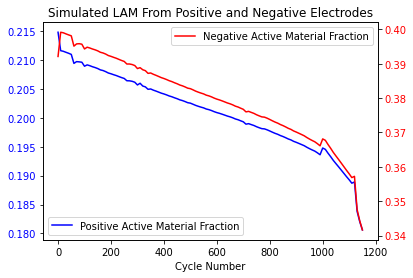

In [346]:
fig, ax = plt.subplots()

ax.set_title("Simulated LAM From Positive and Negative Electrodes")
ax.plot(range(0,1160,10),epPosAll,'b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_xlabel('Cycle Number')
ax.legend(['Positive Active Material Fraction'],loc='lower left')

ax2 = ax.twinx()
ax2.plot(range(0,1160,10),epNegAll,'r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(['Negative Active Material Fraction'])
# plt.plot(posPer)
# plt.plot(negPer)
# ax = plt.Axes.secondary_yaxis(location='right')
# ax.plot(epNegAll)

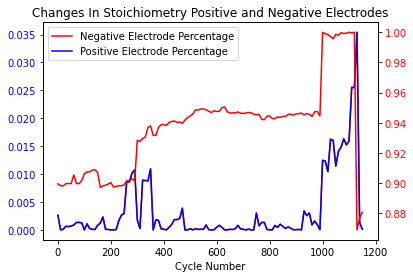

In [350]:
fig, ax = plt.subplots()

ax.set_title("Changes In Stoichiometry Positive and Negative Electrodes")
ax.plot(range(0,1160,10),posPer,'r')
ax.plot(range(0,1160,10),posPer,'b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_xlabel('Cycle Number')
ax.legend(['Negative Electrode Percentage','Positive Electrode Percentage'])

ax2 = ax.twinx()
ax2.plot(range(0,1160,10),negPer,'r')
ax2.tick_params(axis='y', labelcolor='r')
# ax2.legend(['Negative Electrode Percentage'])
# plt.plot(posPer)
# plt.plot(negPer)
# ax = plt.Axes.secondary_yaxis(location='right')
# ax.plot(epNegAll)


Send graphs of LAM - End of Business
pull the training data - suplimentary material called out 
setup the training data LAM optimizations
    try remote computer
    split & send (send 1 and estimate)
Play around with SEI model
Investigate LAM models
    how to formulate
How much error is introduced with different 


Notes - 
x points in space and number of particles -20 - SPMe points in space looks at electrolyte (only 1 particle)
r points inside particle - 50 